## Setting up

In [1]:
from aws_novels_mallet import *
C = get_corpus()
#C.meta

/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/tobywarner/opt/anaconda3/lib/python3.7/site-

In [2]:
#loading chapters
aws_slices = pd.read_excel('/Users/tobywarner/Dropbox/textmining/workbooks/AWS/AfricanWritersSeries/mallet_tm/aws_all_slices_20220223.xlsx')
#aws_slices

In [3]:
aws_meta = pd.read_excel('/Users/tobywarner/Dropbox/textmining/corpora/aws/metadata_novels.xls', index_col=0)
#aws_meta

### Merging metadata and slices

In [4]:
aws_meta_slice = aws_slices.merge(aws_meta,left_on='id', right_on='id')

In [5]:
aws_meta_slice
#aws_meta_slice = aws_meta_slice.set_index('new_id')

,new_id,id,len,chapter,len_cont,content_words,len_nouns,nouns,tokens,fn,...,origpubdate,note,lastname,shorttitle,canon,canonauthor,prizewinner,prizewinningauthor,aws,glossary
0,"Abrahams,Mine_Boy,1963,0","Abrahams,Mine_Boy,1963",58,"Mine Boy \nAbrahams, Peter . 0-11. London: Heinemann, 1963.",0,[],0,[],[],"Abrahams,Mine_Boy,1963.txt",...,NaN,NaN,Abrahams,Mine_Boy,no,no,no,NaN,yes,NaN
1,"Abrahams,Mine_Boy,1963,1","Abrahams,Mine_Boy,1963",9834,ONE \n\n\n\nSomewhere in the distance a clock chimed. The big man listened. One ... Two ... Thre...,837,"['somewhere', 'distance', 'clock', 'chimed', 'big', 'man', 'listened', ""o'clock"", 'morning', 'sh...",319,"['distance', 'clock', 'man', ""o'clock"", 'morning', 'bundle', 'hand', 'left', 'pants', 'street', ...","['distance', 'clock', 'man', ""o'clock"", 'morning', 'bundle', 'hand', 'left', 'pants', 'street', ...","Abrahams,Mine_Boy,1963.txt",...,NaN,NaN,Abrahams,Mine_Boy,no,no,no,NaN,yes,NaN
2,"Abrahams,Mine_Boy,1963,2","Abrahams,Mine_Boy,1963",20520,TWO \n\n\n\nThe sun was high when Xuma woke. He lay still for a while and listened. But there wa...,1761,"['sun', 'high', 'woke', 'lay', 'still', 'while', 'listened', 'was', 'sound', 'anywhere', 'house'...",666,"['sun', 'while', 'sound', 'house', 'page', 'blankets', 'house', 'strangers', 'blankets', 'shirt'...","['sun', 'while', 'sound', 'house', 'page', 'blankets', 'house', 'strangers', 'blankets', 'shirt'...","Abrahams,Mine_Boy,1963.txt",...,NaN,NaN,Abrahams,Mine_Boy,no,no,no,NaN,yes,NaN
3,"Abrahams,Mine_Boy,1963,3","Abrahams,Mine_Boy,1963",21733,Xuma had found the street without trouble. But it was difficult to find the house. The houses al...,1844,"['found', 'street', 'trouble', 'difficult', 'find', 'house', 'houses', 'looked', 'same', 'gather...",610,"['street', 'trouble', 'house', 'houses', 'gathering', 'twilight', 'verandahs', 'yard', 'gates', ...","['street', 'trouble', 'house', 'houses', 'gathering', 'twilight', 'verandahs', 'yard', 'gates', ...","Abrahams,Mine_Boy,1963.txt",...,NaN,NaN,Abrahams,Mine_Boy,no,no,no,NaN,yes,NaN
4,"Abrahams,Mine_Boy,1963,4","Abrahams,Mine_Boy,1963",28149,Johannes drunk and Johannes sober were two different people. The one was loud and boastful and a...,2382,"['sober', 'different', 'people', 'one', 'loud', 'boastful', 'arrogant', 'told', 'world', 'crush'...",905,"['people', 'one', 'world', 'sonofabitch', 'fights', 'page', 'strength', 'time', 'lamb', 'size', ...","['people', 'one', 'world', 'sonofabitch', 'fights', 'page', 'strength', 'time', 'lamb', 'size', ...","Abrahams,Mine_Boy,1963.txt",...,NaN,NaN,Abrahams,Mine_Boy,no,no,no,NaN,yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,"Tutuola,The_Palm_Wine_Drinkard,1952,33","Tutuola,The_Palm_Wine_Drinkard,1952",701,34\nWho will take the mouse?\n\nBut who would take the mouse? So Land refused totally for Heaven...,57,"['take', 'mouse', 'take', 'mouse', 'so', 'refused', 'totally', 'take', 'refused', 'totally', 'ta...",19,"['mouse', 'mouse', 'hours', 'mouse', 'heaven', 'home', 'house', 'earth', 'heaven', 'rain', 'eart...","['mouse', 'mouse', 'hours', 'mouse', 'heaven', 'home', 'house', 'earth', 'heaven', 'rain', 'eart...","Tutuola,The_Palm_Wine_Drinkard,1952.txt",...,NaN,NaN,Tutuola,The_Palm-Wine_Drinkard,yes,yes,no,no,no,NaN
3148,"Tutuola,The_Palm_Wine_Drinkard,1952,34","Tutuola,The_Palm_Wine_Drinkard,1952",3473,"35\nAn egg fed the whole world\n\nNow as there was a great famine before I arrived in my town, s...",292,"['egg', 'fed', 'whole', 'world', 'now', 'was', 'great', 'famine', 'arrived', 'town', 'so', 'went...",120,"['egg', 'world', 'famine', 'town', 'room', 'water', 'bowl', 'egg', 'egg', 'food', 'drinks', 'wif...","['egg', 'world', 'famine', 'town', 'room', 'water', 'bowl', 'egg', 'egg', 'food', 'drinks', 'wif...","Tutuola,The_Palm_Wine_Drinkard,1952.txt",...,NaN,NaN,Tutuola,The_Palm-Wine_Drinkard,yes,yes,no,no,no,NaN
3149,"Tutuola,The_Palm_Wine_Drinkard,1952,35","Tutuola,The_Palm_Wine_Drinkard,1952",

### Filtering chapters

In [6]:
aws_meta_slice['len'].describe()

count      3152.000000
mean      17772.641815
std       21426.420878
min           3.000000
25%        7347.500000
50%       13095.000000
75%       21059.500000
max      382807.000000
Name: len, dtype: float64

In [7]:
aws_meta_slice_clean = aws_meta_slice.query('len_nouns>100')
aws_meta_slice_clean

,new_id,id,len,chapter,len_cont,content_words,len_nouns,nouns,tokens,fn,...,origpubdate,note,lastname,shorttitle,canon,canonauthor,prizewinner,prizewinningauthor,aws,glossary
1,"Abrahams,Mine_Boy,1963,1","Abrahams,Mine_Boy,1963",9834,ONE \n\n\n\nSomewhere in the distance a clock chimed. The big man listened. One ... Two ... Thre...,837,"['somewhere', 'distance', 'clock', 'chimed', 'big', 'man', 'listened', ""o'clock"", 'morning', 'sh...",319,"['distance', 'clock', 'man', ""o'clock"", 'morning', 'bundle', 'hand', 'left', 'pants', 'street', ...","['distance', 'clock', 'man', ""o'clock"", 'morning', 'bundle', 'hand', 'left', 'pants', 'street', ...","Abrahams,Mine_Boy,1963.txt",...,NaN,NaN,Abrahams,Mine_Boy,no,no,no,NaN,yes,NaN
2,"Abrahams,Mine_Boy,1963,2","Abrahams,Mine_Boy,1963",20520,TWO \n\n\n\nThe sun was high when Xuma woke. He lay still for a while and listened. But there wa...,1761,"['sun', 'high', 'woke', 'lay', 'still', 'while', 'listened', 'was', 'sound', 'anywhere', 'house'...",666,"['sun', 'while', 'sound', 'house', 'page', 'blankets', 'house', 'strangers', 'blankets', 'shirt'...","['sun', 'while', 'sound', 'house', 'page', 'blankets', 'house', 'strangers', 'blankets', 'shirt'...","Abrahams,Mine_Boy,1963.txt",...,NaN,NaN,Abrahams,Mine_Boy,no,no,no,NaN,yes,NaN
3,"Abrahams,Mine_Boy,1963,3","Abrahams,Mine_Boy,1963",21733,Xuma had found the street without trouble. But it was difficult to find the house. The houses al...,1844,"['found', 'street', 'trouble', 'difficult', 'find', 'house', 'houses', 'looked', 'same', 'gather...",610,"['street', 'trouble', 'house', 'houses', 'gathering', 'twilight', 'verandahs', 'yard', 'gates', ...","['street', 'trouble', 'house', 'houses', 'gathering', 'twilight', 'verandahs', 'yard', 'gates', ...","Abrahams,Mine_Boy,1963.txt",...,NaN,NaN,Abrahams,Mine_Boy,no,no,no,NaN,yes,NaN
4,"Abrahams,Mine_Boy,1963,4","Abrahams,Mine_Boy,1963",28149,Johannes drunk and Johannes sober were two different people. The one was loud and boastful and a...,2382,"['sober', 'different', 'people', 'one', 'loud', 'boastful', 'arrogant', 'told', 'world', 'crush'...",905,"['people', 'one', 'world', 'sonofabitch', 'fights', 'page', 'strength', 'time', 'lamb', 'size', ...","['people', 'one', 'world', 'sonofabitch', 'fights', 'page', 'strength', 'time', 'lamb', 'size', ...","Abrahams,Mine_Boy,1963.txt",...,NaN,NaN,Abrahams,Mine_Boy,no,no,no,NaN,yes,NaN
6,"Abrahams,Mine_Boy,1963,6","Abrahams,Mine_Boy,1963",18978,People sang. People cried. People fought. People loved. People hated. Others were sad. Others ga...,1541,"['people', 'sang', 'people', 'cried', 'people', 'fought', 'people', 'loved', 'people', 'hated', ...",477,"['people', 'people', 'people', 'people', 'people', 'others', 'others', 'others', 'friends', 'oth...","['people', 'people', 'people', 'people', 'people', 'others', 'others', 'others', 'friends', 'oth...","Abrahams,Mine_Boy,1963.txt",...,NaN,NaN,Abrahams,Mine_Boy,no,no,no,NaN,yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,"Tutuola,The_Palm_Wine_Drinkard,1952,24","Tutuola,The_Palm_Wine_Drinkard,1952",9941,"25\nI and my palm-wine tapster in the deads’ town When it was 8 o’clock in the morning, then we ...",798,"['palm-', 'wine', 'tapster', 'deads', 'town', 'o’clock', 'morning', 'then', 'entered', 'town', '...",249,"['wine', 'tapster', 'deads', 'town', 'o’clock', 'morning', 'town', 'palm', 'wine', 'tapster', 't...","['wine', 'tapster', 'deads', 'town', 'o’clock', 'morning', 'town', 'palm', 'wine', 'tapster', 't...","Tutuola,The_Palm_Wine_Drinkard,1952.txt",...,NaN,NaN,Tutuola,The_Palm-Wine_Drinkard,yes,yes,no,no,no,NaN
3141,"Tutuola,The_Palm_Wine_Drinkard,1952,27","Tutuola,The_Palm_Wine_Drinkard,1952",4993,"28\nHard to salute each other, harder to describe each other, and hardest to look at each other ...",408,"['hard', 'salute', 'other', 'harder', 'describe', 'other', 'hardest', 'look', 'other', 'destinat...",160,"['destination', 'destination', 'o’clock', 'mo

### Setting up and importing with Little Mallet Wrapper

In [8]:
# setting training data (chapter, nouns, content words, etc)
# setting type to str
aws_meta_slice_clean['nouns'] = aws_meta_slice_clean['nouns'].astype(str)
aws_df = aws_meta_slice_clean

In [9]:
# setting training data (chapter, nouns, content words, etc)
training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in aws_df['nouns']]

In [10]:
# setting original texts to chapter so we can look at topics in context
original_texts = [text for text in aws_df['chapter']]

In [11]:
titles = [title for title in aws_df['new_id']]

In [12]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 2799
Mean Number of Words per Document: 609.2
Vocabulary Size: 36820


### Setting paths for output

In [13]:
# change to desired # of topics corresponding with trained model
num_topics = 75

#Change to your desired output directory
output_directory_path = '/Users/tobywarner/Dropbox/textmining/MALLET/topic-model-output:aws_v7'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [14]:
#path_to_divided_training_data           = output_directory_path + '/training.split.txt'
#path_to_divided_formatted_training_data = output_directory_path + '/mallet.split.training'
#path_to_divided_topic_distributions     = output_directory_path + '/mallet.split.topic_distributions.' + str(num_topics)

In [15]:
#little_mallet_wrapper.import_data(path_to_mallet,
 #               path_to_training_data,
 #               path_to_formatted_training_data,
  #              divided_documents,
   #             use_pipe_from=path_to_formatted_training_data)

### Inferring topics

In [16]:
little_mallet_wrapper.infer_topics(path_to_mallet,
                 path_to_model,
                 path_to_formatted_training_data,
                 path_to_topic_distributions)

Inferring topics using pre-trained model...
Complete


In [17]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

len(topic_distributions), len(topic_distributions[2])

(2799, 75)

### Printing topics
#### Here are the topics the model finds in the AWS corpus

In [18]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)
for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['shop', 'money', 'business', 'work', 'place', 'time', 'company', 'office', 'customers', 'store', 'counter', 'job', 'manager', 'shops', 'lot', 'years', 'bar', 'part', 'workers', 'goods']

✨Topic 1✨

['life', 'world', 'heart', 'woman', 'words', 'love', 'body', 'death', 'mind', 'power', 'days', 'time', 'day', 'things', 'end', 'peace', 'child', 'pain', 'thoughts', 'soul']

✨Topic 2✨

['night', 'voice', 'light', 'eyes', 'man', 'darkness', 'time', 'door', 'bed', 'silence', 'way', 'sound', 'head', 'day', 'lamp', 'mind', 'sleep', 'morning', 'moment', 'moon']

✨Topic 3✨

['men', 'compound', 'village', 'dibia', 'elders', 'lord', 'hall', 'god', 'reception', 'son', 'wrestling', 'gods', 'women', 'arena', 'trees', 'wine', 'traps', 'pot', 'divination', 'villagers']

✨Topic 4✨

['whites', 'blacks', 'father', 'one', 'rubber', 'others', 'town', 'shop', 'grandfather', 'years', 'son', 'traders', 'fear', 'war', 'family', 'eyes', 'wine', 'lad', 'news', 'estate']

✨Topic 5✨

['school', 'teacher',

### TODO Discuss major topics

# Canon Experiment
### Ok, let's recall our premise. Julien's extroversion hypothesis predicts that the African novels that have been most succesful and internationally acclaimed tend to be extroverted -- in other words, they tend to explain Africa and African contexts to foreign audiences.
### For us to test this hypothesis, two further conditions would need to be met:
### 1) Internationally acclaimed African novels ought to share some characteristics that can be identified
### 2) These characteristics should in themselves be interpretable as 'extroverted'

## Let's focus on 1 first. Are there indeed shared characteristics of acclaimed African novels?
### Let's see if topic modeling will help us here. Are any of the topics we've found in this corpus more likely to occur in novels that received international acclaim?
### We will try to measure this by comparing the topic distributions with categories in the metadata -- these categories are binary and include whether novels are still widely taught (canon), whether they received international prizes (prizewinner) and whether they are written by authors who are still widely taught (canonauthor)

## Setting up

### Making a dataframe of results

In [19]:
topic_results = []
for title, topic_distribution in zip(titles, topic_distributions):
    topic_results.append({'document': title, 'topic_distribution': topic_distribution})

df = pd.DataFrame(topic_results)
column_names = [f"Topic {number} {' '.join(topic[:4])}" for number, topic in enumerate(topics)]
df[column_names] = pd.DataFrame(df['topic_distribution'].tolist(), index = df.index)
df = df.drop('topic_distribution', axis='columns')

In [20]:
# Checking top novels per topic by dataframe
#df.sort_values(by='Topic 0 women men woman mother', ascending=False)[:6]

In [21]:
# Saving results as CSV if desired
#df.to_csv('AWS-Topic-Distributions20220303.csv', encoding='utf-8', index=False)

### Merging results dataframe with metadata

In [22]:
df

,document,Topic 0 shop money business work,Topic 1 life world heart woman,Topic 2 night voice light eyes,Topic 3 men compound village dibia,Topic 4 whites blacks father one,Topic 5 school teacher children boys,Topic 6 soldiers army soldier officer,Topic 7 canoe fish woman river,Topic 8 sergeant gun captain commander,...,Topic 65 boy boys girls girl,Topic 66 palm wine compound son,Topic 67 dance women men music,Topic 68 beer bottle drink glass,Topic 69 government letter office service,Topic 70 door room table window,Topic 71 wife husband woman children,Topic 72 church priest mission catechist,Topic 73 plane airport flight hotel,Topic 74 way school figure village
0,"Abrahams,Mine_Boy,1963,1",0.001052,0.003383,0.195070,0.000124,0.000064,0.003880,0.000596,0.000087,0.000085,...,0.000609,0.000255,0.004683,0.013615,0.000379,0.001672,0.004340,0.000652,0.000162,0.000050
1,"Abrahams,Mine_Boy,1963,2",0.002315,0.005417,0.004752,0.000060,0.000359,0.000904,0.000454,0.000042,0.000205,...,0.000132,0.000124,0.021131,0.001379,0.000185,0.001961,0.003915,0.000481,0.000079,0.000024
2,"Abrahams,Mine_Boy,1963,3",0.000199,0.002666,0.055306,0.000065,0.000034,0.000623,0.000136,0.000046,0.000045,...,0.000143,0.000134,0.000160,0.035350,0.000200,0.003539,0.000511,0.000166,0.000085,0.000381
3,"Abrahams,Mine_Boy,1963,4",0.001943,0.003139,0.070152,0.010049,0.000023,0.000183,0.000093,0.000031,0.000030,...,0.018178,0.000091,0.000109,0.000411,0.000136,0.003009,0.000347,0.000354,0.000058,0.000018
4,"Abrahams,Mine_Boy,1963,6",0.000255,0.003412,0.113652,0.000084,0.000043,0.000798,0.000174,0.000059,0.000057,...,0.000183,0.000172,0.019714,0.004404,0.000255,0.002941,0.002923,0.000212,0.000109,0.000034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,"Tutuola,The_Palm_Wine_Drinkard,1952,24",0.000467,0.003349,0.002910,0.000154,0.000080,0.001881,0.000320,0.000108,0.000105,...,0.000336,0.001148,0.000375,0.001837,0.000469,0.000818,0.001617,0.000389,0.000200,0.000062
2795,"Tutuola,The_Palm_Wine_Drinkard,1952,27",0.000730,0.009135,0.009099,0.000891,0.000124,0.001638,0.001150,0.000168,0.002116,...,0.000524,0.005046,0.000586,0.000918,0.000733,0.005832,0.001875,0.005162,0.000312,0.000096
2796,"Tutuola,The_Palm_Wine_Drinkard,1952,29",0.000417,0.004478,0.001482,0.000137,0.000071,0.000936,0.000658,0.000096,0.000466,...,0.001787,0.000281,0.000335,0.000897,0.001534,0.002590,0.201140,0.000719,0.000178,0.000799
2797,"Tutuola,The_Palm_Wine_Drinkard,1952,31",0.000918,0.027037,0.004898,0.001938,0.000156,0.002878,0.000629,0.000212,0.000206,...,0.001478,0.001437,0.000737,0.002791,0.000921,0.004062,0.030998,0.002401,0.000393,0.000121


In [23]:
aws_meta_slice_clean

,new_id,id,len,chapter,len_cont,content_words,len_nouns,nouns,tokens,fn,...,origpubdate,note,lastname,shorttitle,canon,canonauthor,prizewinner,prizewinningauthor,aws,glossary
1,"Abrahams,Mine_Boy,1963,1","Abrahams,Mine_Boy,1963",9834,ONE \n\n\n\nSomewhere in the distance a clock chimed. The big man listened. One ... Two ... Thre...,837,"['somewhere', 'distance', 'clock', 'chimed', 'big', 'man', 'listened', ""o'clock"", 'morning', 'sh...",319,"['distance', 'clock', 'man', ""o'clock"", 'morning', 'bundle', 'hand', 'left', 'pants', 'street', ...","['distance', 'clock', 'man', ""o'clock"", 'morning', 'bundle', 'hand', 'left', 'pants', 'street', ...","Abrahams,Mine_Boy,1963.txt",...,NaN,NaN,Abrahams,Mine_Boy,no,no,no,NaN,yes,NaN
2,"Abrahams,Mine_Boy,1963,2","Abrahams,Mine_Boy,1963",20520,TWO \n\n\n\nThe sun was high when Xuma woke. He lay still for a while and listened. But there wa...,1761,"['sun', 'high', 'woke', 'lay', 'still', 'while', 'listened', 'was', 'sound', 'anywhere', 'house'...",666,"['sun', 'while', 'sound', 'house', 'page', 'blankets', 'house', 'strangers', 'blankets', 'shirt'...","['sun', 'while', 'sound', 'house', 'page', 'blankets', 'house', 'strangers', 'blankets', 'shirt'...","Abrahams,Mine_Boy,1963.txt",...,NaN,NaN,Abrahams,Mine_Boy,no,no,no,NaN,yes,NaN
3,"Abrahams,Mine_Boy,1963,3","Abrahams,Mine_Boy,1963",21733,Xuma had found the street without trouble. But it was difficult to find the house. The houses al...,1844,"['found', 'street', 'trouble', 'difficult', 'find', 'house', 'houses', 'looked', 'same', 'gather...",610,"['street', 'trouble', 'house', 'houses', 'gathering', 'twilight', 'verandahs', 'yard', 'gates', ...","['street', 'trouble', 'house', 'houses', 'gathering', 'twilight', 'verandahs', 'yard', 'gates', ...","Abrahams,Mine_Boy,1963.txt",...,NaN,NaN,Abrahams,Mine_Boy,no,no,no,NaN,yes,NaN
4,"Abrahams,Mine_Boy,1963,4","Abrahams,Mine_Boy,1963",28149,Johannes drunk and Johannes sober were two different people. The one was loud and boastful and a...,2382,"['sober', 'different', 'people', 'one', 'loud', 'boastful', 'arrogant', 'told', 'world', 'crush'...",905,"['people', 'one', 'world', 'sonofabitch', 'fights', 'page', 'strength', 'time', 'lamb', 'size', ...","['people', 'one', 'world', 'sonofabitch', 'fights', 'page', 'strength', 'time', 'lamb', 'size', ...","Abrahams,Mine_Boy,1963.txt",...,NaN,NaN,Abrahams,Mine_Boy,no,no,no,NaN,yes,NaN
6,"Abrahams,Mine_Boy,1963,6","Abrahams,Mine_Boy,1963",18978,People sang. People cried. People fought. People loved. People hated. Others were sad. Others ga...,1541,"['people', 'sang', 'people', 'cried', 'people', 'fought', 'people', 'loved', 'people', 'hated', ...",477,"['people', 'people', 'people', 'people', 'people', 'others', 'others', 'others', 'friends', 'oth...","['people', 'people', 'people', 'people', 'people', 'others', 'others', 'others', 'friends', 'oth...","Abrahams,Mine_Boy,1963.txt",...,NaN,NaN,Abrahams,Mine_Boy,no,no,no,NaN,yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,"Tutuola,The_Palm_Wine_Drinkard,1952,24","Tutuola,The_Palm_Wine_Drinkard,1952",9941,"25\nI and my palm-wine tapster in the deads’ town When it was 8 o’clock in the morning, then we ...",798,"['palm-', 'wine', 'tapster', 'deads', 'town', 'o’clock', 'morning', 'then', 'entered', 'town', '...",249,"['wine', 'tapster', 'deads', 'town', 'o’clock', 'morning', 'town', 'palm', 'wine', 'tapster', 't...","['wine', 'tapster', 'deads', 'town', 'o’clock', 'morning', 'town', 'palm', 'wine', 'tapster', 't...","Tutuola,The_Palm_Wine_Drinkard,1952.txt",...,NaN,NaN,Tutuola,The_Palm-Wine_Drinkard,yes,yes,no,no,no,NaN
3141,"Tutuola,The_Palm_Wine_Drinkard,1952,27","Tutuola,The_Palm_Wine_Drinkard,1952",4993,"28\nHard to salute each other, harder to describe each other, and hardest to look at each other ...",408,"['hard', 'salute', 'other', 'harder', 'describe', 'other', 'hardest', 'look', 'other', 'destinat...",160,"['destination', 'destination', 'o’clock', 'mo

In [24]:
results_df = df.rename(columns={"document": "new_id"})

In [25]:
aws_topics_and_meta = aws_df.merge(results_df,left_on='new_id', right_on='new_id')
aws_topics_and_meta

,new_id,id,len,chapter,len_cont,content_words,len_nouns,nouns,tokens,fn,...,Topic 65 boy boys girls girl,Topic 66 palm wine compound son,Topic 67 dance women men music,Topic 68 beer bottle drink glass,Topic 69 government letter office service,Topic 70 door room table window,Topic 71 wife husband woman children,Topic 72 church priest mission catechist,Topic 73 plane airport flight hotel,Topic 74 way school figure village
0,"Abrahams,Mine_Boy,1963,1","Abrahams,Mine_Boy,1963",9834,ONE \n\n\n\nSomewhere in the distance a clock chimed. The big man listened. One ... Two ... Thre...,837,"['somewhere', 'distance', 'clock', 'chimed', 'big', 'man', 'listened', ""o'clock"", 'morning', 'sh...",319,"['distance', 'clock', 'man', ""o'clock"", 'morning', 'bundle', 'hand', 'left', 'pants', 'street', ...","['distance', 'clock', 'man', ""o'clock"", 'morning', 'bundle', 'hand', 'left', 'pants', 'street', ...","Abrahams,Mine_Boy,1963.txt",...,0.000609,0.000255,0.004683,0.013615,0.000379,0.001672,0.004340,0.000652,0.000162,0.000050
1,"Abrahams,Mine_Boy,1963,2","Abrahams,Mine_Boy,1963",20520,TWO \n\n\n\nThe sun was high when Xuma woke. He lay still for a while and listened. But there wa...,1761,"['sun', 'high', 'woke', 'lay', 'still', 'while', 'listened', 'was', 'sound', 'anywhere', 'house'...",666,"['sun', 'while', 'sound', 'house', 'page', 'blankets', 'house', 'strangers', 'blankets', 'shirt'...","['sun', 'while', 'sound', 'house', 'page', 'blankets', 'house', 'strangers', 'blankets', 'shirt'...","Abrahams,Mine_Boy,1963.txt",...,0.000132,0.000124,0.021131,0.001379,0.000185,0.001961,0.003915,0.000481,0.000079,0.000024
2,"Abrahams,Mine_Boy,1963,3","Abrahams,Mine_Boy,1963",21733,Xuma had found the street without trouble. But it was difficult to find the house. The houses al...,1844,"['found', 'street', 'trouble', 'difficult', 'find', 'house', 'houses', 'looked', 'same', 'gather...",610,"['street', 'trouble', 'house', 'houses', 'gathering', 'twilight', 'verandahs', 'yard', 'gates', ...","['street', 'trouble', 'house', 'houses', 'gathering', 'twilight', 'verandahs', 'yard', 'gates', ...","Abrahams,Mine_Boy,1963.txt",...,0.000143,0.000134,0.000160,0.035350,0.000200,0.003539,0.000511,0.000166,0.000085,0.000381
3,"Abrahams,Mine_Boy,1963,4","Abrahams,Mine_Boy,1963",28149,Johannes drunk and Johannes sober were two different people. The one was loud and boastful and a...,2382,"['sober', 'different', 'people', 'one', 'loud', 'boastful', 'arrogant', 'told', 'world', 'crush'...",905,"['people', 'one', 'world', 'sonofabitch', 'fights', 'page', 'strength', 'time', 'lamb', 'size', ...","['people', 'one', 'world', 'sonofabitch', 'fights', 'page', 'strength', 'time', 'lamb', 'size', ...","Abrahams,Mine_Boy,1963.txt",...,0.018178,0.000091,0.000109,0.000411,0.000136,0.003009,0.000347,0.000354,0.000058,0.000018
4,"Abrahams,Mine_Boy,1963,6","Abrahams,Mine_Boy,1963",18978,People sang. People cried. People fought. People loved. People hated. Others were sad. Others ga...,1541,"['people', 'sang', 'people', 'cried', 'people', 'fought', 'people', 'loved', 'people', 'hated', ...",477,"['people', 'people', 'people', 'people', 'people', 'others', 'others', 'others', 'friends', 'oth...","['people', 'people', 'people', 'people', 'people', 'others', 'others', 'others', 'friends', 'oth...","Abrahams,Mine_Boy,1963.txt",...,0.000183,0.000172,0.019714,0.004404,0.000255,0.002941,0.002923,0.000212,0.000109,0.000034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,"Tutuola,The_Palm_Wine_Drinkard,1952,24","Tutuola,The_Palm_Wine_Drinkard,1952",9941,"25\nI and my palm-wine tapster in the deads’ town When it was 8 o’clock in the morning, then we ...",798,"['palm-', 'wine', 'tapster', 'deads', 'town', 'o’clock', 'morning', 'then', 'entered', 'town', '...",249,"['wine', 'tapster', 'deads', 'town', 'o’clock', 'morning', 'town', 'palm', 'wine', 'tapster', 't...","['wine', 'tapster', 'deads', 'town', 'o’clock', 'morning', 'town', 'palm', 'wine', 'tapste

### Saving

In [26]:
# saving if desired
#aws_topics_and_meta.to_csv('AWS-Topics-and-Metadata-20220303.csv', encoding='utf-8', index=False)

## Let's test this out
### What are the top topics for the metadata categories associated with canonicity?

### • Canon (whether a novel was in the top 20 books taught by African lit profs surveyed in 2020 by Saint and Shringarpure)

In [119]:
#canon
aws_topics_and_meta.drop('origpubdate',1).drop('year',1).drop('len',1).drop('len_cont',1).drop('len_nouns',1).groupby('canon').mean().T.sort_values('yes',ascending=False).head(20)

canon,no,yes
Topic 21 eyes head face hand,0.062287,0.102551
Topic 55 man people men way,0.059608,0.057991
Topic 41 living way room people,0.002036,0.050426
Topic 20 time house day room,0.060579,0.045329
Topic 34 hair phone people woman,0.003634,0.039778
Topic 17 time way fact course,0.071090,0.037550
Topic 1 life world heart woman,0.037494,0.037514
Topic 47 room house food water,0.017506,0.034849
Topic 2 night voice light eyes,0.030190,0.033683
Topic 14 child woman children mother,0.025661,0.028714


#### Many of the topic distribution averages are about even but some (21, 41, 34, 47, 66, 13) are more associated with canon
#### Only one topic seems more closely correlated with not being canon (17)

### • Prize winning novels (whether a novel won an international prize)

In [64]:
#prizewinner
aws_topics_and_meta.drop('origpubdate',1).drop('year',1).drop('len',1).drop('len_cont',1).drop('len_nouns',1).groupby('prizewinner').mean().T.sort_values('yes',ascending=False).head(20)

prizewinner,no,yes
Topic 21 eyes head face hand,0.062424,0.093094
Topic 55 man people men way,0.060046,0.056566
Topic 20 time house day room,0.059374,0.053608
Topic 17 time way fact course,0.069346,0.052061
Topic 41 living way room people,0.002036,0.039730
Topic 1 life world heart woman,0.037077,0.039207
Topic 34 hair phone people woman,0.003416,0.032675
Topic 47 room house food water,0.017262,0.032007
Topic 2 night voice light eyes,0.030883,0.030087
Topic 45 life moment face death,0.031297,0.029049


#### Again, many of the topic distribution averages are about even but some (21, 41, 34, 47, 13) are more associated with prizewinning
#### No topic stands out as being closely associated with not winning prizes

### • Canon author (whether a novel was by one of the top 20 authors taught by African lit profs surveyed in 2020 by Saint and Shringarpure)

In [66]:
#canonauthor
aws_topics_and_meta.drop('origpubdate',1).drop('year',1).drop('len',1).drop('len_cont',1).drop('len_nouns',1).groupby('canonauthor').mean().T.sort_values('yes',ascending=False).head(20)

canonauthor,no,yes
Topic 21 eyes head face hand,0.064290,0.084031
Topic 55 man people men way,0.059291,0.059617
Topic 20 time house day room,0.058606,0.056860
Topic 17 time way fact course,0.070810,0.047811
Topic 1 life world heart woman,0.035813,0.043763
Topic 41 living way room people,0.002181,0.036583
Topic 2 night voice light eyes,0.030208,0.032656
Topic 34 hair phone people woman,0.003690,0.029634
Topic 47 room house food water,0.017629,0.029624
Topic 28 land people children things,0.011596,0.027851


#### Once again, many of the topic distribution averages are about even but some (21, 41, 34, 47, 16, 56, 66) are more associated with canonized authorship
#### Again, only topic 17 seems slightly more correlated with not being written by a canonized author

## Some topics consistently correlate with canonicity across different metrics
#### • Topic 21 eyes head face hand
#### • Topic 41 living way room people
#### • Topic 34 hair phone people woman
#### • Topic 47 room house food water
## A few topics  correlate with canonicity in some metrics but not others
#### • Topic 66 palm wine compound son
#### • Topic 13 things thing country woman
#### • Topic 56 town house wife cousin
## Only one topic appears negatively correlated with a work being canonized
#### • Topic 17 time way fact course

## Preliminary findings
#### Some topics do seem correlated with metadata categories associated with canonicity. Note that one gets versions of these topics when the model is re-run at this # of topics or at many other #s. The exact words vary a bit but versions of the top topics recurr across models.

## Let's look at the top documents for these topics
### "Documents" are chapters in this case

In [43]:
def display_top_titles_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), training_data_chapter_titles[document] + "\n")
    return

#### • Topic 21 eyes head face hand

In [114]:
display_top_titles_per_topic(21,100)

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']

0.3747 Adichie,Purple_Hibiscus,2003,23

0.3618 Saadawi,Woman_at_Point_Zero,1977,19

0.3448 Adichie,Half_of_a_Yellow_Sun,2006,11

0.3355 Adichie,Purple_Hibiscus,2003,22

0.3318 Palangyo,Dying_in_the_Sun,1968,17

0.3311 Saadawi,Woman_at_Point_Zero,1977,4

0.3302 Adichie,Purple_Hibiscus,2003,20

0.3135 Saadawi,Woman_at_Point_Zero,1977,22

0.3134 Saadawi,Woman_at_Point_Zero,1977,16

0.306 Bulawayo,We_Need_New_Names,2013,14

0.3049 Saadawi,Woman_at_Point_Zero,1977,17

0.3045 Farah,From_a_Crooked_Rib,1970,28

0.295 Saadawi,Woman_at_Point_Zero,1977,20

0.2901 Abani,GraceLand,2004,11

0.2852 Saadawi,Woman_at_Point_Zero,1977,15

0.2849 Saadawi,Woman_at_Point_Zero,1977,25

0.2807 Oyono,The_Old_Man_and_the_Medal,1967,5

0.272 Adichie,Purple_Hibiscus,2003,25

0.2674 Bulawayo,We_Need_New_Names,2013,3

0.264 Abani,GraceLan

#### This topic that centers on the body -- 'eyes', 'head', 'face', 'hand' -- appears in a variety of authors, geographical contexts and time periods. And yet still seems correlated with canonicity

#### • Topic 41 living way room people

In [49]:
display_top_titles_per_topic(41,30)

✨Topic 41✨

['living', 'way', 'room', 'people', 'something', 'things', 'redemption', 'money', 'water', 'window', 'words', 'leaves', 'oil', 'wrapper', 'week', 'bag', 'book', 'music', 'palm', 'dinner']

0.3659 Adichie,Purple_Hibiscus,2003,14

0.3496 Adichie,Purple_Hibiscus,2003,1

0.3387 Adichie,Purple_Hibiscus,2003,53

0.3169 Adichie,Purple_Hibiscus,2003,29

0.2692 Adichie,Purple_Hibiscus,2003,8

0.2641 Adichie,Purple_Hibiscus,2003,34

0.2622 Adichie,Half_of_a_Yellow_Sun,2006,6

0.2581 Adichie,Purple_Hibiscus,2003,18

0.2504 Adichie,Purple_Hibiscus,2003,10

0.2469 Abani,GraceLand,2004,12

0.2375 Abani,GraceLand,2004,13

0.2366 Adichie,Purple_Hibiscus,2003,6

0.2364 Adichie,Purple_Hibiscus,2003,20

0.2364 Adichie,Purple_Hibiscus,2003,21

0.2328 Abani,GraceLand,2004,9

0.2325 Adichie,Purple_Hibiscus,2003,15

0.2277 Abani,GraceLand,2004,18

0.2159 Abani,GraceLand,2004,2

0.2146 Adichie,Purple_Hibiscus,2003,17

0.2109 Abani,GraceLand,2004,16

0.2075 Adichie,Purple_Hibiscus,2003,38

0.2059 A

#### This topic seems concentrated in works by two acclaimed contemporary Nigerian authors: Adichie and Abani

#### • Topic 34 hair phone people woman

In [50]:
display_top_titles_per_topic(34,30)

✨Topic 34✨

['hair', 'phone', 'people', 'woman', 'person', 'kind', 'apartment', 'something', 'guy', 'race', 'job', 'friends', 'air', 'country', 'things', 'thing', 'accent', 'words', 'university', 'blog']

0.413 Adichie,Americanah,2013,33

0.3907 Adichie,Americanah,2013,20

0.3634 Adichie,Americanah,2013,19

0.3627 Adichie,Americanah,2013,18

0.3532 Adichie,Americanah,2013,39

0.3464 Adichie,Americanah,2013,38

0.3414 Adichie,Americanah,2013,31

0.3381 Adichie,Americanah,2013,1

0.3184 Adichie,Americanah,2013,48

0.3109 Adichie,Americanah,2013,9

0.3074 Adichie,Americanah,2013,35

0.3037 Adichie,Americanah,2013,21

0.3014 Adichie,Americanah,2013,34

0.2952 Adichie,Americanah,2013,17

0.2902 Adichie,Americanah,2013,37

0.2885 Adichie,Americanah,2013,22

0.2815 Adichie,Americanah,2013,47

0.2796 Adichie,Americanah,2013,41

0.2676 Adichie,Americanah,2013,36

0.2616 Adichie,Americanah,2013,50

0.2547 Adichie,Americanah,2013,14

0.2527 Adichie,Americanah,2013,12

0.2526 Adichie,Americanah,20

#### This topic is concetrated in chapters of just one novel -- Adichie's Americanah. Interesting that just one novel captures a topic like this even if it is split into chapters. Suggests that Americanah uses groupings of terms that are quite distinct from other novels. Which makes sense -- it is very contemporary in its content, voice and preoccupations

#### • Topic 47 room, house, food, water

In [58]:
display_top_titles_per_topic(47,30)

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']

0.2904 Jumbam,White_Man_of_God,1980,1

0.2607 Head,A_Question_of_Power,1974,22

0.2551 Omotoso,The_Edifice,1971,3

0.2328 Jumbam,White_Man_of_God,1980,15

0.2301 Selormey,The_Narrow_Path,1966,13

0.2289 Mungoshi,Waiting_for_the_Rain,1975,9

0.2284 Adichie,Purple_Hibiscus,2003,38

0.2222 Adichie,Half_of_a_Yellow_Sun,2006,10

0.2216 Adichie,Purple_Hibiscus,2003,11

0.2206 Darko,Beyond_the_Horizon,1995,2

0.2195 Selormey,The_Narrow_Path,1966,5

0.2106 Momple,Neighbours,2001,9

0.2039 Kwakye,The_Clothes_of_Nakedness,1998,2

0.2032 Saadawi,Woman_at_Point_Zero,1977,10

0.1931 Mungoshi,Waiting_for_the_Rain,1975,43

0.1892 Selormey,The_Narrow_Path,1966,4

0.1886 Awoonor,This_Earth,1972,12

0.1869 Saadawi,Woman_at_Point_Zero,1977,16

0.1824 Mengara,Mema,2003,16

0.179 Aniebo,The_Journey_Within,19

#### This domestic topic -- 'room', 'house', 'food', 'water' -- also has a variety of authors associated with it. 

## On to some of the second tier of predictive topics

#### • Topic 66 'palm', 'wine', 'compound', 'son'

In [71]:
display_top_titles_per_topic(66,30)

✨Topic 66✨

['palm', 'wine', 'compound', 'son', 'father', 'hut', 'obi', 'spirits', 'land', 'family', 'yams', 'day', 'market', 'tree', 'women', 'days', 'god', 'clan', 'season', 'title']

0.4511 Nwankwo,Danda,1970,4

0.441 Nwankwo,Danda,1970,24

0.4306 Nwankwo,Danda,1970,3

0.4131 Nwankwo,Danda,1970,5

0.3576 Achebe,Things_Fall_Apart,1962,12

0.3566 Nwankwo,Danda,1970,26

0.3405 Nwankwo,Danda,1970,6

0.3381 Achebe,Things_Fall_Apart,1962,15

0.332 Achebe,Things_Fall_Apart,1962,19

0.3297 Achebe,Arrow_of_God,1966,17

0.3283 Nwankwo,Danda,1970,27

0.3241 Achebe,Things_Fall_Apart,1962,10

0.3226 Achebe,Things_Fall_Apart,1962,3

0.3198 Nwankwo,Danda,1970,10

0.3193 Achebe,Things_Fall_Apart,1962,8

0.311 Achebe,Things_Fall_Apart,1962,24

0.31 Nwankwo,Danda,1970,18

0.305 Achebe,Arrow_of_God,1966,1

0.2994 Achebe,Arrow_of_God,1966,9

0.2971 Achebe,Things_Fall_Apart,1962,20

0.2914 Achebe,Arrow_of_God,1966,11

0.2909 Achebe,Arrow_of_God,1966,4

0.2877 Achebe,Arrow_of_God,1966,18

0.2864 Achebe,A

#### This rural topic -- 'palm', 'wine', 'compound', 'son', 'father', 'hut', 'obi', 'spirits', 'land' -- is associated with the works of Achebe (highly canonized) as well as the less celebrated Nwankwo. Interestingly, these novels are all from the 1960s and 70s

#### • Topic 66 'things', 'thing', 'country', 'woman', 'dress', 'pictures', 'voice', 'snow', 'picture'

In [73]:
display_top_titles_per_topic(13,30)

✨Topic 13✨

['things', 'thing', 'country', 'woman', 'dress', 'pictures', 'voice', 'snow', 'picture', 'mouth', 'adults', 'anything', 'teeth', 'shit', 'language', 'camera', 'rock', 'mother', 'earth', 'something']

0.4153 Bulawayo,We_Need_New_Names,2013,2

0.4135 Bulawayo,We_Need_New_Names,2013,9

0.3637 Bulawayo,We_Need_New_Names,2013,10

0.3542 Bulawayo,We_Need_New_Names,2013,26

0.3136 Bulawayo,We_Need_New_Names,2013,25

0.3123 Bulawayo,We_Need_New_Names,2013,12

0.305 Bulawayo,We_Need_New_Names,2013,14

0.2941 Bulawayo,We_Need_New_Names,2013,4

0.2924 Bulawayo,We_Need_New_Names,2013,7

0.2872 Bulawayo,We_Need_New_Names,2013,30

0.2846 Bulawayo,We_Need_New_Names,2013,6

0.2802 Bulawayo,We_Need_New_Names,2013,3

0.2757 Bulawayo,We_Need_New_Names,2013,27

0.2659 Bulawayo,We_Need_New_Names,2013,21

0.254 Bulawayo,We_Need_New_Names,2013,5

0.2523 Bulawayo,We_Need_New_Names,2013,23

0.232 Bulawayo,We_Need_New_Names,2013,39

0.2277 Bulawayo,We_Need_New_Names,2013,36

0.2266 Bulawayo,We_Need_

#### This enigmatic topic is all one celebrated novel by contemporary Zimbabwean author, NoViolet Bulawayo. 

#### • Topic 66 'things', 'thing', 'country', 'woman', 'dress', 'pictures', 'voice', 'snow', 'picture'

In [74]:
display_top_titles_per_topic(56,30)

✨Topic 56✨

['town', 'house', 'wife', 'cousin', 'square', 'place', 'widow', 'time', 'people', 'creatures', 'night', 'day', 'lady', 'road', 'palm', 'king', 'name', 'wine', 'morning', 'tree']

0.7283 Tutuola,The_Palm_Wine_Drinkard,1952,14

0.6974 Tutuola,The_Palm_Wine_Drinkard,1952,24

0.6727 Tutuola,The_Palm_Wine_Drinkard,1952,20

0.6289 Tutuola,The_Palm_Wine_Drinkard,1952,1

0.5977 Tutuola,The_Palm_Wine_Drinkard,1952,23

0.5926 Tutuola,The_Palm_Wine_Drinkard,1952,22

0.5543 Tutuola,The_Palm_Wine_Drinkard,1952,10

0.5154 Tutuola,The_Palm_Wine_Drinkard,1952,16

0.5077 Tutuola,The_Palm_Wine_Drinkard,1952,21

0.502 Tutuola,The_Palm_Wine_Drinkard,1952,31

0.496 Tutuola,The_Palm_Wine_Drinkard,1952,12

0.4876 Tutuola,The_Palm_Wine_Drinkard,1952,27

0.4784 Tutuola,The_Palm_Wine_Drinkard,1952,11

0.4643 Tutuola,The_Palm_Wine_Drinkard,1952,29

0.4606 Tutuola,The_Palm_Wine_Drinkard,1952,17

0.4421 Tutuola,The_Palm_Wine_Drinkard,1952,8

0.397 Tutuola,The_Palm_Wine_Drinkard,1952,34

0.3078 Nzekwu,B

#### This is an intriguing topic associated with Tutuola, Farah, Emecheta.

## On to the one negatively correlated topic

#### • Topic 17 ''time', 'way', 'fact', 'course', 'point', 'one', 'mind', 'day', 'part', 'case', 'matter', 'thing', 'question'

In [77]:
display_top_titles_per_topic(17,30)

✨Topic 17✨

['time', 'way', 'fact', 'course', 'point', 'one', 'mind', 'day', 'part', 'case', 'matter', 'thing', 'question', 'moment', 'hand', 'position', 'friends', 'evening', 'meeting', 'order']

0.3864 Akwanya,Orimili,1991,6

0.3136 Mofolo,Chaka,1981,2

0.3063 Bebey,The_Ashanti_Doll,1978,14

0.3002 Akwanya,Orimili,1991,3

0.2884 Iroh,The_Siren_in_the_Night,1982,13

0.2849 Bebey,The_Ashanti_Doll,1978,11

0.2815 Iroh,The_Siren_in_the_Night,1982,16

0.279 Akwanya,Orimili,1991,1

0.2691 Akwanya,Orimili,1991,2

0.269 Akwanya,Orimili,1991,5

0.2674 Bebey,The_Ashanti_Doll,1978,12

0.2609 Onuora_Nzekwu,Wand_of_Noble_Wood,1971,13

0.2571 Coetzee,Disgrace,1999,6

0.2555 Saadawi,Woman_at_Point_Zero,1977,34

0.2533 Akwanya,Orimili,1991,7

0.2516 Conton,The_African,1964,13

0.2507 Sembene,Xala,1976,32

0.2479 Samkange,On_Trial_for_my_Country,1967,6

0.2463 Akwanya,Orimili,1991,4

0.2457 Munonye,A_Wreath_for_Maidens,1973,2

0.245 Munonye,A_Wreath_for_Maidens,1973,25

0.2446 Conton,The_African,1964

#### This topic is composed of many rhetorical words -- 'time', 'way', 'fact', 'course', 'point', 'one', 'mind', 'day', 'part', 'case', 'matter', 'thing', 'question' -- and is present in a wide variety of authors. You see a few widely recognized names here (Achebe and Sembène) but nost of these authors and works are not widely taught.

## Which topics to look at further?

#### Two topics -- the body (21) and domesticity (47) --  seem like the best candidates for topics that are broadly distributed AND might predict canonicity. Several other topics seem too narrowly associated with acclaimed contemporary authors to be useful for testing our hypothesis (they are good at picking prose out prose by Adichie, Bulowayo, etc!) The negatively correlated topic (17 rhetoric)  also seems worth exploring further.

## Exploring topics in context

### We've established which topics are most and least likely to be found in works by canonized authors 
### Now let's look at what these topics look like in context in  individual chapters.

#### Setting up

In [85]:
training_data_chapter_titles = dict(zip(training_data, titles))
training_data_original_text = dict(zip(training_data, original_texts))

In [86]:
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        
        print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")
        
        probability = f"✨✨✨\n\n**{probability}**"
        chapter_title = f"**{training_data_chapter_titles[document]}**"
        original_text = training_data_original_text[document]
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text:
                original_text = re.sub(f"\\b{word}\\b", f"**{word}**", original_text)

        display(Markdown(probability)), display(Markdown(chapter_title)), display(Markdown(original_text))
    return

## Exploring Topic 21 The Body in context (positive correlation with canonicity)
This generates a lot of prose... buckle up

In [120]:
display_bolded_topic_words_in_context(topic_number=21, number_of_documents=20)

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.3747263122264014**

**Adichie,Purple_Hibiscus,2003,23**

AMAKA SHOOK ME although her movements had already woken me. I had been teetering on that boundary that divides sleep and wakefulness, imagining Papa coming to get us himself, imagining the rage in his red-tinged **eyes**, the burst of Igbo from his **mouth**.

“Let’s go and fetch water. Jaja and Obiora are already out,” Amaka said, stretching. She said that every morning now. She let me carry one container in now, too.

“Nekwa, Papa-Nnukwu is still asleep. He will be upset that the medicines made him oversleep and he did not wake to watch the sun rise.” She bent and shook him gently.

“Papa-Nnukwu, Papa-Nnukwu, kunie.” She turned him over slowly when he did not stir. His wrapper had come undone to reveal a pair of white shorts with a frayed elastic band at the waist. “Mom! Mom!” Amaka screamed. She moved a **hand** over Papa-Nnukwu’s chest, feverishly, searching for a heartbeat. “Mom!”

Aunty Ifeoma hurried into the room. She had not tied her wrapper over her nightdress, and I could make out the downward slope of her breasts, the slight swell of her belly underneath the sheer fabric. She sank to her knees and clutched Papa-Nnukwu’s **body**, shaking it.

“Nna anyi! Nna anyi!” Her **voice** was desperately loud, as if raising it would make Papa-Nnukwu hear better and respond. “Nna anyi!” When she stopped speaking, grasping Papa-Nnukwu’s wrist, resting her **head** on his chest, the silence was broken only by the crow of the neighbor’s cock. I held my breath—it suddenly seemed too loud for Aunty Ifeoma to hear Papa-Nnukwu’s heartbeat.

“Ewuu, he has fallen asleep. He has fallen asleep,” Aunty Ifeoma said, finally. She buried her **head** on Papa-Nnukwu’s shoulder, rocking **back** and forth.

Amaka pulled at her mother. “Stop it, Mom. Give him **mouth** to **mouth**! Stop it!”

Aunty Ifeoma kept rocking, and for a moment, because Papa-Nnukwu’s **body** moved **back** and forth as well, I wondered if Aunty Ifeoma was wrong and Papa-Nnukwu was only really asleep.

“Nna m o! My father!” Aunty Ifeoma’s **voice** rang out so pure and high it seemed to come from the ceiling. It was the same tone, the same piercing depth, that I heard sometimes in Abba when mourners danced past our house, holding the photograph of a dead family member, shouting.

“Nna m o!” Aunty Ifeoma screamed, still clutching Papa-Nnukwu. Amaka made feeble attempts to pull her off. Obiora and Jaja dashed into the room. And I imagined our forebears a century ago, the ancestors Papa-Nnukwu prayed to, charging in to defend their hamlet, coming **back** with lolling heads on long sticks.

“What is it, Mom?” Obiora asked. The bottom of his trousers clung to his leg where water from the tap had splashed on it.

“Papa-Nnukwu is alive,” Jaja said in English, with authority, as if doing so would make his words come true. The same tone God must have used when He said “Let there be Light.” Jaja wore only the bottom of his pajamas, which was also splattered with water. For the first **time**, I noticed the sparse **hair** on his chest.

“Nna m o!” Aunty Ifeoma was still clutching Papa-Nnukwu.

Obiora started to breathe in a noisy, rasping **way**. He bent over Aunty Ifeoma and grasped her, slowly prying her away from Papa-Nnukwu’s **body**. “O zugo, it is enough, Mom. He has joined the others.” His **voice** had a strange timber. He helped Aunty Ifeoma up and led her to sit on the bed. She had the same blank look in her **eyes** that Amaka had, standing there, staring down at Papa-Nnukwu’s form.

“I will call Doctor Nduoma,” Obiora said.

Jaja bent down and covered Papa-Nnukwu’s **body** with the wrapper, but he did not cover his **face** even though the wrapper was long enough. I wanted to go over and touch Papa-Nnukwu, touch the white tufts of **hair** that Amaka oiled, smooth the wrinkled skin of his chest. But I would not. Papa would be outraged. I closed my **eyes** then so that if Papa asked if I had seen Jaja touch the **body** of a heathen—it seemed more grievous, touching Papa-Nnukwu in death—I could truthfully say no, because I had not seen everything that Jaja did. My **eyes** remained closed for a long **time**, and it seemed that my ears, too, were closed, because although I could hear the sound of voices, I did not make out what they said. When I finally opened my **eyes**, Jaja sat on the floor, next to Papa-Nnukwu’s sheathed frame. Obiora sat on the bed with Aunty Ifeoma, who was speaking. “Wake Chima up, so we can tell him before the people from the mortuary come.”

Jaja stood up to go and wake Chima. He wiped at the tears that slid down his cheeks as he went.

“I will clean where the ozu lay, Mom,” Obiora said. He let out sporadic choking sounds, crying deep in his throat. I knew that the reason he did not cry out loud was because he was the nwoke in the house, the man Aunty Ifeoma had by her **side**.

“No,” Aunty Ifeoma said. “I will do it.” She stood up then and hugged Obiora, and they held on to each other for a long **time**. I went toward the bathroom, the word ozu ringing in my ears. Papa-Nnukwu was an ozu now, a corpse.

The bathroom door did not give when I tried to open it, and I pushed harder to make sure it was really locked. Sometimes it got stuck because of the **way** the wood expanded and contracted. Then I heard Amaka’s sobbing. It was loud and throaty; she laughed the **way** she cried. She had not learned the art of silent crying; she had not needed to. I wanted to turn and go away, to leave her with her grief. But my underwear already felt wet, and I had to move my weight from leg to leg to hold the urine **back**.

“Amaka, please, I have to use the toilet,” I whispered, and when she did not respond, I repeated it loudly. I did not want to knock; knocking would intrude rudely on her tears. Finally, Amaka unlocked the door and opened it. I urinated as quickly as I could because I knew she stood just outside, waiting to go **back** in and sob behind the locked door.

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.3617669016934189**

**Saadawi,Woman_at_Point_Zero,1977,19**

Can the Nile, and the sky, and the trees change? I had changed, so why not the Nile and the colour of the trees? When I opened the window every morning I could see the Nile flow by, contemplate the green of the water, and the trees, the vivid green light in which everything seemed to bathe, feel the power of life, of my **body**, of the hot blood in my veins. My **body** filled with a warmth as soft as the touch of the silken clothes in which I dressed, or the silken bed in which I slept. My nose filled with the fragrance of roses wafted across the open spaces. I let myself sink in this feeling of warmth and softness, drown in the perfume of gentle roses, savour the comfort of the silken sheets as I stretched my **legs**, and of the smooth pillow under my **head**. I drank in the liquid softness through my nose, my **mouth**, my ears, through every pore in my **body** with a thirst which knew no end.

At night, moonbeams flowed over me, silky and white, like the **fingers** of the man who lay by my **side**. His nails, too, were clean and white, not like Bayoumi’s nails, which were black as the night, nor like my uncle’s nails with their edge of dark earth on the underside. I would close my lids and let my **body** bathe in the silvery light, let the silken **fingers** touch my **face** and **lips**, move down to my **neck** and bury themselves between my breasts.

I would nurse them between my breasts for a while, leave them to slip down over my belly, and then below it to the place between my thighs. Deep inside my **body** I could feel a strange trembling. At first it was like pleasure, a pleasure akin to pain. It ended with pain, a pain which felt like pleasure. It belonged to a distant past, had been with me somehow right from the beginning. I had experienced it long ago, but forgotten it at the **time**. Yet it seemed to go **back** even further than my life, to some day before I was born, like a thing arising out of an ancient wound, in an organ which had ceased to be mine, on the **body** of a woman who was no longer me.

One day I asked Sharifa: ‘Why don’t I feel anything?’

‘We work, Firdaus, we just work. Don’t mix feeling with work.’

‘But I want to feel, Sharifa,’ I exclaimed.

‘You will get nothing out of feeling except pain.’

‘Is there no pleasure to be had, even the slightest pleasure?’

She burst out laughing. I could see her small white, pointed teeth, with the gold tooth in the middle. She went quiet all of a sudden and looked at me gravely, then said,

‘Does it not give you pleasure to eat roast chicken and rice? Does it not give you pleasure to wear these soft, silky clothes? Do you not feel pleasure at living in this warm, clean house, with its windows overlooking the Nile? Does it not give you pleasure when you open the window every morning, and look out at the Nile, and the sky, and the trees? Isn’t all this sufficient for you? Why do you ask for more?’

It was not out of greed that I was thinking of other things. One morning I had opened the window as usual, but the Nile was no longer there. I knew the Nile was in the same place, its waters stretched out before my **eyes**, but I could no longer see it, as though the human eye is incapable of seeing what is within its reach. The perfumes which I had all around me, under my nose, they too had disappeared. I was unable to detect their odour, as though my nose, just like my **eyes**, could no longer register the things which were there in **front** of it. The softness, the silk, the comfortable bed, all the things I knew were still there, no longer existed for me.

I never used to leave the house. In fact, I never even left the bedroom. Day and night I lay on the bed, crucified, and every hour a man would come in. There were so many of them. I did not understand where they could possibly have come from. For they were all married, all educated, all carrying swollen leather bags, and swollen leather wallets in their inner pockets. Their swollen heavy paunches hung down with too much food, and their sweat ran copiously, filling my nostrils with a foetid smell, like stagnant water, as though it had been held **back** in their bodies for a long **time**. I turned my **face** away, but they insisted on pulling it **back**, on burying my nose in the smell of their bodies. They dug their long nails into my flesh and I would close my **lips** tightly trying to stifle any expression of pain, to hold **back** a scream, but in spite of my efforts they would part and let out a low, muffled moan. Often the man would hear it and mutter stupidly in my ear,

‘Do you feel good?’

In answer I would purse my **lips** and prepare to spit in his **face**, but he would start biting them with his teeth. I could feel his thick saliva between my **lips** and with a push of the tongue sent it **back** into his **mouth**.

Among all these men there was only one man who was not stupid, and did not ask me if I was feeling good. Instead he queried,

‘Do you feel any pain?’

‘Yes,’ I said.

‘What’s your name?’

‘Firdaus. And you?’

‘I’m Fawzy.’

‘How did you realize I was feeling pain?’

‘Because I feel you.’

‘You can feel me?’ I exclaimed with amazement.

‘Yes,’ he said. ‘What about you. Do you also feel me?’

‘I don’t feel anything.’

‘Why?’

‘I do not know. Sharifa told me work is work, and that feelings do not come in where work is concerned.’

He gave a short laugh and kissed me on the **lips**. ‘Sharifa’s fooling you, and making money out of you, while all you get out of it is the pain.’

I cried. He wiped my tears away and took me in his **arms**. I closed my **eyes** and he kissed me gently on the lids. I heard him whisper: ‘Do you want to sleep?’

‘Yes.’

‘Then sleep in my **arms**.’

‘But what about Sharifa?’

‘Don’t be afraid of Sharifa.’

‘And you? Aren’t you afraid of her?’

He gave another of his short laughs and said, ‘She is the one who fears me.’

I was still asleep in my bed with my **eyes** closed when I heard soft voices from beyond the wall separating Sharifa’s room from mine. I heard her speaking to a man whose **voice** sounded familiar.

‘You’re going to take her away from me?’

‘I shall marry her, Sharifa.’

‘Not you. You don’t marry.’

‘That’s all over. Now I’m older and want a son.’

‘So that he can inherit your wealth?’

‘Don’t be sarcastic at my expense, Sharifa. If I wanted I could have become a millionaire, but I am a man who lives for the pleasures of life. I earn money to spend it. I refuse to be a slave, either to money, or to love.’

‘Do you love her, Fawzy?’

‘Am I capable of love? You told me once that I had lost the ability to love.’

‘You neither love, nor marry. All you want to do is to take her away from me, just as you took Camelia away before.’

‘It was Camelia who came with me.’

‘She fell in love with you, didn’t she?’

‘So women love me. Is that my fault?’

‘Woe betide any woman that loves you, Fawzy.’

‘That’s if I’m not in love with her myself.’

‘And can you love a woman?’

‘Sometimes. It does happen.’

‘Were you in love with me once?’

‘Are you going to start harking **back** to that question again? I haven’t got **time** to waste as you know, and I’m taking Firdaus with me.’

‘You’re not taking her.’

‘I am taking her.’

‘Are you threatening me, Fawzy? I’m not afraid of your threats any more. You can’t get the police on to me. I have more friends and connections in the police than you have.’

‘Am I a man who has recourse to the police? Only a weak man needs to do that. And do you think I am a weak man, Sharifa?’

‘What do you mean?’

‘You know what I mean.’

‘You’re going to beat me up, is that it?’

‘It’s a long **time** since I last hit you. It looks as though you’re yearning for a good hiding.’

‘If you hit me I will hit **back**, Fawzy.’

‘That’s fine. We’ll see who’s the stronger of the two.’

‘If you so much as lay a finger on me I’ll get Shawki on to you.’

‘Who the hell is this Shawki of yours? Do you have another man? Are you in love with someone else? Do you dare?’

I was unable to hear Sharifa’s reply through the wall. Perhaps her **voice** was so low that it did not reach me. Or he may have covered her **mouth** with his **hand** before she could say anything more. For I heard what seemed to me the sound of a **hand** being clapped over a **mouth**, followed by another sound very much like that of someone’s **hand** patting a **face**. Then came a series of muffled noises. I was unable to tell whether they were gentle slaps on the **face**, or violent kisses. But after a short while I heard Sharifa protesting:

‘No, Fawzy, no!’

His **voice** sounded like an angry hiss. ‘No. No what, you slut?’

The bed creaked under them, then once again I heard Sharifa’s **voice** like a series of gasps followed by the same protesting tone.

‘No, Fawzy. For the Prophet’s sake. You must not, you must not!!’

Through the wall came his panting angry hiss again. ‘What the hell, woman! Must not what, and Prophet what? Who’s this Shawki? I’ll cut his throat.’

The creaking grew louder under the weight of the two bodies, as they embraced each other, wrestled with one another, alternately closing in and separating in a continuous movement which soon mounted to a strangely rapid, almost mad frenzy, shaking the bed under them violently with the shudders of a wild animal short of breath. The floor seemed to shake and pant. Then it was the wall. Even the bed on which I was lying picked up the frenzied rhythm, and began to shake.

The violent shaking went to my **head**. It was as though I awakened suddenly to what was going on around me. I saw Fawzy’s **face** take shape out of a mist, as if in a dream, and I heard his **voice** echoing in my ears again:

‘Sharifa’s fooling you. She’s making money out of you.’

Then came Sharifa’s **voice** as she said:

‘If you hit me, Fawzy, I will hit **back**.’

I opened my **eyes**. My **body** was stretched out on the bed without a man beside me, and the room around was dark and empty. I walked on the tip of my toes to Sharifa’s room, and found her lying naked with Fawzy at her **side**. I tiptoed **back** to my room, put on the first dress I could lay my **hands** on, took my little bag, and hurried down the flights of stairs into the street.

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.3447519645605387**

**Adichie,Half_of_a_Yellow_Sun,2006,11**

11





Olanna was sitting on Mohammed's veranda, drinking chilled rice milk, laughing at the delicious cold trickle down her throat, at the stickiness on her **lips**, when the gateman appeared and asked to speak to Mohammed.

Mohammed left and came **back** moments later, holding what looked like a pamphlet. “They're rioting,” he said.

“It's the students, isn't it?” Olanna asked.

“I think it's religious. You must leave right away.” His **eyes** avoided hers.

“Mohammed, calm down.”

“Sule said they are blocking the roads and searching for infidels. Come, come.” He was already heading indoors. Olanna followed. He worried too much, did Mohammed. Muslim students were always demonstrating about one thing or the other, after all, and harassing people who were Western-dressed, but they always dispersed quickly enough.

Mohammed went into a room and came out with a long scarf. “Wear this, so you can blend in,” he said.

Olanna placed it over her **head** and wound it round her **neck**. “I look like a proper Muslim woman,” she joked.

But Mohammed barely smiled. “Let's go. I know a shortcut to the train station.”

“Train station? Arize and I are not leaving until tomorrow, Mohammed,” Olanna said. She almost ran to keep up with him. “I'm going **back** to my uncle's house in Sabon Gari.”

“Olanna.” Mohammed started the car; it jerked as he took off. “Sabon Gari is not safe.”

“What do you mean?” She tugged at the scarf; the embroidery at the edges felt coarse and uncomfortable against her **neck**.

“Sule said they are well organized.”

Olanna stared at him, suddenly frightened at how frightened he looked. “Mohammed?”

His **voice** was low. “He said Igbo bodies are lying on Airport Road.”

Olanna realized, then, that this was not just another demonstration by religious students. Fear parched her throat. She clasped her **hands** together. “Please let us pick up my people first,” she said. “Please.”

Mohammed headed toward Sabon Gari. A bus drove past, dusty and yellow; it looked like one of those campaign buses that politicians used to tour rural areas and give out rice and cash to villagers. A man was hanging out of the door, a loudspeaker pressed to his **mouth**, his slow Hausa words resonating. “The Igbo must go. The infidels must go. The Igbo must go.” Mohammed reached out and squeezed her **hand** and held on to it as they drove past a crowd of young men on the roadside, chanting, “Araba, araba!” He slowed down and blew the horn a few times in solidarity; they waved and he picked up speed again.

In Sabon Gari, the first street was empty. Olanna saw the smoke rising like tall gray shadows before she smelled the scent of burning.

“Stay here,” Mohammed said, as he stopped the car outside Uncle Mbaezi's compound. She watched him run out. The street looked strange, unfamiliar; the compound gate was broken, the metal flattened on the ground. Then she noticed Aunty Ifeka's kiosk, or what remained of it: splinters of wood, packets of groundnuts lying in the dust. She opened the car door and climbed out. She paused for a moment because of how glaringly bright and hot it was, with flames billowing from the roof, with grit and ash floating in the air, before she began to run toward the house. She stopped when she saw the bodies. Uncle Mbaezi lay facedown in an ungainly twist, **legs** splayed. Something creamy-white oozed through the large gash on the **back** of his **head**. Aunty Ifeka lay on the veranda. The cuts on her naked **body** were smaller, dotting her **arms** and **legs** like slightly parted red **lips**.

Olanna felt a watery queasiness in her bowels before the numbness spread over her and stopped at her **feet**. Mohammed was dragging her, pulling her, his grasp hurting her arm. But she could not leave without Arize. Arize was due at anytime. Arize needed to be close to a doctor.

“Arize,” she said. “Arize is down the road.”

The smoke was thickening around her so that she was not sure if the crowd of men drifting into the yard were real or just plumes of smoke, until she saw the shiny metal blades of their axes and machetes, the bloodstained caftans that flapped around their **legs**.

Mohammed pushed her into the car and then went around and got in. “Keep your **face** down,” he said.

“We finished the whole family. It was Allah's will!” one of the men called out in Hausa. The man was familiar. It was Abdulmalik. He nudged a **body** on the ground with his foot and Olanna noticed, then, how many bodies were lying there, like dolls made of cloth.

“Who are you?” another asked, standing in **front** of the car.

Mohammed opened his door, the car still on, and spoke in rapid, coaxing Hausa. The man stood aside. Olanna turned to look closely, to see if it really was Abdulmalik.

“Don't raise your **face**!” Mohammed said. He narrowly missed a kuka tree; one of the large pods had fallen down and Olanna heard the crunching squash as the car ran over it. She lowered her **head**. It was Abdulmalik. He had nudged another **body**, a woman's headless **body**, and stepped over it, placed one leg down and then the other, although there was enough room to step to the **side**.

“Allah does not allow this,” Mohammed said. He was shaking; his entire **body** was shaking. “Allah will not forgive them. Allah will not forgive the people who have made them do this. Allah will never forgive this.”

They drove in a frenzied silence, past policemen in blood-splattered uniforms, past vultures perched by the roadside, past boys carrying looted radios, until he parked at the train station and shoved her onto a crowded train.


Olanna sat on the floor of the train with her knees drawn up to her chest and the warm sweaty pressure of bodies around her. Outside the train, people were strapped to the coaches and some stood on the steps holding on to the railings. She had heard muted shouts when a man fell off. The train was a mass of loosely held metal, the ride unsteady as if the rails were crossed by speed bumps, and each **time** it jolted, Olanna was thrown against the woman next to her, against something on the woman's lap, a big bowl, a calabash. The woman's wrapper was dotted with splotchy stains that looked like blood, but Olanna was not sure. Her **eyes** burned. She felt as if there were a mixture of peppers and sand inside them, pricking and burning her lids. It was agony to blink, agony to keep them closed, agony to leave them open. She wanted to rip them out. She wet her **fingers** with saliva and rubbed her **eyes**. She sometimes did that to Baby when Baby got a minor scratch. “Mummy Ola!” Baby would wail, raising the offending arm or leg, and Olanna would stick a finger in her **mouth** and run it over Baby's injury. But the saliva only made her burning **eyes** worse.

A young man in **front** of her screamed and placed his **hands** on his **head**. The train swerved and Olanna bumped against the calabash again; she liked the firm feel of the wood. She edged her **hand** forward until it was gently caressing the carved lines that crisscrossed the calabash. She closed her **eyes**, because they burned less that **way**, and kept them closed for hours, her **hand** against the calabash, until somebody shouted in Igbo, “Anyi agafeela! We have crossed the River Niger! We have reached home!”

A liquid—urine—was spreading on the floor of the train. Olanna felt it coldly soaking into her dress. The woman with the calabash nudged her, then motioned to some other people close by. “Bianu, come,” she said. “Come and take a look.”

She opened the calabash.

“Take a look,” she said again.

Olanna looked into the bowl. She saw the little girl's **head** with the ashy-gray skin and the braided **hair** and rolled-**back** **eyes** and open **mouth**. She stared at it for a while before she looked away. Somebody screamed.

The woman closed the calabash. “Do you know,” she said, “it took me so long to plait this **hair**? She had such thick **hair**.”

The train had stopped with a rusty screech. Olanna got down and stood in the jostling crowd. A woman fainted. Motor boys were hitting the sides of lorries and chanting, “Owerri! Enugu! Nsukka!” She thought about the plaited **hair** resting in the calabash. She visualized the mother braiding it, her **fingers** oiling it with pomade before dividing it into sections with a wooden comb.

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.33548593042768793**

**Adichie,Purple_Hibiscus,2003,22**

FATHER AMADI’S CAR smelled like him, a clean scent that made me think of a clear azure sky. His shorts had seemed longer the last **time** I saw him in them, well past his knees. But now they climbed up to expose a muscular thigh sprinkled with dark **hair**. The space between us was too small, too tight. I was always a penitent when I was close to a priest at confession. But it was hard to feel penitent now, with Father Amadi’s cologne deep in my lungs. I felt guilty instead because I could not focus on my sins, could not think of anything except how near he was. “I sleep in the same room as my grandfather. He is a heathen,” I blurted out.

He turned to me briefly, and before he looked away, I wondered if the light in his **eyes** was amusement. “Why do you say that?”

“It is a sin.”

“Why is it a sin?”

I stared at him. I felt that he had missed a line in his script. “I don’t know.”

“Your father told you that.”

I looked away, out the window. I would not implicate Papa, since Father Amadi obviously disagreed.

“Jaja told me a little about your father the other day, Kambili.”

I bit my lower lip. What had Jaja said to him? What was wrong with Jaja, anyway? Father Amadi said nothing else until we got to the stadium and he quickly scanned the few people running on the tracks. His boys were not here yet, so the football field was empty. We sat on the stairs, in one of the two spectator stands that had a roof.

“Why don’t we play set ball before the boys come?” he asked.

“I don’t know how to play.”

“Do you play handball?”

“No.”

“What about volleyball?”

I looked at him and then away. I wondered if Amaka would ever paint him, would ever capture the clay-smooth skin, the straight eyebrows, which were slightly raised as he watched me. “I played volleyball in class one,” I said. “But I stopped playing because I…I was not that good and nobody liked to pick me.” I kept my **eyes** focused on the bleak, unpainted spectator stands, abandoned for so long that tiny plants had started to push their green heads through the cracks in the cement.

“Do you love Jesus?” Father Amadi asked, standing up.

I was startled. “Yes. Yes, I love Jesus.”

“Then show me. Try and catch me, show me you love Jesus.”

He had hardly finished speaking before he dashed off and I saw the blue flash of his tank top. I did not stop to think; I stood up and ran after him. The wind blew in my **face**, into my **eyes**, across my ears. Father Amadi was like blue wind, elusive. I did not catch up until he stopped near the football goal post. “So you don’t love Jesus,” he teased.

“You run too fast,” I said, panting.

“I will let you rest, and then you can have another chance to show me you love the Lord.”

We ran four more times. I did not catch him. We flopped down on the grass, finally, and he pushed a water bottle into my **hand**. “You have good **legs** for running. You should practice more,” he said.

I looked away. I had never heard anything like that before. It seemed too close, too intimate, to have his **eyes** on my **legs**, on any part of me.

“Don’t you know how to smile?” he asked.

“What?”

He reached across, tugged lightly at the sides of my **lips**. “Smile.”

I wanted to smile, but I could not. My **lips** and cheeks were frozen, unthawed by the sweat running down the sides of my nose. I was too aware that he was watching me.

“What is that reddish stain on your **hand**?” he asked.

I looked down at my **hand**, at the smudge of hastily wiped lipstick that still clung to the sweaty **back** of my **hands**. I had not realized how much I had put on. “It’s…a stain,” I said, feeling stupid.

“Lipstick?”

I nodded.

“Do you wear lipstick? Have you ever worn lipstick?”

“No,” I said. Then I felt the smile start to creep over my **face**, stretching my **lips** and cheeks, an embarrassed and amused smile. He knew I had tried to wear lipstick for the first **time** today. I smiled. I smiled again.

“Good evening, Father!” echoed all around, and eight boys descended on us. They were all about my age, with shorts that had holes in them and shirts washed so often I didn’t know what color they had originally been and similar crusty spots from insect bites on their **legs**. Father Amadi took his tank top off and dropped it on my lap before joining the boys on the football field. With his upper **body** bare, his shoulders were a broad square. I did not look down at his tank top on my lap as I inched my **hand** ever so slowly toward it. My **eyes** were on the football field, on Father Amadi’s running **legs**, on the flying white-and-black football, on the many **legs** of the boys, which all looked like one leg. My **hand** had finally touched the top on my lap, moving over it tentatively as though it could breathe, as though it were a part of Father Amadi, when he blew a whistle for a water break. He brought peeled oranges and water wrapped into tight cone shapes in plastic bags from his car. They all settled down on the grass to eat the oranges, and I watched Father Amadi laugh loudly with his **head** thrown **back**, leaning to rest his elbows on the grass. I wondered if the boys felt the same **way** I did with him, that they were all he could see.

I held on to his tank top while I watched the rest of the play. A cool wind had started to blow, chilling the sweat on my **body**, when Father Amadi blew the final whistle, three times with the last **time** drawn out. Then the boys clustered around him, heads bowed, while he prayed. “Good-bye, Father!” echoed around as he made his **way** toward me. There was something confident about his gait, like a rooster in charge of all the neighborhood hens.

In the car, he played a tape. It was a choir singing Igbo worship songs. I knew the first song: Mama sang it sometimes when Jaja and I brought our report cards home. Father Amadi sang along. His **voice** was smoother than the lead singer’s on the tape. When the first song ended, he lowered the volume and asked, “Did you enjoy the game?”

“Yes.”

“I see Christ in their faces, in the boys’ faces.”

I looked at him. I could not reconcile the blond Christ hanging on the burnished cross in St. Agnes and the sting-scarred **legs** of those boys.

“They live in Ugwu Oba. Most of them don’t go to school anymore because their families can’t afford it. Ekwueme—remember him, in the red shirt?”

I nodded, although I could not remember. All the shirts had seemed similar and colorless.

“His father was a driver here in the university. But they retrenched him, and Ekwueme had to drop out of Nsukka High School. He is working as a bus conductor now, and he is doing very well. They inspire me, those boys.” Father Amadi stopped talking to join in the chorus. “I na-asi m esona ya! I na-asi m esona ya!”

I nodded in **time** to the chorus. We really did not need the music, though, because his **voice** was melody enough. I felt that I was at home, that I was where I had been meant to be for a long **time**. Father Amadi sang for a while; then he lowered the volume to a whisper again. “You haven’t asked me a single question,” he said.

“I don’t know what to ask.”

“You should have learned the art of questioning from Amaka. Why does the tree’s shoot go up and the root down? Why is there a sky? What is life? Just why?”

I laughed. It sounded strange, as if I were listening to the recorded laughter of a stranger being played **back**. I was not sure I had ever heard myself laugh.

“Why did you become a priest?” I blurted out, then wished I had not asked, that the bubbles in my throat had not let that through. Of course he had gotten the call, the same call that all the Reverend Sisters in school talked about when they asked us to always listen for the call when we prayed. Sometimes I imagined God calling me, his rumbling **voice** British-accented. He would not say my name right; like Father Benedict, he would place the emphasis on the second syllable rather than the first.

“I wanted to be a doctor at first. Then I went to church once and heard this priest speak and I was changed forever,” Father Amadi said.

“Oh.”

“I was joking,” Father Amadi glanced at me. He looked surprised I did not realize that it was a joke. “It’s a lot more complicated than that, Kambili. I had many questions, growing up. The priesthood came closest to answering them.”

I wondered what questions they were and if Father Benedict, too, had those questions. Then I thought, with a fierce, unreasonable sadness, how Father Amadi’s smooth skin would not be passed on to a child, how his square shoulders would not balance the **legs** of his toddler son who wanted to touch the ceiling fan.

“Ewo, I am late for a chaplaincy council meeting,” he said, looking at the clock. “I’ll drop you off and leave right away.”

“I’m sorry.”

“Why? I’ve spent an enjoyable afternoon with you. You must come with me to the stadium again. I will tie your **hands** and **legs** up and carry you if I have to.” He laughed.

I stared at the dashboard, at the blue-and-gold Legion of Mary sticker on it. Didn’t he know that I did not want him to leave, ever? That I did not need to be persuaded to go to the stadium, or anywhere, with him? The afternoon played across my mind as I got out of the car in **front** of the flat. I had smiled, run, laughed. My chest was filled with something like bath foam. Light. The lightness was so sweet I tasted it on my tongue, the sweetness of an overripe bright yellow cashew fruit.

Aunty Ifeoma was standing behind Papa-Nnukwu on the verandah, rubbing his shoulders. I greeted them.

“Kambili, nno,” Papa-Nnukwu said. He looked tired; his **eyes** were dull.

“Did you enjoy yourself?” Aunty Ifeoma asked, smiling.

“Yes, Aunty.”

“Your father called this afternoon,” she said, in English.

I stared at her, studying the black mole above her lip, willing her to laugh her loud, cackling laugh and tell me it was a joke. Papa never called in the afternoon. Besides, he had called before he went to work, so why had he called again? Something had to be wrong.

“Somebody from the village—I’m sure it was a member of our extended family—told him that I had come to take your grandfather from the village,” Aunty Ifeoma said, still in English so Papa-Nnukwu would not understand. “Your father said I should have told him, that he deserved to know that your grandfather was here in Nsukka. He went on and on about a heathen being in the same house as his children.” Aunty Ifeoma shook her **head** as if the **way** Papa felt were just a minor eccentricity. But it was not. Papa would be outraged that neither Jaja nor I had mentioned it when he called. My **head** was filling up quickly with blood or water or sweat. Whatever it was, I knew I would faint when my **head** got full.

“He said he would come here tomorrow to take you both **back**, but I calmed him down. I told him that I would take you and Jaja home the day after tomorrow, and I think he accepted that. Let’s hope we find fuel,” Aunty Ifeoma said.

“Okay, Aunty.” I turned to go into the flat, feeling dizzy.

“Oh, and he has gotten his editor out of prison,” Aunty Ifeoma said. But I hardly heard her.

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.33182522375473616**

**Palangyo,Dying_in_the_Sun,1968,17**

No! No! Ntanya was saying. She is cultivating our maize plot. Ntanya sighed with relief. Well I'll go and see her. Ntanya hid behind a little bush and peered at her. Except for a tunic tied round her waist she had nothing on. She seemed like a machine with a well-oiled joint in her middle as she wrestled with the soil in steady cultivated blows. With a straight thrust she would bring off a chunk of the brown soil and, swinging her hoe to the left and then to the right, keep her four steps strip going all at the same **time**. Slowly, bit by bit, as if a mole was making a furrow through the darkness of the underground, the yellow of dry grass was yielding unwillingly to her violent thrusts and blows. Slowly the earth was shaking **hands** with her as she violently wrung a promise from it. Her torso was drenched in sweat and on her **legs** the sweat-soil mixture had caked up so that one might think that her **legs** were but an upward extension of the brown earth. She must have done the job of four women. Though her shadow was by then twice her height, she was still flinging the hoe as if she had just started, much like an old man flicking a fly-whisk for pleasure. Ntanya was touched by the fluidity that pervaded all her muscles, the **way** she stretched, bent and moved her **arms** and **legs** as if she was just a leaf blowing in the wind. He was overcome by the radiant fire which seemed to burn brightly somewhere inside her, the smile that played on her **lips**, the baby's gloss and colour that had returned to her **face** after so many events and suffering. Was it possible that one who was shaking before the setting sun a few days before could be so happy, so changed? Ntanya felt that he was somehow connected with this revival. His heart throbbed with victory and pleasure at this potency in him. He was still puzzled as to how one who has so little could bestow so much upon another. But then, a mosquito is a small insect, but it causes lethal malaria, doesn't it? he thought as he struck with his palm at a mosquito. The noise startled Teresa. Teresa yelled in her half-nakedness and flung her hoe to the **side**. She ran to cover herself with her kanga which was lying in a heap with her khaki blouse. She went up to Ntanya, looking down in her new-found maiden shyness like a small goat moving to a sacrificial pyre. Ntanya had forgotten that he was still in mourning and was laughing while looking at her bent supple **neck** as she approached. When she got near to him he took from round his **neck** the kerchief which had become practically part of him, and wiped off the brown sweat on her **neck** and **face**, gently. He was still laughing. You should announce yourself when coming, I could've thrown a stone, Teresa said. I did by slapping my **face**. In any case there is no stone here, Ntanya replied in the breath of his laugh. No, there're only mosquitoes, Teresa replied. Ntanya pulled down his **face** and put on an air of seriousness which Teresa mistook for a remembrance of mourning etiquette. What're you doing? Ntanya asked. She understood what he meant. And with her **hand** on her stomach she said softly looking down, This womb isn't dry, and we can cultivate only once a year. If you and the people in your household don't have mouths to feed, I do, and as I've said it's not emptiness I feed in here. Her **hand** was still on her womb. She looked away from him towards the tiny baldness that she had created on the **face** of the earth, which appeared so large to her now. Ntanya too looked in the same direction and, without touching or exchanging a word, they both looked at the light playing on the white roots and the mica crystals like little fireflies in bright moonshine. They looked beyond at the many brown patches and the smoke rising from the land. Teresa glanced at Ntanya again quickly as if she had seen a bit of food left on his **lips**, and then her **eyes** went **back** to the land. She sighed from deep down in victory and relief as she noticed that there was no bitterness curling on Ntanya's **lips**. As she wiped the sweat on her brow there was great joy in her. How am I going to explain this? Ntanya asked quickly as if addressing himself. Teresa did not reply. She went **back** to her patch throwing off her kanga as if Ntanya was no longer there. Her half-nakedness didn't matter any more. She hoed again. Ntanya looked at her for a while but did not see her. Bits of mica and white roots reflected the hot afternoon sun too strongly towards him; it was now behind Teresa. Ntanya could not focus her image. Shaking his **head**, he started **back**. There was great tiredness in his **legs** as he moved. When he got **back** he sat down heavily next to his grandmother, raising a cloud of dust. His grandmother was not aware of the tears streaming from Ntanya's **eyes**. Ntanya was not aware of her complaint, maybe because he'd heard it so many times. She was saying feebly with trembling **lips**, I swear the sun of nowadays is just like the moon. There's no warmth in it. Rubbing off the sweat and tears on his **face**, Ntanya said mechanically and casually the **way** he had millions of times before, Yes, it is. Then he moved to the shade of the tree away from the hot sun.

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.33106480016426376**

**Saadawi,Woman_at_Point_Zero,1977,4**

My father, a poor peasant farmer, who could neither read nor write, knew very few things in life. How to grow crops, how to sell a buffalo poisoned by his enemy before it died, how to exchange his virgin daughter for a dowry when there was still **time**, how to be quicker than his neighbour in stealing from the fields once the crop was ripe. How to bend over the headman’s **hand** and pretend to kiss it, how to beat his wife and make her bite the dust each night.

Every Friday morning he would put on a clean galabeya and **head** for the mosque to attend the weekly prayer. The prayer over, I would see him walking with the other men like himself as they commented on the Friday sermon, on how convincing and eloquent the imam had been to a degree that he had surpassed the unsurpassable. For was it not verily true that stealing was a sin, and killing was a sin, and defaming the honour of a woman was a sin, and injustice was a sin, and beating another human being was a sin…? Moreover, who could deny that to be obedient was a duty, and to love one’s country too. That love of the ruler and love of Allah were one and indivisible. Allah protect our ruler for many long years and may he remain a source of inspiration and strength to our country, the Arab Nation and all Mankind.

I could see them walking through the narrow winding lanes, nodding their heads in admiration, and in approval of everything his Holiness the Imam had said. I would watch them as they continued to nod their heads, rub their **hands** one against the other, wipe their brows while all the **time** invoking Allah’s name, calling upon his blessings, repeating His holy words in a guttural, subdued tone, muttering and whispering without a moment’s respite.

On my **head** I carried a heavy earthenware jar, full of water. Under its weight my **neck** would sometimes jerk backwards, or to the left or to the right. I had to exert myself to maintain it balanced on my **head**, and keep it from falling. I kept my **legs** moving in the **way** my mother had taught me, so that my **neck** remained upright. I was still young at the **time**, and my breasts were not yet rounded. I knew nothing about men. But I could hear them as they invoked Allah’s name and called upon His blessings, or repeated His holy words in a subdued guttural tone. I would observe them nodding their heads, or rubbing their **hands** one against the other, or coughing, or clearing their throats with a rasping noise, or constantly scratching under the armpits and between the thighs. I saw them as they watched what went on around them with wary, doubting, stealthy **eyes**, **eyes** ready to pounce, full of an aggressiveness that seemed strangely servile.

Sometimes I could not distinguish which one of them was my father. He resembled them so closely that it was difficult to tell. So one day I asked my mother about him. How was it that she had given birth to me without a father? First she beat me. Then she brought a woman who was carrying a small knife or maybe a razor blade. They cut off a piece of flesh from between my thighs.

I cried all night. Next morning my mother did not send me to the fields. She usually made me carry a load of manure on my **head** and take it to the fields. I preferred to go to the fields rather than stay in our hut. There, I could play with the goats, climb over the water-wheel, and swim with the boys in the stream. A little boy called Mohammadain used to pinch me under water and follow me into the small shelter made of maize stalks. He would make me lie down beneath a pile of straw, and lift up my galabeya. We played at ‘bride and bridegroom’. From some part in my **body**, where exactly I did not know, would come a sensation of sharp pleasure. Later I would close my **eyes** and feel with my **hand** for the exact spot. The moment I touched it, I would realize that I had felt the sensation before. Then we would start to play again until the sun went down, and we could hear his father’s **voice** calling to him from the neighbouring field. I would try to hold him **back**, but he would run off, promising to come the next day.

But my mother no longer sent me to the fields. Before the sun had started to appear in the sky, she would nudge me in the shoulder with her fist so that I would awaken, pick up the earthenware jar and go off to fill it with water. Once **back**, I would sweep under the animals and then make rows of dung cakes which I left in the sun to dry. On baking day I would knead dough and make bread.

To knead the dough I squatted on the ground with the trough between my **legs**. At regular intervals I lifted the elastic mass up into the air and let it fall **back** into the trough. The heat of the oven was full on my **face**, singeing the edges of my **hair**. My galabeya often slipped up my thighs, but I paid no attention until the moment when I would glimpse my uncle’s **hand** moving slowly from behind the book he was reading to touch my leg. The next moment I could feel it travelling up my thigh with a cautious, stealthy, trembling movement. Every **time** there was the sound of a footstep at the entrance to our house, his **hand** would withdraw quickly. But whenever everything around us lapsed into silence, broken only every now and then by the snap of dry twigs between my **fingers** as I fed the oven, and the sound of his regular breathing reaching me from behind the book so that I could not tell whether he was snoring quietly in his sleep or wide awake and panting, his **hand** would continue to press against my thigh with a grasping, almost brutal insistence.

He was doing to me what Mohammadain had done to me before. In fact, he was doing even more, but I no longer felt the strong sensation of pleasure that radiated from an unknown and yet familiar part of my **body**. I closed my **eyes** and tried to reach the pleasure I had known before but in vain. It was as if I could no longer recall the exact spot from which it used to arise, or as though a part of me, of my being, was gone and would never return.

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.33021128269269684**

**Adichie,Purple_Hibiscus,2003,20**

WHEN AUNTY IFEOMA woke me up, the room was dim and the shrills of the night crickets were dying away. A rooster’s crow drifted through the window above my bed.

“Nne.” Aunty Ifeoma patted my shoulder. “Your Papa-Nnukwu is on the verandah. Go and watch him.”

I felt wide awake, although I had to pry my **eyes** open with my **fingers**. I remembered Aunty Ifeoma’s words from the day before, about Papa-Nnuwku being a traditionalist and not a heathen. Still, I was not sure why she wanted me to go and watch him on the verandah.

“Nne, remember to be quiet. Just watch him.” Aunty Ifeoma whispered to avoid waking Amaka.

I tied my wrapper around my chest, over my pink-and-white flowered nightgown, and padded out of the room. The door that led to the verandah was half open, and the purplish tinge of early dawn trickled into the living room. I did not want to turn the light on because Papa-Nnukwu would notice, so I stood by the door, against the wall.

Papa-Nnukwu was on a low wooden stool, his **legs** bent into a triangle. The loose knot of his wrapper had come undone, and the wrapper had slipped off his waist to cover the stool, its faded blue edges grazing the floor. A kerosene lamp, turned to its lowest, was right next to him. The flickering light cast a topaz glow over the narrow verandah, over the stubby gray hairs on Papa-Nnukwu’s chest, over the loose, soil-colored skin on his **legs**. He leaned down to draw a line on the floor with the nzu in his **hand**. He was speaking, his **face** down as if addressing the white chalk line, which now looked yellow. He was talking to the gods or the ancestors; I remembered Aunty Ifeoma saying that the two could be interchanged.

“Chineke! I thank you for this new morning! I thank you for the sun that rises.” His lower lip quivered as he spoke. Perhaps that was why his Igbo words flowed into each other, as if writing his speech would result in a single long word. He bent down to draw another line, quickly, with a fierce determination that shook the flesh on his arm, which was hanging low like a brown leather pouch. “Chineke! I have killed no one, I have taken no one’s land, I have not committed adultery.” He leaned over and drew the third line. The stool squeaked. “Chineke! I have wished others well. I have helped those who have nothing with the little that my **hands** can spare.”

A cock was crowing, a drawn-out, plaintive sound that seemed very close close by.

“Chineke! Bless me. Let me find enough to fill my stomach. Bless my daughter, Ifeoma. Give her enough for her family.” He shifted on the stool. His navel had once jutted out, I could tell, but now it looked like a wrinkled eggplant, drooping.

“Chineke! Bless my son, Eugene. Let the sun not set on his prosperity. Lift the curse they have put on him.” Papa-Nnukwu leaned over and drew one more line. I was surprised that he prayed for Papa with the same earnestness that he prayed for himself and Aunty Ifeoma.

“Chineke! Bless the children of my children. Let your **eyes** follow them away from evil and towards good.” Papa-Nnukwu smiled as he spoke. His few **front** teeth seemed a deeper yellow in the light, like fresh corn kernels. The wide gaps in his gums were tinged a subtle tawny color. “Chineke! Those who wish others well, keep them well. Those who wish others ill, keep them ill.” Papa-Nnukwu drew the last line, longer than the rest, with a flourish. He was done.

When Papa-Nnukwu rose and stretched, his entire **body**, like the bark of the gnarled gmelina tree in our yard, captured the gold shadows from the lamp flame in its many furrows and ridges. Even the age spots that dotted his **hands** and **legs** gleamed. I did not look away, although it was sinful to look upon another person’s nakedness. The rumples in Papa-Nnukwu’s belly did not seem so many now, and his navel rose higher, still enclosed between folds of skin. Between his **legs** hung a limp cocoon that seemed smoother, free of the wrinkles that crisscrossed the rest of his **body** like mosquito netting. He picked up his wrapper and tied it around his **body**, knotting it at his waist. His nipples were like dark raisins nestled among the sparse gray tufts of **hair** on his chest. He was still smiling as I quietly turned and went **back** to the bedroom. I never smiled after we said the rosary **back** home. None of us did.

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.31349562925471597**

**Saadawi,Woman_at_Point_Zero,1977,22**

How many were the years of my life that went by before my **body**, and my self became really mine, to do with them as I wished? How many were the years of my life that were lost before I tore my **body** and my self away from the people who held me in their grasp since the very first day? Now I could decide on the food I wanted to eat, the house I preferred to live in, refuse the man for whom I felt an aversion no matter what the reason, and choose the man I wished to have, even if it was only because he was clean and well manicured. A quarter of a century had passed, for I was twenty-five years old when I first started to have a clean apartment of my own, overlooking the main street, engage a cook who prepared the food I ordered, and employ someone to arrange for my appointments at the hours which suited me, and in accordance with the terms which I considered acceptable. My bank account kept mounting all the **time**. I now had free **time** in which I could relax, go for walks, or to the cinema, or the theatre, **time** to read the newspapers and to discuss politics with the few close friends I selected from the many who hovered around me seeking to strike up a friendship.

One of my friends was called Di’aa. He was a journalist, or a writer, or something of the sort. I preferred him to my other friends because he was a man of culture, and I had developed a liking for culture, ever since I had started to go to school and had learned to read, but especially during this last period, since I could now buy books. I had a large library in my apartment, and it was here that I spent most of my free **time**. On the walls I had hung some good paintings, and right in the middle was my secondary school certificate surrounded by an expensive frame. I never received anyone in the library. It was a very special room reserved for me alone. My bedroom was where I received my guests. The first **time** Di’aa came to my house, before I had **time** to lift the embroidered quilt which covered my bed, he said,

‘Wait a moment, let’s talk to one another for a while. I prefer talking to anything else.’

I was facing the bed with my **back** to him, so I did not see his expression when he pronounced these words. But his **voice** in my ear had a different tone, a tone I had never heard in the other men’s voices.

I turned round so that I could see his **face**. I was not in the habit of turning round in order to look at the man’s **face**. I would lift the embroidered quilt off the bed without looking at him, without even trying to glimpse something of his features. I used to keep my **eyes** tightly closed all the **time** and only open them when the weight pressing down on me had lifted from my **body**.

I turned round, raised my **head**, and looked straight into his **face**. I could see that his features, like his **voice**, had something about them that I had never come across before. His **head** seemed too big for his **body**, and his **eyes** looked small relative to his **face**. His skin was dark, but his **eyes** were not black, although I was not able to distinguish their exact colour in the dimmed electric light. His wide forehead started high up and swept down to a small nose. Below the nose his upper lip was shaven, and the thinning **hair** looked scanty on the overlarge **head**.

Since I stood there facing him without saying a word, he thought I had not heard him. He repeated:

‘Let’s talk a little. I prefer talking to anything else.’

‘Nevertheless you will have to pay me like they all do. The **time** you can spend with me is fixed, and every minute counts as money.’

‘You make me feel I’m in a clinic. Why don’t you hang up a price list in the waiting room? Do you also have emergency visits?’

There was a note of irony in his **voice**, but I could not see why, so I said,

‘Are you being sarcastic about my work, or about the medical profession?’

‘Both,’ he said.

‘Are they similar to one another?’

‘Yes,’ he said, ‘except that a doctor while carrying out his duties feels he’s worthy of respect.’

‘What about me?’ I exclaimed.

‘You are not respectable,’ he replied, but before the words ‘not respectable’ had even reached my ears, my **hands** rose to cover them quickly, but they penetrated into my **head** like the sharp tip of a plunging dagger. He closed his **lips** tightly. A sudden deep silence enveloped the room, but the words continued to echo in my ears, took refuge in their innermost depths, buried themselves in my **head**, like some palpable material object, like a **body** as sharp as the edge of a knife which had cut its **way** through my ears, and the bones of my **head** to the brain inside.

My **hands** were still raised to cover my ears and shut out the sound of his **voice**. His **voice** was no longer audible to me, and when he spoke I could not see the movement of his **lips**, as though they remained invisible. The words seemed to emerge from between them, to escape of their own accord. I could almost see them as they traversed the space separating his **lips** from my ears, like tangible things with a well-defined surface, exactly like blobs of spit, as though he had aimed them at me from between his **lips**.

When he tried to brush his **lips** against mine, his words were still resonating in my mind. I pushed him away from me and said,

‘My work is not worthy of respect. Why then do you join in it with me?’

He tried to take me by force, but I repelled his advances, then went to the door and opened it, and he immediately left.

But although Di’aa went out of my house, his words did not leave my ears with him that night. They had cut their **way** through to my mind in a moment of **time** which now belonged to the past. But no force on earth could turn **back** the **hands** of **time** one single moment. Before that moment my mind had been calm, tranquil, undisturbed. Every night I used to lay my **head** on the pillow and sleep deeply, right through the night until morning. But now my **head** vibrated with an incessant movement that kept on without respite, throughout the day, and throughout the night, like the ebb and flow of waves on a shore, seething and foaming and bubbling like boiling water. A sound like the roar of an angry sea went **back** and forth from my ears to the pillow, and from the pillow to my ears. In this storm I could no longer tell which was the rushing sound of the sea, and which was the blowing sound of the wind, for everything had become just a series of blows which followed one another like night and day, like my heartbeats racing in a row like a hammer in my **head** ringing out one phrase with every blow: ‘not respectable’, ‘not respectable’, hammering it out, blow after blow, into my bones, outside my bones, over my bed, on the floor, in the dining room, on the stairs, in the streets, on the walls. Wherever I went the strokes of the hammer beat down on my **head**, on my **face**, on my **body**, on my bones. Wherever I went the words clung to me cold and sticky like spit, like the spit of an insult echoing in the ear, like the spit of insolent **eyes** over my naked **body**, like the spit of all the degrading words I had heard ringing in my ears at one or other **time**, like the spit of all the brazen **eyes** that undressed me and examined my nakedness with a slow insolence, like the spit of courteous **eyes** that looked aside as I shed my clothes, hiding their contempt under a respectful guise.

One phrase, one small phrase composed of two words, threw a glaring light on the whole of my life, and made me see it as it really was. The veil was torn from my **eyes**. I was opening them for the first **time**, seeing my life in a new **way**. I was not a respected woman. It was something I had not known before. It was as well that I had remained ignorant of the fact. I was able to eat well, and sleep deeply. Was there any **way** of uprooting this new knowledge from my mind? After all, it was only like some pain, cutting with the sharp edge of a knife through my **head**. In fact, it was not even a knife, but only a small phrase composed of two words, a small phrase which had penetrated like an arrow into my brain before I had the **time** to clap my **hands** over my ears and keep it out. Was there anything that could uproot it from my **head** the **way** they extract a bullet, or excise a tumour of the brain?

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.31341745046630254**

**Saadawi,Woman_at_Point_Zero,1977,16**

Once **back** I do not know how I put up with life in my uncle’s house, nor do I remember how I became Sheikh Mahmoud’s wife. All I know is that anything I would have to **face** in the world had become less frightening than the vision of those two **eyes**, which sent a cold shiver running through my spine whenever I remembered them. I had no idea what colour they were, green or black, or something else. Nor could I recall their shape, whether they were large, wide-open **eyes**, or just two narrow slits. But whenever I walked in the street, whether by day or by night, I would look around me carefully as though I expected the two **eyes** to rise up suddenly through some opening in the ground and confront me.

The day came when I departed from my uncle’s house and went to live with Sheikh Mahmoud. Now I slept on a comfortable bed instead of the wooden couch. But no sooner did I stretch out my **body** on it to rest from the fatigue of cooking, and washing and cleaning the large house with its rooms full of furniture, than Sheikh Mahmoud would appear by my **side**. He was already over sixty, whereas I had not yet turned nineteen. On his chin, below the lip, was a large swelling, with a hole in the middle. Some days the hole would be dry, but on others it would turn into a rusty old tap exuding drops red in colour like blood, or whitish yellow, like pus.

When the hole dried up, I let him kiss me. I could feel the swelling on my **face** and **lips** like a small purse, or a water skin, full of a stagnant greasy fluid. But on days when it was not dry I would turn my **lips** and **face** away to avoid the odour of dead dogs which emanated from it.

At night he would wind his **legs** and **arms** around me, and let his old, gnarled **hand** travel all over my **body**, like the claws of a starving man who has been deprived of real food for many years wipe the bowl of food clean, and leave not a single crumb behind.

He lacked the ability to eat much. The swelling on his **face** interfered with the movement of his jaws, and his shrivelled old man’s stomach was upset by too much food. Although he could only eat small amounts, yet each **time** he would wipe his plate clean, sweeping the piece of bread held between his **fingers** round and round to make sure nothing was left. He kept looking at my plate while I ate, and if I left anything over he picked it up, put it in his **mouth** and after swallowing, quickly told me off for my wastefulness. Yet I was not given to wasting anything, and the only morsels I left on the plate were the scanty remains which stuck to its surface, and could only be removed with soap and water.

When his **arms** and **legs** let go of me, I would gently slip my **body** out from under him, and go on tiptoe to the bathroom. There I would carefully wash my **face** and **lips**, my **arms** and thighs, and every part of my **body**, taking care not to miss a single inch, going over it several times with soap and water.

He had retired from his job, was without work, and without friends. He never went out of the house, or sat at a coffee-house, lest he be obliged to pay a few piastres for a cup of coffee. All day long he remained by my **side** in the house, or in the kitchen, watching me as I cooked or washed. If I dropped the packet of soap powder and spilled a few grains on the floor, he would jump up from his chair and complain at me for being careless. And if I pressed a little more firmly than usual on the spoon as I took ghee out of the tin for cooking, he would scream out in anger, and draw my attention to the fact that its contents were diminishing much more rapidly than they should. When the dustman came to empty the refuse from the bin, he would go through it carefully before putting it out on the landing. One day he discovered some leftover scraps of food, and started yelling at me so loudly that all the neighbours could hear. After this incident, he got into the habit of beating me whether he had a reason for it or not.

On one occasion he hit me all over with his shoe. My **face** and **body** became swollen and bruised. So I left the house and went to my uncle. But my uncle told me that all husbands beat their wives, and my uncle’s wife added that her husband often beat her. I said my uncle was a respected Sheikh, well versed in the teachings of religion, and he, therefore, could not possibly be in the habit of beating his wife. She replied that it was precisely men well versed in their religion who beat their wives. The precepts of religion permitted such punishment. A virtuous woman was not supposed to complain about her husband. Her duty was perfect obedience.

I was at a loss what to answer. Before the servant girl had even started putting lunch on the table, my uncle took me **back** to my husband’s house. When we arrived he had already eaten his lunch alone. Night fell, but he did not ask me whether I was hungry. He had his dinner alone and in silence, without addressing a single word to me. Next morning, I prepared breakfast and he sat down on his chair to eat, but avoided looking at me. When I sat down at the table, he looked up and started to stare fixedly at my plate. I was terribly hungry and felt a crying need to eat something, come what may. I put my **hand** in the plate and raised it to my **mouth** with a morsel of food. But no sooner had I done this than he jumped up shouting:

‘Why did you come **back** from your uncle’s house? Couldn’t he bear to feed you for a few days? Now you will realize I’m the only person who can put up with you, and who is prepared to feed you. Why do you shy away from me then? Why do you turn your **face** away from mine? Am I ugly? Do I smell? Why do you keep at a distance whenever I come near to you?’

He leapt on me like a mad dog. The hole in his swelling was oozing drops of foul-smelling pus. I did not turn my **face** or my nose away this **time**. I surrendered my **face** to his **face** and my **body** to his **body**, passively, without any resistance, without a movement, as though life had been drained out of it, like a piece of dead wood or old neglected furniture left to stand where it is, or a pair of shoes forgotten under a chair.

One day he hit me with his heavy stick until the blood ran from my nose and ears. So I left, but this **time** I did not go to my uncle’s house. I walked through the streets with swollen **eyes**, and a bruised **face**, but no one paid any attention to me. People were rushing around in buses and in cars, or on foot. It was as though they were blind, unable to see anything. The street was an endless expanse stretched out before my **eyes** like a sea. I was just a pebble thrown into it, battered by the waves, tossed here and there, rolling over and over to be abandoned somewhere on the shore. After some **time** I was worn out by walking, so I sat down to rest on an empty chair that I suddenly came upon placed upright on the pavement. A strong smell of coffee reached my nostrils. I realized my tongue was dry, and that I was hungry. When the waiter boy came up to me and asked me what I would like to drink, I begged him to bring me a glass of water.

He looked at me angrily, and said that the coffee-house was not for passers by. He added that the Sayeda Zeinab mausoleum was very close, and that there I could find all the water I needed. I raised my **eyes** to look at him. He stared at me, and then asked me what had caused all the bruises on my **face**. I tried to say something in reply, but the words would not come so I hid my **face** in my **hands** and wept. He hesitated for a moment, then left me, and came **back** after a while carrying a glass of water. But when I put the glass to my **lips**, the water stuck in my throat, as though I was choking, and trickled **back** out of my **mouth**. After some **time** the owner of the coffee-house came over to where I was sitting and asked me what my name was.

‘Firdaus,’ I said.

Then he added, ‘What are all these bruises on your **face**? Has somebody hit you?’

Once more I tried to explain but my **voice** choked again. I was breathing with difficulty, and kept swallowing my tears. He said, ‘Stay here and rest for a while. I will bring you a cup of hot tea. Are you hungry?’

All the **time** I kept my **eyes** fixed on the ground, and did not raise them to look at his **face** even once. His **voice** was low, with a slight hoarseness which reminded me of my father. After he had eaten his meal, and beaten my mother and calmed down, he would ask me,

‘Are you hungry?’

For the first **time** in my life I suddenly felt my father had been a good man, that I missed him, and deep down inside had loved him without really knowing it. I heard the man say,

‘Is your father alive?’

I answered, ‘No, he’s dead,’ and for the first **time** wept at the thought that he had died. The man patted my shoulder and said,

‘Everyone has to die, Firdaus,’ and added, ‘What about your mother? Is she alive?’

‘No,’ I replied.

He insisted, ‘Haven’t you got any family? A brother, or an uncle of some sort?’

I shook my **head**, repeating, ‘No,’ then quickly opened my small bag, adding, ‘I have a secondary school certificate. Maybe I can find a job with my secondary, or with my primary school certificate. But if necessary I’m prepared to do anything, even the kind of work that requires no certificates.’

His name was Bayoumi. When I lifted my **eyes** and looked into his **face**, I felt no fear. His nose resembled that of my father. It was big and rounded, and he had the same dark complexion. His **eyes** were resigned and calm. They did not seem to me like the **eyes** of someone who would kill. His **hands** looked obedient, almost submissive, their movements quiet, relaxed. They did not impress me as the **hands** of someone who could be violent or cruel. He told me he lived in two rooms and that I could stay in one of them until I found work. On the **way** to his house he stopped in **front** of a fruit stall and said,

‘Do you prefer oranges or tangerines?’

I tried to reply but my **voice** failed me. No one had asked me before whether I preferred oranges or tangerines. My father never bought us fruit. My uncle and my husband used to buy it without asking me what I preferred. As a matter of fact, I myself had never thought whether I preferred oranges to tangerines, or tangerines to oranges. I heard him ask me again,

‘Do you like oranges or tangerines?’

‘Tangerines,’ I answered. But after he had bought them, I realized that I liked oranges better, but I was ashamed to say so, because the tangerines were cheaper.

Bayoumi had a small two-room flat in a narrow lane. It overlooked the fish market. I used to sweep and clean the rooms, buy fish from the market below us, or a rabbit, or meat and cook for him. He worked all day in the coffee-house without eating, and when he came **back** at the end of the day he would eat a heavy meal, and then go to sleep in his room. I used to sleep in the other room lying on the floor with a mattress under my **body**.

The first **time** I went home with him it was winter and the night was cold. He said to me,

‘You take the bed, and I will sleep on the floor.’

But I refused. I lay down on the floor and started to fall asleep. But he came over to me, took hold of my arm, and took me to the bed. I moved by his **side** with bent **head**. I was so embarrassed, that I stumbled several times. Never in my life had anyone put me first before himself. My father used to occupy the oven room in winter, and leave me the coldest room in the house. My uncle had the bed to himself, while I slept on the wooden couch. Later on, when I married, my husband ate twice as much food as I did, yet his **eyes** never lifted themselves from my plate.

I stood for a moment near the bed and murmured: ‘But I cannot sleep on the bed.’

I heard him say, ‘I will not let you sleep on the floor.’

My **head** was still bent to the ground. He kept his **hand** clasped around my arm. I could see it was a big **hand** with long **fingers** like those of my uncle when he touched me, and now they were trembling in exactly the same **way**. And so I closed my **eyes**.

I felt the sudden touch of him, like a dream remembered from the distant past, or some memory that began with life. My **body** pulsed with an obscure pleasure, or with a pain that was not really pain but pleasure, with a pleasure I had never known before, had lived in another life that was not my life, or in another **body** that was not my **body**.

I ended up by sleeping in his bed throughout the winter and the following summer. He never raised a **hand** to strike me, and never looked at my plate while I was eating. When I cooked fish I used to give it all to him, and just take the **head** or the tail for myself. Or if it was rabbit I cooked, I gave him the whole rabbit and nibbled at the **head**. I always left the table without satisfying my hunger. On my **way** to market my **eyes** would follow the schoolgirls as they walked through the streets, and I would remember that at one **time** I had been one of them, and had obtained a secondary school certificate. And one day I stopped right in **front** of a group of schoolgirls and stood there facing them. They eyed me up and down with disdain for there was a strong smell of fish arising from my clothes. I explained to them that I had been awarded a secondary school certificate. They started to make fun of me, and I heard one of them whisper into her friend’s ear:

‘She must be mad. Can’t you see, she’s talking to herself?’

But I was not talking to myself. I was just telling them that I had a secondary school certificate.

That night when Bayoumi came home, I said, ‘I have a secondary school certificate, and I want to work.’

‘Every day the coffee-house is crowded with youths, who are out of work, and all of them have university degrees,’ he said.

‘But I must work. I can’t carry on like this.’

Without looking me in the **face**, he said, ‘What do you mean, you can’t carry on like this?

‘I cannot continue to live in your house,’ I stammered. ‘I’m a woman, and you’re a man, and people are talking. Besides, you promised I’d stay only until you found me a job.’

He retorted angrily, ‘What can I do, get the heavens to intervene for you?’

‘You’re busy all day in the coffee-house, and you haven’t even tried to find me a job. I’m going out now to look for one.’

I was speaking in low tones, and my **eyes** were fixed on the ground, but he jumped up and slapped me on the **face**, saying, ‘How dare you raise your **voice** when you’re speaking to me, you street walker, you low woman?’

His **hand** was big and strong, and it was the heaviest slap I had ever received on my **face**. My **head** swayed first to one **side**, then to the other. The walls and the floor seemed to shift violently. I held my **head** in my **hands** until they grew still again, then I looked upwards and our **eyes** met.

It was as though I was seeing the **eyes** that now confronted me for the first **time**. Two jet black surfaces that stared into my **eyes**, travelled with an infinitely slow movement over my **face**, and my **neck**, and then dropped downwards gradually over my breast, and my belly, to settle somewhere just below it, between my thighs. A cold shiver, like the shiver of death, went through my **body**, and my **hands** dropped instinctively to cover the part on which his gaze was fixed, but his big strong **hands** moved quickly to jerk them away. The next moment he hit me with his fist in the belly so hard that I lost consciousness immediately.

He took to locking me in the flat before going out. I now slept on the floor in the other room. He would come **back** in the middle of the night, pull the cover away from me, slap my **face**, and then bear down on me with all his weight. I kept my **eyes** closed and abandoned my **body**. It lay there under him without movement, emptied of all desire, or pleasure, or even pain, feeling nothing. A dead **body** with no life in it at all, like a piece of wood, or an empty sock, or a shoe. Then one night his **body** seemed heavier than before, and his breath smelt different, so I opened my **eyes**. The **face** above me was not Bayoumi’s.

‘Who are you?’ I said.

‘Bayoumi,’ he answered.

I insisted, ‘You are not Bayoumi. Who are you?’

‘What difference does it make? Bayoumi and I are one.’ Then he asked, ‘Do you feel pleasure?’

‘What did you say?’ I enquired.

‘Do you feel pleasure?’ he repeated.

I was afraid to say I felt nothing so I closed my **eyes** once more and said, ‘Yes.’

He sank his teeth into the flesh of my shoulder and bit me several times in the breast, and then over my belly. While he was biting me, he kept on repeating:

‘Slut, bitch.’ Then he started insulting my mother in words I was not able to follow. Later on, when I tried to pronounce them, I was not able. But after that night I heard them often from Bayoumi, and from Bayoumi’s friends. So I got used to their sound, and learnt to use them occasionally myself when I tried to open the door and found it locked. I would hammer on it and scream:

‘Bayoumi, you son of a…’ almost on the point of insulting his mother in the same **way**, but I held **back** the words on the tip of my tongue, realizing that this would be wrong. So I resorted to insulting his father instead of his mother.

One day a neighbour saw me through the lattice of the door as I stood there weeping. She asked me what was wrong, so I told her. She started crying with me and suggested that we call the police. But the word police frightened me. Instead, I asked her to bring a carpenter. After a while he came and forced the door open. I ran out of Bayoumi’s house into the street. For the street had become the only safe place in which I could seek refuge, and into which I could escape with my whole being. As I ran, I looked **back** over my shoulder now and again to make sure that Bayoumi was not following me. And every **time** I found that his **face** was not visible anywhere, I leapt forwards as fast as I could run.

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.3059621574517277**

**Bulawayo,We_Need_New_Names,2013,14**

We Need New Names



Today we’re getting rid of Chipo’s stomach once and for all. One, it makes it hard for us to play, and two, if we let her have the baby, she will just die. We heard the women talking yesterday about Nosizi, that short, light-skinned girl who took over MaDumane’s husband when MaDumane went to Namibia to be a housemaid. Nosizi is dead now, from giving birth. It kills like that.

We get out of the shanty real careful because the adults must not know. We are also leaving the boys, Bastard and Godknows and Stina, out of this one because it’s really a woman thing, so it’s just me and Sbho and Forgiveness. Forgiveness is not a friend-friend because her family only just recently appeared in Paradise—this makes her a stranger. On top of that, she is not even like us; if you look at her real closely you’ll see her skin is too light, and her **hair** almost wants to be curly. Maybe she was born just different, maybe God couldn’t decide to make her black or white or even albino. We are still reading Forgiveness for now, but we let her come today because Sbho and I need an extra person since Chipo herself cannot help.

We are doing it in the mphafa behind Heavenway; the tree has a nice big shade. Sbho starts by spreading her mother’s ntsaro on the ground. She doesn’t say how she got the ntsaro but I know she stole it because no mother in Paradise will give her things to anybody to spread on the dirt. Chipo does not waste **time**, maybe because she’s afraid of dying; she quickly gets on the ntsaro and lies flat on her **back**, her **eyes** squinted against the sun.

I begin gathering small stones, and after I pick maybe seven I change my mind. I throw them away and start gathering medium-sized rocks. I haven’t decided what exactly we’ll do with the rocks, but since nobody asks or stops me, I just gather and gather. Gather. Maybe we’ll use them to smash the stomach, I don’t know. Soon enough, I have a nice little pile collected beside Chipo, near her shoulder. I pat the pile to make sure it’s steady.

Forgiveness has found a rusted clothes hanger and she is busy with it. We don’t ask her what it’s for, but I lean against the tree and watch her undo it. She is biting her lower lip and untwisting the wire, which is struggling in her **hands**. Sbho emerges from behind a bush carrying a twisted metal cup, half of a man’s brown leather belt, and a purple round thingy I don’t know what it is. She lines the items up beside my rocks, and put together like that, everything starts to look like an important collection. Chipo is smiling up at us, and we know she’s happy about not dying, and we know we are not going to let her die.

Do you want to pee? Sbho says, looking at me.

No. I don’t know, why? I say.

Because we need pee, she says.

We need pee?

Well, I can pee, Forgiveness says, but Sbho doesn’t even look at her.

I just peed before I came here, so I have no pee in me, Sbho says.

I said, I can pee, Forgiveness says again, her **voice** raised this **time**. She is almost done pulling the hanger apart.

I heard you; you think I’m deaf? It has to be my pee or Darling’s pee, remember, we don’t know you yet, Sbho says, and I smile because I am pleased with Sbho for telling Forgiveness.

Well, I will pee, I say, feeling important now. I want to pee.

Pee in this, Sbho says, and **hands** me the twisted cup. There is a spider and a web inside so I get a stick to squash the spider, but then I just decide to flip the cup and bang it against a rock instead. The spider crawls away and I clean the web off with a stick. I set the cup on the ground and squat over it, my **back** turned so I do not have to look anyone in the eye when I pee.

At first it comes in small drops; that’s how pee does, if somebody is watching, then it just won’t come. I get more tiny drops, like I’m squeezing a lemon, so I close my **eyes** tight and concentrate.

Why are you taking so long? Forgiveness says, irritated-like, like she is somebody.

Leave her alone, is she peeing with your thing? Sbho says. Then when I’m beginning to think the pee is really not coming, it comes, so I turn around and give Forgiveness a talking eye that says Say something, uh-uh, uh-uh. Afterwards I pick up the cup carefully, it is warm now, and the foam reaches about halfway. I **hand** the cup to Sbho, who sprinkles earth into it and stirs with a stick and then **hands** the cup to Chipo, who sits up and takes the cup and drinks the urine without asking questions.

Sbho tells Chipo to lie **back** down, and then she kneels and lifts Chipo’s dress, pushes it up all the **way** to her chest, exposing her growing stomach. Underneath, Chipo is wearing a boy’s khaki shorts. There is a long scar on her thigh from when she was pierced by a broken branch when we were stealing guavas and the owners appeared out of nowhere and chased us out of the tree and down the road. Sbho and I start poking Chipo’s stomach with our **fingers**. It feels hard at the **front**, like she has swallowed stones, soft at the sides.

It tickles, Chipo says, now that she is **back** to speaking again. She covers her **face** with her **hands** and giggles so hard, I stop pressing her stomach and go for the armpits, where I know it tickles for real. Chipo giggles and giggles until tears start coming in her **eyes**, until Forgiveness says, Shhhhh, if you make too much noise they will find us. I stop tickling Chipo and stab Forgiveness with my **eyes**; I mean, who does she think she is?

Sbho has moved on to massaging and so I start massaging as well. We knead the flesh and knead the flesh until Chipo closes her **eyes**. There is drool coming from the corner of her **mouth** and I tell her to wipe it off because it’s disgusting.

This is what they do in ER, Sbho says. I think, What is ER? I cannot remember, so I just keep quiet. Forgiveness doesn’t say anything either, and I know she too doesn’t know.

I saw it on TV in Harare when I visited Sekuru Godi. ER is what they do in a hospital in America. In order to do this right, we need new names. I am Dr. Bullet, she is beautiful, and you are Dr. Roz, he is tall, Sbho says, nodding at me.

You said he, I don’t want to be a man, I say.

Well, that’s who I remember, either you are that or you are nothing, Sbho says, making a cutting motion across Chipo’s stomach.

And you, you are Dr. Cutter, Sbho says to Forgiveness, and Forgiveness spits and ignores Sbho.

Who am I? Chipo says.

You, you are a patient. Patients are just called patients, Sbho says.

Dr. Cutter has finished undoing the clothes hanger; now she is trying to straighten it. I think about how Dr. Bullet and I collected the rocks, the metal cup, and the belt between us and are now rubbing the patient’s stomach without Dr. Cutter, then I realize that maybe she is running away from helping.

How come you are not even doing anything? I ask Dr. Cutter.

What? Can’t you see I’m busy with this? she says, pointing the hanger straight to my **head** like she wants to plunge it in my eye. I suck my teeth, swat it away.

So? That’s not even doing anything, I say. Look at what Dr. Bullet and I have done all by ourselves, look at what we are doing now.

Well, you need a clothes hanger to get rid of a stomach.

Who told you that? Dr. Bullet says.

No, you don’t, she’s lying, I say.

It’s true too. You can’t do without a clothes hanger, everybody knows that. Even those rocks over there know that. It’s like common sense, Dr. Cutter says.

The patient props herself up and rests on her elbows. She squints at Dr. Cutter but she does not say anything. Then she lies **back** down and looks up, maybe at the branches, maybe at the sky. Dr. Cutter picks up a stone, goes to a flattened rock, and starts bashing the clothes hanger with the rock to make it straighter. Small sparks of fire fly.

What exactly will you do with the clothes hanger? I say.

Remove the stomach, Dr. Cutter says.

Yes, we know, but how? Dr. Bullet says.

You’ll see, Dr. Cutter says.

My **arms** feel tired from massaging the patient’s stomach so I stop and just sit on my haunches. Dr. Bullet doesn’t stop; she keeps massaging and massaging. When she puts an ear to the stomach I don’t ask her what she is doing, listening to a stomach like that.

I wish I had a stethoscope, Dr. Bullet says, which I don’t know what it is.

I want a doll, the patient says. A proper doll with a battery that you can turn off when you want it to stop crying.

When I go to live with Aunt Fostalina in America I’ll send you the doll. There are lots of nice things over there, I say. The patient just looks at me like I haven’t even said anything.

Dr. Cutter finishes with the clothes hanger and lays it besides the patient. It looks straight, like it was never bent to begin with. Then she kneels and pulls at the patient’s boy’s shorts.

Wait, what are you doing? the patient asks, giggling, but Dr. Cutter keeps tugging at the shorts. The patient sits and snatches them **back** up.

I said, what are you doing? the patient asks again. Now she has a look on her **face**.

Taking off your shorts. You have to be naked, Dr. Cutter says, all serious.

No, I don’t. If I take off my shorts then you’ll see my thing, the patient says and crosses her **legs**. She looks at Dr. Bullet and me, to see if we think she needs to take off her shorts. I frown and shake my **head** no, and she pulls her dress **back** down her thighs.

Why do you want to see her thing? Don’t you have yours to look at if you really want to see one? Dr. Bullet says.

Because it’s what you have to do. The clothes hanger goes through the thing. You push it in until all of it disappears inside; it reaches deep into the stomach, where the baby is, hooks it, and then you can pull it out. I know because I overheard my sister and her friend talking about how it’s done, Dr. Cutter says. She is holding the hanger in the air and pushing and twisting it this **way** and that to show how the whole thing is going to go. We are silent for a while, just watching the wire dance and letting it all sink in. I cannot read anything on Dr. Bullet’s **face** to see if we are going to go through with it or what. She is looking up into the tree, **lips** pressed tight, maybe thinking.

Well, is it painful or not? Dr. Bullet says at last.

How do I know? It’s not like I’ve done it. But we are not cutting anybody so how can it be painful? Dr. Cutter says.

You are lying, the patient says. Her thighs are pressed together, her **face** contorted as if the hanger is inside her already. I notice her **eyes** are wide now, fearful. They remind me of the **eyes** of the woman dangling in the tree, the one whose shoes we took.

Okay. Do you want to die or not? Dr. Cutter asks in this stop-nonsense **voice**.

Don’t you know that if you use a clothes hanger, there will be blood? We can’t have blood, people will know, Dr. Bullet says.

Well, what, then? Dr. Cutter asks. She picks up the clothes hanger and jabs the earth. Dirt flies from the hole, onto my dress. I brush it off. Dr. Cutter gets up and walks away. We watch her stop before a bush and spread her **legs**. She hikes up her dress and starts to pee.

I don’t see MotherLove coming but I suddenly smell lemon and look up and she is towering over us, her long shadow falling over everything. She frowns and looks around, her nose crinkled. She has yellow butterflies flying on her green gown. We start to get up but she tells us not to move.

Jesus, what is going on here? MotherLove asks. I see Forgiveness finish peeing and start to run off but MotherLove calls her right **back** and points her to the ground, next to Sbho. Forgiveness sits like a dog told to sit. I am just wringing my **hands** and thinking what will happen if MotherLove marches us all to the shanty and tells our mothers. I would rather she wallop me herself, here and now; I would rather anybody, even Satan himself, wallop me instead of my mother. Mother wallops like she wants to draw blood and break bone, like she wants to kill and bury you at Heavenway.

Anybody want to tell me what in the Lord’s name is going on? MotherLove asks. She looks from one **face** to another. I turn away, look at the church people going up Fambeki for the afternoon prayers, and I almost want them to pray for me so I can escape this.

Look at me when I talk to you, child, MotherLove says. She brings her **face** close to mine like she wants to kiss me. Her **eyes** are large, the white part like it’s been dipped in milk. She is beautiful, but now the **way** she is looking makes her ugly.

So. What is this? she says with a frown. And don’t lie to me because I have better things to do than be lied to.

We didn’t even do anything, Forgiveness says. Sbho is drawing patterns on the earth with her toe. Chipo starts to cry.

MotherLove bends down to pick up the hanger. Her gown sweeps the earth and leaves lines.

What is this? she says, looking at Chipo, who just keeps crying. MotherLove turns to Sbho.

What is this? she asks again.

It’s a clothes hanger, Sbho says. But I’m not the one who made it like that. Sbho and I look at Forgiveness to say, without saying it, that she did it.

I was just—we were trying to remove Chipo’s stomach, Forgiveness says, looking down at the ntsaro. Then she bursts into tears. Chipo raises her **voice** and starts to wail.

MotherLove shakes her **head**, and then her **body** heaves downward, like she is a sack falling. But she is not angry. She doesn’t yell. She doesn’t slap or grab anybody by the ears. She doesn’t say she will kill us or tell the mothers. I look at her **face** and see the terrible **face** of someone I have never seen before, and on the stranger’s **face** is this look of pain, this look that adults have when somebody dies. There are tears in the **eyes** and she is clutching her chest like there’s a fire inside it.

Then MotherLove reaches out and holds Chipo. We are all watching and not knowing what to do because when grown-ups cry, it’s not like you can ask them what’s wrong, or tell them to shut up; there are just no words for a grown-up’s tears. Then Chipo stops crying and wraps her **arms** around MotherLove, even though they don’t really reach around. A purple lucky butterfly sits at the top of Chipo’s **head** and when it flies away, Forgiveness chases it. Then Sbho and I take off after Forgiveness, and we are all chasing the butterfly and screaming out for luck.

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.3048907640993445**

**Saadawi,Woman_at_Point_Zero,1977,17**

At the end of the day I found myself walking down a street without knowing where I was. It was a clean, paved thoroughfare, which ran along one bank of the Nile with tall trees on either **side**. The houses were surrounded by fences and gardens. The air which entered my lungs was pure and free of dust. I saw a stone bench facing the river. I sat down on it, and lifted my **face** to the refreshing breeze. I had barely closed my **eyes** in rest, when I heard a woman’s **voice** asking:

‘What is your name?’

I opened my **eyes** to find a woman seated next to me. She was wearing a green shawl, and her **eyes** were shadowed with green make-up. The black pupils in the centre of her **eyes** seemed to have turned green, a powerful dark green, like the trees on the bank of the Nile. The waters of the river reflected the green of the trees, and flowed by as green as her **eyes**. The sky over our heads was as blue as the bluest sky, but the colours mingled and everything around radiated this liquid green light which surrounded me, enveloped me completely, so that I felt myself gradually drowning in it.

It was strange, this sensation of drowning in dark green, in a dark green with a density of its own, a consistency of its own, like the feel of water in the sea, a sea in which I was sleeping, and dreaming, in which I was sinking as I slept and dreamt, in which I was gradually sinking without getting wet, gradually dropping without getting drowned. I felt myself lying on its bed at one moment, swallowed deep down inside, and a moment later carried gently upwards, floating higher and higher **back** to its surface, without moving an arm or a leg.

I felt my eyelids getting heavier as if I were about to fall asleep, but her **voice** echoed in my ears again. It was a smooth **voice**, its depths so soft that it sounded almost drowsy. It said,

‘You are tired.’

I forced up my eyelids with an effort and said, ‘Yes.’

The green in her **eyes** grew even more intense. ‘What did the son of a dog do to you?’ she asked.

I gave a start like someone who has suddenly been awakened from sleep. ‘Whom do you mean?’ I asked.

She wrapped the shawl around her shoulders more closely, yawned and continued in the same soft drowsy **voice**.

‘Any one of them, it doesn’t make any difference. They’re all the same, all sons of dogs, running around under various names. Mahmoud, Hassanein, Fawzy, Sabri, Ibrahim, Awadain, Bayoumi.’

I interrupted her with a gasp. ‘Bayoumi?!’

She laughed out loud. I glimpsed her small, white pointed teeth, with a gold tooth right in the middle.

‘I know them all. Which one of them started it? Your father, your brother… one of your uncles?’

This **time** my **body** gave a violent start which almost lifted it off the stone bench.

‘My uncle,’ I replied in a low **voice**.

She laughed again and tossed the green shawl backwards over one shoulder.

‘And what did Bayoumi do to you?’ She was silent for a moment, and then added, ‘You haven’t told me your name. What’s your name?’

‘Firdaus. And you? Who are you?’ I asked.

She stiffened her **back** and **neck** with a movement full of a strange pride. ‘I am Sharifa Salah el Dine. Everyone knows me.’

On the **way** to her apartment I talked all the **time**, describing the things that had happened to me. We left the road which ran along the river and turned off into a small **side** street, and after a little while halted in **front** of a large apartment building. I trembled as I felt myself carried upwards by the lift. She took a key out of her bag, and the next moment I stepped into a spotless apartment with carpeted floors, and a spacious terrace overlooking the Nile. She took me to the bathroom, showed me how to turn the hot and cold water taps on and off, so I could have a bath, and gave me some of her clothes. They were soft clothes with a lovely smell of perfume, and her **fingers** too were soft as she combed my **hair**, and arranged the collar of my dress around the **neck**. Everything around me had this smooth, soft quality about it. I closed my **eyes**, and abandoned myself to the softness of things. I felt my **body** was now like that of a new-born baby, soft and smooth like everything else in the flat.

When I opened my **eyes** and looked into the mirror I realized that now I was being born again with a new **body**, smooth and tender as a rose petal. My clothes were no longer rough and dirty, but soft and clean. The house shone with cleanliness. Even the air was clean. I breathed deeply to fill my lungs with this pure air. I turned around and saw her. She was standing close by watching me, her **eyes** radiating a strong, green light, the colour of the trees, and the sky, and the waters of the Nile. I abandoned myself to her **eyes**, and put my **arms** around her, whispering: ‘Who are you?’

And she replied, ‘Your mother.’

‘My mother died many years ago.’

‘Then your sister.’

‘I have neither sister, nor brother. They all died when they were small, like chicks.’

‘Everybody has to die, Firdaus. I will die, and you will die.The important thing is how to live until you die.’

‘How is it possible to live? Life is so hard.’

‘You must be harder than life, Firdaus. Life is very hard. The only people who really live are those who are harder than life itself.’

‘But you are not hard, Sharifa, so how do you manage to live?’

‘I am hard, terribly hard, Firdaus.’

‘No, you are gentle, and soft.’

‘My skin is soft, but my heart is cruel, and my bite deadly.’

‘Like a snake?’

‘Yes, exactly like a snake. Life is a snake. They are the same, Firdaus. If the snake realizes you are not a snake, it will bite you. And if life knows you have no sting, it will devour you.’

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.304544342623013**

**Farah,From_a_Crooked_Rib,1970,28**

28

Ebla woke up the next morning more pre-occupied than ever. She had had a bad dream the night before. The morning sun was bright, and she imagined that nature had become bolder, exposing its brilliance and brightness like this in its simplest form. She thought that she had walked out on nature and that now it would give her slaps across the **face**, stab her from behind with a poisonous dagger or make her lag behind the children of nature. Nature would always make her lag behind others, she felt. She thought to herself that one lived a parody of existence if one did not get the essential and basic satisfaction of life. Life was like a dress (what an analogy!) and one’s change of status was like a change of dress. It would be monotonous to have the same dress on for ever. ‘Life is simpler than we think,’ she decided, smiling peevishly into the **face** of life, which was represented by the room she was in. ‘It is only we who don’t understand life, or rather we tend to misunderstand it,’ she said aloud.

With her **hand** she felt down her **body**, naked under the sheet; she scratched her sex, then chuckled. ‘This is my treasure, my only treasure, my bank, my money, my existence.’ She let her **hand** lie upon it for a while, and wondered if she had not got tired of playing uninteresting games with foolish men on beds. The area of her sex was slightly damp. Then she let her **hand** go up towards the belly: it was soft and uneven. Then she touched her navel and picked out some dirt. She looked at the dirt hanging on her nails, then threw it under the bed. She covered herself from the tip of her toes to the top of her **head** with the sheet. She looked into herself and found something new about herself. She looked into herself literally—a thing which she had never done before. She had never bothered about her bodily make-up, thinking that this was more the business of the man who was interested in her. Now she realized that the changes she had undergone were amazing. Stretching her **legs** and raising her **head** a little bit, she discovered that she was getting older. Her flesh was soft and fluffy, and she looked like a woman of thirty. Her **lips** had cracks, as though they had been kissed by unknown devils. Her tongue had broken reddish spots in the middle under the palate. Her breasts were as soft as butter: they hung from her chest, not forming an integrated part of her **body**, as if they had never been a part of her at all. She thought she had lost the game: she had become a prostitute without realizing that she had become one. She then uncovered her **body** down to the belly. She did not reposition her **head**, and thus could not see anything beyond the two hills of her breasts. She touched her left breast, and, as if she thought that the other one would get jealous of being overlooked or something, she hurried to give it a touch, a cajoling touch, patting it on the nipple. She squeezed both of them like you squeeze a lemon with no juice in it. The corns inside the breasts were smaller in size. She pressed hard and it hurt. She closed her **eyes**, wandering into nothingness and creating in her mind something which had never existed before, and which would never exist.

Suddenly there was a knock on the door, followed by a pause.

‘Open the door,’ said a woman’s **voice** and Ebla knew that it was Asha. ‘Open the door and come out. The Sheikhs have come. Hurry up. Wake up.’ Ebla made her **voice** sound as if she had just woken up and said that she would come out very soon.

Just in **front** of Asha’s room, two men sat cross-legged on the straw mat laid on the ground. They both had white robes on and Ebla could see that they were anxious to get through with the whole thing quickly. From inside her room, she could notice their movements.

The morning was young, and Ebla felt empty inside. Her brain was hollow and she knew that she would walk tensely. It was an effort on her part to walk the hundred paces that divided them, for her **legs** were tired and her **head** was exceptionally heavy, as the daylight shone upon her. Ebla pulled herself together and came towards the Sheikhs who were silent—determined; but only God knew what about.

The elder of the two Sheikhs beckoned to her to take the seat to their left and wished her ‘Nabad’—maybe on behalf of his partner as well, as he looked in his direction immediately after uttering the greeting. Ebla mumbled **back** hers, fixing her gaze upon Asha.

The elder one said, ‘How are you this morning?’ sounding as if he had seen her yesterday.

‘Better,’ replied Ebla.

‘I hope you will feel much better in another five minutes or so, after I have been through with you.’

He lifted a wooden slate he had brought with him, glancing first at his friend, whom he was perhaps consulting, and then at Ebla, perhaps to see her reaction. The younger Sheikh silently handed him the ink-pot, and the elder one carried it away, gripping it from the bottom, and placed it on the middle of his palm. He then asked Ebla if she knew where they could get a razor blade.

‘What for?’ she said in a frightened **voice**, for she thought they were going to operate on her.

‘Not to cut you with,’ the Sheikh said humorously, ‘but for some other purpose.’

‘As it is, I have enough cuts on my **body**,’ Ebla continued, forgetting that the Sheikh had said that he would not cut her with it. She remembered yesterday’s barbarous operation of circumcision and the day they operated upon her; she remembered also the day she lost her virginity, the pain she underwent, and how she had bled under Awill’s manhandling.

Before Ebla could stand up, Asha reappeared on the scene.

‘Wait. Don’t go. Asha will get us one,’ said the Sheikh, and told her what to bring him.

‘Yes. I will get it.’

Asha soon returned with the blade, then the elder Sheikh started sharpening the yellow reed with it. He hummed a religious song to himself as he cut the edge. The waste showered upon the straw-mat. He lifted the wooden slate, dipping the reed pen in the ink-pot, and wrote some Arabic inscriptions, which Ebla supposed to be the Koran. He filled the slate, then he spoke to Asha again and asked for a glass of water and an empty vessel.

Asha brought the glass, then the Sheikh raised the slate, its sharp end resting on the **mouth** of the vessel, and he poured the water down from the top of the slate and washed the ink blot-tings into the vessel. When he had done this, he stopped for a while and said, ‘May the Lord bless us, Amen.’

‘Amen,’ mumbled Asha and the other Sheikh.

‘Amen,’ repeated Ebla after them.

‘Now then, drink this,’ said the Sheikh.

With thanks Ebla accepted the vessel, full of the polluted water, darkened with ink which was made out of coal and glue.

She emptied the glass in no **time**. ‘Good,’ said the Sheikh. ‘You will be all right from now on,’ he assured her. ‘Any **time** there is any trouble, do come and tell me. Asha knows the family whom I stay with. Now I will go,’ he announced.

‘No. No. Stay for lunch.’

‘I can’t. I must go and deliver my lecture to my students. They will be waiting for me in the mosque.’

‘Excuse us for bothering you,’ Asha said.

The Sheikhs got up and walked away, Asha accompanying them to the gate. Ebla remained seated and looked in their direction: she could see Asha touching the Sheikh by the shoulder, then she unclasped her palm, thus giving him some money, but Ebla did not know how much.

Asha came **back** and told Ebla to go and take a rest. ‘I will wake you up for lunch,’ Asha added.

‘How much did you pay him?’

‘Not much. Don’t worry. Go to sleep. It will help you.’

Once she was in bed again, Ebla felt like vomiting and her stomach turned over in such a **way** that she felt dizzy. She felt nauseated, groaned and closed her **eyes**. Because she felt hot also, she got out of bed to close the door and undo her dress. Her breasts were full, and she felt strange as she touched them. She let her **hand** go over them, and, as she did so, she saw the skin around the nipples looked darker in colour. She imagined that she was pregnant.

‘But whose baby is it? Not Tiffo’s, oh my God!’

Suddenly she wanted to urinate, but, finding that the only toilet in the building was engaged, she walked over to Asha’s room. Asha met her on the **way**.

‘What happened? I thought you were in bed. Why didn’t you go and take a rest?’

‘I am waiting for the toilet.’

‘Stomach trouble?’

‘No. Only urine, but do you have lemons?’

‘No. But I can get them for you.’

‘Don’t bother,’ said Ebla.

‘You feel something?’

‘No.’

‘Are you sure?’

‘Yes,’ replied Ebla.

‘Not pregnancy or something?’

‘No. Not that I know.’

‘The toilet is free now. Go, run before it is occupied by somebody else.’

Ebla obeyed and ran into the toilet. She came out pale and panicky. Asha had gone down town by then. Ebla picked up a piece of coal and brushed her teeth with it, like a toothbrush. She swallowed some liquefied coal unintentionally, and felt quite herself again. She then picked up a square piece of clay and chewed at it. All these were signs of pregnancy and she knew this perfectly well.

But she just wanted to know whose baby it was she had in her womb. Whose? ‘Awill will come home very shortly. Tiffo might come and claim me as his wife any **time**. I am a man’s property for sale.’

Ebla pulled herself together and walked to her room. She took the mirror, held it in **front** of her and looked into it. She saw someone who did not look like herself, someone who had become pale and had a blank **face**, with many contours and round cheeks. It was someone unlike herself. She chuckled at her image. ‘Thank goodness we don’t look like our images,’ she comforted herself. ‘And if I did, would anyone look at me, let alone marry me?

‘A man or a woman—who cheats who?’ she asked herself. ‘Maybe I should put these questions to other people. And, since this image is not myself, why don’t I use it? I will do the talking.

‘Man?’ she spoke in a female **voice**.

‘Yes,’ she replied with a masculine **voice**.

‘Do you cheat women?’

‘No.’

‘Do they cheat you?’

‘Yes.’

‘What must you do about them?’

‘Cheat them.’

‘Who is more important, you or a woman?’

‘There are no two opinions about that.’

‘How?’

‘I am the one who is active in bringing about anything, in bed and out of bed.’

‘Do you think you could live happily without women in the world?’

‘Yes, quite happily.’

‘The interview with you is over,’ she said in a whisper.

Then she laughed into the mirror. Man not a cheat? Awill not a cheat? Tiffo not a cheat? A woman is unimportant?

She laughed into the mirror again, slobbering upon it, smudging the surface with saliva. Cleaning it with her robe, she could vaguely see the figure behind it. ‘Woman?’ she asked in a grunting male **voice**, ‘Are you a cheat?’

‘Sometimes.’

‘But why?’

‘Because men cheat me.’

‘But why?’

‘I take my revenge upon them.’

‘Yes, but why?’

‘I don’t know. I am innocent. I don’t know what to do. I just don’t know what I do sometimes. I do things, just do them without really getting myself involved. I put my faith in my man, but once I lose it, then it is hard to regain it. It is jealousy and insecurity that causes most misunderstandings. What do you men do about these things?’

‘Continue doing things secretly until I am discovered or caught red-handed. What would you do?’

‘Appeal to them. They are beasts and are stronger than we are. Therefore we must cut the ground from under them and cheat by appealing to them, smile at them and speak nicely to them.’

By moving the mirror a little bit to the left, she saw Asha’s image. She threw the mirror down and silently stared at Asha, with hungry **eyes**.

Without saying anything, Asha walked away.

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.29504488311931687**

**Saadawi,Woman_at_Point_Zero,1977,20**

It was night, a pitch black night with no moon. A bitterly cold, winter night, with the streets of the city completely deserted, and with the windows and the doors of the houses all firmly closed to prevent the slightest draught of air from penetrating. There I was walking through the cold, wearing a thin, almost transparent dress, and yet I did not feel it. I was surrounded by darkness on all sides, with nowhere to go, but I was no longer afraid. Nothing in the streets was capable of scaring me any longer, and the coldest wind could no longer bite into my **body**. Had my **body** changed? Had I been transported into another woman’s **body**? And where had my own, my real **body**, gone?

I started to examine the **fingers** of my **hands**. The **fingers** were mine, they had not changed. Long slender **fingers**. One of the men once said he had never seen **fingers** like these before. He said they looked strong and clever. That they possessed a language of their own. When he kissed them they seemed to speak to him with a **voice** he could almost hear. I laughed and brought my **fingers** close up to my ears, but could hear nothing. I laughed again, and this **time** my laughter echoed in my ears. I was taken aback to hear my own laughter in the silent night. I looked around me cautiously, fearing that someone might hear me laughing alone, and carry me off to the Abbasseya Mental Hospital. At first I could see nothing, but a moment later I glimpsed a policeman approaching in the dark. He came right up to me, caught me by the arm, and said:

‘Where are you going?’

‘I don’t know.’

‘Will you come with me?’

‘Where to?’

‘To my house.’

‘No… I have no trust in men any more.’

I opened my small bag, and showed him my secondary school certificate. I told him I was looking for a job with my secondary, or even with my primary school certificate. That if I did not find something this **way**, I was prepared to do any work.

He said, ‘I’ll pay you. Don’t think I want to have you for nothing. I am not like other policemen. How much do you want?’

‘How much do I want? I don’t know.’

‘Don’t play games with me, and don’t try to haggle with me either, or I’ll take you off to the police station.’

‘Why? I haven’t done anything.’

‘You’re a prostitute, and it’s my duty to arrest you, and others of your kind. To clean up the country, and protect respectable families from the likes of you. But I don’t want to use force. Perhaps we can agree quietly without a fuss. I’ll give you a pound: a whole pound. What do you say to that?’

I tried to shake free of him, but he held on to my arm, and started to walk me away from where we were standing. He took me through one dark, narrow alley after another, then through a wooden door into a room, where he made me lie down on a bed. He took off his clothes. I closed my **eyes** as I felt the familiar weight bear down on me, the familiar movement of **fingers** with dirty black nails travelling over my **body**, the panting breath, the foul sticky sweat, the shaking of the bed, and the floor, and the walls, as though the world was turning round and round. I opened my **eyes**, dragged my **body** off the bed, put on my dress, and then leant my **head**, my tired **head**, against the door for a moment before leaving. I heard his **voice** say from behind me:

‘What are you waiting for? I have no money on me tonight. I’ll give you money the next **time**.’

I walked away through the narrow streets. It was still night and the air was bitterly cold. Now rain had started to fall, turning the dusty ground under my **feet** to mud. There were piles of rubbish in **front** of the houses, and the smell of rot seemed to envelop me on all sides, to overcome me, to drown me under it, and I kept walking faster, trying to escape, to get out of the narrow twisting streets and alleys on to a tarred road, any tarred road on which I could step without sinking my shoes in mud.

When I reached one of the main roads the rain was still pouring down over my **head**. I sought shelter at one of the bus stops, took a handkerchief out of my bag, and started to wipe my **face**, my **hair**, my **eyes**. A white light penetrated to my **eyes**, and at first I thought it was the white colour of my handkerchief, but when I took it away, the light continued to shine brightly in my **eyes**, like the headlamps of a bus. I thought it was dawn, and that the buses had already started. But it was not a bus. It was a car which had pulled up in **front** of me with its headlights full in my **eyes**. Then a man got out and circled quickly round the car, opened the door on my **side**, bowed slightly and then very politely said:

‘Please do get in out of the rain.’

I was shivering with cold, and my light dress was clinging to my **body**, soaked in rain. My breasts were showing almost naked under my dress, the nipples standing out in two dark circles. As he helped me into the car, he pressed his arm against them.

It was warm inside his house, and he helped me out of my dress, took off my muddy shoes, and washed my **body** with warm water and soap. Then he carried me to the bed. I closed my **eyes** as I felt the weight press heavily down on my chest and belly, and the **fingers** move over my **body**. But the nails were clean and manicured, the panting breath had an odour of scent, and the sweat ran sticky, but fresh.

When I opened my **eyes** I was bathing in sunlight. I looked around unable to recognize where I was. There I was, lying in an elegant bedroom, with a stranger standing in **front** of me. I got up quickly and put on my dress and shoes. As I picked up my little bag and started to move towards the door, he stretched out his arm and slipped a ten pound note between my **fingers**. It was as if he had lifted a veil from my **eyes**, and I was seeing for the first **time**. The movement of my **hand** as I clasped the ten pound note solved the enigma in one swift, sweeping movement, tore away the shroud that covered up a truth I had in fact experienced when still a child, when for the first **time** my father gave me a piastre, a coin to hold in my **hand**, and be mine. My father had never given me money. I worked in the fields, and worked in the house, and together with my mother ate the scraps of food left over from my father. And on those days when there was no food left over from him, I went to bed without supper. On the Eed El Kebir I saw the children buy candy from a sweetshop. I went to my mother crying loudly ‘Give me a piastre.’

She answered, ‘I have no piastres. It’s your father who has the piastres.’

So I went in search of my father and asked him for a piastre. He hit me on my **hand** and shouted, ‘I have no piastres.’

But a moment later he called me **back** and said, ‘I’ll give you a piastre if Allah is bountiful to us and we manage to sell the buffalo before she dies.’

After that I saw him praying and exhorting Allah to delay the hour of her death. But the buffalo died before anyone could do anything. My father ceased his prayers and exhortations to Allah throughout the Eed, and whenever my mother said something to him he would jump at her and give her a beating. I refrained from asking him for a piastre but later, on the occasion of the Eed El Sagheer, I noticed the sweets piled up in the shop, and said to my father,

‘Give me a piastre.’

This **time** he said, ‘Do you ask for a piastre, first thing in the morning? Go and clean under the animals and load the ass and take her to the fields. At the end of the day I shall give you a piastre.’

And in fact, when I returned from the fields at the end of that day, he gave me the piastre. It was the first piastre he had ever given me, the first piastre that was all mine, to put in the palm of my **hand**, and surround with my **fingers**, and squeeze. It was not my father’s and not my mother’s, but mine; mine to do with it what I wanted, to buy what I wanted, to eat with it whatever I desired, whether sweets, or carob, or molass sticks, or anything else I might choose.

The sun was shining brightly that day. I walked with a quick, energetic step, my right fist clenched tightly over something in my palm, something really valuable, not just a piastre this **time**, but a whole ten pound note. It was the first **time** I had held such a big note in my **hand**. As a matter of fact, it was the first **time** my **fingers** had even touched a note of that kind. The sudden contact sent a strange tautness through my **body**, an inner contraction as though something had jumped inside me and shaken my **body** with a violence which was almost painful. I felt as if something was pulsating out from a wound buried deep in my guts. When I stretched the muscles of my **back**, stood upright and breathed deeply it hurt. I could feel it rise up to my belly like a shiver, like blood beating strongly through the veins. The hot blood in my chest rose to my **neck**, swept through to my throat, to become a flow of warm rich saliva, bringing with it a savour of pleasure, so strong, so poignant that it was almost bitter.

I swallowed my saliva several times as I stood facing a glass partition behind which chickens were roasting on a brightly burning flame. My **eyes** gazed at them as they turned on the iron skewer over the leaping flames. I chose a table near a window so that it was covered in sunlight and ordered a fat, brown chicken. I sat down and started to eat it slowly, very slowly, chewing every morsel, keeping it in my **mouth** for a long moment before swallowing. My **mouth** was full, like that of a child stuffing itself with sweets, and the food had a strong, delicious taste, a strange powerful sweetness about it, like the sweetness of the molass stick bought with my first piastre. Yet that was not the first molass stick I had tasted, for my mother had bought me molass sticks before. But it was the first one I had chosen myself from amongst the other sweets in the shop, the first one bought with my own piastre.

The waiter bent over the table to place the other plates in **front** of me. He stretched out a **hand** with a plate full of food, but his **eyes** looked elsewhere, did not linger over my plate. The movement of his **eyes** as they avoided my plate cut like a knife through the veil which hung over my **eyes**, and I realized this was the first **time** in my life I was eating without being watched by two **eyes** gazing into my plate to see how much food I took. Ever since I was born those two **eyes** had always been there, wide open, staring, unflinching, following every morsel of food on my plate.

Was it possible that a mere piece of paper could make such a change? Why had I not realized this before? Was I really unaware of this throughout the years? No. Now that I thought about it I could see that I had known it for a very long **time**, right from the start, when I was born and opened my **eyes** to look at my father for the first **time**. All I could see of him was a fist, its **fingers** closed strongly over something in the palm of his **hand**. He never opened up his **fingers**, and even when he did, always kept something behind in his **hand**, something bright in colour, and circular in shape, something he used to handle gently with his big rough **fingers** or drop on a smooth stone so that it let out a ringing sound.

I was still sitting in the sun. The ten pound note lay in my bag, for I had not yet paid for my meal. I opened my bag to take it out. The waiter approached, bowed over the table with a movement of respectful humility and started to collect the plates. He kept his **eyes** away from my bag, looking all the while in another direction as though avoiding the ten pound note. I had seen this movement of the **eyes** before, this lowering of the lids, this almost imperceptible glance at my **hand**. It reminded me of my husband, Sheikh Mahmoud, as he kneeled in prayer, his **eyes** half-closed, of the glances he stole now and then at my plate; and of my uncle as he followed the lines in his book with peering **eyes** while his **hand** stole out from behind, searching for my thigh. The waiter was still standing upright by my **side**. His half-closed lids drooping over the **eyes**, his stealthy **way** of glancing aside were the same. I held the ten pound note in my **hand**, and he watched it through the corner of one eye, while his other eye looked away as though shunning the forbidden parts of a woman’s **body**. I was seized with a feeling of wonder. Could it be that the ten pound note I held in my **hand** was as illicit and forbidden as the thrill of sacrilegious pleasure?

I almost opened my **mouth** to ask the waiter, ‘Who has decided that the ten pound note is to be considered forbidden?’ But I kept my **lips** pressed tightly together for I had, in fact, known the answer all along, found it out many years ago, right from the moment when my father hit me over the **hand** when I first held it out for a coin. It was a lesson oft repeated, as **time** went by. My mother had once beaten me for losing a piastre in the market place, and returning home without it. My uncle was in the habit of giving me money, but warned me not to mention anything about it to my mother. My uncle’s wife used to hide the piastres in her bodice whenever she heard me approaching before she had finished counting. My husband counted his piastres almost every day, but as soon as he saw me coming, he put them away.

And Sharifa, too, would count the pound notes, and stack them quickly in some secret recess the moment she heard my **voice**. And so, as the years went by, I began to look in the other direction every **time** I saw someone count his money, or even take a few coins out of his or her pocket. It was as though money was a shameful thing, made to be hidden, an object of sin which was forbidden to me and yet permissible for others, as though it had been made legitimate only for them. I was on the point of asking the waiter who it was that had decided all this, who it was that had decided for whom it was permissible, and to whom it should be forbidden. But I pressed my **lips** even more tightly together and held **back** the words. Instead I held out the ten pound note to him. He kept his **head** bent downwards, his **eyes** seemed to stray far away, as he put out his **hand** and took it from me.

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.29006598784690346**

**Abani,GraceLand,2004,11**

TWELVE





These people are true Kings and Queens: makers, breakers, saviors, devils.





Sorcerers, dibias, are born with dreadlocks, or dada. Several rites have evolved to allow parents to shave off the natty locks and hide the truth of their child from itself and the world. The power they hold is feared, as it is believed they can unmake the universe and remold it to their own designs.





Afikpo, 1979


He fetched water from the tap in the yard for his evening bath, whistling the theme song from Casablanca. Aunt Felicia cleared her throat loudly and, when he didn’t stop whistling, spoke.

“Elvis, stop dat! You know it is taboo to whistle at night. You will attract a spirit.”

“Sorry,” he said.

Afraid that the gathering shadows were now full of spirits and ghosts, he washed hurriedly, out in the yard, as close as possible to where she polished storm lanterns, soaking the air with the scent of kerosene.

“Wash behind your ears and scrub dose muddy **feet**,” she called out without looking up from her work.

“I have,” he replied.

But a stern look from her soon had him doing as he was told. Drying quickly, he scampered toward the house.

“Bucket!”

How did she always know? And without even looking, he mumbled to himself. Retracing his steps, he noticed a movement in the bush and his breath caught in his throat. There it was again, a ghostly movement from behind the outhouse, where the generator was kept. He willed the scream to erupt, but just before it did, the generator thumped crankily into life. The shadow waved. It was Macaulay, the electrician.

Back inside, Elvis began to shiver in the slight chill of Harmattan. Aunt Felicia, not knocking, marched in on his nakedness, and he hastily stuffed a towel in **front** of him.

“A thimble would have sufficed. Here, let me help you rub lotion,” she said, grabbing the jar of yellow pomade and pulling the unresisting Elvis toward her.

He watched her unscrew the lid slowly, the sickly smell of the cheap pomade making him lightheaded. Deliberately, she scooped the thick yellow goop into her palm, fixing him with a look that made him catch his breath sharply. The chirping cicadas outside seemed to shrink the room around them. She rubbed the pomade between her palms, smiling when she saw him lick his lower lip.

“Why are you licking your **lips**? Are you hungry?”

He shook his **head**, not taking his **eyes** off her nipples, which had hardened through the thin fabric of her blouse.

“Come closer,” she said, parting her **legs**, skirt riding up her thighs.

He shuffled toward her.

“Closer.”

He was standing in the V between her thighs—so close, her knees brushed the sides of his **legs** slightly. He shivered: the **way** he did when he had gone for an inoculation and the nurse brushed his buttock with a sterile swab before pushing the needle home. Even the sharp jab of it had not made the tightness go away. He felt the same now.

She ran her **hands** over his **arms**, torso, **head** and **legs**, leaving a thin film of grease and goose bumps rashing across his **body**. Somewhere in the night, a bird called loudly. As he turned to the sound, his towel slipped off and his erection stood swaying between them with the weight of its wrong and the need of it. She ignored it until his whole **body** was gleaming like a gladiator ready for battle, then, with a gentle stroke, oiled his penis from root to tip.

“Naughty boy,” she chided with her breathy laugh, and left him to the sweetness of his agony.


AGERATUM CONYZOIDES L.

(Igbo: Akwukwo-nwosinaka)

This branched herb is hairy, scented and very common to old farmlands and open spots in the forest. Its oval leaves have sawtoothed edges that grow from the hairy stalk. When it does have flowers, they are violet and crowded in cluster heads at the end of the stem.

A decoction of this plant is used as a lotion for scabies and drunk as a remedy for fever. The leaves are juiced and the juice used to cure eye inflammations. The leaves, crushed and mixed with water, are used as an emetic for poison.

Every dibia knows that with the right words, the purpose of any medicine can be changed, so when the right words are spoken over the emetic solution, it causes one to vomit up bad luck and other things such as charms implanted deep inside the **body** by evil sorcerers and enemies. These charms take many shapes: odd coins, nails, pins, razor blades, small bottles with murky decoctions, even locked padlocks.

The right words spoken over the juice before it is dropped into the **eyes** will open one’s psychic sight. This is to be used with care, for if one sees things others do not and speaks carelessly, or without the office of the dibia, he or she may be considered insane.

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.28522306857967555**

**Saadawi,Woman_at_Point_Zero,1977,15**

The following morning I made breakfast for my uncle. He raised his **eyes** to look at me whenever I brought him a glass, or a cup of water, but each **time** I would turn my **face** in another direction to avoid his **eyes**. I waited until he left, then I kneeled under the wooden couch, pulled out my shoes, slipped my **feet** into them and put on my dress. I opened my small bag, folded my nightgown, packed it inside, and placed my secondary school certificate and my certificate of merit on top before closing it. My uncle’s wife was in the kitchen cooking, and Saadia the servant girl was feeding the children in their room. Hala, the youngest of my cousins, came in at that moment. Her black **eyes** opened wide, staring at my dress, shoes and little bag. She had not learned to talk yet and could not pronounce the name Firdaus, so she used to call me ‘Daus’. She was the only one of the children who smiled at me, and when I was alone in the room, she would come in and jump on to the couch and say,

‘Daus, Daus.’

I would stroke her **hair** and answer, ‘Yes, Hala.’

‘Daus, Daus,’ she would reply, and giggle, and then try to make me play with her. But her mother’s **voice** would soon be heard calling to her from outside, so she would jump off the couch, and toddle away on her little **legs**.

Hala’s **eyes** were shifting continuously from my shoes, to my dress, to my little bag and then **back**. She was holding on to the hem of my dress, and kept saying:

‘Daus, Daus.’

I whispered in her ear, ‘I’m coming **back**, Hala.’

But she would not keep quiet. Her **fingers** held on to my **hand** and she continued to repeat, ‘Daus, Daus.’

I gave her a picture of myself to keep her occupied, opened the door of the flat, stepped out, and closed it silently behind me. I heard her **voice** calling out from behind the door:

‘Daus, Daus.’

My **feet** ran down the stairs, but her **voice** continued to echo in my ears until I reached the bottom, and walked out into the street. As I advanced over the pavement I could still hear it coming from somewhere behind me. I turned round, but could see no one.

I walked down the street just as I had done many times before, but this **time** it felt different for I did not have any particular destination. In fact, I had no idea where my steps were leading me. When I looked at the streets it was as though I was seeing them for the first **time**. A new world was opening up in **front** of my **eyes**, a world which for me had not existed before. Maybe it had always been there, always existed, but I had never seen it, never realized it had been there all the **time**. How was it that I had been blind to its existence all these years? Now it seemed as if a third eye had suddenly been slit open in my **head**. I could see crowds of people moving in an incessant flow through the streets, some walking on their **legs**, others riding in buses and cars. All of them were in a hurry, rushing along, oblivious of what was happening around them. No one noticed me as I stood there alone. And because they did not notice me I was able to observe them well. There were people walking on the street who wore shabby, torn clothes and downtrodden shoes. Their faces were pale, their **eyes** dull, resigned, weighed down with a certain sadness and worry. But those who rode in cars had broad, fleshy shoulders, and their cheeks were full and rounded. From behind the glass windows they looked out with wary, doubting, stealthy **eyes**, **eyes** preparing to pounce and full of aggression yet bordering on the strangely servile. I could not distinguish the faces, or the **eyes** of those who rode in the buses, only their heads, and their backs which I could see crowded against each other, filling up the whole space of the bus, overflowing on to the steps and the roof. When the bus came to a stop at the station, or slowed down I could glimpse the jaundiced faces shining with sweat, and the bulging **eyes** expressing a certain fear.

I was amazed by the huge number of people filling up the streets everywhere, but even more amazed to see the **way** they moved around like blind creatures that could neither see themselves, nor anyone else. My amazement became even greater when I suddenly realized that I had become one of them. This realization filled me with a sensation that at first had something most pleasurable about it, but quickly changed like the wonderment of an infant that opens its **eyes** for the first **time** to perceive the world around, and yet the very next moment bursts out screaming as it feels itself projected into a new environment where it had never been before.

When night fell I had not yet found a place where I could spend the long hours until morning. I felt something deep inside of me screaming with panic. I was now worn out with fatigue, my stomach racked with hunger. I rested my **back** against a wall and stood for a while looking around me. I could see the wide expanse of street stretched out before me like the sea. There I was, just a pebble which someone had tossed into its waters, rolling along with the crowds that rode in buses and cars, or walked the streets, with unseeing **eyes**, incapable of noticing anything or anyone. Each minute a thousand **eyes** passed in **front** of me, but for them I remained non-existent.

In the dark I suddenly perceived two **eyes**, or rather felt them, moving towards me very slowly, closer and closer. They dropped their gaze with slow intent down to my shoes, rested there for a moment, then gradually started to climb up my **legs**, to my thighs, my belly, my breasts, my **neck** and finally came to a stop, fastening themselves steadily in my **eyes**, with the same cold intent.

A shudder passed through my **body**, like the fear of death, or like death itself. I tensed the muscles in my **back** and **face** to stay the shiver and overcome this feeling of terror which had swept my whole being. For after all, I was not confronted with a **hand** holding a knife or a razor, but only with two **eyes**, nothing but two **eyes**. I swallowed with an effort, and thrust one leg forward. I was able to move my **body** a few steps away from the **eyes**, but I felt them on my **back**, boring through me from behind. I noticed a small shop lit up by a glaring light, and hastened my pace towards it. I stepped inside and hid amidst the little crowd. A few moments later I came out and looked up and down the street cautiously. When I was sure the **eyes** had gone, I ran quickly down the pavement. Now I had but one thought in my mind. How to reach my uncle’s house in the shortest possible **time**.

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.2849193351543454**

**Saadawi,Woman_at_Point_Zero,1977,25**

One day as I sat there one of the employees saw me. For a moment he was scared by the sight of a dark mass, the size of a human **body**, crouched motionless in the dark of night. He called out from a distance:

‘Who is it? Who is sitting there?’

I said in a sad **voice**, ‘It’s me, Firdaus.’

When he came nearer he recognized me, and seemed surprised to see me sitting there alone, for I was considered one of the best employees in the company, and the best employees were expected to leave immediately the day’s work was over.

I said I was having a rest because I felt tired. He sat down next to me. His name was Ibrahim. He was a short, stocky man, with rather fuzzy black **hair**, and black **eyes**. I could see them in the night looking at me, and felt that they were able to see me despite the dark. Every **time** I moved my **head** away they followed me, held on fast refusing to let go. Even when I hid my **eyes** behind my **hands** they seemed to pierce through them to what was there behind. But after a while he took hold of my **hands**, gently pulled them away from my **face**, and said,

‘Firdaus, I beg of you. Don’t cry.’

‘Let me cry,’ I said.

‘But I’ve never seen you cry before. What’s happened?’

‘Nothing… Nothing at all.’

‘That’s not possible. Something must have happened.’

‘Nothing at all has happened,’ I repeated.

He sounded surprised. ‘Are you crying for nothing?’

‘I do not know why I am crying. Nothing new had happened in my life.’

He remained seated by my **side** in silence. His black **eyes** wandered into the night, and the tears welled up in them for a moment with a glistening light. He tightened his **lips** and swallowed hard, and suddenly the light in his **eyes** went out. Then they started to shine again, but an instant later went dark, like tiny flames snuffed out in the night. He kept pressing his **lips** together and swallowing hard, but at last I saw two tears overflow from his **eyes**, and drop down on either **side**. He hid his **face** with one **hand**, pulled out a handkerchief with the other, and wiped his nose.

‘Are you crying, Ibrahim?’ I asked.

‘No, Firdaus.’

He hid the handkerchief, swallowed with an effort and smiled at me.

The courtyard around us was plunged in a deep silence. There was not a sound to be heard and everything was motionless, suspended, without movement. The sky above was enveloped in darkness with not a ray of light from sun or moon. My **face** was turned towards his **face**, and my **eyes** looked into his **eyes**. I could see two rings of pure white surrounding two circles of intense black looking out at me. I continued to gaze into them. The white seemed to grow even whiter, and the black to become even blacker, as though light flowed through them from some unknown, mysterious source, neither on earth, nor in the heavens, for the earth was enveloped in the dark cloak of night, and the heavens had neither sun nor moon to light them up.

I held his **eyes** fast in mine. I reached out and took his **hand** in mine. The feel of our **hands** touching was strange, sudden. It made my **body** tremble with a deep, distant pleasure, older than the age of remembered life, deeper than the consciousness carried within me throughout. I could feel it somewhere in my being, like a part which had been born with me when I was born, but had not grown with me when I had grown. Or like something I had known before being born, and left behind.

At that moment a memory came **back** to me and my **lips** parted to express it in words, but my **voice** failed to emerge, as though no sooner did I remember than I had already forgotten it. My heart faltered, overcome by its frightened, almost frenzied beating because of something I had just lost, or was on the point of losing for ever. My **fingers** grasped at his **hand** with such violence that no force in the world, no matter how great, could take it away from me.

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.2807395237580231**

**Oyono,The_Old_Man_and_the_Medal,1967,5**

Five When Meka came up to his hut with his new jacket under his arm he wondered how he was going to find beds for the crowd of friends and relations who had come for his medal. An eager murmur rose from the assembled company when Meka removed his pith helmet in the smoky hut and said: Good evening everybody! Engamba and Amalia are here, Kelara told him. There, he said, embracing first one, then the other. He gave Engamba a slap on the **back** which lifted him off the ground and made him stagger. You've lost your strength! Meka said. Your wives have worn you out! Poor Amalia! he added turning towards her. I'm still hale! said Engamba, roaring with laughter and grasping Meka, and what's more I'm planning to set up the villageful of wives I used to have again! He put Meka **back** onto the ground. They burst out laughing again. Essomba and his wife are here as well, Kelara went on. Where is that grandson of the pygmies? said Meka laughing. Blow on the flame so I can see him! I never hide, said a hoarse **voice**. If I hid who would you see? They fell into each other's **arms**. Where is my wife? joked Meka. Essomba's wife came and threw herself into his **arms**. I have always wondered how a gorilla like you came to marry such a pretty wife! It doesn't mean anything to him, said the fragile young woman, with no feeling of modesty. He doesn't appreciate me ... This is a man here, said Essomba thumping himself with his fist on his chest. Everyone began to laugh. Essomba was the nephew of Meka's great-great-uncle. He possessed none of Meka's shrewdness nor the slender and distinguished build that was characteristic of the great Meka family. He was a squat little man with shifty **eyes** set under incredibly bushy eyebrows. He had been nicknamed the pygmy of the family and even from this he derived some queer pride. His wife, without being beautiful, was lithe and young. She could satisfy a man. The Essombas like the Engambas had come when they heard Meka was to be given a medal. Meka shook the interminable series of **hands** offered to him in the darkness. All his cousins, male and female, were there; some he had not seen for ten years. They were there with their children. Everyone connected intimately or distantly with 

Kelara was also there. For example there was an old woman whose name Kelara had forgotten and even when the woman reminded her she could not remember it. The old woman said she had once nursed Kelara's mother who had died well before the First World War. The usual group was also there. Nua with his restless **mouth**, Nti with his swollen **feet**, Mvond with his wrinkles and poor Evina, so dirty that it was sickening. The cousins of Meka and his wife and their brothers-in-law, who had been there before all this business began, had put off their departure yet again. There were also all the villagers who had come to honour their fellow countryman. In the **face** of this invasion Kelara had cut banana leaves. She had swept the parts of the veranda, in **front** of the house and behind, which were underneath the raffia eaves. She was waiting for the end of the evening meal to spread the banana leaves to serve as bedding. So long as it doesn't rain, she thought. Light the lamp, ordered Meka, sitting in his usual place on the first of the bamboo beds where he slept with his wife. Kelara came over, bent down in **front** of the hearth of four stones beside the bamboo double bed and lit a twig which she pushed through an opening in the broken glass of an old storm lamp. The wick flared. Kelara turned it up. A ring of brightness lit up half the company. The shadow of Meka sitting with his forearms resting on his knees was thrown onto the soot blackened raffia of the roof. It looked like an ape siting on its hind quarters. Did you have a good journey? he asked Engamba who was lying stretched out on the bed opposite. A good journey? said Engamba turning over and propping up his chin on the bamboo headrest he was using as a pillow. Not only did I have trouble with my poor **feet** but there was also that wretched goat which I dragged all the **way** here for you ... Meka smiled. Thank you, he told him, but I wonder if I should really thank you. One should not thank one's self ... When did you leave Zourian? asked Kelara. Yesterday evening, said Amalia. We walked all through the night ... What's the news your **way**? asked Meka. What can happen in the bush? said Engamba. All the news happens here ... Well ... What is there? Here too, said Meka (he clapped his **hands** for silence) Here too, usually nothing of any interest happens. Except for this business about the medal and the visit of the Chief of the whites which you have no doubt heard about. Tell me about it yourself, said Engamba, lifting himself up onto his elbow. I've only heard about it from mouths that were not very reliable. Meka told again the story he had been telling to everybody since he was summoned to the Commandant's office. Religiously everyone listened once more. Some sirens jumped up out of the crowd. You're not going to start again, shouted Meka stamping his foot. Keep your breath for tomorrow. Heads nodded in approval. Is he here, the Chief of the whites? asked Engamba. I ask because when I came to the town I saw flags everywhere. It seems he always comes at the last moment wherever he is expected, put in Essomba. That's what a friend of mine who works at the coast told me ... It could well be, said Meka. What's the news at Zourian? asked Kelara again. Is Mbogsi married? Oh him? said Amalia with a smile. Do you think he'll ever marry now? Old Anaba wouldn't have him ... Well I hope she'll ask to become a nun, Engamba said. At her age that is all she is fit for. It seems she's waiting for a man from the town, said Amalia slyly. Everyone began to laugh. Kelara was tending a huge cooking pot by the fire, as she sat next to her husband. Those bananas ought to be done, he said. I feel so hungry ... Kelara lifted the lid and jerked **back** her **head** because of the steam that came up from the pot. She took a banana 

leaf and lifted the pot from the hearth. She carried it to the middle of the hut, clearing a **way** for herself. Essomba's wife fetched a wooden mortar and a pestle. Then settling herself on the ground she began to pound the bananas. We hadn't anything to bring for you except this palm- squirrel which my wife has cooked, said Essomba, opening a package of banana leaves in **front** of Meka. Engamba raised himself from his bed to have a look. Essomba licked his **fingers**. He knelt down and took a piece of the meat between his thumb and finger. It disappeared into his **mouth**. No one will be able to say I tried to poison you, he said with his **mouth** full. Wait for the banana dumplings, said Kelara. Hurry up then, said Meka raising his **eyes** over the lamp, Bring Engamba's package, he said to Essomba. Engamba crawled forward on the bed until his breast was over the bamboo headrest. His long **arms** plunged into the package. To appreciate palm-squirrel cooked la citronelle with wild egg-fruit and pimentoes like this you must eat it by itself ... You know, he muttered we had a very fine viper recently ... And you did not think of me? retorted Meka. Nua, Mvond and others had crouched down spontaneously in **front** of Meka. By the **time** Kelara brought the banana dumpling, the package was empty. Kelara went to look for another pot, this one made of earthenware. She found it next to an old bowl where a hen was sitting on her eggs. I wonder if that will be enough for everybody, she said. The women will eat with me. The men will eat with my husband. The children will eat with their mothers. In a fraction of a second two circles formed around Meka and Kelara. With the men it was really two concentric circles. Those who had been lucky enough to get into the **front** row took as much as they could get into their **hands** so that when the others found room to get into the **front** row, there was nothing left. The women ate slowly. They were still eating long after the men had finished. Two cups of water passed from **mouth** to **mouth** in the two groups. Engamba had eaten lying on his stomach. Now the meal was over he slid down to the bottom of the bed again and propped his chin on the bamboo headrest. He breathed noisily between his teeth. His wife offered him a splinter of bamboo. Meka cleaned his **hands** on a piece of wood. All the others who had been crouched down in **front** of the two men melted into the darkness or slipped away into the corners of the hut. Meka undid his belt and then lay down on his **back**. Kelara moved about the hut. Now and then Mvond lifted up the lamp that was burning at the **head** of Meka's bed so that she could see where she was going. When everything was in order she came and sat down beside her husband. Amalia lay down beside hers. In the part of the hut that was not lit there was such a commotion it sounded as if there were a flock of sheep penned there. Now and then a **head** emerged into the light to be lost again directly in the darkness. As soon as a child cried its mother forced her breast into its **mouth** to calm it. There was only the sound of its stifled breathing. I want everyone to know where they are going to sleep, said Kelara as she got up. We haven't got many beds. Engamba and his wife can sleep in the bed they are on. Essomba and his wife can sleep in Mvond's bed, and Mvond can go with Nti ... Nti! You hear? shouted Mvond. Try not to snore like you usually do. I have never snored, said Nti and uncrossed his huge **feet**. I have never snored, he went on denying. You're not on trial, said Kelara. Those who've got sleeping mats can put them down when I've swept the floor. There's still one little wooden bed ... I'm already lying down on that, said the old woman who claimed to have nursed Kelara's mother. 

It was you I meant it for, said Kelara. Those who haven't got sleeping mats can lie down on the banana leaves they will find on the veranda. Does everyone understand? Yeeeeeeeee, everyone answered. Kelara lay down again beside her husband. Mvond lifted up his cloth and came to sit down on his bare buttocks beside the lamp. All the men followed his example. Engamba gave a snore. Wake him up, said Meka to Amalia. How can he go to sleep before we have had a talk? I'm not asleep, I'm not asleep, Engamba said. His **voice** showed he could hardly hold himself awake. He yawned. You were away in town I don't know how long, said Kelara to her husband, and you haven't shown us your jacket ... Try it on, said Mvond. You are a nuisance, grumbled Meka. I've been trying it on all day and you will see it perfectly well when I put it on tomorrow morning ... Actually, Kelara, he said getting up abruptly, you've got to sew the buttons on for me. I nearly forgot! He unfolded the jacket which he had put up on the dresser but he could not resist the temptation and slipped it on. The company watched in silence, dumbfounded. There was no sound but the rustle of the new cloth as it unfolded. Essomba gave a great roar of laughter. I've never had a jacket, never worn one, he said without a breath. If I was wearing yours, I wouldn't need any trousers! It's like ... I don't know what ... said Mvond always short of imagination. What! What! shouted Meka pushing up the sleeves to get his **hands** out. I didn't say anything, said Mvond. I didn't say anything at all ... You never had the courage to say what you think! said Meka. To think my blood runs in your veins! He turned towards Kelara. I've never seen a jacket like it, she said. You're swimming in it like a little fish in the sea ... Don't exaggerate, shouted her husband. Look. It fits me very well! he said pushing up the sleeves and turning his **back** to his wife. She lifted up the lamp and began to inspect him. The jacket and you, it's like a dog listening to a gramophone, she said. I think it's a very good jacket, said Engamba. It must be a new style ... Well someone at least has some sense, said Meka gravely. He went over and shook his **hand**. It is a new fashion, he said. After the De Gaulle jackets, these are the zazou jackets and I am the first man in Doum to wear one ... unless the Chief of the whites is wearing one tomorrow ... It's very practical, said Engamba beckoning to him. With this jacket you could wear trousers that have lost their seat ... Everyone murmured approval. You are a fool, burst out Kelara. You might as well have had yourself made a proper cassock while you were about it! How can you appear in **front** of the Commandant and the Chief of the whites in that thing. I am sure if the whites see you in that thing tomorrow they won't give you their medal! In any case I'm not sewing on the buttons ... Meka knew that once Kelara had made up her mind, nothing would change it. Hanging his **head**, he took off the zazou jacket and threw it impatiently onto the dresser. All my savings have been just thrown away into the bush then? I shall go with you to see your tailor, said Kelara picking up the jacket to fold it properly. I don't know what you think is the matter with that jacket, said Engamba again. We are not in the bush here, Kelara told him sharply. 

Be quiet, Amalia said to him. Engamba turned over towards the wall. A painful silence had fallen after the quarrel between Kelara and her husband. He was sitting in his usual **way** with his forearms across his knees wondering what he would wear in the morning. Now and then he threw an angry glance towards Kelara who was doing something over at the dresser. Kelara and her husband are in love like a couple of whites, said Essomba, beginning to laugh. At their age, they still have lovers' quarrels! Meka could not help laughing to himself. The laughter caught on in the whole company and began to mount. Meka was not laughing any more. He was moving his **lips** but no sound came out of them. His **lips** were stretched into the pout of a woman who wants to pretend that she is more inaccessible than she really is. Kelara came and crouched down in **front** of her husband, putting down beside him a parcel she had brought under her arm. A semicircle of onlookers formed round them. Kelara bared her thigh and placed her husband's foot on it. She began to untie the laces of the old khaki canvas shoes he was wearing. We must see if you will be able to bear the shoes you bought at Madam Pipiniakis's tomorrow. Meka's **feet** had not been made to go into the white man's shoes. He had gone barefooted until the **time** he had married Kelara, which was some years before the coming of the whites. He had knocked his toes against so many things that he had no toenails any more and the yaws he had suffered from in his youth had twisted his toes up so that they pointed to the sky. All this was further complicated by his little toes which hung on each **side** of his **feet** like the **front** **legs** of a tortoise. Every **time** he bought a pair of canvas shoes Meka cut two little windows in them for his little toes. You could see them sticking out as soon as he put his shoes on. Meka had never had a pair of leather shoes. He was so allergic to them that as soon as he heard the sound of a leather sole the end of his nose began to sweat whatever the weather was. Again it was Kelara who had had the idea of tan leather shoes. Meka remembered how he had gone that morning, the iron in his soul, to buy them at Madam Pipiniakis's shop. He asked for the size immediately above his own, as Kelara had told him to. In spite of the insistence of the white woman he would not try them on. He did not want to display his suffering in **front** of a stranger. However the white woman did persuade him to buy a pair of socks, a tin of polish, two spare pairs of laces and a shoe horn which he did not know what he was supposed to do with ... He looked with a certain apprehension at all these objects which Kelara had laid out beside him. When she had taken his canvas shoes off, she tried to slip the leather shoe over his left foot. Meka pushed her arm away, then he squeezed his toes in the hollow of his **hand**. He took the shoe his wife was holding out to him. He clenched his teeth. A drop of sweat fell between his **legs**. He squeezed his toes a little tighter then he forced them into the shoe. He stood up to put more weight on his heel which went onto the shoe with the noise of a resounding kiss. You see it's all right, said Kelara getting to her **feet**. Meka sat down and stretched out the foot with the shoe on it. Try to walk, said Kelara. Try to walk, go on, walk, came from one **side** and another. Meka grasped the raffia **head**-rest that ran beneath his thigh. His incisors sank into his lower lip. He got up and took a few steps. He had suddenly become club-footed. He went **back** and sat down on the bed. I shall never be able to get far in these shoes, he said, taking them off. I shall never be able to get far ... You can't go barefooted and you can't wear your old shoes tomorrow, Kelara retorted. We could try and make these shoes a bit bigger, said Engamba. Fill them with sand and moisten the leather a bit to make it more supple ... Tomorrow morning I think my brother-in-law will be able to wear them. That is the wisdom of a man of years, said someone in approval. I hadn't thought of that, said Meka who had found his smile again. I never think of these things first but when someone suggests them, I feel I knew them already ... Kelara sent Mvond with the lamp to fill the shoes with sand. The hut was plunged into darkness. Kelara blew on the embers of the fire which were going out. A weak flame sprang up and threw a light on the edges of the two beds where Engamba and Meka were stretched out. 

I shall never be able to walk all the **way** to the Commandant's office in these shoes, said Meka to himself. I shall have to leave here with my old shoes. If Kelara wants to she can come with me to the hill, and I'll put the leather shoes on there. There, that is a good idea, said Engamba. Mvond came in with the two shoes filled with sand. He sprinkled them with water and pushed them under Meka's bed. You've got two other jackets, said Kelara. You can put on the khaki one ... Yes, that's the one you'll have to wear. Bring that lamp here, said Meka venting his anger on Mvond. Just look at that bundle of wrinkles! Mvond clapped his **hand** over his **mouth** to stop himself laughing. Here's the lamp, he said putting it down by the **head** of Meka's bed. So, it's tomorrow morning then? said Engamba turning over towards Meka's bed. Tomorrow morning, said Meka. What **time**? I must be there before eight o'clock, murmured Meka who was beginning to doze off. Kelara began to sweep the hut in the place where some of the visitors were going to spread the mats on their banana leaves. When she had finished, a great stampede broke out in the middle of the hut. What's all this? roared Meka, leaping out of bed. Where do you think you are? The older people must spread out their mats first. If there is no more room the others must go and sleep on the veranda. Some visitors went outside while others gave great sighs as they dropped down onto their mats. Meka lay down again. We shall stay up late tomorrow night, he said. I am very tired today and as I have to get up early tomorrow morning we had better get off to sleep now. Yeeeeeeee, said everyone who was still there. Now let us pray, said Meka, kneeling down in his usual fashion with his behind up in the air. Kelara knelt down beside him. Amalia and her husband knelt down as well. Kneel, over there! shouted Meka to those who were lying on their mats. When all the behinds were up in the air he laid his **hand** against his forehead. In the name of the Father, he began. Lying on his **back** with his left forearm across his forehead Meka waited vainly for sleep to come. He was turned against the mud wall, and from **time** to **time** he looked out through the cracks. There was complete darkness. Every so often he slapped himself on the ear to kill an elusive mosquito. Everyone else must have been doing the same. The dull thud of palms against flesh mingled with the snores of the sleepers kept Meka awake for a long **time** because he had not been lucky enough to fall asleep before everyone else. Kelara was asleep, curled up like an enormous antelope with her knees stuck into her husband's **back**. Meka, wedged in against the wall began to call to his wife. Kelara gave a groan and turned her **back** on her husband without waking up. Meka breathed in, closed his **eyes** and waited for sleep. He heard the first calls of the partridges. He peered through the cracks again. The darkness was thinning. He could even see the goat his brother-in-law had brought for him. He's a good fellow, Kelara's brother, he told himself. He was the only one who had thought of bringing him a goat. All the others had come with their evening's provisions which it is true they had had to share with him. Now what were they going to eat? He was sure they would stay until tomorrow evening to eat the goat. Ah, well he said to himself. They'll have a long **time** to wait. We shall eat that goat just the four of usEngamba, Amalia, Kelara and me. Even so, they'll have to let me eat my fill ... He tried to imagine what the ceremony tomorrow when they gave him the medal would be like. What colour would the medal be that the Chief of the whites was bringing for him? He had often seen medals on the chests of white men but only from a distance. So long as it doesn't look like a catechist's medallion, he thought. So long as it doesn't look like Ignatius Obeb's 

medallion ... He'll burst with envy! He smiled. He thought about the story of the baboon ... He smiled again and then he tried to form an image of the Chief of the whites. What would he look like and what would he say to him? How should Meka welcome him? Since he was going to be his friend should he throw himself into the white man's **arms**? Should he take something for him and what? He thought about eggs. They said whites were very fond of eggs and that was why they had come to Africa. He was going to wake Kelara up and tell her to get a basketful of eggs ready for tomorrow. But he thought better of it. There would be **time** in the morning. He stretched. One of his little toes got caught between two strips of the bamboo. He felt the same pain he had felt when Kelara made him try on the tan leather shoes. His blood drained out of his veins. He sat up and released his toe. What a martyrdom, he said out loud. As soon as I have been given the medal I shall take off my shoes, he went on to himself. Just to pin on a medal, that will be over in a flash ... He went through the motion against his breast. ... not even that! he concluded. Then he did not think of anything. He felt an enormous weight on his eyelids. He felt lighter than he did when he came out of Mammy Titi's. ... He fell asleep. Part Two One Meka stood bareheaded and quite still, his **arms** to his sides, inside the circle painted with whitewash where he had been placed to wait for the arrival of the White Chief. The guards were having difficulty keeping **back** the crowd of his fellow Africans massed behind him. In **front** under the shade of M. Fouconi's veranda were the white men but Father Vandermayer with his black cassock and his black beard was the only one Meka could recognize. For him, white men were like antelopes, their faces all looked the same. Meka peered around him cautiously like an animal that feels watched. He had to control an urge to pass his **hand** over his **face** and wipe off the sweat which had gathered in a bead at the end of his nose. He realized what a strange situation he was in. Neither his grandfather nor his father nor any member of his huge family had ever been placed as he was inside a whitewash circle, between two worlds, his own world and the world of those others who had been called ghosts when they first came into the land. He was not with his own people, and he was not with the others. He wondered what he was doing out there. He could just as well have waited with Kelara who was somewhere, he knew, in the crowd screaming behind him and been called out for the medal when the great Chief of the white men had arrived. What was this absurd idea of the Chief of the Doum white men to have him inside a whitewash circle? He had been there an hour already, perhaps longer. Still the great Chief of the whites had not come. It was hot. Meka began to wonder if his heart was beating in his **feet**. He had put his shoes on at the top of the hill where M. Fouconi's office first comes into sight. He could hardly feel he had them on as he went to report to the Commandant. Meka had marched to his position underneath the flag as if he had been the King of Doum. He had not even given a glance aside at the tribal chiefs whom he recognized by their red shoulder bands. More of them bursting with envy! he said to himself. I despise them! I despise them! Then he had brought his heels together in the **way** he had seen soldiers do when a white man went by. A white man went by him, gave him a smile, then went over and joined the other white men, pointing **back** at Meka with his finger. Then Meka heard confused voices raised among the Europeans. But he stood rigidly to attention. He felt as hard as a plank of wood. His tiredness had started first in his stiff **neck**. Meka again began to look around him. Now that he could feel his heart was beating in his **feet**, he started to worry about whether he would be able to stay in his circle until the great Chief of the white men arrived. He looked down at his shoes. They looked as if they had swollen since the morning when he had emptied out the sand he had filled them up with for the night. He tried to move one of his **feet**; he 

clasped his fists and stopped breathing. For a few seconds he felt a great sense of peace. Then he tried to put all his weight on his right foot which was hurting less than the other. His left foot grew easier but now he could not tell what was going on in his right foot. It felt as if the needle Ela had given him was going through his little toe, then up through his ankle, right up to his thigh and sticking into his backbone. The needle multiplied into a million needles swarming and pricking in every part of his **body**. Meka was bathed in sweat. It's a good job I didn't put socks on, he said to himself. He tried to call up in his imagination a more excruciating pain than the one he was feeling. But what about it? he said to himself. I am a man, just as my ancestors made me and left me. They are watching me now, in this situation ... I must not let them be ashamed of me. I was circumcized with the knife and the doctor spat out pimento onto the wound. I did not cry out ... He clenched his teeth a little harder. I did not cry, he thought. In all my life I have never cried. A man, a real man, never cries ... That is what Meka was, a man and a real man. Was he not the son of the great Meka who held out for so long against the first white men? Well then, was he going to cry now in **front** of them and in **front** of his own people who knew his father or had heard the stories of him? Transfigured, Meka looked over to the whites. He stretched out one foot and moved the other to the **side**. Then he did it the other **way** round, and brought his heels together again. He turned around and smiled at the Africans, as if he wanted to reassure them. He could not feel his shoes any more. He looked up at the flag waving above his **head**, he looked at the whites and at the soldiers. Then he braced his **neck**. Even if he doesn't come till the night, I will wait, he said. Even if he doesn't come until tomorrow, or for a year or till the end of the world ... Suddenly his forehead wrinkled and an ominous expression crossed his **face**. There seemed to be a heavy weight at the bottom of his belly. From far far away he could feel approaching the urge to satisfy a need. 
M. Fouconi was in the first row of the Doum Europeans, sitting between Gullet and his assistant, a young man with a plump figure. He had a profusion of dark **hair** and a wide pelvis. The Africans called him Man-woman-who.standsby. 
M. Fouconi came forward, down the steps and into the courtyard. His assistant joined him. They chatted for a moment a few **feet** away from Meka. M. Fouconi looked over to him and smiled. Meka returned the widest smile he could manage. Then the two white men went over to discuss with the Chief of the soldiers. M. Fouconi with his assistant still following went **back** to the group of white men. What if I just went away, thought Meka. His **feet** were broiling. What if I just went away? He put the question to himself several times and shrugged his shoulders. Then taking his courage in both **hands**, he wiped his **hand** across his sweating **face**. He looked around as if to see if there was anyone who had noticed. He swayed and made a vague movement. He wanted to whistle. He took a hold on himself and wiped his **hand** across his **lips**. He wondered what he ought to think about to help him forget the urge he could feel becoming more and more pressing and the heat of the fire that was consuming his **feet**. He would have given the whole world to be behind his hut under the magnolia tree where he crouched down every morning after his prayers. He closed his **eyes**. Almighty God, he prayed to himself. Thou alone seest all that passeth in the hearts of men, Thou seest that my dearest wish at this moment as I wait for the medal and for the White Chief, alone in this circle, between two worldshe opened his **eyes**, looked in **front** of him and behind, then shut them againbetween two worlds, O God, which Thou hast made utterly different from each other, that my dear wish and great longing is to take off these shoes and to have a piss ... Yes, a piss ... I am only a poor sinner and not worthy that Thou shouldest hear me ... but I beseech Thee to aid me in this position which I have never been in before in all my life. In the name of Jesus Christ our Lord. So be it. I make the sign of the cross inwardly. He opened his **eyes** and passed his tongue over his **lips**. He felt easier. It was half past ten. M. Fouconi was beginning to grow restless for the High Commissioner was now an hour late. 

They were waiting for him to take the salute. M. Fouconi went over to the group of African officials, then to the group of chiefs. He crossed over in **front** of Meka. Hot, isn't it? he said to him. Yes, yes, said Meka. That was the limit of what he could say in French. M. Fouconi was joined by Gullet and his assistant. The white men began to cross **back** and forth in **front** of Meka. They are lucky not to suffer with their shoes, thought Meka bitterly. They are wearing pith helmets and they are young ... I am a poor old man but I have to leave my **head** baking in the sun like a lizard. The Europeans passed across in **front** of him again. Their clothes were so white they hurt his **eyes**. He closed them, and his ears were tortured by the grating of the pebbles crushed by the white men's heavy **feet**. Meka could not tell what hurt the most, his **feet**, his belly, the heat or his teeth. If he had been asked at that moment what was wrong he would not have been lying, as he usually was, when he gave his reply that the pain was everywhere at once. He was sorry he had not called at Mammy Titi's. At least there I could have taken something to stop me feeling the pain, he told himself. He looked over towards the Commercial Centre. At the same moment the bugle sounded, and excitement stirred everywhere. Meka saw a huge black car flying a small tricolour approaching smartly towards the courtyard where he was standing. The car came to a stop in **front** of M. Fouconi and his assistant. The Commandant of Doum opened one of the doors. Two enormous white men climbed out. Meka wondered which of them could be the great Chief they were all waiting for. The two whites followed by M. Fouconi and his assistant moved up and down in **front** of the soldiers. Then M. Fouconi led them to the veranda of his office where the Europeans of Doum were awaiting them. A few moments later M. Fouconi presented the party of African officials to them. Then the party of tribal chiefs. Here they shook a few **hands**. When Meka saw them coming towards him, he felt a knife blade going through his bowels. He clenched his teeth and braced his muscles as he did when he had to **face** danger. M. Fouconi indicated Meka with the point of his chin and then turned round to his chiefs, talking all the **time**. Meka wondered if they hadn't guessed about his urgent need. He blinked and clenched his fists. When M. Fouconi had finished what he had to say, the two white men, one after the other, each offered him a soft **hand**. He squeezed them like a damp rag. Then they went **back** to their own people. Meka was at the end of his strength. It was so hot th

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.27198806015797**

**Adichie,Purple_Hibiscus,2003,25**

MAMA WAS AT THE DOOR when we drove into our compound. Her **face** was swollen and the area around her right eye was the black-purple shade of an overripe avocado. She was smiling. “Umu m, welcome. Welcome.” She hugged us at the same **time**, burying her **head** in Jaja’s **neck** and then in mine. “It seems so long, so much longer than ten days.”

“Ifeoma was busy tending to a heathen,” Papa said, pouring a glass of water from a bottle Sisi placed on the table. “She did not even take them to Aokpe on pilgrimage.” “Papa-Nnukwu is dead,” Jaja said. Mama’s **hand** flew to her chest. “Chi m! When?” “This morning,” Jaja said. “He died in his sleep.” Mama wrapped her **hands** around herself. “Ewuu, so he has gone to rest, ewuu.”

“He has gone to **face** judgment,” Papa said, putting his glass of water down. “Ifeoma did not have the sense to call a priest before he died. He might have converted before he died.”

“Maybe he didn’t want to convert,” Jaja said.

“May he rest in peace,” Mama said quickly.

Papa looked at Jaja. “What did you say? Is that what you have learned from living in the same house as a heathen?”

“No,” Jaja said.

Papa stared at Jaja, then at me, shaking his **head** slowly as if we had somehow changed color. “Go and bathe and come down for dinner,” he said.

As we went upstairs, Jaja walked in **front** of me and I tried to place my **feet** on the exact spots where he placed his. Papa’s prayer before dinner was longer than usual: he asked God to cleanse his children, to remove whatever spirit it was that made them lie to him about being in the same house as a heathen. “It is the sin of omission, Lord,” he said, as though God did not know. I said my “amen” loudly. Dinner was beans and rice with chunks of chicken. As I ate, I thought how each chunk of chicken on my plate would be cut into three pieces in Aunty Ifeoma’s house.

“Papa, may I have the key to my room, please?” Jaja asked, setting his fork down. We were halfway through dinner. I took a deep breath and held it. Papa had always kept the keys to our rooms.

“What?” Papa asked.

“The key to my room. I would like to have it. Makana, because I would like some privacy.”

Papa’s pupils seemed to dart around in the whites of his **eyes**. “What? What do you want privacy for? To commit a sin against your own **body**? Is that what you want to do, masturbate?”

“No,” Jaja said. He moved his **hand** and knocked his glass of water over.

“See what has happened to my children?” Papa asked the ceiling. “See how being with a heathen has changed them, has taught them evil?”

We finished dinner in silence. Afterward, Jaja followed Papa upstairs. I sat with Mama in the living room, wondering why Jaja had asked for the key. Of course Papa would never give it to him, he knew that, knew that Papa would never let us lock our doors. For a moment, I wondered if Papa was right, if being with Papa-Nnukwu had made Jaja evil, had made us evil.

“It feels different to be **back**, okwia?” Mama asked. She was looking through samples of fabric, to pick out a shade for the new curtains. We replaced the curtains every year, toward the end of harmattan. Kevin brought samples for Mama to look at, and she picked some and showed Papa, so he could make the final decision. Papa usually chose her favorite. Dark beige last year. Sand beige the year before.

I wanted to tell Mama that it did feel different to be **back**, that our living room had too much empty space, too much wasted marble floor that gleamed from Sisi’s polishing and housed nothing. Our ceilings were too high. Our furniture was lifeless: the glass tables did not shed twisted skin in the harmattan, the leather sofas’ greeting was a clammy coldness, the Persian rugs were too lush to have any feeling. But I said, “You polished the étagère.”

“Yes.”

“When?”

“Yesterday.”

I stared at her eye. It appeared to be opening now; it must have been swollen completely shut yesterday.

“Kambili!” Papa’s **voice** carried clearly from upstairs. I held my breath and sat still. “Kambili!”

“Nne, go,” Mama said.

I went upstairs slowly. Papa was in the bathroom, with the door ajar. I knocked on the open door and stood by, wondering why he had called me when he was in the bathroom. “Come in,” he said. He was standing by the tub. “Climb into the tub.”

I stared at Papa. Why was he asking me to climb into the tub? I looked around the bathroom floor; there was no stick anywhere. Maybe he would keep me in the bathroom and then go downstairs, out through the kitchen, to break a stick off one of the trees in the backyard. When Jaja and I were younger, from elementary two until about elementary five, he asked us to get the stick ourselves. We always chose whistling pine because the branches were malleable, not as painful as the stiffer branches from the gmelina or the avocado. And Jaja soaked the sticks in cold water because he said that made them less painful when they landed on your **body**. The older we got, though, the smaller the branches we brought, until Papa started to go out himself to get the stick.

“Climb into the tub,” Papa said again.

I stepped into the tub and stood looking at him. It didn’t seem that he was going to get a stick, and I felt fear, stinging and raw, fill my bladder and my ears. I did not know what he was going to do to me. It was easier when I saw a stick, because I could rub my palms together and tighten the muscles of my calves in preparation. He had never asked me to stand inside a tub. Then I noticed the kettle on the floor, close to Papa’s **feet**, the green kettle Sisi used to boil hot water for tea and garri, the one that whistled when the water started to boil. Papa picked it up. “You knew your grandfather was coming to Nsukka, did you not?” he asked in Igbo.

“Yes, Papa.”

“Did you pick up the phone and inform me of this, gbo?”

“No.”

“You knew you would be sleeping in the same house as a heathen?”

“Yes, Papa.”

“So you saw the sin clearly and you walked right into it?”

I nodded. “Yes, Papa.”

“Kambili, you are precious.” His **voice** quavered now, like someone speaking at a funeral, choked with emotion. “You should strive for perfection. You should not see sin and walk right into it.” He lowered the kettle into the tub, tilted it toward my **feet**. He poured the hot water on my **feet**, slowly, as if he were conducting an experiment and wanted to see what would happen. He was crying now, tears streaming down his **face**. I saw the moist steam before I saw the water. I watched the water leave the kettle, flowing almost in slow motion in an arc to my **feet**. The pain of contact was so pure, so scalding, I felt nothing for a second. And then I screamed.

“That is what you do to yourself when you walk into sin. You burn your **feet**,” he said.

I wanted to say “Yes, Papa,” because he was right, but the burning on my **feet** was climbing up, in swift courses of excruciating pain, to my **head** and **lips** and **eyes**. Papa was holding me with one wide **hand**, pouring the water carefully with the other. I did not know that the sobbing **voice**—“I’m sorry! I’m sorry!”—was mine until the water stopped and I realized my **mouth** was moving and the words were still coming out. Papa put the kettle down, wiped at his **eyes**. I stood in the scalding tub; I was too scared to move—the skin of my **feet** would peel off if I tried to step out of the tub.

Papa put his **hands** under my **arms** to carry me out, but I heard Mama say, “Let me, please.” I did not realize that Mama had come into the bathroom. Tears were running down her **face**. Her nose was running, too, and I wondered if she would wipe it before it got to her **mouth**, before she would have to taste it. She mixed salt with cold water and gently plastered the gritty mixture onto my **feet**. She helped me out of the tub, made to carry me on her **back** to my room, but I shook my **head**. She was too small. We might both fall. Mama did not speak until we were in my room. “You should take Panadol,” she said.

I nodded and let her give me the tablets, although I knew they would do little for my **feet**, now throbbing to a steady, searing pulse. “Did you go to Jaja’s room?” I asked, and Mama nodded. She did not tell me about him, and I did not ask.

“The skin of my **feet** will be bloated tomorrow,” I said.

“Your **feet** will be healed in **time** for school,” Mama said.

After Mama left, I stared at the closed door, at the smooth surface, and thought about the doors in Nsukka and their peeling blue paint. I thought about Father Amadi’s musical **voice**, about the wide gap that showed between Amaka’s teeth when she laughed, about Aunty Ifeoma stirring stew at her kerosene stove. I thought about Obiora pushing his glasses up his nose and Chima curled up on the sofa, fast asleep. I got up and hobbled over to get the painting of Papa-Nnukwu from my bag. It was still in the black wrapping. Even though it was in an obscure **side** pocket of my bag, I was too scared to unwrap it. Papa would know, somehow. He would smell the painting in his house. I ran my finger along the plastic wrapping, over the slight ridges of paint that melded into the lean form of Papa-Nnukwu, the relaxed fold of **arms**, the long **legs** stretched out in **front** of him.

I had just hobbled **back** to my bed when Papa opened the door and came in. He knew. I wanted to shift and rearrange myself on the bed, as if that would hide what I had just done. I wanted to search his **eyes** to know what he knew, how he had found out about the painting. But I did not, could not. Fear. I was familiar with fear, yet each **time** I felt it, it was never the same as the other times, as though it came in different flavors and colors.

“Everything I do for you, I do for your own good,” Papa said. “You know that?”

“Yes, Papa.” I still was not sure if he knew about the painting.

He sat on my bed and held my **hand**. “I committed a sin against my own **body** once,” he said. “And the good father, the one I lived with while I went to St. Gregory’s, came in and saw me. He asked me to boil water for tea. He poured the water in a bowl and soaked my **hands** in it.” Papa was looking right into my **eyes**. I did not know he had committed any sins, that he could commit any sins. “I never sinned against my own **body** again. The good father did that for my own good.” he said.

After Papa left, I did not think about his **hands** soaked in hot water for tea, the skin peeling off, his **face** set in tight lines of pain. Instead I thought about the painting of Papa-Nnukwu in my bag.

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.2673780619166153**

**Bulawayo,We_Need_New_Names,2013,3**

Going **back** to Paradise, we do not run. We just walk nicely like Budapest is now our country too, like we built it even, eating guavas along the **way** and spitting the peels all over to make the place dirty. We stop at the corner of AU Street for Chipo to vomit; it happens most of the **time** she eats. Today her vomit looks like urine, only thicker. We leave it there, uncovered.

One day I will live here, in a house just like that, Sbho says, biting into a thick guava. She points to the big blue house with the long row of steps, flowers all around it. A really nice house, but not nicer than where we just got the guavas. Sbho’s **voice** sounds like she is not playing, like she knows what she is talking about. I watch her chew, her cheeks bulging. She swallows, starts to peel what is left of the guava with her **side** teeth.

How are you going to do that? I ask. Sbho spits the peels and says, with her big **eyes**, I just know it.

She is going to do it in her dreams, Bastard says to the sun, and throws a guava at the Durawall of Sbho’s house. The guava explodes and stains the wall. I bite into a sweet guava; I don’t like grinding the bull guava seeds, because they are tough and it takes a long **time** to do, so I grind them just slightly, sometimes swallow them whole even though I know what will happen later when I’m squatting.

Why did you do that? Sbho looks at the stained Durawall of her house, and then at Bastard. Her **face** has turned ugly now, like a real woman’s.

I said, why did you do that? Sbho’s **voice** has hot coals in it, like maybe she will do something to Bastard, but really she won’t because Bastard is bigger and stronger, plus he is a boy. He has beaten Sbho before, and myself, and Chipo and Godknows as well; he has beaten us all except Stina.

Because I can, kiss-knees. Besides, what does it matter? Bastard says.

Because you just heard me say I like the house, so you are not supposed to do anything to it. Why don’t you pick another that I don’t care about, they’re many houses here! Sbho says.

Well, that doesn’t make it your house, does it? Bastard wears black tracksuit bottoms and a faded orange T-shirt that says Cornell. Now he takes the top off, ties it over his **head**, and I don’t know if it makes him look ugly or pretty, if he really looks like a man or a woman. He turns and starts walking backwards so he can **face** Sbho. He always likes whoever he is quarreling with to look right at him.

Budapest is not a kaka toilet for anybody to just walk in, it’s not like Paradise. You’ll never live here, he says.

I’m going to marry a man from Budapest. He’ll take me away from Paradise, away from the shacks and Heavenway and Fambeki and everything else, Sbho says.

Ha-ha. You think a man will marry you with your missing teeth? I wouldn’t even marry you myself, Godknows says, shouting over his skinny shoulder. He and Chipo and Stina walk ahead of us. I look at Godknows’s shorts, torn at the **back**, at his buttocks peeping like strange **eyes** through the dirty white fabric.

I’m not talking to you, chapped buttocks! Sbho shouts at Godknows. Besides, my teeth will grow **back**. Mother says I’ll even be more beautiful too!

Godknows flings his **hand** and makes a whatever sign because he has nothing to say to that. Even the stones know that Sbho is pretty, prettier than all of us here, prettier than all the children in Paradise. Sometimes we refuse to play with her if she won’t stop talking like we don’t already know it.

Well, I don’t care, I’m blazing out of this kaka country myself. Then I’ll make lots of money and come **back** and get a house in this very Budapest. Or even better, many houses: one in Budapest, one in Los Angeles, one in Paris. Wherever I feel like, Bastard says.

When we were going to school my teacher Mr. Gono said you need an education to make money, Stina says, stopping to **face** Bastard. And how will you do that now that we are not going to school anymore? he adds. Stina doesn’t say much, so when he opens his **mouth** you know it’s important talk.

I don’t need any kaka school to make money, you goat-teeth, Bastard says.

He brings his **face** close to Stina’s like he will bite his nose off. Stina can fight Bastard if he wants, but he only looks at him like he is bored and just eats the rest of his guava. Then he starts to walk, fast, away from us.

I’m going to America to live with my aunt Fostalina, it won’t be long, you’ll see, I say, raising my **voice** so they can all hear. I start on a brand-new guava; it’s so sweet I finish it in just three bites. I don’t even bother chewing the seeds.

America is too far, you midget, Bastard says. I don’t want to go anywhere where I have to go by air. What if you get there and find it’s a kaka place and get stuck and can’t come **back**? Me, I’m going to Jo’burg, that **way** when things get bad, I can just get on the road and roll without talking to anybody; you have to be able to return from wherever you go.

I look at Bastard and think what to say to him. A guava seed is stuck between my gum and my last **side** tooth and I try to reach for it with my tongue. I finally use my finger; it tastes like earwax.

Yes, America is far, what if something happens to your plane when you are in it?

What about the Terrorists? Godknows says, agreeing with Bastard.

I really think flat-**face**, peeping-buttocks Godknows is only saying it to please ugly-**face** Bastard. I begin on a new guava and give Godknows a talking eye.

I don’t care, I’m going, I say, and walk fast to catch up with Chipo and Stina because I know where the talk will end if Godknows and Bastard gang up on me.

Well, go, go to that America and work in nursing homes. That’s what your aunt Fostalina is doing as we speak. Right now she is busy cleaning kaka off some wrinkled old man who can’t do anything for himself, you think we’ve never heard the stories? Bastard screams to my **back** but I just keep walking.

I’m thinking how if I had proper strength I would turn right around and beat Bastard up for saying that about my aunt Fostalina and my America. I would slap him, butt him on his big forehead, and then slam my fist into his **mouth** and make him spit his teeth. I would pound his stomach until he vomited all the guavas he had eaten. I would pin him to the ground, jab my knee into his spine, fold his **hands** behind him, and then pull his **head** **back** till he begged for his two-cents life. That is just what I would do, but I walk away instead. I know he is just saying this because he is jealous. Because he has nobody in America. Because Aunt Fostalina is not his aunt. Because he is Bastard and I am Darling.

✨Topic 21✨

['eyes', 'head', 'face', 'hand', 'hands', 'body', 'time', 'mouth', 'back', 'arms', 'voice', 'lips', 'feet', 'side', 'front', 'legs', 'neck', 'way', 'fingers', 'hair']



✨✨✨

**0.26399806567383544**

**Abani,GraceLand,2004,5**

SIX





The shape is always traced by a divine finger. Look always to the King’s **head** for the star. It never lies.





The ideal kola nut has four lobes, which join at the nut’s apex, in the shape of a star. The four-lobed kola nut is rare. The most common is two-lobed. The number of lobes, determined by the line running across the kola nut’s apex, determines what kind of person the petitioner is.





Afikpo, 1976


Friday. Under the stern but amused gaze of Oye and the excited, not-missing-anything nine-year-old intensity of Elvis, spread on raffia mats on the veranda, Aunt Felicia and her friends settled down to prepare for the weekend and the parties they wanted to attend. The formal year-long mourning period for Elvis’s mother had just ended. The entire family had performed the full rites, with the exception of his father. Igbo men didn’t mourn women publicly. It was considered bad taste.

The giggling girls had an air of excitement about them that blew through the mustiness of their grief with a welcome freshness. Gone were the unkempt **hair** and black clothes, and it seemed to Elvis that he had only just become aware of color, seeing it everywhere and in everything, vividly. From the radio in the corner, the Reverend Al Green crooned, “I’m so tired of being alone, I’m so tired …”

The girls plaited their **hair** into wild and wonderful shapes: sensuous cornrows that disappeared on the horizon of the **head**, holding the promise of love; straight **fingers** reaching up to graze the **face** of the sky; bangs that fell in spiral caress around their faces, or natural locks interwoven with cowrie shells and bits of silver and gold. Aunt Felicia had invented a plait called Concorde, complete with a Concorde-shaped aircraft taxiing down the crown of the **head** to the nape. She and her friends swapped makeup tips, tweezed eyebrows into thin whispers, hot-combed their **hair** into burned flat runs or Afro blowouts that eclipsed the sun every **time** they walked by, suffering as they singed, pulled, tied and yanked. Shaved **hair** from armpits and **legs** fell in among giggled methods of birth control, the most popular being to drink a bottle of bitter lemon after sex.

“Kills de sperm,” Aunt Felicia said.

Elvis longed to try on their makeup and have his **hair** plaited. Aunt Felicia finally gave into his badgering and wove his **hair** into lovely cornrows. One of the other girls put lipstick on him. Giggling, and getting into the game, another pulled a minidress over his **head**. On Elvis, it fell nearly to the floor, like an evening gown. He stepped into a pair of Aunt Felicia’s too-big platforms and pranced about, happy, proud, chest stuck out.

Looking up, he saw his father, Sunday, coming up the path. Aunt Felicia and Oye took in Sunday’s approaching figure with alarmed gasps and then looked **back** at Elvis’s cornrowed **hair**, painted **face** and dress, but it was too late. Elvis had kicked off the platforms and was halfway down the steps running to meet Sunday. He thought that somehow his father would like him better with the new hairdo. Sunday had not been the same since Beatrice died and he’d lost all interest in his son, except to reprimand or punish him. Sunday stopped and squinted as Elvis approached, **face** changing in slow degrees from amusement to shock and finally to rage.

Elvis ran straight into the first blow, which nearly took his **head** clean off. As he fell, his father grabbed him with one **hand**, steadying him, while with the other he beat him around the **head**, **face**, buttocks, everywhere. Too shocked to react, still out of breath from his sprint, Elvis gulped for air as his father choked him. Suddenly, Oye towered beside them. Sunday glanced at the steel of her **eyes** and dropped Elvis like a rag. She caught him, enfolding him into her as he sobbed himself into unconsciousness.

When he came to, he was cocooned in Oye’s soothing and healing smell. His lip was cut and he couldn’t see out of one eye, but he could hear his father ranting in the backyard, giving Aunt Felicia a rough **time**.

“No son of mine is going to grow up as a homosexual! Do you hear me?!” he shouted at her.

Elvis could not hear her mumbled response.

“When you have your own children, you can do what you like. But Elvis is my son. Son, not daughter …”

Aunt Felicia’s **voice** cut him off.

“Don’t interrupt me when I am speaking—otherwise I will beat de living daylights out of you!” he screamed.

“Sunday!” Oye called.

There was silence from the backyard as Sunday stamped out **front**.

“Stay out of my life, witch!” he shouted at her.

In one **hand**, flush with his thigh, was an open razor, its metal honed to a cruel edge. Oye took in the razor with a glance and, putting Elvis down slowly, rose to her **feet**. Never taking her **eyes** from Sunday’s, she reached out and pincered her **fingers** into a vise around his scrotum. He screamed in pain and dropped the razor.

“Don’t you ever threaten me, laddie,” she said quietly.

“I was not threatening you,” he whispered through tears. “I only want to shave de boy’s **head**.”

“Fine. But if ye hurt him again …” She smiled sweetly, letting go of him.

He sighed into the floor and squatted there panting.

“Put on your slippers,” he said to Elvis between gasps.

Elvis stepped into the plastic-and-foam flip-flops. He stood, waiting for his father to tell him what to do next, his breathing fast. Picking up the razor that he had dropped, Sunday stood and led Elvis by the **hand** out to the **back**. As they left, Elvis looked pleadingly at Oye. She smiled reassuringly at him and looked away. The echo of his flip-flops slapping the cement floor filled her mind.

When they got out **back**, Sunday pulled up a small stool for Elvis. “Sit dere,” he said gruffly.

Elvis sat. His father walked across the yard to the kitchen in the corner and lifted the large kettle of water that was always smoldering over the slow-dying coals. Elvis watched, shifting from **side** to **side**. Next, his father pulled a metal pail across the floor and began filling it with steaming water from the kettle. It reminded Elvis of the preparations made for plucking chickens, and as soon as his father’s **back** was turned, Elvis got up and began to tiptoe away.

“Sit **back** down,” his father said without turning round.

It was the quiet **way** in which he said it that had Elvis bolt **back** to the stool and sit down. He continued to watch his father as he mixed some cold water into the hot, testing the mixture with his elbow before bringing it over.

“Now sit still so dat I don’t hurt you,” he said.

Elvis nodded. Humming under his breath, his father mixed up some shaving foam in a cup and then, with a painter’s flourish, began to apply it with a brush to Elvis’s **head**. Elvis, **eyes** closed, began to tingle all over, like when the barber’s electric clippers buzzed lightly over his scalp. Once he had applied the foam, Sunday pulled up a chair and held Elvis tightly between his knees to keep him from making any sudden moves.

When the razor made contact, it buttered through the cornrowed **hair** with a sandpaper rasp. The pull of it was like the rough lick of a cat’s tongue, and Elvis felt himself relaxing into his father’s **body**.

“Stupid child, make sure you don’t fall asleep,” his father said gently. “For your own good,” he continued under his breath. “I’m only doing dis for your own good. It’s not easy to be a man. Dese are trying times. Not easy.”

When he finished, he washed Elvis’s scalp in the leftover warm water in the pail. After drying it, he applied palm-kernel oil. When he was done, he turned Elvis around and, holding his **face** in his **hand**, spoke slowly.

“I don’t want you spending any more **time** on dat veranda.”





It was afternoon and the sun slam-dunked onto corrugated-iron roofing and concrete, turning the houses into ovens, despite fans doing slow waltzes on ceilings. Outside, the tarmac roads turned to treacle. The adults were at work and Elvis and his friends were playing in the orchard. Apart from Oye, dozing in her wicker chair on the veranda, her snores loud enough to keep flies from settling on her open **mouth**, the house and compound were deserted. Efua was staying over, as she often did, and was asleep inside, as she was feeling ill. Elvis left the others playing and headed for the outhouse, one of those bucket affairs that had to be emptied regularly. Despite the powdered disinfectant scattered after each use, it stank in the heat and was home to tomb flies as big as helicopters.

He banged out of the toilet, not seeing the man who emptied the bucket standing waiting for him. Elvis leapt **back**, startled. Dung men were understandably aggressive and bad tempered, and the dung man was not smiling.

“Do you have my money?” he asked Elvis through the handkerchief that muffled half of his **face**. Elvis nodded. They all knew where the dung man’s money was kept, because if he wasn’t paid on **time**, he left a stinky gift on the **front** step.

As he dashed for the house to get the money, Elvis noticed Uncle Joseph’s car in the drive. He got the money from its place in the top drawer of the sideboard and on his **way** out heard whimpering and what sounded like a strangled sob. It was coming from the room he shared with Aunt Felicia. Efua shared it with them when she stayed over. He gently eased the door open. Efua was lying on the bed, **legs** spread wide, while Uncle Joseph grunted away between them. Efua stared straight at him, her teeth biting her lower lip. Apart from the tears streaming down her **face** and the soft birdlike mews coming from somewhere in her throat, her **face** was impassive.

Hatred and revulsion filled his nostrils and **head**, leaving a harsh taste on his tongue. But he felt something else too, underneath the reflex to retch. Little snakes of sensation crawled all over his **body**. And though he wanted to rush in and scream at Uncle Joseph, push him off and beat him to pulp, he watched instead, his breath coming in short, rapid bursts. And the saddest thing was that he knew Efua could see the lust in his **eyes**. He shut the door gently and left.

Later, when Uncle Joseph had gone, Elvis stole **back** into the room. Efua was curled up in a fetal position on the bed. In one **hand** she clutched a hug cloth while she sucked the thumb of the other. Tears still streamed down her **face**, and her left leg was trembling badly. She looked up when he came in, and he felt his gut twist.

“Elvis,” she whispered.

He sat down beside her on the bed, **face** averted, afraid to look at her. He felt her **hand** on his **face**, tracing his features.

“I’m sorry,” he said, tears running down his **face** as he turned to look at her.

She seemed surprised by his tears and reached out her **hand** to wipe them away. Putting the hug cloth down, she reached up and pulled him to her tiny **body**, all the while humming a lullaby softly under her breath.

“Sssh, it’s not your fault,” she whispered.





Elvis burst out of a crowded alley in the market straight into the arena occupied by the magicians. He was still disoriented and disturbed about what had happened to Efua the day before; otherwise he’d have known better than to come this **way**. The arena was packed tight with a crowd that was rippling and alive. A parked van with roof-rack-mounted loudspeakers blared out loud, garish music.

Two boys in high wigs, dark sunglasses and white long-sleeve shirts, gloves, trousers and white canvas shoes danced to the music, bodies fluid. Sweat streamed down their faces and their shirts stuck to their bodies in a wet embrace. Rings of red dust formed around their trouser cuffs, kicked up by their **feet**. These Ajasco dancers moved to Elvis Presley’s “Hound Dog.” Watching, mesmerized, Elvis realized then what he wanted to do more than anything else.

Mouth open in wonder at the dancers’ dexterity, Elvis moved his **feet** along in silent learning. Clumsy, he kicked up too much red dust and got clobbered on the **head** by angry bystanders. Just then a dwarf broke into the circle of dancers, ringing a bell almost as tall as he was. The music came to an abrupt end with an annoying vinyl-scratching screech. Ignoring the voices raised in protest, the dwarf began announcing the next act, a magic show by the world-famous Professor Pele, whom Elvis had never heard of.

Professor Pele was dressed in red robes like a Tuareg. He was silent, and his **eyes** were wide and unblinking. The dwarf shouted to be heard above the crowd’s murmuring and the clang of the bell that he was still ringing.

“Today, ladies and gentle,” he began. “Today, de wonderful Professor Pele is here to show you magic-Arabian, Indian and American magic.”

For emphasis, Professor Pele threw a fireball conjured out of thin air. The crowd gasped in fear and stepped **back**, letting out a collective “aaah.”

“American wonder. Come and see American wonder.” The dwarf broke into the one-refrain song. “Come and see American wonder, come and see American wonder.” There was a hypnotic quality to it that soon had the crowd joining in, echoing the heady chant.

“American wonder! American wonder!”

“Okay, I’ll need someone to assist in some magic,” the dwarf said.

As one, the crowd shrank **back**, except for the starstruck Elvis. He found himself being herded forward against his will. Falling away like palm fronds from a sprung, once-concealed trap, the crowd left him alone in the middle of its circle with the magician and the dwarf. Riveted, **eyes** fixed on the arena, the crowd and even the dancers watched. Meanwhile, pickpockets, part of the magician’s crew, worked them.

Professor Pele took out a long and deadly-looking sword and with a wicked smile cut the air a few times. With a grunt and a low two-handed throw, the dwarf sent a papaw into orbit. Pele spun round, catching it in midair with his sword, slicing it in two. The crowd gasped; Elvis gulped.

The magician then ran the blade through his stomach and out the other **side**. There was no blood, no apparent pain. Smiling, he twirled around. Elvis began to sweat and backpedal as Professor Pele pulled the sword from his belly and advanced on him.

“Now Professor Pele go cut off dis young man **head**,” the dwarf announced, pointing at Elvis. “Den join it **back** again.”

Elvis passed out.

When he woke to slaps from Oye, he was home. He had no idea how he had got there.

“Stupid, stupid boy. Elvis, you want to kill me, eh? What were you doing with those wizards?”

“Nothing, Grandma. How did I get here?”

She slapped him again.

“How did you get here? A distant relative of your father saw you faint and brought you home. Do you know how lucky you are? I sent you to buy me kerosene, not entertain tha town. I heard tha’ after you fainted, tha magician cut off your **head** and put it **back** on again. And you say nothing. Don’t you know they can steal your soul and turn you into anything they want?”

Elvis suddenly felt cold. He wondered if this meant that he was now dead and had become a ghost or, worse, a zombie.

“If people find out, they will run away from me, Grandma. I will become like Mr. Jonah,” he said tearfully.

Jonah had been a rich rice trader, with several wives. He had been revered and admired. Then he was in a car accident and lapsed into a coma for a few days. Thinking he was dead, his family took his **body** from the hospital bed late at night. It was important, they said, to ensure his soul could pass over with dignity, though of course the savings on the hospital bill wouldn’t go amiss. His family was starting the funeral rites when Jonah came to and banged on the coffin, demanding to be let out.

They let him out, but everyone avoided him after that, saying he was now a demon who could only live by killing others. People walked straight past him on the road, **eyes** averted. He lost his business. His wives left him. Every day he got a little more invisible, until one day he just faded away completely. He could still be seen when the light was just right, sitting outside his hut sucking on an unlit pipe, muttering to himself.

“You should have thought of tha’ before you made a spectacle of yourself in **front** of tha whole town,” she said. “What do you want me to do? Cast a spell to make everyone forget?”

“Would you?”

She glared at him.

“Boy, don’t make me knock your **head** off for real,” she said. “I just hope he hasn’t initiated you into witchcraft,” she continued, forcing a disgusting unguent down his throat.

Afraid, he began mumbling prayers while she made passes over his **head** with eagle feathers and chalk. His prayer and her incantations interwove in the gathering dusk, calming them both.


BRYOPHYLLUM PINNATUM S. KURZ

(Crassulaceae)

The common name for this herb is “Never Die.” It has opposite trifoliate leaves, which are almost rounded, but are larger towards the apex. The flowers are greenish yellow, with a purplish tint at the base. Their arrangement is loose and sometimes drooping on the common stalk.

This plant has several medicinal uses, which are not to be confused with its ritualistic applications. These medicinal uses include compresses for abscesses or swellings. In this case the leaves are crushed and mixed with shea butter or palm oil before being applied. It can also be used on ulcers and burns. It is used as a cure-all for young children when they are ill, and is believed to draw out bad humors when rubbed all over the **body**.

### Interpretation (draft)
These touch on a variety of topics all dealing with the body. Sex scenes, death of natural causes, violence of war, rape, excision. But the key connection is the body and descriptions of the body.

## Exploring topic 57 domesticity in context (positive correlation with canonicity)

In [121]:
display_bolded_topic_words_in_context(topic_number=47, number_of_documents=20)

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.2904323129693694**

**Jumbam,White_Man_of_God,1980,1**

Chapter 1 Our **compound** consisted of two houses facing each other with a small courtyard in between them. The walls were of bamboo and mud, and roofed with grass. Each **house** had a wide veranda all round it and the roof was tall, forming almost a second **floor**. But this was never lived in. It was used as a store for maize and groundnuts and millet. The **door** into the second **floor** was on the veranda and you climbed up to it using a portable bamboo ladder. Papa's **house** was the bigger one. It had two rooms. In the centre of the main **room** was a hearth, and against the walls were bamboo beds, some for sleeping on, and some for storing things on. Mama's **house** had the same arrangement except that it had, in addition, bamboo shelves where pots and cooking utensils were kept. Calabashes and vessels for holding **water** stood on the **floor** against the wall. All the land around the **compound** was farmed for fifty yards or more and planted with maize, plantains and other **food** crops. We kept chickens which lived on the veranda or in the trees around the **compound**. Everyone had his own chickens, one, two or three, and we sold them whenever the need arose. Papa usually had most. He prepared a place for them to lay their eggs in, and Mama fed them every **morning**. We also had goats; not many, about four or five adults but not more. They lived in a fenced enclosure behind the **house**. We tethered them in the field every **morning** and brought them back every evening. The goats belonged to Maria, Lavran, Beri and me. Each of us cared for our own, but it was always Papa who sold them when they were old enough. And when yours was sold, he bought you something as a reward. Our **compound** was on the side of a hill. Below it was a small valley where we got our **water** from. On the other side of the hill there was a large **compound** of perhaps fifteen or twenty houses. We had moved from there to the present site. All around us there were other compounds, usually of two houses only. These belonged to families which had also left the big **compound**. The Fai and his wives were gradually being left alone in the big **compound**, but he was still respected and acknowledged as the head of all the families. In fact, the **children** spent most of the **day** in the big **compound** and Papa and the other men often spent their evenings with the Fai. We were playing among the banana trees in our own **compound** when Lavran suddenly shouted: Yaya l l. Yaya l l. Yaya too. Beri and I looked up, and there was Yaya coming up the hill. She had one bag on her head, one slung on a stick across her shoulders, and in her right hand she held a strong walking stick. You'll make me fall! We'll fall, you **children**! Wait! Hold on. Just look at these **children** trying to knock me down, she complained. But she was smiling at us. I'll take the bag, I shouted, trying to grab the bag on her head. No. I said it first, cried Beri. I should carry it. Give me the walking stick, Yaya, pleaded Lavran. No. No. No. No to all of you. You'll knock me down. The bag is too heavy for a child and I can't walk without my stick. Let's all go up to the **house** together. Go on. Run and open the **door** for me. We all ran up, each one fighting to open the **door** for Yaya. She reached us while we were still fighting at the **door** but she let us open it. Then we all went in. She sat down on a bamboo chair and wiped the sweat from her face 

with the forefinger of her right hand. Then she took all three of us on to her knee. My **children**, you are all alone here? Yes, said I, getting off her knee. Mama has gone to the farm. And where's Maria? She went with her, said Beri. And the child? Michael's sleeping, said Beri. And your father? We don't know where he's gone. Bring me a vessel to put these yams in, she said. Lavran and I scrambled to the **bed** on which the vessels were kept. Lavran took a basket and I took a wooden bowl. Beri remained seated on Yaya's knee. Yaya opened her bag and took out some roasted sugar-yams and put them in the basket. They are for all of you, she said. I carried the basket outside and Beri and Lavran followed me. Where are you going? Yaya shouted. We want to eat outside, I said. No, come in, come and sit down here. No, we like it here, I said. All right, as you wish, but don't let me hear any quarrelling. Soon Lavran and Beri screamed that I had removed all the big yams and run away with them. Beri burst into tears and that brought Yaya out running. Just as I thought, she said. I knew it. I knew this would happen. Didn't I tell you to stay inside? It was Tansa who took the basket outside, whimpered Lavran. Where is he? Yaya asked. He has run behind the **house**. See what he has left us. See, just look at it Yaya. Stop, stop crying, she soothed Beri. I'll give you better ones. Where has that wild fellow gone? He's gone behind the **house** there. Tansa! Tansa! Tansa do you know what I'll do to you? Do you know? All right, wait and see. I sat there eating my yams. Yaya took Beri and Lavran in and gave them some more. When I had finished eating, I remained sitting outside, behind the **house**, playing in the dust. Soon I saw Mama coming and I ran to the **door** and shouted, Mama l l. Beri and Lavran scrambled to the **door** and we all ran to welcome Mama and Maria from the farm. I took the basket from Mama, and Beri took the hoe, and Lavran took the basket from Maria. We were each shouting, Yaya has come. Mama, Yaya has come, each fighting to be heard first. And we all poured into the **house** and my crime was forgotten. Maria exclaimed: Yaya, welcome! Welcome! Young woman, you and your mother are back from the farm? Yes. You are very welcome! Mama greeted. Yes, you and the child are back from the farm? Yes, we usually return early. What is the news from Meluf? No news at all. All are well and send greetings. Tata is well? Yes, he is quite well this time. Thanks be to God. And Jarv and Chin, Ndzelon and his brothers and sisters? They are all very well, very well, very well. Mama, Mama, Beri intruded. Mama, Yaya brought us yams and Tansa took all the big ones and ran away with them. 

I made no defence. I saw Mama look at me with the corner of her eye. I did not like her looking at me that way. I withdrew my eyes and looked away, and then stared at Beri who again complained. Mama, he is staring at me. Mama and Yaya kept on talking and Beri again complained that I was threatening to beat her. Mama suddenly turned on me. What's all this disturbance when people are talking? What are you still doing here? Isn't it time for doctrine classes? Get up and go at once, and don't let me hear that you were late. I had almost forgotten that I had to go to doctrine class. I usually stayed away from doctrine classes whenever Yaya came and she always defended me against mother. I turned and looked at her but she said nothing. She continued to talk to mother so I knew I had to go. Yaya was grandmother. She came from Meluf, far away behind the hills which seemed to touch the sky. Whenever she came I took liberties with mother which I could not take at other times, and I was sure of her defence. But this **day** when mother told me to go to doctrine classes I expected her to say, O, let him stay with me. Let the child talk to me. I have just come, let him stay with me. He can always go to church but I will not always be here. No, she did not say so. I looked at her but she said nothing. Perhaps it was because of the yams, I thought.

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.26070001345482324**

**Head,A_Question_of_Power,1974,22**

Hello, Dolly. This is Lewis, Dolly. It's so nice to have you back where you belong. You're looking swell, Dolly. I can tell, Dolly. You're still growing, you're still going, you're still going strong. ... Elizabeth listened to the words alertly. How they fitted her own circumstances! Maybe Dolly had been to hell and back. What happened to Dolly? she interrupted. Why is Lewis greeting her like that? Was she in trouble of some kind? He kept silent a moment, then said: I don't know. I've forgotten the story. I saw the musical some time ago. He tapped the concrete smooth with the spade, whistling all the while that gay tune, then he swung the spade into the wheelbarrow. Suddenly he propelled himself around sharply from the hips and moved his heavy boots in an extraordinarily light tap dance, flinging his arms wide in the air: Gee, fellas, have a little faith in me, fellas, he shrilled in a high off-key voice, Dolly ain't going away. Fellas, she'll never go away. Dolly ain't going away again. Yeeee-ow! Kenosi thoroughly enjoyed it. She raised a hand to her mouth to stifle a loud giggle. Elizabeth was ten years older than he. Suddenly she could place him. He looked exactly like the small boy who harassed her life with questions about goats falling off the edge of the earth. That was the surface, a rough, crude fellow, always dirty and smelling of sweat, so exhibitionistic that he seemed totally oblivious of persons. Where did any friendship begin of that other kind where people turn their heads slowly and stare deeply into the mystery of life? Because that was what she remembered most about him throughout that yearhe kept on turning his head with a sudden deep expression of wisdom in his eyes. He said he'd just come out of university with a degree in agriculture. His job was to promote farmer's youth-development work-groups in other parts of the country such as the farm they had at the Motabeng Secondary School project. He had taken up lodgings with the farm students in their dormitory. He was supposed to leave in a few months' time for another village where a farm project was about to begin, but he looked around at the completely erected poles of the garden and said: I have time to start some work here. The dry stream-**bed** beside the garden kept a hidden memory of when **water** had flowed through it all the year round; a few immense shade trees grew close together at the bottom of the garden. The area seemed to whisper softly: Take me. Turn me into a one-acre plot of cabbage, green beans, carrots, beetroot, tomatoes, onions, peas and lettuce. You'd be surprised at all the fancy ladies with baskets on their arms who'll come and visit me. I have been so lonely with only goats to talk to. ... She had the notes of the instant vegetable garden she had taken from Small-Boy. They were a combination of the deep trench **bed** and the transplanting of seedlings from plastic bags. Neither she nor Kenosi was capable of the heavy pick- digging work needed in the construction of the deep beds. Elizabeth handed him her notebook. He sat down on the ground and bent his head in deep concentration over it. Elizabeth nearly laughed out loud with relief when he took it all quite seriously. Her version of agriculture was so poetic and fanciful, she was so liable to fill in her gaps of knowledge with self-invented agriculture, she so obviously amused and irritated the English manager of the farm school that here was a friend indeed. He said: I'll start digging out the beds for you once we've put in the fence and gate-posts. Has Gunner come back yet? she asked eagerly. Yes, he said. His wife invited me for supper last night. They tell me Gunner designed the farm vegetable garden, she said. It has a big street down the middle with lots of side streets between the beds. People can walk around and look at everything. I think the vegetables like it too. They like neatness and order. He screwed up his eyes as though slightly puzzled by this information, but said nothing. It was past midday. There were all the uneaten meals at her home. She mentioned this. They all trailed up the pathway and down the dusty brown road to her home, the small boy taking up the rear, his box of inventions under his arm. The young man felt quite at ease in other people's homes, as he did everywhere else. He made straight for the **kitchen** sink and bathed himself from head to waist. The **water** dripped down his arms on to the **floor** in a small pool. Unconsciously he champed his big boots around in the pool, widening the muddy area. Then he swung into the small dining-**room**, hurled back a chair and sat down on it with a loud thump. He placed two thick hands firmly on the **table** and looked at the **food** with great interest, and once he began eating he ate up everything in sight, till not a crumb was left. There was a bowl of stew, roast **chicken**, a bowl of **rice**, fruit puddings in jelly and a cake with a small slice cut out of it. Any more of this delicious stew? he said. She picked up the bowl and went into the **kitchen** to scrape the remnants of the stew out of the pot. As soon as she set the bowl on the **table**, Tom picked it up and emptied its entire contents on to his **plate**. She hadn't noticed the small boy. He'd been set down in a corner on a mat with his bowl. He barely ate two spoonfuls of **rice** and stew at lunch and a spoonful of porridge in the **morning**. At some stage he'd crept out of his corner and stood silently near Tom, watching his appetite with open-mouthed fascination. He stretched out his bowl: Any more of this delicious stew? he asked anxiously. Without any interruption in his eating, Tom hurled a spoonful of the stew from his **plate** into the boy's bowl. The boy did not budge. He had to see how Tom put the **food** in his mouth. Here was something quite new. Just as Elizabeth put to one side her **plate** of half-eaten **rice** and stew, she was astonished to see it lifted high into the air and all its contents emptied on to Tom's **plate**.

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.25510651545155244**

**Omotoso,The_Edifice,1971,3**

Chapter 3 Leke usually went earlier to the college than any of us. I didn't get up generally until 9.00 a.m. and I wouldn't be able to prepare for college until 10.00 a.m. As for Moses, it didn't matter to him when he went since he didn't return to the **house** until ten o'clock at night sometimes. I got out of **bed** and immediately lit the paraffin heater. For that time of the year it was too cold. Leke had already been threateningI'm not sure whether I mean threatening but I think I mean threateninganyway he meant it was going to be a very bitter winter. I took off my pyjama shirt and put on a woollen singlet. Then I put my pyjama shirt back on. I went into the **kitchen** and put on a kettle of **water** to boil. I came back to the **room** and switched on the radio. Radio One is onedatfools! With the background of noise provided I tried to sort out what I had to do for the **day**. I hung my hands over the heater to warm them and my mind went back to the dream I'd been having before I finally woke up. What had I been dreaming of? I couldn't recapture it, but it seemed to hover at the edge of my memory and I tried to catch it, and I failed. Maybe it was about home. For the last few months all my dreams had been of home. A forgotten friend, the scene of an accident, the school where I'd been teaching before I came hereall these featured now and again in my dreams. I tried to remember which one it had been that Monday **morning**. The kettle began to whistle. I got up and went to the **kitchen**. Moses was using the other **plate** on the cooker, so I couldn't put on another kettle for tea and oats. I went to the bathroom and poured hot **water** into one of the plastic pails. Then I turned on some cold **water**. It had to be just the right mixture or else it would be too lukewarm to be used for dry-cleaning your body (I mean dry-cleaning with a towel). Or else too hot in which case you'd have to add more cold **water** and it was bound to be too much and the **water** would be useless. With the towel I dry-cleaned my limbs. My thoughts went back to the fellow who said while we were travelling by train to Kaduna that he was proud of his black leather. We asked him what that leather was and he pointed to his skin. Without any connection I began to think of Jean and her skin. There seemed to be a permanent layer of goose pimples on it. Moses shouted See you and I heard the **door** slam shut. I was the only one left at home. The radio was giving the half-hour news and through the **door** the letters tumbled down. I ignored them and went to my **room**. It took me some five minutes to dress and then comb my hair. Breakfast was soon ready and I hurried through it. I collected my typewriter and some sheets of paper, then put on my gloves. At the **door** I remembered that I'd forgotten my bunch of keys. I went back to get it and noticed the letters on the **floor**. One was for me and the others were for Leke. Mine was from home. Moses never used our **house** address because, as he put it, there was no place one could call home in Britain. Those who welcome you to Britain should really say: You must take us as you find us. Don't expect any special treatment. Moses got his letters through his Departmental address. I tore open my letter and read it through. It was one of those letters from home that listed the names of everybody in our village as sending their greetings: The mother of this salutes you, and the father of that salutes you, and the wife of your brother's business friend salutes you, and everybody prays for your success. May your efforts be crowned with glory. Please face your books and don't play too much. All that! Yes father. Yes Uncle. Thank you. I put the other letters on the **table** in the sitting-**room**. 


By about five to ten I was on my way to the college. Our **house** was near the University and so there was no need for me to take a bus. But Moses had a long way to go to his Department and he always caught his bus at the corner. He would sit on a double seat upstairs and feel deprived if some white person came and shared it with him. Outside there was a mockery of sunlight. When I got to the main road where I had to cross, the traffic had died down and I could have called a bottle party there and then and all of us would have been dead drunk by the time the next vehicle came along. By which time I was already in the Department. I always went to the Department first thing every **morning**. I don't know the reason for this. I suppose I always hoped that there might be another letter from home. You see, I'd given my Departmental address to my brother when I first left home since I had had no idea where I was going to live. Another thing, my supervisor was always leaving some note or other for me. Anyway whether or not there was anything waiting for me in the Department I went there. There was a note from my supervisor. He wanted to see the draft of my thesis by the following Monday. Would I make sure to have it finished by then. The exam part of the thesis could then be discussed when I came. I put the note in my pocket and went to the library. I collected the key to the typing **room** and took the stairs to the fourth **floor**. I met a nigger on my way and he smiled. I waved, acknowledging him. Nigger solidarity for ever I thought, smiling to myself. Every coloured man one met here greeted you, whether you knew him or not. Soul-Brother, keep smiling! I left the **room** at two o'clock. By that time the Postgraduate Union was sure to be less congested. Outside the library a student with only his nose showing through a thick hood of hair was distributing some handbills. About South Africa or Biafra or Vietnam. It had to be one of these or all of them together. I didn't wait to find out but went down the steps leading on to the car park and crossed over to the Postgraduate Union. I signed myself in and went to the **kitchen**. There was a kettle on the stove but it hadn't any **water** in it. I put some in and lit the gas stove. For some time I'd stopped taking the sumptuous lunches I used to have in order to conserve money. You get used to finding out what things cost once you realize how valuable money can be if you have none. While the **water** boiled I went through the papers. There was a picture of a child in Biafra with a distended stomach and an agonizingly drawn face. There was a long article giving the facts about the tragic goings-on in a place once called the model for modern states in Africa. The only hope for Democracy in the Third World. Facts, facts, facts. Nobody seemed interested in the truth. Just facts. Hi D. It was Bob. Hi Bob, I said. I leafed through the other papers. Then I checked the weather. I always like to compare what's predicted with what really happens. I put down the paper and went to the **kitchen**. The **water** had already boiled. I made coffee. It cost threepence here. Eight pence at the Students Union Bar. Nine at the Library Caf. I opened the oblong biscuit tin and took three. Each cost a penny. Usually I paid according to the number of pennies I could find in my pocket. Invariably I underpaid. Or maybe I should say that since I'd been going there I'd not overpaid. I dropped four pennies into the bowl of coins and took my coffee to the newspaper **room**. Hi D. Jeff, this is D. He's Nigerian. Jeff put out his hand but I couldn't take it because I was carrying my coffee in one hand and the biscuits in the other. I put down the coffee as quickly as I could and stretched my free right hand out to Jeff. But he'd withdrawn his hand while I was putting down my coffee. My hand wavered and dropped vaguely to my side. Why are you called D? I'm told all African names mean something. Because you people can't pronounce my name, so I only use the first letter. Jeff said he'd like to learn to pronounce my name but I wouldn't tell him. I picked up my cup and went to the **kitchen** to leave it there. I didn't feel guilty reading those large black scrawls across yellow cardboard proclaiming the wisdom of Confucius as to the person who washeth up his cup shall surely find it clean when next he is in need of a cup. Provided, that is, that somebody else who didn't wash up his cup hadn't made away with it first. And then those wise words about drying up and finding it dry when next you need it. I put the things away and made to go. I'd edged my way through two girls, possibly from East Africa. As an after-thought, I took one more biscuitfor the road. 

Outside it was raining. I crossed the parking lot and went to the library. Why didn't we have a Confucius in Africa? Or maybe I should speak of my own people. Why didn't we have a wise man everybody could quote everywhere in the world? Were there wise men of universal application among my people before the white men came? It's so difficult these days to get visas in to Britain, and America. But in those days of the slave trade, it was so easy. You didn't need one. Passage was free, but deadly. The passage into the library was blocked by two kissing bodies. I used the exit doors and got in to the library. I never use lifts. I turned left and went up the stairs. At five o'clock I left the library and went back to the **house**. It's difficult to call it home. Where was home? If only one knew where home was. I passed the old woman who washed the passage for us for two and sixpence whenever it was our turn. Did she live in one of the flats here? I took off my overcoat and went into the **kitchen**. The light had been left on all **day** long. That meant we'd have to pay more when the bill came. I put some **rice** on the stove to boil and washed up the **plates** I'd used in the **morning**. After ten minutes I washed the **rice** and put in some fresh **water**. Another ten minutes and some more fresh **water**. Then a lot of salt and butter. That should give it the monophonic mark that identified my cooking in the flat. Monophonic is what we called my own cooking. Then I put my pot of stew on the **plate** to warm while the **rice** cooled. Warm the stew and cool the **rice**. Why not mix both and let the warmth of one seep into the coolness of the other? Why not? I put some stew on the **rice**, put out the **kitchen** light, and went to the sitting-**room**. I'd got half-way through my **food** when Leke came in. He sounded the bell and I went to open the **door**. Is freezing outside, man! He said this as he came in carrying shopping bags in both hands. I helped him with one of them and closed the **door**. Have you eaten? Just about finishing, I answered. I went back to the sitting-**room**. When I'd finished eating I went to put the **plates** away. Never do today what you can do tomorrow. That sounds even better than Confucius, and less confusing too. Leke went into the sitting-**room** to switch on the television. I was still standing in the **kitchen** when he came back and brought his pot of stew out. He stirred the contents at the bottom of the pot and sighed. Man pickin dey suffer for dis white man country o! Never one to miss any opinions, I asked: Why that? Do you think I'd do this at home, come back from the office and start cooking? No. Why should you? But you're not at home now. Sometimes I wish I was. I wonder what I'm doing here. I didn't want to continue the discussion. It could wait. It could never be exhausted. We never tired of talking about it. I went into my **room** and wondered what to do. Nothing. How can one spend seven hours in the library during the **day**, then come back to the **house**, eat, and start reading again? It was too early to go to **bed**. At least alone. I went back to the sitting-**room** to watch television. Not that it mattered what was on. Soon Moses came in. Hi! Leke had finished cooking by the time Moses arrived. Leke came into the sitting-**room** carrying his fooda **plate** of ground **rice** and okro soup. He banged the **door** after him and started to dance, balancing the **plate** of **food** on the back of his left hand to prove the stereophonic nature of his cooking. Silly adult stunts done to amuse oneself and make time pass. Then he began to eat. I took out a stick of cigarette and lit it. By the time Leke had finished eating his **food**, Moses had brought in his with all its polyphonic aroma and settled down to eat. As each one finished we lit cigarettes one after the other and relaxed to watch the programme for the evening. Twenty-four Hours was on when the **door**-bell sounded. Nobody was sure it was the **door**-bell anyway. I stood up and went to see. It was Mary. I said Hi but she came in without answering. Dese oyinbo girls, na waya o. Who be dat? asked Moses. 

Na you woman o. Who? I didn't have to specify who because Mary entered the sitting-**room** as I shut the front **door**. As I turned my back on the **door** to go into the sitting-**room**, the **door**-bell sounded again. There was no mistake about it this time, nothing timid about this ring. I opened the **door** and there was Edith. I said Hi, and she said, How are you? Where is Moses? I pointed to the sitting-**room** but she didn't enter. Instead she said I should call him out to see her. I went into the sitting-**room** and told Moses somebody wanted him outside. Mary got off his lap and he went out. They must have gone to his **room**, because he didn't come back for a long time. When he came in he told me that Mary would have to sleep with me. He didn't have to tell Mary. He went back to his **room**. Mary asked me: Where is Moses? You'll stay the night with me. She said okay and we went to my **room**. I brought out the two pyjamas and she picked one. They were really too big for her. The sleeves of the shirt were too long and she rolled them up. Who was that who came to see Moses? Edith. She's a bastard. Bloody bitch. Why? She didn't say why but I could guess. I debated in my mind whether it was to be or not to be, especially since she was Moses' woman. She wrapped her hands around me. Well, I hadn't taken her in on a **bed**-and-breakfast basis, so why not? How old are you? She didn't answer the question. Our passions were quickly spent, as Marie Corelli would have put it. I pulled away from her and stayed as far away as the **bed** would permit.

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.23276833689025572**

**Jumbam,White_Man_of_God,1980,15**

Chapter 3, verses 16 to 18. At that time Jesus said to Nicodemus: God loved the world so much that he gave his only Son, that everyone who believes in Him may not be lost but may have eternal life. For God sent His Son into the world not to condemn the world but so that through him the world may be saved. No one who believes in him will be condemned: but whoever refuses to believe is condemned already, because he refused to believe in the name of God's only Son. The priest chose for his text: but whoever refuses to believe is condemned already. There are three basic necessities of life, he said. They are air, **water** and **food**. God made them easily accessible to man in the order of their importance, the more important it is the easier it is to get. The most important of the three is air. You cannot live for more than ten minutes without air and so he has given air to every living thing free of effort. The next is **water**. Your country is blessed with numerous good streams flowing in the valleys. You need just minimum effort to have **water** for anything you want to do. Then comes **food**. Your country is fertile and you have an abundance of **food** for very little effort. Now let me come back to **water**. I have told you several times before that God will ask you to give an account of your lives. He will also ask you to give an account of how you used the things he has given you. If you are ill or if you die because you are careless with your lives, he will ask you to give an account of it. Why do I say all this? Because you have all refused to make full use of the **water** God has freely given you. Look at your **clothes**! Dirty and stinking. Some of them will go to threads without ever being washed for even one time. Yet you have free **water**. Look at yourselves! Dirty beyond explanation. Your hair, your teeth, your whole body. Dirty! Horribly dirty! Yet **water** flows free in the valleys. As whoever refuses to believe is condemned already, so also whoever refuses to use God's free gifts to better his life will be judged and condemned. If a man refuses to eat and dies, God will judge him for it. If a man refuses to use **water** and dies, God will judge him for it. So also with a man who refuses to breathe God's free air. Since I came here I have never had occasion to visit any of your homes. A fortnight ago I was called to attend to a dying man, John Kinga, so I went to give him Holy Communion. What struck me most was where John lived, a dark airtight **house** with a hearth in the centre of the **floor**. The only entrance for air and light was the **door** which, when shut, kept out air as well as light. The fire in the hearth consumed whatever oxygen remained in the **house**. The bamboo walls and ceiling were blackened with soot from the fire. The **house** itself smelt of soot, fire and what not! I saw John lying there on a bamboo **bed** with only a mat on it. Only a mat! No mattress of any kind. John wouldn't have died if he had taken a little more care of himself. Why lie on bamboo! Why not even make a mattress of straw? Why not even one window in the **house**! Black walls, black ceiling, black **bed** and everything blackened by soot! At this point the whole church burst into an angry murmur which stopped him in his tracks. This was the first time I heard the people express their disapproval of anything said by the white man of God. And what is more significant, this was done in unison and in church. No wonder he was so struck by the reaction of his congregation. Nothing is more bitter than the truth, he stammered. If what I have said is a lie, John's **house** is there for you to see. How they shun the truth! And make the **house** of God a market-place! Do you think this is one of your palm wine houses where every drunken fool speaks as he likes! He stood silent for some moments looking at his quiet congregation, then he turned round and went up to the altar. After church services everybody talked only about the sermon and they spoke critically about it. They stood in groups and each group talked about the sermon. When a man has gone the people never speak evil of him, they said. How can you attack a man lying beyond you, attack him and say evil of him before his widow? No, this was unusual, they said. It means God will punish us all, for we make fire in the centre of our houses like John, we lie on bamboo beds like John, and our houses are like his; then we are all condemned already.

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.23007531218434984**

**Selormey,The_Narrow_Path,1966,13**

CHAPTER TWELVE 
Away from My Parents 
When I was twelve I left my father's **house** and went to live with a master. My father had been transferred again. We were all upset when this news came. We had really put down roots in Ho. My mother was well known and prosperous as a trader. We **children** had all made good friends and those of us who went to school did well and were happy. And my father was intensely proud of his school. It was his success that led to our move. The Mission authorities decided to transfer him to another struggling young school which he could build up. Our new station was in the south, not too far from our home country, but we found that no comfort. The place was primitive. There were only three classes in the school; the Christians in the community a mere handful. There was no suitable **house** for us. My parents had to spend their savings in building one, and there was not much opportunity for my mother to re-open her trading. The people here farmed and fished for their **food**, and there was little money for buying imported luxuries, like tinned **food** or pretty **clothes**. It seemed that the family would be poor again. Missionaries in those days did not seem to take such things into account when posting their employees to their different stations. They considered only the use they could make of a teacher, expecting devoted and sacrificial service from him and his family, but giving them no consideration in return. The worst thing of all to me was that the family would be broken up. Although always in awe of my father, I loved my mother, and adored my little brothers and sisters, and had an easy companionship with the boys in my father's care. Now, all of us who were past the primary school had to leave home. Sika, Bolo and I were put in charge of different masters, and Ami, my sister, had to leave school altogether. I travelled with my family to their new station and disliked it so much that I was a little consoled about being sent away. There were no latrines in the town. People just went into the bush for this purpose. And **water** was very scarce. It came from three very deep wells at various points in the village, and was drawn up by a bucket on a rope. This looked easy but was really very difficult. Luckily my father's position entitled him to have **water** drawn for him, and each **morning** and evening our tins and buckets would be filled for us. The time came for the schools to re-open and for me to go to my master. He lived in Keta, the big town of the south, and although it was only ten miles away it was a long and tedious journey. My father sent two young men with me to carry my box and show me the way. We had to walk the five miles to the lagoon, so we started early in the **morning**. It was a market-**day** in Keta and the road was crowded with people who were going to buy and sell, so we had plenty of company on the way. The women carried loads of all kinds on their heads; great baskets of produce from their farms, loads of firewood, pitchers of oil. Under their arms some of them carried live fowls, their feet tied together; and many of the women had babies on their backs. There were a lot of young girls too, and a few boys, accompanying their mothers and mistresses, helping to carry their wares. Some of them had small tables and stools upside down on their heads. They would display their goods to the best advantage in the market and sit down comfortably while they did so. Here and there a boy carried a goat or a pig across his shoulders or pulled it along on a string. There was so much to see that I was not bored by my long walk. And because the sun was not yet hot and I had no luggage to carry I was not tired. I began to recover from the sadness which had overcome me when I looked at my sleeping brothers and sisters, and said good-bye to my mother. It did not seem long before the wide expanse of **water**, the lagoon, lay before me. Here one of my companions turned back, and the other left me to go and buy **food** and to arrange for the next part of our journey. I sat on my box and watched the lagoon. The sun was high by now and everything glowed with rich colours. The lagoon **water** was deep blue and so was the cloudless sky. Lined up before me were the canoes which had not yet been chartered, pulled up on the shore, with the tall coconut palms high above them. Out on the lagoon were other canoes, those that had got an early start. Their single, calico sails were unfurled, and they looked to me like gigantic and beautiful living creatures gliding along. All around me were people bargaining excitedly for places on the canoes for themselves and their loads and their livestock. One by one the canoes were launched into the shallow **water**. Then the passengers would wade out with their loads on their head and the boatmen would arrange the boxes and baskets so that the weight was properly distributed. The passengers then sat in rows of three on board seats across the canoe. The big canoes carried eighteen passengers. The two boatmen were very firm about where each passenger should sit. I heard them instructing those on the ends of each row to sit as near the edge as possible. I hoped I would not be given that seat. When everything was arranged to the boatmen's satisfaction they pushed- off, using long bamboo poles forked at the ends. The two of them worked alternately. While one thrust his pole into the **water** the other withdrew his. When they were far out in the lagoon the sail was set, the poles put down and one boatman steered with a short paddle. My companion returned, having made an agreement with one of the boatmen, and we hurried to our canoe. It was already out in the **water** and when I had waded in up to my knees I was still far away from it. My companion was seeing to the safe storing of my box and did not notice my predicament. But a hefty boatman swung me on to his shoulder and deposited me, to my relief, in the centre of one of the seats. We moved off, fast at first, and then the sail was set. There was not a great deal of wind and we did not seem to go very fast. As we got farther away from land on one side of the lagoon and yet seemed to get no nearer to the other, I began to get nervous. I noticed that **water** was seeping in near my feet. One of the boatmen bailed it out from time to time with a calabash. I became really frightened when I saw him pushing what looked like oily cottonwool into the crevice where the **water** entered. I looked round at my companions. Some of the women had babies on their backs and I thought how horrible it would be to see them drown. But no one else appeared to be worried. I saw with astonishment that some of the passengers were actually asleep. I turned round to look at those behind me and a boatman shouted, Keep steady, boy! I felt very foolish and miserable. The voyage seemed endlessit took about two and a half hoursand it was chilly despite the sunshine. But eventually we neared the shore. The sail and mast were taken down and the canoe punted to the side with the bamboo poles. Everyone scrambled off, stretching their cramped limbs, and taking up their loads again. My box was found and we paid the boatman eightpence for transporting it and us across the lagoon. Almost at once a man, tall, well-dressed, grave, came to us and addressed me by name. You are Kofi? he said. Have you a letter for me? My companion gave one, in my father's handwriting, to him. Yes, that is right, said the man. I am your master. Come, I will show you the way to the **house**. I followed him, and my companion shouldered the box and followed me. We were soon at his **house**, where he introduced me to his mother, and returned to his interrupted work. He was a cashier in a big store. The old lady showed me a shady corner of the veranda. You may sit there, she said, not unkindly. I am busy now, but the boy will soon be in. My companion put down my box and took leave of me. I wanted to send loving messages home to my mother but I did not know what to say. When he left the **house** I felt terribly alone. Except for the occasional sounds of cooking from the **kitchen** the **house** was very quiet. No baby crying, no **children** playing, no mother scolding or singing. The tears in my eyes began to roll down my cheeks. Then there was a sudden sound of feet running and a boy a year or two older than me came in. He stopped short at the sight of me and I quickly brushed the tears from my face. The old lady looked out of the **kitchen**. Here is the new boy, she said. Take him and show him round. The boy came to me and looked at me. He was handsome and smart and confident. I felt inferior and uncomfortable under his gaze. Just then our master returned from his work. He walked into his sitting-**room** and a moment later he called, Kosi! The boy at once responded, Sir! and was gone in a flash. Where is the new boy? I heard my master ask. He is just outside, sir, answered Kosi. Bring him in and come yourself. Kosi came to fetch me and we went and stood before our master. For a long moment he said nothing but he frowned slightly at me. I felt that I was wrong in some way but I did not know how. Then Kosi gave me a nudge. I looked at him and saw what was wrong. I was standing in a slack way, my hands hanging at my sides, my head down. Kosi stood straight, his feet together, and his hands clasped behind his back. I quickly copied him. Yes, that is better, commented my master. I had learned my first lesson. Now Kosi, he said. You will look after Kofi. Show him everything he should know. He will eat and sleep with you. Yes, sir, responded Kosi. The master turned to me. Kofi, do not be afraid. If you are good you will be happy here. I shall look after you just as your father would do. Do you understand? Yes, I whispered. Again there was a pause and a slight frown. What had I done wrong? Then I remembered. Yes, sir, I corrected myself. Very well. Go now, both of you, and see if something is ready for you to eat. We went, and now my tears flowed freely down my face. Now I was no longer a son in the **house**. I was a servant. Although life was pleasant and orderly, and punishments rare and light in that **house**, yet I found it very difficult to settle down and suffered agonies from homesickness. Now I realized how many compensations there had been for my father's harshness. There was always my mother to run to with my troubles. There were my brothers and sisters to play with. And there was plenty of time to play. Now it seemed my play-time was ended. When we went to **bed** that night I began to talk of home. It was the only way I could save myself from weeping. But Kosi would not listen. Be quiet and let me sleep, he said. And get to sleep yourself. You need it. Tomorrow's baking-**day**. Baking-**day**? I asked. What's that? You'll see, he said, and he turned over and went to sleep. I very soon followed him. I had had a long and eventful **day** and my fatigue was stronger than my sadness. We were called so early the next **morning** that it was still dark. I woke to find Daga, the old lady, a hurricane- lamp in her hand, shaking my shoulder. Kosi was sitting up on his mat rubbing his eyes. When Daga left the **room** I lay down again. No, said Kosi. Come on, get up. He was putting on his shorts. I did the same and he took me out into the **compound** and we both washed with cold **water** from a bucket. Then he led me into an enormous **kitchen**. The sky was lightening now and the shadowy figures of the old lady and her two assistantsnearly as old as herself moved about getting great enamel bowls off the shelves, measuring **water** and salt and flour and palm wine. What are we going to do? I whispered. Make bread, said Kosi. Then I remembered that I had been told that the old lady was a baker. It had not occurred to me that I should have anything to do with her profession. She came over to us and inspected our hands and finger-nails. I was sent back to wash mine more carefully. When I returned the long **table** which ran down the centre of the **room** had been dusted with flour. The two women and Kosi were stationed at intervals along it. I, too, was given a place. Then Daga came and placed before each of us a large lump of dough and she stayed beside me and taught me to knead it. From time to time she came along the line adding more flour to each lump of dough till its consistency satisfied her. By the time we had finished kneading, my back and arms were aching badly. But then came a short rest-time for Kosi and me while the two women oiled the baking-tins with coconut oil and Daga cut up the lumps of dough into different- sized pieces. I learnt afterwards that the smallest pieces were penny loaves, and the others sold for threepence, sixpence or a shilling according to the size. Then we had to put the lumps of dough into the greased tins and line them up neatly on the shelves. I was shocked to see how small the loaves were. Why, they did not nearly fill the tins. The loaves we bought at home were much bigger! As we left the baking-**room** the old lady gave us each a large hunk of bread. That is for your breakfast, Kosi told me. Daga gives us breakfast for helping her. Don't eat it now, though. We get some tea later. When we crossed the yard and went back into the **house** our master was coming out of his **room**. I was given his shoes to clean. This job held no difficulties for me because, in order to qualify for a cub badge, I had practised on my father's shoes many times. I sat down and got a fine polish on my master's shoes, not forgetting the back and under the instep. Shoes were important to me. They were a symbol of being grown-up and free. Since that little pair of canvas shoes that my father had bought me when I was four I had never worn any. I often pictured to myself the rows and rows of shoes of every kind that I would have one **day**. I took my master his shoes. He was sitting in his sitting-**room** waiting for them. A fine polish, Kofi, he said. But you must be quicker in future. Yes, sir, I answered, remembering to stand up straight. While I had been polishing, and **day**-dreaming, Kosi had tidied our master's **bed** and set the **plates** on the **table** for his breakfast. Now I had to watch while Kosi served the meal. I was overawed by the deft way he did it; never getting in the way, never knocking or spilling anything. When the master had finished we poured the rest of his tea into our cups, and drank it, and ate our bread, sitting on a couple of boxes on the veranda. This was the pattern of our mornings on baking-days, three times a week. On the other days we rose a little later and swept and polished the master's sitting-**room** and **bedroom**. The main part of our **day**, of course, was spent at school. I was given a shilling on Mondays with which to buy my midday meal for the five schooldays. This was sufficient. For twopence I could buy a good plateful of **rice** or yam and a little soup or stew. And then there were two pennies left over for an occasional orange or biscuit or sweet. The evening meal we all took in the **house**. When I arrived home that first afternoon I found the baking-**house** once again the scene of great activity. I was called to help but I was surprised when I was told to carry a pile of coconut husks to what looked like a little round hut made of clay. I had noticed it the **day** before as I sat waiting on the veranda. I thought it looked like a large clay model of an Eskimo's igloo. I wondered whether it was a family shrine like the **house** of Torgbui Zu in my grandfather's **compound**. Now I found it was an oven. Coconut husks and firewood were piled in and lit. When all the kindling was burnt the hot ashes were raked out. We were all sent running to the baking-**house** to bring out the tins of bread on their trays. I was astonished to find that the tins were now full. The pieces of dough had doubled in size. What makes the bread grow? I asked. The palm wine, answered Daga, busily arranging the tins in the oven. How does it do it? I demanded. Be quiet, scolded Daga, and bring the bread. Do you want the oven to get cold? When all the tins were in, the oven **door** was shut and sealed. When it was opened again late in the evening, loaf after loaf of beautiful sweet-smelling bread was brought out. Daga beamed. She gave Kosi and I a penny loaf each. I was delighted. It was hot, straight from the oven, and I had helped to make it. No bread ever tasted so good before. But my eyes grew wet with tears as I ate it. I wanted so much to show it to my mother, and to share it with my brothers and sisters. Our work was not arduous in the evenings. We had a few errands to run, a few odd jobs to do. If our master had visitors we had to wait on them. But what depressed me was that we were not allowed to go out to play. We had to sit quietly on the veranda ready to answer immediately if we were called. I found this very hard at first, but later I followed Kosi's example and used the time for study. On Saturdays we washed, starched and pressed our own **clothes** and our master's, and on Sundays we went to church. 




How I pined for the rough and ready life of my own home. The time between afternoon school and the darkness was free for all of us, even my father's boys, except on market-days. We climbed the mountain, played football, raided the fruit trees, quarrelled and shouted. It was impossible to quarrel with Kosi. At first his confidence and efficiency weighed me down. But he was charming, too, and kind, and after a bit I found myself admiring and copying him.

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.22885400260487204**

**Mungoshi,Waiting_for_the_Rain,1975,9**

Nine 
How have you slept, my friend? Old Mandisa asks on entering Old Japi's hut. The latter is still lying on her blankets. There is no fire in her fireplace. She makes attempts to rise but falls back, groaning. Mandisa laughs and Japi looks up with a pleading eye. She groans again and closes her eyes. Mandisa says: Yes, I can see you have the pains. Can you sit? Have you brought me something to eat? Your eyes were watching the **door** when I came in. Come now, sit up and eat. After several abortive attempts, Japi finally manages to sit up. She moans: Mandisa, I don't know what I would do without you. My son everybodythinks I am just lazy. What does he tell you about me? No, don't tell me, I know. He thinks I am just lazy. Melazy? When in my **day** I used to work like a bull elephant? They didn't call me Japi for nothing. I know. Come now. Eat like a bull elephant, I want to go. Won't you sit with me here and talk? And shall I eat talk? Ai, did I say that? She takes the porridge and begins to eat. After two or three mouthfuls, she says: Now that's better. You make it the old way. The way our mothers used to make it. And after another mouthful: The way I used to make it before this illness crippled me. You talk like a child. And at your age! Japi looks up at this, pained, and says: Of course you are with them. You don't want me here. I am just a useless load to you all. Mandisa makes some mocking noises in her throat. Japi takes several mouthfuls and licks her fingers and asks: What do they think of me? What do who think of you? The childrenyour daughter and my son? They think you are ill. A short pause, then: You should be ill too. Or, at least, you shouldn't work as hard as you do. How you talk! What do they think of me when I am ill every **day** and there is not a single **day** you are in **bed**? Japiis that a joke? Joke? Or are you not ill? Are you just putting it on? 

Japi moans and says: Yes, I am ill. But not so much asold. Mandisa laughs for a long time. Why do you laugh? That you say you are old. And am I not old? And I am young? Of course, I don't argue with you over that. But you see, I may be younger than you are but I am both ill and old. Both ill and oldshe says. You make it sound like a blessing. You are neither of those. You just don't know how lucky you are, that's all. I am lucky because I have buried six **children** and the other three left to me don't care whether I die or not? Don't care whether you die or not? Hasn't Tongoona given you a home? Doesn't Kuruku buy you sugar every once in a while? And Magaso he isn't married but whose **clothes** do you wear? Who bought them? And sugar nearly every two months. If only they knew it's sugar that's giving you these illnesses, they would stop it. Sugar? Where is it? Who told you they buy me sugar? Do you think we don't see it? They buy you sugar and what do you do with it? You give a packet to whoever passes by, but when one of your grandchildren asks for just a little to sweeten their maheu what do you say? Where do I get it from? Where do you get it from, indeed! So I am to be condemned just for a little sugar I give to people who are in need? In needof sugar? Sugar is a foreign luxury that's brought more ruin than the spear. Since when have people gone begging for sugar when they are hungry? Oh, go on and talk. I think it's you who really wants the sugar, not the **children**. You just didn't know how to talk about it, that's all. If I wanted it I wouldn't have even to ask you. I know where you keep it. Come on, eat up I want to go. You always want to pick on me, don't you? Because you are so childish and don't realize how lucky you are to have sons who love you the way your sons do and to have a home to live in and do what you like the way you do. And you, you say that, are you living up in a tree? Isn't it a tree when I have to squeeze in with a daughter in her nest? When you eat it hot every **day** and I don't? Is what you are eating now cold? Well, if it wasn't for you If it wasn't for youthe way you talk! Like a hen messing its own perch. Now eat up. I want to go and prepare the boy something. What boy? Your grandson Lucifer who is coming today. Is he coming today? Don't you know? Does anyone tell me anything in this place? Everything is done here and I might as well be in another village. I am surprised you don't know it when Kutsvaka knows it so well. Japi suddenly looks up, her lower lip trembling: And do you say I told Kutsvaka? Would I destroy my own son's family? Did I say you told Kutsvaka? Or did you? Destroy my son's family? Japi begins to cry. Mandisa shakes her head, stands up and says: Give the **plate**. Japi hands over the empty **plate**. Mandisa goes out. Old Japi waits till the shuffling step fades away, then she reaches for a closed pot, lifts the lid, dips in her hand, fills it up with sugar and throws the sugar into her mouth ... to clean out the ugly taste of the not-so-well- cooked 

porridge she has been eatingugh! After another mouthful she settles back in her **bed** and wonders what the boy from Salisbury is going to bring her. ...

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.2284225715510364**

**Adichie,Purple_Hibiscus,2003,38**

AN EARTHWORM WAS slithering in the bathtub, near the drain, when I went in to take a bath in the **morning**. The purplish-brown body contrasted with the whiteness of the tub. The pipes were old, Amaka had said, and every rainy season, earthworms made their way into the bathtub. Aunty Ifeoma had written the works department about the pipes, but, of course, it would take ages before anybody did anything about them. Obiora said he liked to study the worms; he’d discovered that they died only when you poured salt on them. If you cut them in two, each part simply grew back to form a whole earthworm.

Before I climbed into the tub, I picked the ropelike body out with a twig broken off a broom and threw it in the toilet. I could not flush because there was nothing to flush, it would be a waste of **water**. The boys would have to pee looking at a floating earthworm in the toilet bowl.

When I finished my bath, Aunty Ifeoma had poured me a glass of milk. She had sliced my okpa, too, and red chunks of pepper gaped from the yellow slices. “How do you feel, nne?” she asked.

“I’m fine, Aunty.” I did not even remember that I had once hoped never to open my eyes again, that fire had once dwelt in my body. I picked up my glass, stared at the curiously beige and grainy milk.

“Homemade soybean milk,” Aunty Ifeoma said. “Very nutritious. One of our lecturers in agriculture sells it.”

“It tastes like chalk **water**,” Amaka said.

“How do you know, have you ever drunk chalk **water**?” Aunty Ifeoma asked. She laughed, but I saw the lines, thin as spiders’ limbs, around her mouth and the faraway look in her eyes. “I just can’t afford milk anymore,” she added tiredly. “You should see how the prices of dried milk rise every **day**, as if somebody is chasing them.”

The doorbell rang. My stomach heaved around itself whenever I heard it, although I knew Father Amadi usually knocked quietly on the **door**.

It was a student of Aunt Ifeoma’s, in a tight pair of blue jeans. Her face was light-skinned, but her complexion was from bleaching creams—her hands were the dark brown color of Boumvita with no milk added. She held a huge gray **chicken**. It was a symbol of her formal announcement to Aunty Ifeoma that she was getting married, she said. When her fiance learned of yet another university closure, he had told her he could no longer wait until she graduated, since nobody knew when the university would reopen. The wedding would be next month. She did not call him by his name, she called him “dim,” “my husband,” with the proud tone of someone who had won a prize, tossing her braided, reddish gold-dyed hair.

“I’m not sure I will come back to school when we reopen. I want to have a baby first. I don’t want dim to think that he married me to have an empty home,” she said, with a high, girlish laugh. Before she left, she copied Aunty Ifeoma’s address down, so she could send an invitation card.

Aunty Ifeoma stood looking at the **door**. “She was never particularly bright, so I shouldn’t be sad,” she said thoughtfully, and Amaka laughed and said, “Mom!”

The **chicken** squawked. It was lying on its side because its legs were tied together.

“Obiora, please kill this **chicken** and put it in the freezer before it loses weight, since there’s nothing to feed it,” Aunty Ifeoma said.

“They have been taking the light too often the past week. I say we eat the whole **chicken** today,” Obiora said.

“How about we eat half and put the other half in the freezer and pray NEPA brings back the light so it doesn’t spoil,” Amaka said.

“Okay,” Aunty Ifeoma said.

“I’ll kill it,” Jaja said, and we all turned to stare at him.

“Nna m, you have never killed a **chicken**, have you?” Aunty Ifeoma asked.

“No. But I can kill it.”

“Okay,” Aunty Ifeoma said, and I turned to stare, startled at how easily she had said that. Was she absentminded because she was thinking about her student? Did she really think Jaja could kill a **chicken**?

I followed Jaja out to the backyard, watched him hold the wings down under his foot. He bent the **chicken**’s head back. The knife glinted, meeting with the sun rays to give off sparks. The **chicken** had stopped squawking; perhaps it had decided to accept the inevitable. I did not look as Jaja slit its feathery neck, but I watched the **chicken** dance to the frenzied tunes of death. It flapped its gray wings in the red mud, twisting and flailing. Finally, it lay in a puff of sullied feathers. Jaja picked it up and dunked it in the basin of hot **water** that Amaka brought. There was a precision in Jaja, a singlemindedness that was cold, clinical. He started to pluck the feathers off quickly, and he did not speak until the **chicken** had been reduced to a slim form covered with white-yellow skin. I did not realize how long a **chicken**’s neck is until it was plucked.

“If Aunty Ifeoma leaves, then I want to leave with them, too,” he said.

I said nothing. There was so much I wanted to say and so much I did not want to say. Two vultures hovered overhead and then landed on the ground, close enough that I could have grabbed them if I had jumped fast. Their bald necks glistened in the early-**morning** sun.

“See how close the vultures come now?” Obiora asked. He and Amaka had come to stand by the back **door**. “They are getting hungrier and hungrier. Nobody kills chickens these days, and so there are less entrails for them to eat.” He picked up a stone and threw it at the vultures. They flew up and perched on the branches of the mango tree only a little distance away.

“Papa-Nnukwu used to say that the vultures have lost their prestige,” Amaka said. “In the old days, people liked them because when they came down to eat the entrails of animals used in sacrifice, it meant the gods were happy.”

“In these new days, they should have the good sense to wait for us to be done killing the **chicken** before they descend,” Obiora said.

Father Amadi came after Jaja had cut up the **chicken** and Amaka had put half of it in a plastic bag for the freezer. Aunty Ifeoma smiled when Father Amadi told her he was taking me to get my hair done. “You are doing my job for me, Father, thank you,” she said. “Greet Mama Joe. Tell her I will come soon to plait my hair for Easter.”

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.22219201269396638**

**Adichie,Half_of_a_Yellow_Sun,2006,10**

10





Ugwu set the **table** for lunch. “I've finished, sah,” he said, although he knew Master would not touch the okro soup and would keep walking up and down the living **room** with the radio turned up high, as he had been doing since Miss Adebayo left about an hour ago. She had banged so hard on the front **door** that Ugwu worried the glass would crack, and then when he opened it she pushed past him, asking, “Where is your master? Where is your master?”

“I will call him, mah,” Ugwu said, but Miss Adebayo had hurried ahead into Master's study. He heard her say, “There's trouble in the North,” and his mouth went dry because Miss Adebayo was not an alarmist and whatever was happening in the North had to be serious and Olanna was in Kano.

Ever since the second coup some weeks ago, when the Igbo soldiers were killed, he had struggled to understand what was happening, read the newspapers more carefully, listened more closely to Master and his guests. The conversations no longer ended in reassuring laughter, and the living **room** often seemed clouded with uncertainties, with unfinished knowledge, as if they all knew something would happen and yet did not know what. None of them would ever have imagined that this would happen, that the announcer on ENBC Radio Enugu would be saying now, as Ugwu straightened the tablecloth, “We have confirmed reports that up to five hundred Igbo people have been killed in Maiduguri.”

“Rubbish!” Master shouted. “Did you hear that? Did you hear that?”

“Yes, sah,” Ugwu said. He hoped the loud noise would not wake Baby up from her siesta.

“Impossible!” Master said.

“Sah, your soup,” Ugwu said.

“Five hundred people killed. Absolute rubbish! It can't be true.”

Ugwu took the dish into the **kitchen** and put it in the refrigerator. The smell of spices nauseated him, as did the sight of soup, of **food**. But Baby would wake up soon and he would have to make her dinner. He brought out a bag of potatoes from the store and sat staring at it, thinking about two days ago, when Olanna left for Kano to fetch Aunty Arize, how her plaited hair had pulled at the skin of her forehead and made it shiny-sleek.

Baby came into the **kitchen**. “Ugwu.”

“I tetago? Are you awake?” Ugwu asked, before he hugged her. He wondered if Master had seen her walk past the living **room**. “Did you see baby chickens in your dream?”

Baby laughed, and her dimples sank deep in her cheeks. “Yes!”

“Did you talk to them?”

“Yes!”

“What did they say?”

Baby didn't give the usual response. She let go of his neck and squatted on the **floor**. “Where is Mummy Ola?”

“Mummy Ola will be back soon.” Ugwu examined the blade of the knife. “Now, help me with the potato peels. Put them all in the dustbin, and when Mummy Ola comes back, we will tell her you helped with the cooking.”

After Ugwu put the potatoes to boil, he gave her a bath, dusted her body over with Pears talcum powder, and brought out her pink nightdress. It was the one Olanna loved, the one she said made Baby look like a doll. But Baby said, “I want my pajamas, ” and Ugwu was no longer sure which it was Olanna loved anyway, the nightdress or the pajamas.

He heard a knock on the front **door**. Master ran out of his study. Ugwu dashed to the **door** and grasped the handle first and held on, so that he would be the one to open it, although he knew it couldn't be Olanna. She had her own key.

“Is it Obiozo?” Master asked, looking at one of the two men standing at the **door**. “Obiozo?”

When Ugwu saw the hollow-eyed men with the dirt-smeared **clothes**, he knew right away that he should take Baby away, shield her. He took her **food** into the **bedroom**, set it on her play **table**, and told her she could pretend she was eating with Jill from the Jack and Jill comic that was delivered with the Renaissance. He stood by the **door** that led to the corridor and peered into the living **room**. One of the men was speaking, while the other drank from a bottle of **water**, the glass ignored on the **table**.

“We saw a lorry driver who agreed to carry us,” the man said, and Ugwu could tell right away that he was Master's kinsman; his Abba dialect was heavy, each f sounding like a v.

“What happened?” Master asked.

The man placed the bottle of **water** down and said quietly, “They are killing us like ants. Did you hear what I said? Ants.”

“Our eyes have seen plenty, anyi afujugo anya, ” Obiozo said. “I saw a whole family, a father and mother and three **children**, lying on the road to the motor park. Just lying there.”

“What about Kano? What is happening in Kano?” Master asked.

“It started in Kano,” the man said.

Obiozo was speaking, saying something about vultures and bodies dumped outside the city walls, but Ugwu no longer listened.It started in Kano rang in his head. He did not want to tidy the guest **room** and find bedsheets and warm the soup and make fresh garri for them. He wanted them to leave right away. Or, if they would not leave, he wanted them to shut their filthy mouths. He wanted the radio announcers to be silent too, but they were not. They repeated the news of the killings in Maiduguri until Ugwu wanted to throw the radio out of the window, and the next afternoon, after the men left, a solemn voice on ENBC Radio Enugu recounted eyewitness accounts from the North: teachers hacked down in Zaria, a full Catholic church in Sokoto set on fire, a pregnant woman split open in Kano. The newscaster paused. “Some of our people are coming back now. The lucky ones are coming back. The railway stations are full of our people. If you have tea and bread to spare, please take it to the stations. Help a brother in need.”

Master leaped up from the sofa. “Go, Ugwu,” he said. “Take tea and bread and go to the railway station.”

“Yes, sah,” Ugwu said. Before he made the tea, he fried some plantains for Baby's lunch. “I have put Baby's lunch in the oven, sah,” he said.

He was not sure Master heard him and as he left, he worried that Baby would go hungry and Master would not know that her fried plantains were in the oven. He made himself keep worrying about it until he got to the station. Mats and dirty wrappers were spread all over the platform and people were crumpled down on them, men and women and **children** crying and eating bread and tending wounds. Hawkers walked around with trays on their heads. Ugwu did not want to go into that ragged bazaar but he steeled himself and walked toward a man sitting on the ground with a red-stained rag wound around his head. Flies buzzed everywhere.

“Do you want some bread?” Ugwu asked.

“Yes, my brother.Dalu. Thank you.”

Ugwu did not look to see how deep the knife wound on his head was. He poured the tea and held out the bread. He would not remember this man tomorrow because he would not want to.

“Do you want some bread?” Ugwu asked another man nearby, who sat hunched. “I choro bread?”

The man turned. Ugwu recoiled and nearly dropped the flask. The man's right eye was gone, in its place a juicy-red pulp.

“It was the soldiers who saved us,” the first man was saying, as if he felt he had to tell his story in exchange for the bread he was eating dipped in tea. “They told us to run to the army barracks. Those madmen were chasing us like runaway goats, but once we entered the gates of the barracks we were safe.”

A rickety train pulled up, so full that some people held on to the outside of the coaches, clutching at metal bars. Ugwu watched as tired, dusty, bloody people climbed down, but he did not join those who rushed over to help. He could not bear to think that Olanna was one of those limping and defeated people, and yet he could not bear to think that she was not, that she was still behind, somewhere in the North. He watched until the train emptied out. Olanna was not there. He gave the rest of the bread to the one-eyed man, then turned and ran. He did not stop until he got to Odim Street and past the bush with the white flowers.

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.2215582046010398**

**Adichie,Purple_Hibiscus,2003,11**

THE NEXT DAY was a Sunday. It did not seem like a Sunday, maybe because we had just gone to church on Christmas **day**. Mama came into my **room** and shook me gently, hugged me, and I smelled her mint-scented deodorant.

“Did you sleep well? We are going to the earlier Mass today because your father has a meeting right afterward. Kunie, get into the bathroom, it’s past seven.”

I yawned and sat up. There was a red stain on my **bed**, wide as an open notebook.

“Your period,” Mama said. “Did you bring pads?”

“Yes.”

I barely let the **water** run over my body before I came out of the shower, so that I would not delay. I picked out a blue-and-white dress and tied a blue scarf around my head. I knotted it twice at the back of my neck and then tucked the ends of my cornrows underneath. Once, Papa had hugged me proudly, kissed my forehead, because Father Benedict told him that my hair was always properly covered for Mass, that I was not like the other young girls in church who let some of their hair show, as if they did not know that exposing your hair in church was ungodly.

Jaja and Mama were dressed and waiting in the living **room** upstairs when I came out. Cramps racked my belly. I imagined someone with buckteeth rhythmically biting deep into my stomach walls and letting go. “Do you have Panadol, Mama?”

“Cramps abia?”

“Yes. My stomach is so empty, too.”

Mama looked at the wall clock, a gift from a charity Papa donated to, oval shaped and embossed with his name in gold lettering. It was 7:37. The Eucharist fast mandated that the faithful not eat solid **food** an hour before Mass. We never broke the Eucharistic fast; the **table** was set for breakfast with teacups and cereal bowls side by side, but we would not eat until we came home.

“Eat a little corn flakes, quickly,” Mama said, almost in a whisper. “You need something in your stomach to hold the Panadol.”

Jaja poured the cereal from the carton on the **table**, scooped in powdered milk and sugar with a teaspoon, and added **water**. The glass bowl was transparent, and I could see the chalky clumps the milk made with the **water** at the bottom of the bowl.

“Papa is with visitors, we will hear him as he comes up,” he said.

I started to wolf the cereal down, standing. Mama gave me the Panadol tablets, still in the silver-colored foil, which crinkled as I opened it. Jaja had not put much cereal in the bowl, and I was almost done eating it when the **door** opened and Papa came in.

Papa’s white shirt, with its perfectly tailored lines, did little to minimize the mound of flesh that was his stomach. While he stared at the glass bowl of corn flakes in my hand, I looked down at the few flaccid flakes floating among the clumps of milk and wondered how he had climbed the stairs so soundlessly.

“What are you doing, Kambili?”

I swallowed hard. “I…I…”

“You are eating ten minutes before Mass? Ten minutes before Mass?”

“Her period started and she has cramps—” Mama said.

Jaja cut her short. “I told her to eat corn flakes before she took Panadol, Papa. I made it for her.”

“Has the devil asked you all to go on errands for him?” The Igbo words burst out of Papa’s mouth. “Has the devil built a tent in my **house**?” He turned to Mama. “You sit there and watch her desecrate the Eucharistic fast, maka nnidi?”

He unbuckled his belt slowly. It was a heavy belt made of layers of brown leather with a sedate leather-covered buckle. It landed on Jaja first, across his shoulder. Then Mama raised her hands as it landed on her upper arm, which was covered by the puffy sequined sleeve of her church blouse. I put the bowl down just as the belt landed on my back. Sometimes I watched the Fulani nomads, white jellabas flapping against their legs in the wind, making clucking sounds as they herded their cows across the roads in Enugu with a switch, each smack of the switch swift and precise. Papa was like a Fulani nomad—although he did not have their spare, tall body—as he swung his belt at Mama, Jaja, and me, muttering that the devil would not win. We did not move more than two steps away from the leather belt that swished through the air.

Then the belt stopped, and Papa stared at the leather in his hand. His face crumpled; his eyelids sagged. “Why do you walk into sin?” he asked. “Why do you like sin?”

Mama took the belt from him and laid it on the **table**.

Papa crushed Jaja and me to his body. “Did the belt hurt you? Did it break your skin?” he asked, examining our faces. I felt a throbbing on my back, but I said no, that I was not hurt. It was the way Papa shook his head when he talked about liking sin, as if something weighed him down, something he could not throw off.

We went to the later Mass. But first we changed our **clothes**, even Papa, and washed our faces.

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.2206182354763844**

**Darko,Beyond_the_Horizon,1995,2**

To say I was shocked when Akobi brought me to his home in the city would be an understatement. I was stunned. Our homes in the village were of mud and leaves but no one needed to tell a visitor they were homes. Akobi had to tell me this was his home before I believed it. First, there wasn't the group of huts with large compounds about them and backyard gardens that I was used to in the village, but a cluster of shabbily-constructed corrugated-iron sheet shelters that looked like **chicken** houses, while all about and between them shallow, open gutters wound their way. In these gutters, due to the lack of any drainage system, all the **water** from dirty washing and bathing, and urine too, collected and stayed until it evaporated. And since the rate of evaporation was slower than the rate at which the waste waters collected, the resulting standing **water** not only stank but also bred nasty shades of algae and generations of large fat mosquitoes that greedily fed on our blood at night. As if that wasn't enough, barely fifty yards away there was an unhygienic public toilet beside which was the area's only public rubbish dump. I was soon to learn that the rubbish was collected only once every two months or so. And so this also not only brought in swarms of flies in their thousands but polluted the surrounding air so intensely that one hardly ever woke up in the **morning** without either a splitting headache or a bleeding nose. The situation was utterly depressing, the more so because I had yet to make friends with the occupants of the other shelters. And even though the thought of returning to the village crossed my mind, I knew it was something I could never do. Not only would I not be welcomed back into the family, but father would never be able to afford to refund my dowry, much of which he'd already squandered. So, come what may, I was stuck with the flies and the blood-sucking war the mosquitoes had declared on us. I was soon to discover that these would not be my only headache. Parts of the corrugated-iron-sheet shelters had rusted away and left little holes here and there which, though too small for the heads of humans to pass through, were large enough for inquisitive mice and other creatures to slip through. Lift a pan here and out would jump a toad. Pull a chair there to sweep behind it and what should dash feverishly past but a bright orange-headed lizard. Spiders, wasps and cockroaches were all about. So here and there I sealed with broken pieces of bricks and clay and anything that could seal, even wet bread and corn dough. But those were just the holes I saw. Then came the rainy season and with it my first conflict with the landlord, Alhaji. Eccentric as he was, he had strongly forbidden any tenant to carry out any form of repair work on his 'houses'. Anyone who disobeyed him risked eviction. He was a self-styled renovator, carrying out all repair work by himself and charging his tenants for his labour. As it was an extra source of finance he wasn't going to let anyone off. And there existed stark evidence that he did the job badly most times just so that the repair wouldn't last very long, to create yet another opportunity for him to enforce his labour. So it was only repair works inside the **room** where I was not likely to be seen or caught by Alhaji, that I carried out myself. As for all the others, like the leaks from the roof, I had to wait until Alhaji had time or inclination to carry them out himself. Our **room** itself was just large enough for Akobi's dried-grass mattress, an old three-legged centre-**table** whose missing fourth leg had been substituted by a high pile of cement brick pieces, and an armchair. In one corner was Akobi's one and only portmanteau and my one and only wicker basket that served as my portmanteau. From one corner to the opposite corner was a short drying line on which Akobi always hung his grey trousers, white shirt and black tie that constituted his daily office wear, while below it his Beatles boots found their resting place. They were his pride. I made my first friend after about six weeks. Mama Kiosk was what people called her because she owned a kiosk at the main lorry station in which she retailed cigarettes, sweets and iced **water**. Her home was not Alhaji's but her own. It wasn't all corrugated-iron sheets but part blocks. I was going to throw my rubbish away one **day** when I heard from behind me, 'Hey woman! Hey, hey, greenhorn!' I turned. I didn't know that greenhorn was something rude until, laughing, she said she only meant it as a joke. 'You are the new tenant here?' she asked. 'Yes,' I replied. 'You come from the village? Johnnie-just-come? Villager-in- town?' 'Yes.' 'And that Ministries man with the big flat nose, is that your husband?' 

'Yes.' 
She laughed, sized me up and down, then asked, 'Do you work?' 'No,' I replied, 'but I am hoping to find something to do soon.' 'You want work? Now?' 'Yes, if there is work ... now.' 'Are you going to the rubbish dump?' 'Yes,' I replied. 'Can you take mine with you? I never find the time for it, you know. And my daughters don't, either.' 'Yes,' I said, and took her rubbish with mine to the dump. She was standing where I left her when I returned. I gave her her garbage can and turned to go. 'Hey,' she called, surprised, 'you are truly a greenhorn, you know.' I stood staring at her. 'Hey, do you work for free in the village?' she asked derisively. But I still could not get what she was hinting at and continued to stare at her. 'You are in the city,' she said emphatically, 'and in the city nothing is for free, you get me? Come!' She beckoned, and I followed her into her **house**. Minutes later, I emerged with a paper bag filled with a piece of yam, two cassavas, some okros and a handful of garden eggs. 'For throwing my rubbish away for me,' she added at the **door**. I thanked her warmly and left. When Akobi returned I told him. While I wasn't expecting him to go tango dancing in gratitude at Mama Kiosk's **door**, neither did I expect him to sneer and call me a dirty village beggar. Yet the following **morning** he told me to my face that since I had got **food** for the **day** he might as well save his chop money. For a while after I didn't go throwing Mama Kiosk's rubbish away for her, until one Saturday afternoon when Akobi had left to go and meet friends for an outing, which he always did without me, and Mama Kiosk called me and asked if I would throw her rubbish away for her for a few fingers of plantain. I said I couldn't because my husband didn't like it, and left her standing there. Akobi returned home that night just after midnight. Though I heard him I continued to feign a deep sleep, when suddenly I felt a painful kick in my ribs. Astounded to the point of foolishness, I jumped up in confusion. What had I done? He had never kicked nor slapped me before so what was wrong? He wasn't drunk. Before I could ask what I had done, he bellowed angrily, 'You foolish lazy idiot! What do you think you are sitting here all **day** doing nothing and yet refusing to work for Mama Kiosk. You think here is a pension **house**?' I stared at him. 'I refused to work for Mama Kiosk?' I asked. 'Shut up!' he roared, landing me a slap on one cheek. I scurried into one corner and slumped on the **floor**, my burning face buried in my hands. I understood the world no more. 'Now listen to me,' he resumed, 'from now on you will throw Mama Kiosk's rubbish away for her and she will pay you with foodstuffs and vegetables. And since that means you need not go to the market often, I can also save by cutting down on the daily chop money I give you, you understand?' 'Yes,' I replied, shaking all over. 'And sleep on your mat today. I want to sleep on the mattress alone,' he added. He hopped into **bed**. Seconds later, he was snoring away. I lay there on the mat spread on the hard **floor**, trying to tolerate the mice and cockroaches, my eyes wide open. I lay there like that until the first rays of the **morning** sunlight streamed through. I didn't see Mama Kiosk again till Monday **morning** and confronted her with, 'Why did you lie to my husband?' 'I lied to your husband?' Mama Kiosk was astonished, mainly because, as she later said, she never imagined that I was capable of getting angry, and secondly, because she hadn't lied to Akobi. I showed her my swollen cheek and told her the story. I must say she was really drained at the end of it. 'I never told your husband that you were refusing to work for me,' she said. 'I met him Saturday night at Lido Club and just asked why he got angry that you threw my rubbish away for me. He laughed and said he would put it right. That was all. But that he would come and beat and kick you in the night for it, I never imagined that that's what he 

meant. Never.' I saw how bad Mama Kiosk felt about the matter and suggested that she bother her head no more about it, that we left it as it was and I would resume throwing her rubbish away for her. So with this arrangement a close relationship between Mama Kiosk and me began. Initially, many things that happened in my marriage appeared to me to be matter-of-course things that happened in all marriages and to all wives. I didn't see much difference from my parents' marriage either, so why should I think differently just because I was living in the city? For instance, it was natural that after I had woken up first at dawn, and made the fire to warm up **water** for Akobi, and carried a bucketful of it with his spongebag to the public bathhouse for him, and returned to wake him up to tell him his bath was ready-it was natural that I also had to stand outside while he bathed just in case some soap suds should go into his eyes and he should need me. Moreover, it was me who always carried back the empty bucket and the bathing accessories and saw to drying his towel ready for next **morning** since he hated wet towels touching his skin. It was natural, too, that when he demanded it, I slept on the concrete **floor** on just my thin mat while he slept all alone on the large grass mattress since, after all, mother had taught me that a wife was there for a man for one thing, and that was to ensure his well.being, which included his pleasure. And if demands like that were what would give him pleasure, even if just momentarily, then it was my duty as his wife to fulfil them. So that even those nights when he ordered me to sleep on the thin mat on the hard **floor**, even if I laid there and could not sleep and suffered a splitting headache the next **day** because of lack of sleep, I still regarded my suffering as part of being a wife, and endured it just like I would menstrual pain. That he had bought me no new **clothes** and left me still with only those I had come in from the village, and that in spite of this he had also forbidden me to sew any of the cloth he had presented me with as part of my dowry, I saw also as falling under 'obey and worship your husband', as my parents and family elders stringently repeated to me at the end of the marriage rites. In other words, that, too, was for me normal. But all these things that I considered to be normal, Mama Kiosk did not find normal. 'Your husband is one of those men who have no respect for village people,' she said once. 'Tradition demands that the wife respect, obey and worship her husband but it demands, in return, care, good care of the wife. Your husband neglects you and yet demands respect and complete worship from you. That is not normal.' And the closer our relationship became, the more effort she made to let me see and understand that my husband was not treating me right. But I saw none of it, or maybe I simply lacked the ability to understand it enough to see. 'Hey, I have seen your Ministries man in a new embroidery shirt,' she said once. 'Yes, he bought it yesterday. Isn't it beautiful?' I replied with pride. 'And what did he buy for you?' Mama Kiosk asked. 'Nothing,' I replied. 'Should he have?' 'Tell me,' retorted Mama Kiosk, 'you find it normal that he buys for himself and buys nothing for you?' 'Because he is the man,' I answered. 'Because he is a man, but a bad husband,' Mama Kiosk snapped. 'Men buy for themselves, Mara. There's no law that says they shouldn't. But they buy for their wives too, Mara. And there's a law that says they must. You have never peeled these **clothes** off since you came here, except on Saturdays to wash them. And you call that normal?' I must say that Mama Kiosk nearly convinced me at this point because even though it was true that I saw my mother worship my father daily, I saw, too, that father took ample care of her. Her **clothes**, at least, were never dirty. And she had more than one outfit. Indeed, she had plenty. But still I wasn't going to let Mama Kiosk spoil my marriage for me, so I said, 'Mama Kiosk, I probably have eyes that see blue where you see red. But I would still not like to exchange my eyes for yours. I like my eyes as they are.' This remark Mama Kiosk took to heart. And for a long time she completely suspended her preachings. She still continued sometimes to call me greenhorn, but no longer with the same implication as at first. She intoned it more playfully and always accompanied it with a laugh.

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.21953280165077232**

**Selormey,The_Narrow_Path,1966,5**

CHAPTER FOUR 
My Sister is Born 
Not long after the episode of my father's fish, my baby sister was born, and this event was the beginning of better days for me. One evening, as we sat at supper, my mother said, I am not feeling very well. What is the matter? my father asked. Oh, she sighed, I have been feeling bad all **day**. Yes, agreed my father. I can see that. Our supper tonight proves it. It has no taste in it. I only ate it to save a quarrel, he added virtuously! My mother was not to be roused. You are right, Efo, she said. Efo is a term of respect meaning literally brother, and it was the way in which my mother addressed my father at that time. I could not cook this evening, she continued, so I told Anny to do it. I have spent most of the **day** in **bed**. My back aches so much. My father became more sympathetic. He called for hot **water** and a towel with which he applied warmth and massage to my mother's aching back and swollen stomach. He persuaded her to take some papa kind of thin gruel made from roasted cornand finally settled her to rest on her **bed**. I lay down beside her, my father retired to his own **room** and soon we were all asleep. Not for long, however. My mother's cry of pain awoke me and brought my father rushing in from his **room**. What is it? he cried and my mother told her that the pains were terrible. My father hurried off to call my grandmother, and I was left alone with my mother. The other members of our household, my mother's maid-servants and her young sister, and my father's young brother, were in another part of the **compound** and had not awoken. I felt unrealnot exactly afraid, but strange and bewildered. I did not know why my mother was in pain. I went and stood beside her **bed** and saw her writhing and biting her lips. I remembered that my father had made a towel warm in hot **water** and held it to her body. I asked her if I should do the same. She looked at me long and lovingly. Thank you, my dear son, she said. But there is nothing you can do. Go to **bed**. I was hurt by her answer and went out into the **compound**. The moon was shining brightly. I felt the spirits around me. I remembered the words that I had heard from a missionary priest at a First Communion Mass. He had said, God hears the prayers of little **children** and loves to answer them. So the **children** should always remember to pray for their parents. As I was thinking of this, my eyes fell on the bucket of **water** and the towel that my father had used earlier in the evening. I clasped my hands and prayed. Please God, as soon as I put this warm towel on my mother make her stop crying, and get up and feel quite well. Absolutely certain that God would agree to my request, I walked firmly to the bucket of **water** and picked up the towel and plunged it in. The **water** was very cold. My heart fell, my faith in the missionary priests and their God was shaken. I dropped the towel into the cold **water** and went back to my mother's **room**. My mother was writhing in agony and did not notice me as I crept into a corner of her **room**. Soon, my father came back with my grandmother. She began to take the cloths off my mother. My father noticed me and ordered me to go into his **room** and lie down on his **bed**. I went into his **room** but I hid myself behind the **door** and watched through the crack. I realized now that the baby, which I knew my mother carried within her body, was about to come out and I was curious to see how. But then I heard my grandmother telling my father to go quickly and fetch two other women who were experienced midwives, and I was afraid he might first come into his **room**, and so I went and lay down on my father's **bed**. But I was wide awake. My whole body was trembling with curiosity and excitement and fear; my eyes were unnaturally bright, my ears unnaturally sharp. I heard my father run through the sitting-**room**, and out through the main **door** of the **house**, into the **compound**. I heard the gate of the **compound** unbolted and slammed again. From my mother's **room**, came my grandmother's voice murmuring words of encouragement and consolation. Do not worry, Edzi. Everything is as it should be. It will soon be over. Soon, you will have another beautiful child. Her gentle voice droned on and on till it almost lulled me to sleep. Then, the great gate rattled and slammed again, and my father hurried back with two old women and they all went into my mother's **bedroom**. There was a short consultation in low voices; my mother began to cry again and then I heard footsteps hurry out into the **compound**. I knelt on my father's **bed** and looked out of the window. There, in the middle of the **compound**, I could see a small hut and before it my father, my grandmother and one of the other women standing. Under this hut, I knew, were buried the tools of a powerful ancestor of mine, who had been a blacksmith. We were taught that his spirit lived permanently in this hut and from there he guided and protected his descendants. We called him Torgbui Zu, which means Grandfather Anvil. His **house** is still there and his spirit is still revered and consulted, petitioned and thanked. But now, his **children** have replaced his mud hut with a modern **house** of concrete blocks. Members of the family go to ask for good luck on all they have to do, and after a particular success, or in times of special needs, they put money and other gifts in the little **house**. I often saw my uncle throw in coins before they went off to fish, and when the catch was good, they made a present of the best fish in the net to Torgbui Zu. The bolder ones among the **children** sometimes crept into the little **house**, collected the money and bought sweets with it. We were told that **children** who picked up the spirit's good money would undoubtedly grow up to be thieves. Indeed, we had a cousin, Bensahthe third sonwas his name, who regularly stole the spirit's presents and did grow up to be a thief. We firmly believed that the spirit had cursed him. Now, on the night my sister was born, I saw my grandmother, my father and another woman standing before Torgbui Zu's **house**, and I knelt motionless on my father's **bed** watching and listening. My father bared his shoulders as a mark of respect and fastened his cloth round his waist. He held in his hand a calabash containing a mixture of corn-flour and **water**. He passed it to my grandmother who, in turn, passed it to the other woman. The woman stepped forward, stirred the calabash with her hand, then holding it with her two hands, she raised it to the east and to the west and began to pray aloud. Torgbui Zu, and all the family gods, behold us here before dawn this **day**, at the **door** of your **house**. Wake up and come to our aid! We are all as **children** groping in the darkness of this world. We are powerless and we need your help. The wife of your son, Nani, is labouring to deliver his child. We beg you therefore to go to the first home of the child, and to push it into this world. When we return to the **house**, let the child be quickly and easily born. You are the only one on whom we can rely. Prove now to us that your spirit does indeed live among us, and works for the welfare of those you have left behind. If you do not assist at the birth of your grandchildren, who will there be to feed you and remember you? Without your help at such times, your family would die out and be lost from the face of the earth. Torgbui Zu, you know more than we. Send this child quickly and easily. The prayer ended and the solution of corn-flour was poured out upon the ground. My grandmother looked carefully at the shape and the pattern that the white mixture made upon the earth, and she interpreted it to mean that Torgbui Zu had heard and accepted the prayer and would see that the child was safely and easily born. The party went back into my mother's **room** and told her and her attendant that all was well, and she and the child would be safe. For some time all was quiet and I silently praised my great ancestor who had taken away my mother's pain, when the God of the missionary priests had failed to help me. Then suddenly, she cried out again and I heard the women exhorting her, That is right! Do not stop! It is almost here! Now, again! I could not stay in **bed**. I crept out of the **bedroom**, along the veranda, and into the sitting-**room**. A few minutes later, my father entered the **room**. He looked at me, but he said nothing. Perhaps he did not see me. He sat silently in one of the arm-chairs. The next moment, the cry of a baby ran through the **house**. My father leaped out of his chair and ran into my mother's **bedroom**. I began to follow him but he saw me and ordered me to return to his **room**. From there, I heard my mother ask, What is it? And my grandmother replied, A girl. A beautiful girl. It is a big child, one of the women remarked. And its lips are beautifully black, the other added. I crept to the doorway and was in time to see the cord cut with a piece of broken bottle. My father left the **house**, awoke a near-by storekeeper, and brought back to my mother a bottle of beer which he and the women insisted on her drinking. Then her attendants helped her walk to the bathroom, where they washed and dressed her. Meanwhile, I watched my grandmother wrap the baby in a cloth and lay her on a new mat on the **floor**. I crept into the **room**. My father looked up and smiled at me. There is your sister, he said. Without a word, I lay down beside her. Be careful, Kofi, my father warned. Do not disturb your little sister. I was filled with love for her. I wanted to hold her in my arms, I wanted to shield her from every harm, I wanted to touch her tiny hands. But I lay quiet and still beside her until my mother and her attendants returned in a slow procession. My mother sank back onto her **bed** which my grandmother had made clean for her. One of the other women picked up the baby and rubbed her all over with palm-oil, and wrapped her in a clean cloth and put her into my mother's arms. This was my sister Ami. Her name was decided for her by the **day** on which she was born. Her name was Ami because she was born on a Saturday, just as my name is Kofi because I was born on a Friday. The women went away. My grandmother prepared some breakfast for us all and then returned to her own **house**. My mother and the baby slept and my father led me away. Every **morning** and evening, my grandmother came to attend to my mother and to bath the baby. She would lift the child from the **bed** by her two hands and ask, Are you well, little one? My mother would answer, She says she is feeling fine. Everyone was very happy. When my grandmother took the baby, I would climb on to my old place on my mother's **bed**, and from there I watched my sister being bathed. My grandmother called for warm **water** in a bucket, an enamel bowl, and the baby's toilet articles. She would then seat herself on a low stool, stretch her legs out over the enamel bowl, and roll her cloth up to her thighs and tuck it between her legs. A maid-servant would arrange a bucket of hot **water** at the grandmother's right hand, a bowl of cold **water** on her left, and hand her the baby. First, the old lady would bath the baby's head with hot **water**. Then she would direct that the cold **water** should be added to the hot until it was lukewarm. Next, with soapy hands, she would wash the baby all over, and rinse her well. The **water** which she splashed over the baby fell from the grandmother's thighs into the bowl beneath. The baby was not actually put into the **water** but she was thoroughly washed. Still sitting in the same position, my grandmother would dry and powder the baby and rub shea-butter on to her joints to make them supple. When the baby was a few weeks old, my grandmother used a sponge made from beaten wood-pulp instead of her hands, and after the bath would splash cold **water** on the baby. This worried me because it made the baby cry out as if she were hurt. The **water** which collected in the enamel bowl under my grandmother's legs was used to bathe me with. My grandmother insisted on this, because she said it would prevent me from being jealous of the baby. I had good reason to be jealous of Ami. She took my place on my mother's **bed** and it seemed to me that my mother gave her all her attention. I now slept beside my father on his **bed**. At first I did not like this but soon I became used to it, and then pleased and proud to be there. With Ami's birth, it seemed to me that my father loved me. He beat me less often and less hard, and often he made me happy with kind remarks and little presents. Perhaps the new responsibility I felt as an elder brother made me behave better or perhaps now that my mother had a daughter, my father felt more that I was his son. When he saw me sitting with my mother, and the baby, he would ask, Do you want to sit among women? His voice made me feel that it was not right of me to want to be there, and when he said, Come and let us go for a walk, I would get up at once and go with him. The baby brought many visitors to our **house**. Most of them came with small presentspieces of cloth, soap, baby's **clothes**, money or firewood. Those who had nothing to bring filled their buckets with **water** and carried it to the **house**. This was a most welcome present in a land where **water** was sometimes scarce and always had to be carried home. On the eighth **day** after her birth, the baby, like every baby of her tribe, was outdoored. At five o'clock in the **morning**, just before dawn on that **day**, my grandparents, my uncles and other relatives assembled before our ancestor's hut. Libation was poured by my grandfather and prayers were offered for his continued protection of the child and her family. The corn-flour solution was poured on the ground to feed the friendly spirits. Then a glass full of locally and illicitly-brewed gina strong drink called Akpeteshiwas poured out, that the unfriendly spirits might drink it and become drunk and so forget any evil designs they might have had on the child. The child was then brought out and laid on the bare ground under the eaves of the blacksmith's hut. A bucket of **water** was poured onto the thatch so that it dripped down onto the baby and made her scream. This was to symbolize the hardships of the world and to emphasize the need the child has for the care and protection of its family. One of the women in the group also an Ami, a Saturday bornrushed forward and picked up the baby saying, Whose precious child is this? I have found it. Who will pay me for this child? My mother then stepped out of her **room** for the first time and said I will. She paid a token price of a penny and received her child back. The old women of the party accompanied her back into her **room** and instructed and advised her on the care of the baby and of her own health. She was told that she could then go out into the open air, but she must wear sandals on her feet, and a kerchief round her head or she would be attacked by the after birth sickness. She was forbidden to keep the baby out after six o'clock in the evening but she was advised to bring her out into the fresh air at dawn. It was said that the **morning** dew would make the child grow. Meanwhile, the other members of the family and the guests assembled in the sitting-**room**, drinks were served and presents of money were given. 




In the afternoon, Ami was baptized in the Catholic Church and given a Christian name. My father was happy that evening when all the ceremonies were accomplished. He called me to him and gave me a glass of beer. Drink, Kofi, he said. This is **children**'s **day**. I have a son and a daughter. I drank the bitter drink eagerly to please my father, and soon I fell asleep. The party continued. My mother's mother arrived from Lome, bringing with her many expensive presents. But Ami and I were fast asleep.

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.21064243679540323**

**Momple,Neighbours,2001,9**

In the home of Mena and Dupont 
Please, that's what I said, it's not a mistake. They're going to kill someone in Emlia Dasse Avenue. The murderers left from here, from my **house**. Listen ... hello ... hello ... insists Mena, in despair. She has a clear sensation that at the other end of the line the man, who says he is the officer-in-charge of the police station, isn't taking her seriously. Besides, she herself is aware how unreal her words sound. But she doesn't give up trying to convince the man listening to her, who limits himself to repeating correct ... going to kill ... correct ... in a slow, slurred voice that upsets her. Immediately after Dupont and the others had left, Mena ran to the phone and looked for the number of a police station in the telephone directory. It was then that she discovered how difficult it is to get through to a police station either because the line is engaged or because no one answers or simply because the line is dead. And now that finally she has someone on the line she feels that that her desperate persistence has been in vain. Listen sir ... you must send someone immediately. The murderers are already there ... are you listening? ... Hello ... Correct ... they're going to kill ... correct ... the slow, slurred voice answers her. Mena is now sure that the man not only doubts what she is saying, but is also drunk. The temptation to hang up the phone is enormous. Instead, she repeats very carefully, and as if speaking to a child, everything she has been saying for the past five minutes. Suddenly, she feels as if no one is listening at the other end of the line. This is, in fact, the case. The officer-in-charge did not respond to Mena's urgent tone, which sounded to him like a mosquito buzzing, and fell asleep over the desk, letting the phone fall from his hand. He is now sleeping off the drunkenness caused by several glasses of tontonto, swallowed in a rush before going to work. The only sustenance he has had today is the daily diet of ushua and cabbage, and the alcohol has now rendered him quite incapable of answering the telephone again. Luckily, Mena cannot see him straddled on a precarious chair that looks as if it could collapse at any moment under his weight, his face smothered in the dust on the desk, and the telephone, hanging on its cord, swinging at his side. Nevertheless, he is not out of place with all that surrounds him, poorly lit by the only bulb on the ceiling, misted by dust and fly excrement. The walls, once painted white, are now of an indefinite colour somewhere between grey and an oily brown. On a bare **floor** that is full of holes, cockroaches take their nocturnal walks. They emerge from two cupboards with broken glass doors onto the very desk of the officer-in-charge. Mena sees nothing of this but knows that she can expect no help from the drunken man on whom she has lost precious time. Seated on the **floor**, next to the telephone **table**, she is close to giving upafter all she does not even know the unfortunate ones who are going to die, nor why they are going to die, far away on Emlia Dasse Avenue. A sensation of such impotence invades her that she puts the telephone directory awaythen immediately pulls it out again and begins to page through it, feverishly looking for the number of another police station. She can hardly believe it when finally, someone at the other end of the line answers her calmly, almost politely. Someone who, despite her refusing to identify herself, seems to take her report seriously, asks pertinent and interested questions and who, at last, leaves her almost convinced that everything will be done to prevent the crime. Only then does Mena relax. At the same time she becomes aware of a great lassitude. Despite this, she does not go to **bed**. She drags herself onto one of the sofas in the living **room** and lies there waiting ... waiting ... 
08.00 HOURS The Dead and the Living 
The home of Narguiss is no longer the home of Narguiss. Narguiss is dead. Her immense body now rests in the morgue where the police took it and where an autopsy will be done. It was removed from her **house** about half an hour ago amid the loud screaming and wailing of her eldest daughters, Fauzia and some of the neighbours. Only Muntaz understood the necessity of an autopsy, since her mother's death had been a crime. And it was Muntaz who, as a medical student, asked that the autopsy be done urgently so that the body could be returned home that **morning**, because it is only there that it can be prepared in accordance with the Muslim rituals of the dead. Then the experienced women will come, who will bathe the body of Narguiss, press down on her internal organs until the cleaning **water** comes out clean, free of any impurities, and, finally, wrap her in an immaculate white cloth which serves as the shroud. All this will be done by the experienced women, but meanwhile the body still rests in the morgue. Here, at home, lying on Narguiss' big **bed** are her three daughters, completely covered by capulanas, swaying under the influence of sedatives, between sleepiness and pain. Seated on the grass mats that are spread out on the **floor** for the mourners are the women who have begun to arrive, mostly neighbours from the same building who appear hastily, awakened in the early **morning** by the shooting in the street. They come partly out of compassion and partly out of curiosity, eager to know the details of this strange crime. All of them leave their shoes at the entrance of the **room** and burst in, crying, going to the **bed** where the three girls are resting, kissing them and hugging them, with great lamentations. Then without another tear, they settle on the grass mats, sitting in mournful silence or exchanging comments in low, sorrowful voices. The men are in the living **room** and, as the moulana has still not arrived to say the prayers, they discuss the crime. They consider it intriguing that the murderers came with spotlights, showing obvious contempt for the country's security forces. The fast reaction of the police also seems curious: even if it did not prevent the victims being killed, their arrival at least stopped the assailants from getting away. Beyond this each of them expresses puzzled, contradictory opinions. They are, though, all in agreement on one point: The government must send away the ANC cadres. Otherwise they must find them an isolated place to stay, because it is very dangerous to live near them. In the **bedroom** the women share this view while lamenting that Narguiss, a woman who never wanted anything to do with politics, had to die. And Fauzia cannot refrain from saying: I told them to go to Portugal. I really warned them ... 

The home of Leia and Janario is no longer the home of Leia and Janario. Leia is dead. Janario is dead. The police found their bodies riddled with bullets, slumped on the balcony. Lying down on top of them, covered in blood, was little Iris. She could neither speak nor cry, and her eyes, which were wide open, seem fixed on a point beyond human reach. Luckily for the police, the neighbour, a clear-headed and helpful woman from the second **floor**, arrived and lifted the child off her parents. She took her to the bathroom where she washed and dressed her without the child showing the slightest reaction. When, finally, she brought her down to the living **room**, the police were already preparing to leave, disappointed at having no one from the family to interrogate other than a silent child with a lost, blank gaze. The neighbour from the second **floor** simply took the little girl back to her flat until the arrival of Leia's family who had already been informed of the crime. Now there is no one in Leia and Janario's home, not even the bodies, which have already been taken to the morgue. All that remains is the modest furniture made of formica and cheap wood, bought secondhand, and, in one corner, the many little pots of African violets and the beautiful Mecufi mat which, indifferent to the tragedy that has befallen the home, continue to give a touch of refinement and freshness to the still **room**. 
The home of Mena and Dupont is no longer the home of Mena and Dupont. Dupont is dead. Mena is curled up on one of the artificial leather sofas that clutter the **room**. She concentrates all her attention on the Xirico radio that she holds in both hands. The news, though, proceeds without a single word about any crime in Emlia Dasse Avenue. Disappointed, she puts the radio on the **floor** and pulls the blanket up a little higher. She is cold, a cold that has intensified during her interminable vigil, waiting for she knows not what. Since hanging up the telephone after her last contact with the police, she has been curled up on the artificial leather sofa, covered with a velvety blanket, one side a red and purple design, the other an imitation leopard skin. It is an old blanket, a wedding present from a group of friends from Angoche which, because it was so precious, has never been used. Having been for so long locked in a damp cupboard, it emits an unpleasant smell of mildew. But Mena prefers the smell to covering herself with a blanket from her **bed**, impregnated with the smell of Dupont. Now that she is aware of the depths of ignominy to which her husband can sink, she is surprised at herself for having coped for so long with his smell, his tiring displays of jealousy, his beatings, his prickliness over money, his rushed, greedy way of making love. She asks herself where he can be now, why he has not yet returned home, and if the victims have managed to escape ... That is the reason for her anguish, the pain of not knowing, and of not being able to ask anything. Sometimes a desire to call the last police station she contacted floods over her, but an inexplicable fear prevents her from doing so. Fear, perhaps, of being told the truth by a voice without a face, which would make it all the more frightening. And that is why she still does not know that the last officer she spoke to, the one with the polite calm voice, believed her report and immediately sent a patrol to Emlia Dasse Avenue. It was not difficult to find the scene of the crime and, while the patrol had not arrived in time to prevent it, they managed to intercept the killers who were just about to run away. Then, in the midst of the ensuing gunfight, Dupont was fatally wounded. Mena only now realises that the **room** is filled with light. Besides feeling cold, she feels a strange lethargy, which only affects her body because her mind is more awake and alert than ever. She is surprised not to feel hungry despite the long hours of vigil and although she ate hardly any dinner. On the contrary a sensation of bloatedness almost prevents her from breathing. Yet she longs for her **morning** cup of coffee. She gets up and goes to the **kitchen** to make it, then she drinks the beverage as she has done every **morning**, steaming hot and without sugar. This is a habit she acquired when she was single, and one that Dupont never understood. What an obsession drinking coffee, first thing in the **morning**, he would taunt. Mena sips the hot, bitter drink with the same pleasure as always, only now she can enjoy it freely. Dupont is not there to mock her, nobody is in the empty **house**. Her companion is the sense of interminable waiting, so tangible it almost hangs in the air. She almost drops the coffee cup when she notices that it is only a few seconds before the nine o'clock news. She picks up the Xirico radio from the **floor** and listens to it in feverish anxiety ... This time the radio reports: At about one o'clock this **morning** a commando unit made up of South Africans and Mozambicans murdered three citizens at Emlia Dasse Avenue. The names of the victims are Janario Mario Moveia and his wife Leia Percina Moveia, and Narguiss Selemane. The couple leaves a daughter of two years old and Mrs Selemane leaves a husband and three daughters. Apparently the target of the attackers were ANC members who live in a flat next **door** to the unfortunate couple. Thanks to the prompt intervention of our security forces, three of the attackers were captured and two were shot dead when they tried to resist arrest. Meanwhile investigations continue to find out the circumstances surrounding the crime. The official reading of the report comes to an end. Mena switches off the radio and rises from the sofa, unable to bear the tension weighing down on her. So the police did not arrive in time to prevent a crime ... but at least they arrested the killers ... two are dead, might Dupont be one of them? she asks herself while pacing back and forth. Mena surprises herself becausehaving lived for so many years with this man, having slept with him, and having suffered with him and from himin a moment like this her heart is empty of any feeling, even hatred. She does not even feel remorse at having denounced him. She just feels, for the first time, that she holds her life in her hands, a life that belongs completely to her because, even if Dupont is still alive, it will no longer be possible for her to live with him. She fetches more coffee and warms her frozen hands on the cup while sipping it slowly. She already feels slightly nauseous as the bitter fluid reaches her empty stomach. Still with the cup in her hand, she goes into her **bedroom** 


and, looking into the mirror, her eyes painful and dry from insomnia, she realises that she has aged several years overnight. But she no longer feels cold and her earlier lethargy has given way to an anxious wish to move about, to do something, something that will delay the moment of thinking about what is to become of her life before her lies the unknown, which is at once attractive and frightening. A prolonged warm shower refreshes her and for a brief moment gives her the calmness necessary to proceed with the ritual of dressing and of putting on make-up, which she does with painstaking care. Despite not being hungry she forces herself to swallow a glass of milk and tries to eat a slice of bread, which she cannot finish. Leaving the **table**, she feels compelled to pace back and forth, back and forth again and again. She only stops when the doorbell rings. She is not surprised when, on opening the **door**, she is faced by two unknown men, and one of them says to her: We are from the police. Is this the **house** of Virgilio Dupont? Yes it is, answers Mena, suddenly feeling very calm. Ma'am, are you his wife? asks the same man, who has the strange sensation that the woman who has answered the **door** has been waiting for him for a long time. Yes I am, she confirms. We would like you to accompany us. It seems your husband has a problem. Your presence is required, ma'am, we need you just to make a statement, says the man with professional subtlety. I know. My husband is implicated in the crime of Emlia Dasse Avenue. You ... you know, ma'am? asks the policeman, taken aback by this beautiful woman who tells him, spontaneously, that her husband is involved in a crime. It was I who warned the police. So, shall we go? I'm just going to fetch my purse, says Mena, returning immediately. 
On closing the **door** of her home, she knows that she is also closing the **door** on her past and taking the first steps towards a new and unpredictable destiny. Back matter 
Glossary 
ANC  African National Congress  
assimilado  a non-white person who has been accepted into white Portuguese society in Portuguese East Africa (Mozambique)  
bagia  delicacy made of bean flour, onion, red chilli peppers and spices  
cafusa  a person who has one black parent and one mulatto or Indian parent  
candonga  local word for the black market or informal market  
capulanas  versatile, wrap-around cloths worn by women  
caracata chima  cassava meal cooked with **water** and salt  


chapa cem taxis  taxis that carry many people and stop at will  
chibalo  forced labour  
co-operantes  international expatriates who came to Mozambique to help build the new independent, socialist country  
curandeiro  healer, medicine man  
Frelimo  Front for the Liberation of Mozambiquemovement against Portuguese colonialism and the ruling party after independence  
gilebe  cake made of risen flour fried in sugar  
IARNE  Institute for Assistance of Returnees from the Excolonies  
jambire  a precious wood, almost black in colour  
Jone  contraction of Johannesburg, the South African city renowned for its rich gold mines  
machamba  plot of land used to grow **food** crops  
machimbombo  local bus  
mahaza  cream of **rice** flour, coconut milk, sugar and spices  
mapira mucate  cakes cakes made from very small beans, crushed and cooked with coconut milk and spices  
marusse  virgin  
matapa  cassava leaves cooked with coconut milk and ground peanuts  
mestio  a person of mixed race  
metical  unit of Mozambican currency  
moulana  Muslim priest  
muanene inluco  Oh, my god, my god!  
nimino fish stew  dish made of cassava or sweet potato, coconut milk and red chilli peppers  
quirre of fried vermicelli  a dessert made with milk, sugar and spices  


Renamo  Resistencia Nacional Mozambicana  
roti  unleavened bread often given a spicy filling  
sanana cakes  flat cakes made of **rice** flour, coconut milk and sugar  
sepoys  black colonial policemen  
sirisiri matapa  green leaves cooked with coconut milk and peanut butter  
suruma  cannabis  
terrs  contraction of terrorists; word used by settler regimes for the guerrillas fighting against them  
tocassado  a light curry made with **water**, tomato, onion and dried mango  
tontonto  person who has a grandparent of a different race; traditional alcoholic drink  
torritorri sweets  sweets made with crushed peanuts and cooked in caramel  
ushua  maize flour cooked with **water**, salt and coconut milk

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.203933184818413**

**Kwakye,The_Clothes_of_Nakedness,1998,2**

Chapter Two Fati heard the shrill cry of a cockerel from the distance. She turned sideways on her mattress and felt the body of her husband still wrapped in sleep beside her. Not wishing to wake him, she turned and lay on her back again and, leaving a space between their bodies, tried to spread her limbs, but the mattress was not big enough and her leg made contact with the bare **floor**. She winced at the cold. If only she could empty her mindforget the chores awaiting hershe might be able to get a little more sleep. For a moment she seemed to succeed: her body and mind drifted slowly towards unconsciousness. But before she could attain the stage of complete sleep, the cockerel crowed again and again. Despite the familiarity of this routine, Fati still found it difficult to resist the invitation of **morning** slumber. She would have liked to go on simply lying there, thinking of nothing, just savouring the uncorrupted smell of the **morning**. But now the call for Moslems to prayer came soaring over the din of fowls with a power not easily to be ignored. Fati could hear the usual stirring of her neighbour, Issaka, who was not one to miss a call to prayer. Opening and shutting her eyes several times, she began to come alive herself. She raised her upper body and looked around the **room**. There was not much to see. Opposite, a blank wall stared back at her; past the body of her husband on the left was another wall, undecorated except for a few scribblings contributed by Baba in a fit of madness. The young men of today had no sense of responsibility; why he would scribble on the wall was beyond Fati. In the left corner, where the walls met, sat two suitcases and a portmanteau. Clothes were strewn on top of these and on the floorevidence of her husband's carelessness. There was a rickety **table** to the left of the mattress, covered with a piece of lace, with a few necessities like soap and toilet paper arranged on top. Fati rose from the mattress and selected a piece of cloth to wrap around her nakedness. Then she looked back at her husband, still drowned in sleep, and wondered how anyone could sleep so soundly through the mounting din of **morning**. Drivers were stirring on to the roads now: she could hear the roar and whistle of engines. Through the unshuttered window, rays of sunlight were beginning to reach the roomthough the old window screen was so clogged and darkened with dirt that the light struggled to penetrate. A pity that the screen was not equally effective against the entry of mosquitoes. Age had worn holes in it, and sometimeseven in oppressive heatthey were forced to shut the windows to stem the onslaught of the insects. Fati slipped her feet into a pair of slippers and walked into the second chamber which they used as a living **room** during the **day** and as Baba's **bedroom** at night. Baba, like his father, was still sealed in the envelope of sleep. The living **room** did not contain much more furniture than the **bedroom**, but it had two windows opposite one another and was therefore airier. There was an armchair in the corner old and dilapidated, with one torn cushion for a seat and one for a backrest. Next to it was a cupboard containing four glasses (which were merely decorative and hardly ever used), three tins of sardines and two cans of evaporated milk. Fati looked at the supine body of her son, his upper torso bare because the cloth he used as a cover had slipped to his waist, and her heart swelled with love. She had every reason to feel disappointed with a son who at sixteen was a high-school truant. She knew what many in her neighbourhood thought: her son, Baba, the product of her womb, was worthless. Good natured, yes, but still worthless. But she was convinced that he possessed intelligence which had not as yet been revealed; and in spite of the facts she had complete confidence in him and loved him dearly. As she looked at his sleeping form, so calm and apparently unperturbed, as though at perfect peace with the world, Fati was thankful that he was there. It was irrelevant what he did, because his presence alone was reason for joy. With one hand Fati picked up a bucket from the corner of the **room**. In it was a smaller pail, a tablet of soap and a sponge. With the other hand she took hold of a broom lying nearby. Outside, she placed the bucket down and leant for a while on the broom, spreading out its fronds, musing and looking around her. There were three buildings in the **compound**, enclosing an area for common use which opened on one side on to the gutter and the pot-holed street. Fati bent forward until her upper body was almost parallel to the ground and began to sweep the **compound**. When she had finished, she laid the broom down close to the entrance to her building, picked up the bucket and hurried through an opening on the left-hand side of the **compound**. This led to the common lavatory and bathroom. Fati removed the pail, soap and towel and held the bucket under the tap on the outside wall of the bathroom. While the **water** rose slowly in the bucket, she listened to the stirring of life in the **compound**. Then she entered the bathroom and closed the **door**, which squeaked with old age and neglect. She bathed, rinsed and wiped herself dry with her towel. As Fati re-entered the **compound**, her neighbour, Issaka, emerged from the building next to hers. Eei, Fati, good **morning**, Issaka said by way of greeting. Morning, Fati replied. Instinctively, she tightened the piece of cloth shielding her nakedness with her left hand while she held on to the bucket with the right. Did you sleep well? Yes, Issaka, I did. How about you? Did you sleep well? Thanks be to Allah, I too slept very well. Fati was about to proceed past Issaka after this exchange of pleasantries when Issaka cleared his throat. Fati knew her neighbour and preempted his initiative. What is it you want, Issaka? she enquired. Issaka affected embarrassment; his eyes narrowed shyly and a coy smile rose from his lips and made dimples in his cheeks. Then he rubbed his fingers together as though he were nervous and said, Fati, you know I have a new baby? Is that what you wanted to tell me, Issaka? You've had the baby for at least seven months and the whole town knows it. 



I know, Fati, but with our comings and goings we sometimes forget a neighbour has had a baby. Thank you for reminding me, but I have not forgotten. How foolish of me to think that you would forget. Pardon me, Fati. But as a good neighbour I know that you know that new babies mean new mouths to be fed. Fati was quite fond of Issaka, but sometimes he got on her nerves. Losing patience, she snapped at him, So? and began to walk on. Issaka realised that things were turning against him. I was wondering if He paused, again feigning embarrassment. But Fati's quick dash for the **door** to her **room** snapped him out of his reticence. I was wondering if you could lend me a tin of sardines, he said at last. Fati stopped and asked with incredulity, What? Issaka, is the baby going to eat sardines? Suddenly Issaka developed a stammer. I ... we ... err ... must ... muu ... When did you forget how to talk, Issaka? Instead of speaking, Issaka grinned, exposing teeth so separated from one another that they appeared inadvertently splattered in his mouth like little ivory apostrophes on a large dark page. Fati waited for an answer, but none came. Her patience was completely gone and again she made for the **door**. Oh, Fati, don't go away like that, Issaka said, following her. Are you coming in here with me? The sardines, Fati, the sardines. What sardines? The tin you are going to give me. Who said I was going to give you anything, Issaka? Oh, but Fati, we have already settled that issue. Allah bless you. Issaka, what issue? The issue of the sardines. Issaka, get this into your head. I have no sardines for you. But, Fati, you have some in your **room**. I saw them there the other **day** with my own eyes. They are not for you. I know that, this is why I am asking. You will ask for ever. Fati stepped into the living **room** and closed the **door**, ignoring Issaka's supplications, but she made the mistake of leaving the **door** unlocked and as soon as she was inside Issaka pushed it open and popped his head round it. Both Bukari and Baba were awakeBukari reclining in the dilapidated armchair while Baba slouched on the **floor** against the wall. They were listening to a small radio which Bukari held in his lap. It was tuned to the local service of the Ghana Broadcasting Corporation. Issaka stepped into the living **room** and uttered opening pleasantries. Allah bless you, Bukari. And you too, Baba. I know he has kept you both very well. We are all well, Issaka, Bukari answered for both. My baby too is doing well, thank Allah, Issaka said and cleared his throat. Good, Bukari said rather curtly, anticipating a demand. Wearied by Issaka's persistence, Fati simply set the bucket on the **floor** and disappeared into the **bedroom**. Issaka, what do you want? Bukari queried. Oh, my friend Bukari, you won't even ask me how I am or how my wives and **children** are. Must you ask me so crudely what I want? Look, Issaka, if you don't have anything better to say, leave us in peace. Issaka took a step forward, disregarding Bukari's request. My friend, Bukari, he said. I only want one tin of sardines for my baby's sake. Bukari, I do not want three, I do not want two, although if you give me two or three I will take them gladly. But I am not greedy. I only want one. Bukari shook his head vigorously in disbelief. Issaka! Your head must be absent from your neck. I have been 

unemployed for how long, Issaka? Issaka averted his eyes, stared at his feet and said nothing. Bukari supplied the answer himself: Eight months, Issaka. He held out eight fingers to emphasise the extensiveness of the period. Eight months I have been unemployed, Issaka, and you won't come and give me **food**. No, the little that I have, you want to take away from me. The road is your face, Issaka; go and leave me in peace. Issaka changed his strategy. Hey, Bukari, if you won't give, I will take myself. After all, it is only **food**. Allah gives **food** for free! Then why don't you go and ask Allah to feed you? When did you last hear Allah giving free **food**? He has stopped doing that. Don't blaspheme! Issaka hurried to the cupboard, opened it, snatched a tin of sardines, and ran away before Bukari could prevent him. Bukari fumed but resigned himself to the loss and went back to listening to the radio. Soon, however, the **door** was flung open and Issaka walked into the **room** again, without the tin of sardines. That he would dare to return surprised both Bukari and Baba and they stared at him, speechless. Tension began to mount in the **room** as Issaka returned the stare, his eyes sparkling with triumph. Issaka tried his luck a step further: Hey, Bukari, I forgot the key to the sardines. It isn't attached to the tin. Do you have it anywhere? Anger began to build into rage. Bukari, answer me now! Do you have the key to the sardines? The rage was complete. Bukari jumped forward, but tumbled to the **floor** and fell on his buttocks. Issaka howled with laughter. Hearing this, Fati pushed her head out into the living **room** in time to see Bukari, still sitting on his buttocks, attempt to reach for Issaka's ankles. Issaka was quicker and moved his feet away so that Bukari caught empty air and nearly fell on his face in the attempt. Fati could not deny the funny side of Bukari's posture, but she did not want to annoy him further so she suppressed her laughter and withdrew into the **bedroom**. Even Baba smirked, but he erased the smirk from his face before his father noticed. Before Bukari could get to his feet, Issaka made his escape. Slowly, Bukari rose and walked outside. Issaka was not in sight, but there was plenty of activity in the **compound** at the moment. The family in the opposite building was up and about, and Bukari saw Jojo's Father standing in front of his **door**. Next to him was Jojo's Mother, standing arms akimbo, arguing with her husband. The parents of Jojo went by the names, Jojo's Mother and Jojo's Father because the point of reference in their lives was their five.year-old son. No one remembered their actual names any more. Jojo emerged from indoors and said something to his mother. Jojo's Mother took him by the hand and led him back indoors. Good **morning**, Jojo's Father! Bukari hollered across the **compound**. Jojo's Father noticed Bukari and replied, Good **morning**, Bukari. How are Fati and Baba? They are well. They thank you for asking. And how's the family? By God's grace the family is well. The men relapsed into silence. In their silence, sounds around them became more discernible: the murmur of sooty liquid running along the gutter at the roadside, the little chirps of chicks scratching around the **compound** in search of **food**. One chick spotted a grain of corn and hurried towards it, but the mother hen pecked the corn itself, depriving the chick of its prize. From the other side of the road the bleating of a goat mingled with the growl of a speeding, dust-raising car. Presently, the man everybody called Madman appeared, narrowing his eyes at Bukari and Jojo's Father. Bukari said, Good **morning**, my friend. How are you today? Madman did not reply, but stepped forward to peer at the two men more closely. Bukari repeated the question and was rewarded with a smile. Jojo's Father tried his luck. You are looking sharp today. Have you received some good news that you are not telling us? This approach yielded better results. Yes, Madman said. Yes? We thank God, replied Jojo's Father, not bothering to seek clarification. 

As though he were hearing the word for the first time, a merry look appeared on Madman's face. God, he said softly. God created the hen. And do you know God created the chicks? The hen, the chicks, God. He pointed to the parade of fowls nearby. And speaking of hens do you know that they have a beak, two eyes, nice feathers, and a tail? And do you know that in years past we have killed them and eaten them in our soups? We have! When we go to parties we kill them and fry them and eat them. Do you know that? Do you? Right here in Accra, right here in Nima. That is why I must leave and go to Bombay some **day**. Maybe I will leave for Bombay tomorrow so you can live in sin killing hens for your soup and stew. Madman paused a while to catch his breath. Then, as Bukari and Jojo's Father listened, he enlarged upon his plans to get to Bombay, which consisted mainly of swimming across the ocean on the back of a lizard. You mean a crocodile? Bukari asked. But Madman was adamant. No, a lizard! A lizard! he bellowed. When he was satisfied that they understood him, he looked at them with blazing eyes. To Bukari he then said, I am fine today, apparently in response to the question Bukari had posed several minutes earlier. Madman saluted both men in military fashion and walked away. Bukari chuckled at Madman's theatrics. He waved goodbye to Jojo's Father and went back indoors. Baba was staring out of the window. Father, I am going to walk around a little bit, he said. Bukari nodded and Baba left. Bukari sat in the dilapidated armchair and thought back to the night before. He remembered Mystique Mysterious's promise and believed what he wanted to believe: that his ill luck was about to be reversed. Eight months of unemployment, the losing battle between hope and despair. Eight months of depression and drunkenness. Eight months of rancour and tension with his wife. While Fati had had to support the family, he had been made to feel inadequate; not by her actions or by anything she had said but by his own sense of failure. He had rebelled by whining and nagging. But now the gloom was about to be dispelled. Mystique Mysterious was the bearer of new light. Tonight would decide it. Beaming, Bukari leapt to his feet and walked into the **bedroom** to deliver the good news to Fati. She was on her knees, folding and arranging **clothes**. Fati, I have good news! Bukari's voice rang with hope and confidence. Fati rose and smiled. She had not heard such life in his voice for a long time. As she stood before him, her face lit up with anticipation, her slender neck rising up from the rounded landscape of her body like the delicate stem of a flower rising up from fertile soil, Bukari experienced a rush of affection and desire. He reached out, gathered her into his arms and carried her to the mattress. After their love-making, he told her the news. Buoyed up by the pleasures they had just experienced and their shared hopes of impending improvements in their lives, they lay side by side, oblivious to the passage of time and to the sounds of fowls and humans from the **compound** and the street. It was their world now, filled with endless potential. But gradually the sun rose in the sky and the heat of the **day** intensified. Fati, already behind with the **day**'s work, hurried outside to prepare for her afternoon sale. Alone, Bukari, head resting on open palms, eyes shut, allowed his mind to roam into the depths of time before. The memories were clear. Eight years old in the north of Ghana, the town of Wa. His father came: a lean figure who wore his soul, his feelings both positive and negative, all his innermost thoughts, in his eyes. Anger, joy, approval and disapprovalall of these his twelve **children** and two wives understood perfectly from the expression in his eyes. They knew from the look in his eyes when he wanted to be left alone and when he desired company. And whatever his wishes were, they must be complied with, for it was not wise to provoke his ire. When he raised his fists, the effects could be catastrophic. Bukari remembered once when he beat his mother. She nearly died from the bruises and swellings and had to be nursed for weeks by her co-wife. Bukari hated him for that and had sworn never to beat his own wife. He had only fond memories of his two mothers. He was the offspring of the elder wife, but both were mothers to him and he treated them both as such. There never seemed to be any jealousy between the two women, and if the man of the household showed little affection, they compensated with an abundance of it. Bukari's natural mother was a seemingly inexhaustible well of strength and vigour, running tirelessly around the **house** from **morning** to evening. Her energy was so powerful that she had plenty to spare for her family: she was the source which, when their own reserves were low, they tapped for replenishment. Even when she left for the market, her presence lingered on at home. And she always returned with a gift for her **children**, all seven of her own and all five begotten by her junior in marriage. When she died from a snake bite, the radiance was gone from the **house**. There was no joy, no vibrancy, no promise. Bukari's father aged instantly, as though all the years in his life had waited for that event to become manifest. So Bukari, who was fifteen by that time, decided to leave Wa and try his fortunes in Accra, the capital. He had heard how the streets of that city glittered with lights at night as if the sun had never retired; how sophisticated the women were, possessed of grace and panache; how opportunities were arrayed like ripe fruits, within reach, ready to be plucked by the industrious; how men and women chased after their dreams and realised them, drove fast cars, drank expensive drinks and lived in gorgeous mansions. This was the time to move on. He had dropped out of school. His senior mother was dead, his father was dying, his junior mother was struggling to support the family. If he did not leave he would only be a burden on her. So despite his father's protests, he borrowed money from his junior mother and left for Accra. He was lucky, for his junior mother had a cousin there who agreed to take care of him. Only a month later, his father died and he had to return to Wa for the funeral. Perhaps the father had been unable to bear it when his favourite son left home, contrary to his wishes. Or perhaps the cause of death lay elsewhere. They never found out. Bukari, returning for the funeral after a month in the city, commanded a new level of respect, benefiting from the human tendency to revere travellers, those who have visited distant places, walked exotic streets, seen new or different things, survived in a strange environment. His family felt the void created by his father's death and pleaded with him to stay home. But the allure of the city, with its freedoms and promises, outweighed the wish to be among loved ones. Besides, this town had the unpleasant memory of death. He returned to Accra where his junior mother's cousin, himself a driver, taught him the art. After his brief apprenticeship, the young man from Wa was ready. He found employment as a driver for one of the wealthy men of the city. He had come a long way since. Now there was Fati and Baba.

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.20317756021818084**

**Saadawi,Woman_at_Point_Zero,1977,10**

My uncle started to go out a lot. When I woke up in the **morning** he would be gone, and when he came back at night I would be in **bed**, fast asleep. If I brought him a glass of **water**, or a **plate** of **food**, he would stretch out his hand, and take it, without looking at me. When I hid my head under the eiderdown, I would listen intently for the sound of his footsteps. I held my breath and pretended to be asleep, waiting for his fingers to reach out for me. An eternity seemed to pass without anything happening. I could hear his **bed** creak as he lay down, followed after some time by the sound of his regular snoring. Then, only, was I assured that he had fallen asleep.

He became a different man. He no longer read before going to sleep, or wore his jebbah and kaftan. Instead he bought a suit and tie, found a post in the Ministry of Wakfs, and married the daughter of his teacher at El Azhar.

He sent me to secondary school, and took me with him to his new **house**, where I lived with him and his wife. His wife was a short, fat woman with a fair complexion. Her sluggish body swayed from side to side when she walked, with the waddling movement of a well-fed duck. Her voice was soft not with gentleness, but with the softness born of cruelty. Her eyes were large, and black with an extinguished vitality that left nothing but pools of dark, sleepy indifference.

She never washed my uncle’s feet, and he never beat her, or spoke to her in a loud voice. He was extremely polite, but treated her with the peculiar kind of courtesy devoid of true respect which men preserve for women. I sensed that his feeling for her was more one of fear than of love, and that she came from a higher social class than his. When her father, or one of her relatives paid us a visit my uncle would buy **meat** or **chicken**, and the **house** would resonate with his laughter. But when his aunt arrived, dressed in her flowing peasant garments, her cracked hands showing through the openings of her long sleeves, he retreated into a corner without a word or even a smile.

His aunt would sit next to me on the **bed** weeping silently, and mentioning how she regretted having sold her golden necklace in order to pay for his studies in El Azhar. In the **morning** she would empty her basket of the **chicken**, eggs and breadcakes it contained, hook it over her arm, and leave. I would say to her,

‘Stay just another **day** with us, Grandma,’ but my uncle never said a word, and neither did his wife.

I went to school every **day**. Once back I swept the **house** and washed the **floor**, the dishes and the **clothes**. My uncle’s wife only did the cooking, leaving the pots and pans for me to scour and clean. Later, my uncle brought home a small servant girl who slept in my **room**. The **bed** was reserved for me, so she slept on the **floor**. On a cold night I told her to come and sleep with me in the **bed**, but when my uncle’s wife entered the **room** and saw us, she beat her. Then she beat me also.

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.1931315413746467**

**Mungoshi,Waiting_for_the_Rain,1975,43**

Forty-one 
Now the shadows are at their shortest. You can hardly see them under you. The sun is about to begin its descent towards the death of the **day**. The car is almost upon them without their realizing it. Tongoona drops his watering can for the hundredth and last time today and rushes into the **kitchen** where he finds the **rice** hardly boiled. Betty is still fingering the **chicken** as if she doesn't know where to start cutting it up for the pot. The car is already here! he bellows from the **door**. And who do you tell who has not got ears? Raina retorts angrily because it is really his fault that the **rice** is not yet ready, breathing down her neck the way he has been doing all **morning**! It's enough to make a body nervous. But her anger turns to regret and sadness because she realizes she will not be able to make this her last unforgettable dish for her son the way she had meant it to be. Because **rice** cooks itself, not hurried like sadza. There should be just enough heat to drive out all the **water** and yet not burn the bottom of the pot. And you don't start putting in the peanut butter until the **rice** has reached just that point when all the **water** has been driven out so that, sinking the cooking stick into it, there is hardly any moisture stuck on the stick. But the car is here now, she can hear it coming to a noisy stop just outside the **door**. Tongoona bolts out. Betty cuts herself badly with the knife with which she is cutting up the **chicken**. Raina, torn between the desire to go out and see the car and minding the pots, roughly grabs the knife, the mangled **chicken** and the dish from her daughter's bleeding hands and shoves her aside. Betty, eyes moist, feeling her mistakes growing into a mountain (she knows they are waiting till Lucifer leaves and then they will tear her to pieces for the lifeless bastard she got from the bush) goes out to see the car, careful to wipe the tears off her face before stepping out of the **door**. With quick deft cuts, Raina dresses up the **chicken**, drops it into the pot, turns it once or twice with a spoonto get the fat out of its **meat** bangs the lid on to the pot and leaves the **chicken** to roast in its own fat. She turns to the **rice**. Still some **water** in it. She blows the fire into a flame, realizing as she does so that the **rice** is as good as burnt already. ... The yard is gradually filling up with people coming to see the car. They stand in a secluded group, murmuring among themselves. Lucifer, his father and the white man are standing by themselves near the car. The white man is wearing very light **clothes**: a thin black vest with a priest's round white collar, near-white jacket and trousers, an old wide- brimmed straw hat on his head and open sandals. He wears no socks. The skin of his nose is peeling off like a sloughing snake's. The white Father beams a wide shy smile and nods at the people. The people look at each other, shuffle and smile back very self-consciously. Lucifer looks sick. His eyes are shifting from the white priest (to whom he says some words, smiling, probably some jokethe people can't tell although they too feel themselves smile on seeing Lucifer smile) to his father whose right hand is diffidently raised in a half-military salute despite his son's disapproving look which gets sicklier and sicklier as his father's blurred half-salute becomes more and more like that of the recruit in the presence of his superior officers. Tongoona flashes his jagged-tooth smile at the white priest who shakes his head and says: No, no. Put your hand down. We are friends. But Tongoona has got half his eye on the people and he beams wider. Lucifer turns a constipated grin on the white priest. The priest winks his right eye and smiles. The people are muttering among themselves in whispers. The priest looks round at them, smiles, and in a bad imitation of their own language, greets them. All of them, including the priest and Lucifer, laugh. And now the people feel that there is no need to talk in whispers. They press closer. One little girl gathers up courage, timidly shuffles closer still and gingerly touches the white Father's trousers with a dirty little paw. The people gasp, fall back a little, and quickly, the mother of the errant child rushes forward, grabs the child, slaps it on the bottom and retreats to hide in the crowd. But the priest is shaking his head, holding out his hands saying: No, no. The mother of the child hesitates, looks at the others, and then, seeing the priest's smile, comes forward with the child. The people laugh at both the confused mother's uneasy smile and at the way the child's facewhich had distorted itself in preparation for howling suddenly composes itself into the nice-little-girl smile which is comically marred by the half-frightened eyes. The priest smiles at the child and saysin very poor Shona: Mother bad, huhn? Mother take you away, haahn? kissing the child's cheek. And now the people burst into really free laughter as the embarrassedly- smiling mother of the girl tries to explain in a torrent of words: Mother is not badI just meant that she shouldn't touch clean white Father with dirty hands and now if you don't mind I will take her away and scrub her before. ... The priest interrupts her to ask Lucifer what she is talking about. Lucifer interprets and this evokes a sudden laugh from the priest. He raises both his hands and shows them to the people. And the people are surprised to notice that the white Father's hands are a little greasy. Engine trouble, the priest says in his own language and seeing their blank look, winces, smiles, says, Oh and turns to Lucifer, meaning him to interpret but Lucifer just smiles thinly, nods, and then turns to his father who is showing himself off to the people by laughing louder than anyone else, pretending he understands the white Father's language. Is everything ready? Lucifer asks. Tongoona salutesto dismiss himselfand says: I will go check. He pushes bossily through the crowd and rushes towards the **kitchen** just in time to see his wife disappearing behind the **door**. The smell of burning **rice** hits him before he enters the **room**. He finds his wife pouring a cup of **water** into the **chicken**-pot. You haven't finished yet? Women! And you have chosen today of all days to show the world what a lousy cook you 


are! I. ... Shut up and get moving! Where is Betty? Outside. Tongoona bustles out, calling Betty. Raina lifts the lid off the **rice** pot. Burnt a little at the bottom, the middle and the top are all right. There is still a little **water** in it thoughbut there is nothing she can do about it now. Yes. She had to choose today out of all other days to cook **rice** badly, which she has never done before. But there is nothing to be done now. Slowly, she puts the butter into the pot, stirs it vigorously to mix it with the **rice** into a brownish paste. (And it should not be a paste at all if it were well-cooked! It should be hard and ...) Outside, the priest is distributing sweets and biscuits to the **children**. There is cheering and ululating. Lucifer is in his **room**, two suitcases already packed but not locked. His father comes in. Want any help? Lucifer stiffens. I can manage them by myself, don't bother. That's not the way we do it, his father says a little hurt. All right. Mind you don't scratch them against the doorpost as you go out. As if this is the first time that I have. ... Tongoona stops suddenly to stare into a far corner of the **room**. Lucifer follows his father's eyes and then looks away, waiting. You have not forgotten that, have you? Lucifer sighs, faces his father squarely and says: Father, surely you don't expect me to carry thosethose things all over the world, do you? But you have to, for your own safety. ... I know, Father, but they search our luggage on crossing into another country. Couldn't you hide them somewherein your pockets, say? I think I can do without the charms and medicines, Father. Don't be a bloody fool, Lucifer! You know damn well that you can't be all right without them. You know damn well that you will die without them. Pause, then pleading: Please, Lucifer. Don't make me change my mind after last night. You know pretty well what I had to go through last night to make them understand that your going overseas is necessary. You saw what a fight they all put up last night to stop you from going to what they can only think of as certain death. You heard them. With what I said last night, I have sealed my fate and the fate of this family with you, Lucifer. Don't make me swallow my words. Take the medicines. Take them, if not for my sake, for your mother's then. I know what happens out there. You need to be protected. Come on, put them into your pockets. Lucifer looks directly at his father, without fear for the first time in his life. This sudden breakdown into despair and hopelessness stuns him. It is at the same time embarrassing, as if he had caught his father in a disgraceful act. He feels sorry for him, but this hardens into contempt and resentment again. Clearly he says: No, Father. I am not going to carry those things anywhere on me. Tongoona stares at him, his jaw gone slack and a twitch in his cheek. Lucifer looks away, then at the bottles and finally at his father. A long long silence. Quick as lightning Tongoona grabs Lucifer by the throat, pulls him hard towards him, squeezes the throat as if he would kill him and slams him back hard against the wall and rushes out muttering darkly to himself. Lucifer lies where he has fallen for some time while his head clears. Then he pulls himself up slowly, supporting himself against the wall. He staggers to the corner where the medicine bottles are, gathers them up, then carefully with a piece of rock, he smashes them one by one into very small pieces. Then he kneels down, locks up his two suitcases and carries them out to the waiting car. 

The people have now moved a little way from the car. Some are sitting in the sand, some standing in little groups, all looking at the priest who is photographing Old Mandisa and Old Japi. Betty is standing looking on from behind the priest. Without a word to anyone, Lucifer dumps the suitcases beside the car, tests the boot, finds it unlocked, and begins to load his things in. 
Raina stops in the middle of her chores to look at her husband as he comes into the **kitchen**. Are you ill? she inquires. Tongoona sits down on the bench, head in his hands and eyes closed. What is the matter? Raina asks again, looking at him intently. Tongoona raises his head and stares straight into the fire. Your son will not take the medicine with him. Raina gasps: Is that true? Tongoona barks: Since when have I joked with you telling you lies? Raina ignores his anger: And does he say why he won't take them? He says he doesn't need them. He says he doesn't need them? You can hear can't you? And you let him go without protection whatever? So I must hold a whip over a man his age? You call him a man when a baby wouldn't behave the way he does? Perhaps you and your forked tongue can talk to him better than I can? See if I don't! Where is he? She stands up. Where is he? Mindthere are people aboutstrangers here. You don't have to grow wings all of a sudden over a thing like that. But Raina is already out of the **room**. She comes out of the **room** furious, but now, seeing all these people all over the place and Lucifer laughing with the priest, confidence deserts her. She stops, hesitates, takes a step back, listens, then forces herself forward. She approaches Lucifer and the white priest andalthough she feels she is putting more airs into her already inflated sonshe kneels down to him all the same, down in the gritty and biting sand, as tradition demands women should whenever addressing their menfolk. As she kneels there, she reflects sadly how babies wean, grow up, mature and become strangers to their own parents. Your **food** is ready, Lucifer, she says. She can't think of any other way to get him away from here to where they can discuss this delicate matter in seclusion: Your **food** is getting cold. Father Williams here says that I shall eat at their place in town tonight. Raina looks down. The people are now quiet, listening. But it is ready. You can't leave like thaton an empty stomach as if you aren't leaving your own home. Really, Mother, I am not hungryand anyway, it isn't very far to town in a car. Is it because he smelled the burnt **rice**? Raina wonders, trying again: At least we have to sit down together before you leave. All right, Mother. I am coming when we are through with this. Quietly Raina leaves. The people have been listening to the conversation and now they are whispering and murmuring among themselves.

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.189242349668156**

**Selormey,The_Narrow_Path,1966,4**

CHAPTER THREE 
The Fish Racket 
From Monday to Friday, our lives were ruled by school. But Saturdays, like Sundays, were different. On Saturdays, I became the child and grandchild of fishermen. We rose late. My father had a hasty wash, I just threw aside my night-cloth, and we went to my grandfather's **house**, about half a mile away. I ran immediately to my grandmother's **kitchen**, while my father went to greet his parents. Then he joined me in the **kitchen** and we were both given our breakfast. My father and I sat close together, facing each other, on low stools, with our **plates** on the ground between us. We had two **plates** each, one containing soup and the other containing aboloa piece of steamed corn-dough, about the consistency of warm, new bread. My father picked up his **plate** of soup and held it in his left hand. With his right hand, he broke off a piece of the abolo from the **plate** on the swish **floor** at his feet, dipped it in the thick soup and put it in his mouth. I couldn't hold a **plate** of soup steadily in one hand so left both mine on the **floor**. Bending down I broke off the piece of abolo, dipped it in my soup and ate it as my father did. His hand went up and down, mine from left to right and up, and we sat in silence till our meal was finished. After breakfast we went on to the beach. This was the great moment of my week. I can see it now: the sparkling, foam-tipped waves breaking on the sand, and the endless ocean beyond; the golden beach littered with coconut branches, rejected fish, and all the odds and ends belonging to boats and fishermen. Here and there sat groups of men in the shades of the coconut trees mending their nets. My father greeted them and we passed. In the shallow sea, and on the edge of the shore, fishermen were pulling in their nets. If my grandfather's net was cast, my father joined his company and helped to drag it out. When that was done, he would help other companies in which his friends were working. As each catch was landed on the beach, all those who had helped were given some fish, more or less according to the size of the catch, by the master of the company. My father always gave his share of the fish to me to guard while he went to help another company. At first, I sat there, patiently and proudly guarding the growing pile of fish. But then a group of my friends came by, laughing and playing. They called to me and I left my post to play with them for a few minutes, but always with frequent glances at my pile of fish, and with one eye on the figure of my father. If anyone came too near my fish, or if my father turned in my direction, I hurried back to my post. But the **morning** was long and hot and I was only five years old. I became tired, hungry and thirsty. Food-sellers went to and fro among the fishermen, with trays of tempting cakes, fruit and sweets upon their heads. I looked longingly at the **food**, but I had no money to buy things with. Then, one **day**, I made a discovery which was to lead me into such a tangled web of deception that I was in the end unable to extract myself from it. I discovered that the **food**-sellers would accept fish in payment for their wares. I began by exchanging the smallest fish in my charge for an orange, or a piece of sugar-cane. Then, with a larger fish, I bought cakes and sweets and shared them with my friends. At last, the **day** came when, in a reckless burst of 

goodwill, or bid for popularity, I exchanged my whole pile of fish for **food**, and distributed it among all the **children** who came crowding round me. During the next half-hour, while I waited for my father, I was in agony. At last, I saw him coming. Where are my fish? he asked at once. I sent them to grandmother. My father was content with this answer. He took my hand and we walked to my grandmother's **compound**. There he spoke for a few minutes with his mother and then asked her, Where are my fish? My grandmother assumed that he was speaking about that part of the catch that was always put aside for him as a son of the **house**. She fetched a tray of fish and gave them to me to carry. My father assumed that the fish which I had bartered away were among those which his mother gave me. He was quite satisfied. He took my hand again and led me home. I could hardly believe my good fortune. I breathed easily again, and I began to think that I was rather clever. The next Saturday, I did the same thing. I bartered away all my father's fish, I told him that I had given them to my grandmother to be put with those which she had for us, and I was not found out. I did it again the following Saturday, and again and again. But my luck was too good to last. One **day**, everyone's catch was poor. The surf was rough and many companies had their nets torn, and so lost their catches and part of their nets. Nevertheless, my father collected a few fishes from those of his friends who were lucky and gave them to me to mind. As usual, I exchanged them for **food**. When all the nets were in, he came and asked, Where are my fish? I sent them to my grandmother. We walked to my grandmother's **house** and he asked her for his fish. Did you not hear? my grandmother asked. Your father's net was broken. There was no catch today. Yes, I heard, replied Nani. It is very unfortunate. It will take a lot of money to get that net mended. Oh, that does not worry me, answered my grandmother. Papa must deal with that. My worry is what we are going to eat today. Well, said my father, I was lucky. I collected a few fish today. Shall I have them? Where are they? They were sent to you. To me? No. Who sent them? I slid quietly away but I had not got far when I heard my father call, Kofi! Papa. Come here! he ordered. I obeyed him slowly. Where are my fish? he demanded. I could give no answer. My father ordered me to reply to his question, and I could not. He raised his hand and swung it to strike me, but I ducked instinctively and he missed me. My grandmother screamed and began to lecture my father on his harshness towards me. She said I would have collapsed if that hand had struck me, and perhaps I would, for I distinctly remember hearing the wind it raised whistle past my ear. You would kill your son for a few fish, she cried. The child probably went away to play and forgot them, and other **children** stole them. Do not blame him. He is too small for such a great responsibility. But he has always been responsible for my fish. Has he? my grandmother said, puzzled. Yes, my father said, he takes charge of all the fish I collect on the beach, and sends them to you to join with the ones you give me. No, I must tell you ..., began grandmother. Then she stopped. Tell me what? my father demanded. Leave this matter, my grandmother said, firmly. She went to her big store and took out some dried fish and told my father and I to take them to my mother. We set off home, and I thought by some miracle I had escaped again. But my father was not satisfied. He knew 

that both I and my grandmother were hiding something from him. He began to question me, and soon my lies were contradicting each other, and before we reached home, he knew the truth. There was no help for me then. I was to be beaten. The special cane that was kept in my father's **room** was brought out and I was ordered to hold out my hand. He swung the cane up and brought it down with great force, but I drew back my hand before it fell and was not hit. My father was furious. If you do that again, he said, I will beat you all over your body. I was terrified; too afraid to hold my hand steady and wait for the burning pain I already knew so well, and yet terrified of the consequences of not doing so. I cried and said repeatedly, Papa, I beg your pardon. I will not do it again. You! he cried, angrily. You will not do it again! How often have you said that? Hold out your hand! He raised the cane again. I was all fear. I could not move for terror. My father seemed to me enormous, his eyes shone red. Take it from me, he said, if your hand is not out by the time I count three, I will beat you like a snake. And if you take your hand away again, know that ... And then my grandmother came. She saw my father's cane raised and she heard his words and she took the situation in at a glance. Nani! she called, dragging the name. Stop that! What are you doing to this child? He is a good boy, not half as troublesome as you were at his age. But you will turn him into a criminal by this treatment. He will become a miserable failure if you break his spirit like this. And one **day**, when you are angry like this, you will do him some lasting damage. Suppose your father had treated you like this, what would you think of him? Stop, Nani, and think. This is no way for a teacher to behave. Let this be the end! All the time my grandmother was speaking, the cane was slowly lowered until, by the time she had finished, it was held like a walking stick. My father turned away towards his **room**. I began to sob with relief. I was saved this time by my grandmother. But the thought of my father's cane was enough to prevent me from ever bartering away his fishes again.

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.18864431602626847**

**Awoonor,This_Earth,1972,12**

Chapter 4 He stepped into the dim light of the **bed**-sitter. The **bed** was loaded with **clothes**; at the head of it hung one of those new plastic wardrobes bulging with dresses. There were two armchairs covered in mauve. A centre **table** sat square between them. On it a glass vase with plastic flowers that were fading with time. In the corner near the first window was a dressing mirror locally made, tall with a small chest of drawers attached. Near the second window, iron-barred like the first to keep thieves away, was a round **table** on which sat a record player. One record was on the turntable covered with dust. The **room** had not been swept that **day**, the rug at the entrance was full of sand. Holding the **door** was Adisa. A cloth wound around her, her breasts half showing; she was holding a tin of Bint el Sudan talcum powder. She had just finished her evening bath. Eh. You are welcome. Thank you. He sat down and stretched his legs. Adisa put the powder on the **table**. She bent down. She started to unlace his shoes. She did this with a grace that was not of this world. She untied the laces gently with her long forefinger, raised his foot up-it was the left foot; she always started with the left foot-and proceeded to jerk it out of its hold. She turned round and gently pushed near the centre **table**. She placed his foot on it. She bent down and went through the same motions. She rose up after lifting the right foot on to the **table**. All that done, she raised up her head and looked into his eyes. He smiled, a small smile of gratitude and of love. How was your **day**? Oh, so so. And you? I went to market and I cooked your favourite **food**. Is that so? 


It's a question, if it's a question, which he always asked. He never expected it to be answered. It never was. She moved towards the record player. Underneath the **table** were records. She looked out for his record. She turned the first knob, and the turntable began to turn. It was a popular song those days. One of those sentimental love songs which even serious- minded people like him found soothing. It created the illusion of escape into other worlds, of dim cafes and lovers, of love, physical contact and sensuous pleasures, an illusion which flees the light of **day**. Its words are about a promised land, about love gained and love lost. The record turned a cat's purr noise, a hum that slowly brought it to a close. His eyes were closed. The closing of eyes that were tired but never knew that they were tired till you closed them. She moved and sat on the arm of the chair. He instinctively reached for her with his right arm and held her in a half embrace, as the song talked of the promised land and love. Suddenly she got up. Then he heard the clinking of glasses, and a drink was being poured. If he had opened his eyes, he would have seen it. But he saw it even in the darkness of his closed eyes. The tall glass on which was drawn a black chef with his cap, grinning. The smell of beer, foaming with a hiss to the brim. Here. He stretched out his hand and grabbed it. Eyes still closed. He lifted it up to his lips and took a pull. A long pull of bittersweet hops and malt foaming into his moustache. The liquid coursed down his throat burning cold. He held up the pull to take a breath, and pulled again. As he was handing the glass to her he opened his eyes. He was at peace. He breathed a long breath and took another look at her. Outside the cars were passing with screeches on the corner curb. The street voices sounded distant and faint. He was at peace. Do you want to eat now? Yes. She moved over to the big **table**. He kept his eyes on her. She opened a pan, inspected its contents and placed it on the **table**. She pulled out another pan, bigger than the first, peered inside and placed that too near the first. She bent down and from under the **bed** pulled a hot **plate** stove, wires dangling. She placed the hot **plate** on the big **table**, plugged the wire, and waited. Then she placed the first pan on the reddening **plate**. She picked from a cardboard box underneath the **table** a big spoon. Soon the steam from the pan began to rise; she stirred the contents gently. She moved away and sat on the **bed**, and looked at the **food** simmering. Its smell had by now taken possession of the whole **room**. He was holding the glass newly filled with beer, now and then taking a sip and looking at her. The smile had gone. But the look of contentment which the beer and the music produced was still there on his face. She rose up. She walked up to the **table**. She stirred the **food** once more, and lifted it up from the hot **plate**. She picked up the second pan and placed it on the red coils. From underneath, in the cardboard box, she collected two enamel **plates**, green with a red band. She wiped them with a white napkin hanging on the line over the **bed**. She brought out two forks and two spoons. She carried them to the round **table** on which his legs were resting. She dished out the **food**, gauging with her eyes the quantity he ate. He usually ate very little. Most of the time. At times he would indulge a little and ask for more. But that was rare. They sat now facing each other not saying a word. There was always a time to speak and a time to refrain from speaking. They ate in silence. The silence of love, of the communion of two people who shared more beyond the passion of words. She ate slowly, picking her **food** like a bird, elegantly, and swallowing the morsels with quiet relish. He ate, a little noisily at first, but after a few sizable morsels he ate noiselessly now, and his eyes wanted more beer. His this night was the contented happiness of inner peace. When they finished eating, he drank another glass of beer which she had poured. He put his head back on the cushion, and began to read his and her life on the white ceiling marked by rain **water** burrowed lines running like a serpent from one corner to another. Its head, placed below the wooden beam that held the ceiling together, asleep. When he saw this mark the first time some months ago, he was startled even though he knew it wasn't a snake. The awareness of the serpent overhead stayed with him always, whenever he came, whenever he slept on the **bed**, whenever he kissed her, whenever he got ready to leave in the dead of night. He looked at it closely now. Its brown colour had been deepened by more rain **water** of late, and it was becoming heavier in the middle as if it had swallowed a creature. It was even beginning to grow feet like a centipede. Adisa had one **day** quarrelled with the landlord, a drunken pensioner who lived next **door** and sang the same song every **day** after meals, when he came to collect his rent. It was over the leaking roof, but more over the serpent. The man looked at her, smiled, pocketed the money, and said, Menya wo aye, and walked away. She went to the **bed** and began to remove the **clothes** on it. She folded them and packed them on the big **table**. Then she made the **bed**, smoothed all the folds in the sheet, and replaced the foot cloth after shaking it. She went back to the arm of the chair. He held her with his right hand again in the same silent embrace. He got up and began to undress. First he took off his trousers. His shirt hung loosely over his underpants. He loosened his collar, first by the studs, and unfastened the cuff links. Then he removed the shirt over his head. It was an old habit from schooldays when as a boy he wore shirts that were removed only over the head because they had no front buttons. He folded the shirt and placed it on the arm of the second chair. He bent down and took off his socks. They smelled a bit. Meanwhile she had moved up to the **door** and closed it gently. She turned the Yale knob inside to lock it. She slowly, in front of the dressing mirror, removed her loincloth. She was wearing a pink pantie underneath. Her breasts, released now from the grip of the cloth, came to life, erect. The nipples were thick, and blacker than the rest of the breast. She looked at herself in the mirror. She smiled to her shadow in the mirror. She turned round and moved towards the **bed**. He was reclining on the edge of the **bed**, his hands beneath his head, looking at the serpent. She moved first with her right leg across him and then her left leg. She eased her body on to the **bed** slowly. She turned to him. He turned to her away from the serpent, away from the world away from everything. Slowly she removed his underwear. This was her ritual. She did it because she loved to hold him in the midriff as she removed his underwear. Then she slid out of hers. He was hot and ready, blazing like a thousand fires in a parched forest land. With his left forefinger he drew a line like the serpent down her body into her pubic hair which was hard and shiny-she played gently with the hair on his chest. She drew near. He drew nearer. And they were lost in the mist of their singular soul. His movement was gentle slow deliberate. Hers was quick. She was crying. Soft low moans. He realized that a thin line of **water** was running down the side of his left eye. He was crying too. Their dreams asleep and awake were one. This was the hour of their redemption washed clean by tears brewed from the anguish of the singular soul.

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.18688389400809557**

**Saadawi,Woman_at_Point_Zero,1977,16**

Once back I do not know how I put up with life in my uncle’s **house**, nor do I remember how I became Sheikh Mahmoud’s wife. All I know is that anything I would have to face in the world had become less frightening than the vision of those two eyes, which sent a cold shiver running through my spine whenever I remembered them. I had no idea what colour they were, green or black, or something else. Nor could I recall their shape, whether they were large, wide-open eyes, or just two narrow slits. But whenever I walked in the street, whether by **day** or by night, I would look around me carefully as though I expected the two eyes to rise up suddenly through some opening in the ground and confront me.

The **day** came when I departed from my uncle’s **house** and went to live with Sheikh Mahmoud. Now I slept on a comfortable **bed** instead of the wooden couch. But no sooner did I stretch out my body on it to rest from the fatigue of cooking, and washing and cleaning the large **house** with its rooms full of furniture, than Sheikh Mahmoud would appear by my side. He was already over sixty, whereas I had not yet turned nineteen. On his chin, below the lip, was a large swelling, with a hole in the middle. Some days the hole would be dry, but on others it would turn into a rusty old tap exuding drops red in colour like blood, or whitish yellow, like pus.

When the hole dried up, I let him kiss me. I could feel the swelling on my face and lips like a small purse, or a **water** skin, full of a stagnant greasy fluid. But on days when it was not dry I would turn my lips and face away to avoid the odour of dead dogs which emanated from it.

At night he would wind his legs and arms around me, and let his old, gnarled hand travel all over my body, like the claws of a starving man who has been deprived of real **food** for many years wipe the bowl of **food** clean, and leave not a single crumb behind.

He lacked the ability to eat much. The swelling on his face interfered with the movement of his jaws, and his shrivelled old man’s stomach was upset by too much **food**. Although he could only eat small amounts, yet each time he would wipe his **plate** clean, sweeping the piece of bread held between his fingers round and round to make sure nothing was left. He kept looking at my **plate** while I ate, and if I left anything over he picked it up, put it in his mouth and after swallowing, quickly told me off for my wastefulness. Yet I was not given to wasting anything, and the only morsels I left on the **plate** were the scanty remains which stuck to its surface, and could only be removed with soap and **water**.

When his arms and legs let go of me, I would gently slip my body out from under him, and go on tiptoe to the bathroom. There I would carefully wash my face and lips, my arms and thighs, and every part of my body, taking care not to miss a single inch, going over it several times with soap and **water**.

He had retired from his job, was without work, and without friends. He never went out of the **house**, or sat at a coffee-**house**, lest he be obliged to pay a few piastres for a cup of coffee. All **day** long he remained by my side in the **house**, or in the **kitchen**, watching me as I cooked or washed. If I dropped the packet of soap powder and spilled a few grains on the **floor**, he would jump up from his chair and complain at me for being careless. And if I pressed a little more firmly than usual on the spoon as I took ghee out of the tin for cooking, he would scream out in anger, and draw my attention to the fact that its contents were diminishing much more rapidly than they should. When the dustman came to empty the refuse from the bin, he would go through it carefully before putting it out on the landing. One **day** he discovered some leftover scraps of **food**, and started yelling at me so loudly that all the neighbours could hear. After this incident, he got into the habit of beating me whether he had a reason for it or not.

On one occasion he hit me all over with his shoe. My face and body became swollen and bruised. So I left the **house** and went to my uncle. But my uncle told me that all husbands beat their wives, and my uncle’s wife added that her husband often beat her. I said my uncle was a respected Sheikh, well versed in the teachings of religion, and he, therefore, could not possibly be in the habit of beating his wife. She replied that it was precisely men well versed in their religion who beat their wives. The precepts of religion permitted such punishment. A virtuous woman was not supposed to complain about her husband. Her duty was perfect obedience.

I was at a loss what to answer. Before the servant girl had even started putting lunch on the **table**, my uncle took me back to my husband’s **house**. When we arrived he had already eaten his lunch alone. Night fell, but he did not ask me whether I was hungry. He had his dinner alone and in silence, without addressing a single word to me. Next **morning**, I prepared breakfast and he sat down on his chair to eat, but avoided looking at me. When I sat down at the **table**, he looked up and started to stare fixedly at my **plate**. I was terribly hungry and felt a crying need to eat something, come what may. I put my hand in the **plate** and raised it to my mouth with a morsel of **food**. But no sooner had I done this than he jumped up shouting:

‘Why did you come back from your uncle’s **house**? Couldn’t he bear to feed you for a few days? Now you will realize I’m the only person who can put up with you, and who is prepared to feed you. Why do you shy away from me then? Why do you turn your face away from mine? Am I ugly? Do I smell? Why do you keep at a distance whenever I come near to you?’

He leapt on me like a mad dog. The hole in his swelling was oozing drops of foul-smelling pus. I did not turn my face or my nose away this time. I surrendered my face to his face and my body to his body, passively, without any resistance, without a movement, as though life had been drained out of it, like a piece of dead wood or old neglected furniture left to stand where it is, or a pair of shoes forgotten under a chair.

One **day** he hit me with his heavy stick until the blood ran from my nose and ears. So I left, but this time I did not go to my uncle’s **house**. I walked through the streets with swollen eyes, and a bruised face, but no one paid any attention to me. People were rushing around in buses and in cars, or on foot. It was as though they were blind, unable to see anything. The street was an endless expanse stretched out before my eyes like a sea. I was just a pebble thrown into it, battered by the waves, tossed here and there, rolling over and over to be abandoned somewhere on the shore. After some time I was worn out by walking, so I sat down to rest on an empty chair that I suddenly came upon placed upright on the pavement. A strong smell of coffee reached my nostrils. I realized my tongue was dry, and that I was hungry. When the waiter boy came up to me and asked me what I would like to drink, I begged him to bring me a glass of **water**.

He looked at me angrily, and said that the coffee-**house** was not for passers by. He added that the Sayeda Zeinab mausoleum was very close, and that there I could find all the **water** I needed. I raised my eyes to look at him. He stared at me, and then asked me what had caused all the bruises on my face. I tried to say something in reply, but the words would not come so I hid my face in my hands and wept. He hesitated for a moment, then left me, and came back after a while carrying a glass of **water**. But when I put the glass to my lips, the **water** stuck in my throat, as though I was choking, and trickled back out of my mouth. After some time the owner of the coffee-**house** came over to where I was sitting and asked me what my name was.

‘Firdaus,’ I said.

Then he added, ‘What are all these bruises on your face? Has somebody hit you?’

Once more I tried to explain but my voice choked again. I was breathing with difficulty, and kept swallowing my tears. He said, ‘Stay here and rest for a while. I will bring you a cup of hot tea. Are you hungry?’

All the time I kept my eyes fixed on the ground, and did not raise them to look at his face even once. His voice was low, with a slight hoarseness which reminded me of my father. After he had eaten his meal, and beaten my mother and calmed down, he would ask me,

‘Are you hungry?’

For the first time in my life I suddenly felt my father had been a good man, that I missed him, and deep down inside had loved him without really knowing it. I heard the man say,

‘Is your father alive?’

I answered, ‘No, he’s dead,’ and for the first time wept at the thought that he had died. The man patted my shoulder and said,

‘Everyone has to die, Firdaus,’ and added, ‘What about your mother? Is she alive?’

‘No,’ I replied.

He insisted, ‘Haven’t you got any family? A brother, or an uncle of some sort?’

I shook my head, repeating, ‘No,’ then quickly opened my small bag, adding, ‘I have a secondary school certificate. Maybe I can find a job with my secondary, or with my primary school certificate. But if necessary I’m prepared to do anything, even the kind of work that requires no certificates.’

His name was Bayoumi. When I lifted my eyes and looked into his face, I felt no fear. His nose resembled that of my father. It was big and rounded, and he had the same dark complexion. His eyes were resigned and calm. They did not seem to me like the eyes of someone who would kill. His hands looked obedient, almost submissive, their movements quiet, relaxed. They did not impress me as the hands of someone who could be violent or cruel. He told me he lived in two rooms and that I could stay in one of them until I found work. On the way to his **house** he stopped in front of a fruit stall and said,

‘Do you prefer oranges or tangerines?’

I tried to reply but my voice failed me. No one had asked me before whether I preferred oranges or tangerines. My father never bought us fruit. My uncle and my husband used to buy it without asking me what I preferred. As a matter of fact, I myself had never thought whether I preferred oranges to tangerines, or tangerines to oranges. I heard him ask me again,

‘Do you like oranges or tangerines?’

‘Tangerines,’ I answered. But after he had bought them, I realized that I liked oranges better, but I was ashamed to say so, because the tangerines were cheaper.

Bayoumi had a small two-**room** flat in a narrow lane. It overlooked the fish market. I used to sweep and clean the rooms, buy fish from the market below us, or a rabbit, or **meat** and cook for him. He worked all **day** in the coffee-**house** without eating, and when he came back at the end of the **day** he would eat a heavy meal, and then go to sleep in his **room**. I used to sleep in the other **room** lying on the **floor** with a mattress under my body.

The first time I went home with him it was winter and the night was cold. He said to me,

‘You take the **bed**, and I will sleep on the **floor**.’

But I refused. I lay down on the **floor** and started to fall asleep. But he came over to me, took hold of my arm, and took me to the **bed**. I moved by his side with bent head. I was so embarrassed, that I stumbled several times. Never in my life had anyone put me first before himself. My father used to occupy the oven **room** in winter, and leave me the coldest **room** in the **house**. My uncle had the **bed** to himself, while I slept on the wooden couch. Later on, when I married, my husband ate twice as much **food** as I did, yet his eyes never lifted themselves from my **plate**.

I stood for a moment near the **bed** and murmured: ‘But I cannot sleep on the **bed**.’

I heard him say, ‘I will not let you sleep on the **floor**.’

My head was still bent to the ground. He kept his hand clasped around my arm. I could see it was a big hand with long fingers like those of my uncle when he touched me, and now they were trembling in exactly the same way. And so I closed my eyes.

I felt the sudden touch of him, like a dream remembered from the distant past, or some memory that began with life. My body pulsed with an obscure pleasure, or with a pain that was not really pain but pleasure, with a pleasure I had never known before, had lived in another life that was not my life, or in another body that was not my body.

I ended up by sleeping in his **bed** throughout the winter and the following summer. He never raised a hand to strike me, and never looked at my **plate** while I was eating. When I cooked fish I used to give it all to him, and just take the head or the tail for myself. Or if it was rabbit I cooked, I gave him the whole rabbit and nibbled at the head. I always left the **table** without satisfying my hunger. On my way to market my eyes would follow the schoolgirls as they walked through the streets, and I would remember that at one time I had been one of them, and had obtained a secondary school certificate. And one **day** I stopped right in front of a group of schoolgirls and stood there facing them. They eyed me up and down with disdain for there was a strong smell of fish arising from my **clothes**. I explained to them that I had been awarded a secondary school certificate. They started to make fun of me, and I heard one of them whisper into her friend’s ear:

‘She must be mad. Can’t you see, she’s talking to herself?’

But I was not talking to myself. I was just telling them that I had a secondary school certificate.

That night when Bayoumi came home, I said, ‘I have a secondary school certificate, and I want to work.’

‘Every **day** the coffee-**house** is crowded with youths, who are out of work, and all of them have university degrees,’ he said.

‘But I must work. I can’t carry on like this.’

Without looking me in the face, he said, ‘What do you mean, you can’t carry on like this?

‘I cannot continue to live in your **house**,’ I stammered. ‘I’m a woman, and you’re a man, and people are talking. Besides, you promised I’d stay only until you found me a job.’

He retorted angrily, ‘What can I do, get the heavens to intervene for you?’

‘You’re busy all **day** in the coffee-**house**, and you haven’t even tried to find me a job. I’m going out now to look for one.’

I was speaking in low tones, and my eyes were fixed on the ground, but he jumped up and slapped me on the face, saying, ‘How dare you raise your voice when you’re speaking to me, you street walker, you low woman?’

His hand was big and strong, and it was the heaviest slap I had ever received on my face. My head swayed first to one side, then to the other. The walls and the **floor** seemed to shift violently. I held my head in my hands until they grew still again, then I looked upwards and our eyes met.

It was as though I was seeing the eyes that now confronted me for the first time. Two jet black surfaces that stared into my eyes, travelled with an infinitely slow movement over my face, and my neck, and then dropped downwards gradually over my breast, and my belly, to settle somewhere just below it, between my thighs. A cold shiver, like the shiver of death, went through my body, and my hands dropped instinctively to cover the part on which his gaze was fixed, but his big strong hands moved quickly to jerk them away. The next moment he hit me with his fist in the belly so hard that I lost consciousness immediately.

He took to locking me in the flat before going out. I now slept on the **floor** in the other **room**. He would come back in the middle of the night, pull the cover away from me, slap my face, and then bear down on me with all his weight. I kept my eyes closed and abandoned my body. It lay there under him without movement, emptied of all desire, or pleasure, or even pain, feeling nothing. A dead body with no life in it at all, like a piece of wood, or an empty sock, or a shoe. Then one night his body seemed heavier than before, and his breath smelt different, so I opened my eyes. The face above me was not Bayoumi’s.

‘Who are you?’ I said.

‘Bayoumi,’ he answered.

I insisted, ‘You are not Bayoumi. Who are you?’

‘What difference does it make? Bayoumi and I are one.’ Then he asked, ‘Do you feel pleasure?’

‘What did you say?’ I enquired.

‘Do you feel pleasure?’ he repeated.

I was afraid to say I felt nothing so I closed my eyes once more and said, ‘Yes.’

He sank his teeth into the flesh of my shoulder and bit me several times in the breast, and then over my belly. While he was biting me, he kept on repeating:

‘Slut, bitch.’ Then he started insulting my mother in words I was not able to follow. Later on, when I tried to pronounce them, I was not able. But after that night I heard them often from Bayoumi, and from Bayoumi’s friends. So I got used to their sound, and learnt to use them occasionally myself when I tried to open the **door** and found it locked. I would hammer on it and scream:

‘Bayoumi, you son of a…’ almost on the point of insulting his mother in the same way, but I held back the words on the tip of my tongue, realizing that this would be wrong. So I resorted to insulting his father instead of his mother.

One **day** a neighbour saw me through the lattice of the **door** as I stood there weeping. She asked me what was wrong, so I told her. She started crying with me and suggested that we call the police. But the word police frightened me. Instead, I asked her to bring a carpenter. After a while he came and forced the **door** open. I ran out of Bayoumi’s **house** into the street. For the street had become the only safe place in which I could seek refuge, and into which I could escape with my whole being. As I ran, I looked back over my shoulder now and again to make sure that Bayoumi was not following me. And every time I found that his face was not visible anywhere, I leapt forwards as fast as I could run.

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.1823991469379341**

**Mengara,Mema,2003,16**

[16] Zula Mebiang was the son of my aunt Akoure. By tradition, he was my elder brother. But because of the big difference in age that separated his birth from mine, and the fact that his own two boys were of my age group, I was now calling him Pepa Zula. Zula's wife was a bilop, a woman who came from a people who spoke a language different from ours. The rest of the family could communicate with her only in the language that the Fulassi had brought from their land and taught us. Zula's two sons were from a previous marriage which had not worked out. One was exactly my age, and the other was the age of my elder brother. The oldest of Zula's sons had a shrunken, bony and shrivelled arm. The story went that his arm had been eaten by the beyem. My life in Beyok in many ways turned out to be quite the opposite of my dreams. Zula and his wife Alphonsine more or less left it to us to survive on our own. They would both leave for work in the **morning** and come back only very late in the evening. They would leave us with no **food** to eat while they were away. On school days we went to classes in the **morning** and in the afternoon. At noontime all school **children** had to go home for two hours before returning for lessons in the afternoon. When we came home at noon, we had nothing to eat. When school ended in the late afternoon, we came home to an empty and foodless **house**. We had to wait for Zula and his wife to come home in the evening before we could have our first meal of the **day**. But Zula, I discovered, was also a drunkard. When he came home at night, it was not **food** that we would get, but the whip. Zula would always come home very late. He would be drunk like a bird with a broken wing. He would often wake us up from sleep and summon us to the living **room**. Then he would start asking us questions whose heads and toes we did not know. Where were you today? Where did you go? How come you are not awake? Who did not go to school? You, Elang? No. So who then? You, Ekang Zula? You did not go to school today, did you? Yes, father, I went to school today. Liar!! Come here! Let me show you who knows the truth! Then he would call his wife. Alphonsine!! Lazy woman! Bring me my black serpent. The woman would tremblingly come out of their **bedroom**. She would hand over to him the black belt he used to beat us with. He would start to whip Ekang Zula, his youngest son, to the bone. Then he would turn towards Abogo Zula and me, and administer our dose for the **day**. Satisfied by the fuss he had created, he would send us to **bed**. He would order us to stop crying. He would threaten that if we did not stop immediately, he would start whipping us again. We would go quiet. We would be very sore where the belt had designed tracks all over our bodies. Vauriens! Zula would bark in our direction. Then he would go to sleep, and snore off his drunkenness. In the **morning**, he would not even remember what he had done. Since he drank every **day**, Zula would always find something to reproach us with when he came home at night. And when he did not have anything to hold against us, he would always invent something. Abogo Zula! he would call. Pepa! his oldest son would answer. Did you and your brothers take a shower before going to **bed**? he would ask. Yes, we would reply. Did you use soap to clean yourselves well? he would continue. No, we would say. Why? he would enquire. Because we have no soap, Abogo Zula would respond. What? No soap? Liars! And so Zula would get angry, grab his belt and whip us mercilessly for taking a shower without soap. Sometimes, it would be his wife's turn to suffer the wrath of her drunken husband. Where were you today? I phoned you at your work and no one knew where you were. And how come no **food** is cooked? What have you done with your **day**? Come here! He would push her in the **bedroom**, lock the **door** behind him and start whipping. Salope! he would insult her, after whipping the poor woman to death. At times she would gather her courage with both of her hands and leave him. But then, after a few weeks, she would always come back. Zula would not even bother to go and beg her back since she always came back on her own when she realized that he would not come. And so she suffered in silence. And so did we. Because Zula's sons and I had no elder to supervise us during those long school days, we had to invent ways of surviving on our own. When it was still daylight, we would tour our neighbourhood in search of empty beer and soda bottles to sell to bars. Occasionally we would be lucky enough to spot a whole case of empty bottles hidden behind a **house**. These cases of bottles were worth what, to us, seemed a lot of money. After reconnoitring the terrain, we would eagerly await the night. Once assured that Zula was snoring deeply, we would sneak out of the **house** and go to steal the bottles we had located during the **day**. We would always try to make sure no one heard them clink, but unfortunately for us at times we would be heard and the owner would wake up and chase us. We would always manage to escape as we knew our way very well around the slummy neighbourhood we lived in. The money we obtained by selling the bottles would help us to survive for a few days eating bread bought at a local store. When we were lucky enough to find some cooking oil in the **kitchen**, we would pour this oil in the bread. The result was quite excellent. This was our daily meal. Of course, when it was discovered that the cooking oil was mysteriously disappearing from the **kitchen**, Zula gave us a beating. We became more careful about stealing the cooking oil after that. One night, Zula did discover what we were up to. We had taken to going out almost every night to steal bottles spotted during the **day**, and our outings began to last longer and longer. It happened that on this particular evening, Zula came home a little more sober than he usually did. Because he arrived long after we had gone to **bed**, he went to sleep without summoning us to his whipping ritual. We expected him to be as drunk as usual, so we got out of the **house** without knowing that he was still awake. He did not say anything. Since the shithole we used for peeing or relieving our bellies was outside the **house**, he must have thought we were going out to pee. But a few hours passed and none of us came back. Zula therefore concluded that something was wrong. He got up, checked our **bedroom**, and finding it empty went outside to see if we were at the family shithole. None of us was in sight. So, Zula quietly came back home, sat down in the darkness outside the **house** and waited for us. That night, we stayed out longer than usual. We came home at the crack of dawn to find Zula waiting for us in front of the **house**, his face tightened with murderous anger. He was holding his black serpent in his hand. He whipped us. For hours, we danced to the whistling tune of the black belt that was lacerating our bodies. Neighbours woke up. They tried to help. Zula waved them away. They watched with tears in their eyes. We cried desperately. We became more careful with our nightly outings.

✨Topic 47✨

['room', 'house', 'food', 'water', 'kitchen', 'door', 'bed', 'day', 'clothes', 'floor', 'meat', 'plate', 'rice', 'morning', 'compound', 'table', 'children', 'chicken', 'bedroom', 'plates']



✨✨✨

**0.17903934603659596**

**Aniebo,The_Journey_Within,1978,4**

Chapter Two The post-noon sun lay in shimmering strips on the parlour's cement **floor**. The centre **table** was pushed against one wall, and in the vacant space Janet was giving Okechukwu a bath. Seated on a low stool, she had him face downwards across her bare thighs resting on a new, white enamel bowl. Her multi-coloured lappa was rolled up and tucked in at her crotch so as not to get it wet. He will grow up like his father, she said as she poured lukewarm **water** with a cup on Okechukwu. The **water** ran off his back, down and between her legs into the enamel bowl. Scooping up some **water** from a smaller, enamel bowl by her side, she splashed it on his back and turned him over gently. There are the makings of shaggy eyebrows and a rather large nose, she went on as though she had never stopped. Even the mouth is large. How about shaving his face? There is so much hair on it. Not hearing any response she looked up. Ejiaka, lying on the new mat a few feet away from her murmured something drowsily. What did you say? Janet asked. Ejiaka's eyes were startled open, and a guilty smile spread on her face, apologetic and captivating: I did not hear what you said. I was at home. Janet smiled. What a shy but stubborn girl! I told you to stay in **bed**. I wish you were in the maternity hospital. I feel guitly lying in **bed**, Ejiaka said. And you don't mind lying on the **floor**? No, Ejiaka said, looking serious. I did not intend to fall asleep. I see. Janet smiled but suddenly feeling self-conscious at smiling so often turned back to bathing Okechukwu. What about shaving his face? she asked, and in her embarrassment splashed the baby with more **water** than was necessary. Okechukwu let out a lusty cry, showing his delicate pink tongue and throat. That's enough, that's enough, Janet cooed, lifting him up by the armpits and rocking him gently from side to side. That's enough now. We know we have a man in the **house**. That's enough. We have heard your command loud and clear. That's enough. Okechukwu fell silent as suddenly as he had cried. Except for the sound of a lorry rumbling down Aggrey Road, it was as though everything was still. That's my man, Janet said laying him gently on her thighs. I like a man who knows when to stop, she said as she tested the temperature of the **water** in a small drinking bowl with the little finger of her right hand. Too hot, she muttered, and mixed it with some cold **water** from a bottle until she was satisfied. I don't think we should shave his face just yet, Ejiaka said. Janet had forgotten that she had asked the questionshe was absorbed in what she was doing. All right, she said, we will wait. I would have suggested we shave it now. What do you think, Okechukwu? she asked the baby, making faces at him. We are not a monkey now, are we? Okechukwu cried loudly again. His face squeezed up as if in anger. That's right, Janet said with satisfaction. Smiling, she poured a teaspoonful of **water** from the drinking bowl into his throat, effectively choking back his cry. She then shook him gently, humming soothingly all the time. You really feel strongly about being called a monkey, she said drying him with a soft towel. Don't worry. Since we now know how you feel about it, we won't call you that again. After she had dried him completely, she rubbed talcum powder all over him, her fingers moving gently and slowly over his body. It was more of a caress, her touch sensitive and light on the soft-textured skin, the newness of it, unmuscled and velvety. Her face softened, remembering the **children** she had bathed her own. How many were there? Five ... Five ... 

Ejiaka turning over on the mat brought Janet back to the present. She glanced up to see if Ejiaka had been watching her. No, Ejiaka was fast asleep. Okechukwu had dozed off too under the soothing massage. Gently now, Janet told herself as she turned Okechukwu on his back. He did not waken. She applied coconut-oil to his navel using a large **chicken** feather plucked to form a painting brush, as an applicator. The cord would soon shrivel and fall off. She regarded the falling off as the true birth, the real beginning of the new life. The new person, self-contained, set up his own **house** to which he held the only key. All one could do from then on was guess at what went on in the **house**, unless one was invited in. Even then how could one ever know? How could one ever tell what was going on beneath the smooth skin? It was almost impossible even when the baby was still in the womb. The warning often came late. Only mothers whose chi were watchful were not dragged to the other world with the baby. And when it was born, how could one tell what was going on beneath that new-old skin after the connection was broken and speech, its replacement, not yet taken root? Janet carried Okechukwu into the **bedroom** and laid him gently in the centre of the **bed**. He did not stir. She walked back to the parlour. For a while she was unsure what to do. She adjusted and retied her lappa so that the hem now rested on her bare feet. She wondered when Onyeama was going to return from the market. Young boys these days were so unreliable. Sending them on errands was like throwing a bone to a dog. As the dog made off with the bone, so boys seized the opportunity to play around. Remembering Ejiaka, Janet turned and saw her still lost to the world, the tiredness gone from her face smoothed out by the giant but gentle hands of sleep. A slight smile was on Ejiaka's lips, a smile that said many things and perhaps nothing at the same time. Some time ago Janet had noticed there was a difference between the smile of new mothers of male heirs and those of first daughters. The smiles of the latter often came and went like the sun during the rainy season. Lucky Ejiaka! Nelson would soon come to her, vibrating with the happiness new fathers always had, looking every inch like a returning conqueror. Yet he had had little to do with the birth of the baby. He experienced little of the pain and the weariness of bringing forth new life. Nor did he know of the fear, the impotence, the disappointment, and the deep-down feeling of worthlessness that was the lot of a woman whose child was born dead. Worthlessness was a feeling Janet knew well. It had coloured her outlook to such an extent that rejoicing fathers reminded her of green-bottle flies dancing noisily on top of a mound of excreta. Janet drew one of the high-backed chairs to the open, uncurtained but barred window. The crisp, harmattan **morning** had gone completely, soaked into staleness by the overcharged heat of the sun. The wide sandy street looked hard. The surface reflected and intensified the heat. The zinc roofs expanded and crackled as if **children** were throwing stones at them. A few yards away, **children** were playing loudly and energetically with a small, india.rubber ball. Children! They were like God. They behaved like Him too, coming and going as they pleased, doing what they felt like doing. The doctor was surprised when she asked for a **day** off. To him she was a child and her requests were always a surprise as if she could not plan ahead. Anything wrong? he had asked, peering at her like an owl. She never looked him in the eye when he had his ridiculous glasses on. They made her want to laugh but she had discovered a long time ago whites did not like to be laughed at. No, sir. Nothing is wrong. She took a quick look at his face when he remained silent for so long. His lips were pursed and looked like a small piece of red **meat**. Silently he wrote in the log-book. He was giving her his silence trick. Not all of us feel uneasy in front of white people, she wanted to tell him. But then she knew he would not change his method. It had worked well for him so he would continue to use it. 

She had her own method to counter it however. She studied the patterns of dust on the cement **floor**, and the flies that ran about, alighting in slivers of sunlight, washing their hands as if they had just eaten, and taking off again in curved swoops. She settled her body on her sandalled feet, prepared for a long wait. When he cleared his throat, she knew she had won. Did you speak with Mr. Alagoa? Yes, sir, she answered without looking up. Is it all right with him? He said I should ask you, sir. Things were following their usual pattern. That's right, the doctor said after scribbling a couple more lines. You are the best midwife here. Janet smiled. When a white man praised you he made it sound like a statement of fact. You'll be away for only a **day**? Yes, sir. He stood up, small and white coated. All right. Only for a **day**, remember? Yes, sir. Thank you, sir. Janet walked out of the office into the cramped but familiar and alive waiting-**room**. It was while passing through the waiting-**room** a few months ago that she noticed Ejiaka. They liked each other instantly, which surprised her. They talked briefly and discovered they were both from Awka district. It was Ejiaka's first prenatal visit and Janet made her promise to visit the hospital every week. Not long after they began to see each other frequently, they brought Okoro and Nelson together. As Janet got to know Ejiaka her affection for her grew. There was an openness and forthrightness in her that Janet found appealing. She now became the younger sister Janet had often wished for. It was to Ejiaka she had turned when a woman in labour bit her right index-finger to the bone. The solicitation and help she had received from Ejiaka surpassed her expectations. In an outpouring of gratitude Janet promised that Ejiaka should have her baby at home, since the prenatal check-ups showed that everything seemed normal. And delivery was easy. The labour was short for a first baby. Ejiaka was lucky to have a wide pelvis which allowed the baby's big head to come through easily without tearing the vagina. Janet hoped the ease with which things were happening would not make Ejiaka think that that was how life went on. Not that she wished ill to the poor girl but she longed to shake her out of that dream world of a doting husband and freedom from want. When one became aware of life with the constant changes that made it what it was, much of the merriment drained out of one's face like the high tide running back into the depths of the ocean. A doting husband would eventually cease to be so. Necessities would catch up and finally outstrip resources. Janet shook her head as the feeling of impotence she thought she had under control threatened to swamp her. She got up quickly and went to the small **kitchen** in the backyard that served the six families in the building. On her way there she looked in at Okechukwu. He was still fast asleep. Concentrating on the task at hand, she made fire and placed an iron pot above it. She was glad it was between meal-times and she had the **kitchen** to herself. She would not be comfortable cooking in such a cramped space if she had to share it with five others. She had just restoked the fire to bring the **water** to boil quicker when Onyeama appeared at the **door** of the **kitchen**. Uh huh, there you are, she said stepping out of the **kitchen**, rubbing her smoke-filled eyes with the bottom edge of her lappa. The railway depot running shed steam siren hooted two o'clock in the distance. What were you doing in the market that took you so long? Good afternoon, ma, Onyeama said. Janet blinked a number of times before replying grudgingly, Good afternoon. Let me see what you bought. There was no **meat** in the market, ma, Onyeama said, handing over the market basket. No **meat**? she exclaimed as she rummaged in the basket, frowning heavily. She found a package of **meat** wrapped 

in fresh leaves at the bottom. Her frown was taking on the hard lines of anger when she looked up and saw Onyeama smiling and tugging nervously at his khaki jumper. You naughty boy, she said, her voice more censorious than she intended. She quickly lightened this by adding, You nearly made my heart jump out of my mouth. Onyeama's smile widened. My Hausa friend rescued me today. He always reserves **meat** for me whenever he kills a cow. Ye-es. And he sells it to you at a higher price? No, ma, Onyeama said, his voice going up an octave. Hausas don't behave like that. Once you become their friend, they never try to cheat you. They are very trustworthy. They only cheat bad people. That is what you say. But you are too young to know anything different. Janet turned back to the **kitchen**. Now, let us get to work. We'll cook the yam for your mistress first. We have to hurry. Make another fire in that cooking place. Put a pot there. Mrs. Okafor won't like it, ma. The last time I used her fireplace, she beat me, and called me names. You mean you allowed a woman to beat you without fighting back? Yes, ma. She was old enough to be my mother. I see. Sitting on the **kitchen** stool Janet looked up at Onyeama. You must have messed up her fireplace when you used it. No, ma. Or perhaps you broke her hearth-stones. I was very careful, ma. No one is allowed to play with Mrs. Okafor's belongings. Not even her **children**. And this fierce woman has **children**? Janet asked, convinced Onyeama was telling the truth. She had not really doubted him, but something in her made her fight his apparent look of trustworthiness. Yes, ma. Four girls. No wonder! Janet transferred the things from the shopping basket to the wooden mortar near by. Did you report her to your master? No, ma. Aha, here it is Janet thought. Why not? she asked, looking at him fixedly. At the boy's hesitation a triumphant smile lifted the right edge of her lips. My master would have beaten her. Onyeama finally said. Put that basket away, Janet said turning once more to the things in the mortar. And start peeling the yam. A big one. Your master will soon be home. Yes, ma. Taking **water** from the big **water**-pot set under the eaves of the **kitchen**, Janet washed the **meat** Onyeama had bought. It was of high quality and would not shrink much upon cooking. It was probably cut from the hump of the cow, and the pieces were large, bloody-red and fresh. Thirty pieces in all, for one shilling! It was a bargain, in fact a steal. Janet decided to quarter-boil the **meat** before putting it into the awa. That would ensure it would be well done and tender by the time the yam was cooked. Port Harcourt yams cooked very quickly, melting in the **water** to become yam porridge instead of awa. Onyeama had bought the right amount of small red peppers. Janet tentatively bit into one. It stung her tongue like an agbisi. Good, that was exactly what Ejiaka needed. You fight the devil with its own power. Raw pepper neutralizes the rawness of the womb. Janet debated whether to cook the family's **food** in one pot or to do Nelson's separately, but decided she was not going to let him off that lightly. He took part in the enjoyment, let him partake of the treatment too! Janet beat all the pepper in a small mortar.

### Interpretation (draft)
Mostly scenes of domestic spaces. Houses, rooms. Lots of meals being eaten. The Adichie is an outlier it seems. But not sure what to make of this one yet.

## Exploring Topic 17 Rhetoric in context (negative correlation with canonicity)

In [83]:
display_bolded_topic_words_in_context(topic_number=17, number_of_documents=10)

✨Topic 17✨

['time', 'way', 'fact', 'course', 'point', 'one', 'mind', 'day', 'part', 'case', 'matter', 'thing', 'question', 'moment', 'hand', 'position', 'friends', 'evening', 'meeting', 'order']



✨✨✨

**0.38642802838067675**

**Akwanya,Orimili,1991,6**

6 The Debate Orimili's Song 
Mighty River, Life-source of all The fish teeming beneath your waves; Bronzed flood, life-blood of Orimili's Boat, To you Ekwenze brings his thanks. 
You too sustain Okocha; Same **way** as Orimili's life is owed to you. Long ago, the seer saw and affirmed That he's Okocha's guardian's offspring; So have you ever been his sire. 
Mighty River, Orimili atu nnu, Bearer of the enormous fish; The greatest of the lot that swim your waves; The same Orimili's ship; 
So Mighty Flood, be for ever The source of all his fortune. 
Orimili Nwofia had been having his busiest season of the entire year. The harvest season itself, which to him was the accustomed high tide of freight and money-making, was as busy as usual. There had been a full load of merchandise each market-**day** to ferry to Okono. As it was also the period when Guy &Son had the most abundant supply of cash crops, Orimili had freight for several runs a week to Okono. But this was all heavy work, which kept him toiling all **day**, and for much of the night too. By contrast, he had been doing an average of five trips a week during the past month-**one** more than the average at the peak season. He wouldn't have been able to squeeze in that extra run were it not for the **fact** that the work this **time** was much less fraught with toil and stress. It consisted largely in ferrying to Okocha the supplies which were destined to be used in the construction and furnishing of the facilities ordered for the colonial defence force. The officers arrived as soon as the buildings were ready, and commenced recruiting volunteers for service abroad. It turned out that fetching up the materials for the construction was only a phase; the major phase of Orimili's work during the period. The second phase began not long after the officers arrived. Orimili was especially glad about this turn in his fortune because it occurred at the beginning of the rainy season, a **time** when his work seemed to be least fruitful. The farmers would be preoccupied with tending their farms, leaving him with precious few passengers to ferry to Okono on the market-**day**. And those who made the journey had less still by **way** of merchandise to take to the market. But Orimili would not think of breaking his schedule, fearing that such a change would cost him more in the long run, as well as force him to stay longer on land than he imagined was good for his health. He persevered, not daring to complain aloud even on a **day** he found that Guy &Son had only two sacks of palm kernel in their warehouse. He took them, and went his **way** to Okono. This was the early planting season and Orimili was doing exceptionally well. That must be a reward for his perseverance; also his namesake and protector was quite obviously wide awake. What was more, he had had the premonition, as it were, to repair his barge, and have everything in readiness for this boom. It showed that the old saying was true, namely, that if a man's guardian spirit took up his **position** beside his ward, even the cleverest and most assiduous enemy would not be able to find a **way** to get at the man. So it was that after the peak period, Ekwenze Orimili had gained a new contract. The new recruits were committed to him to ferry to Okono, from where they continued their journey to the colonial capital. To Orimili, the undertaking was most agreeable, for the men took care of themselves. So his **day** with the volunteers was short, involving little or no work on his own **part**. All he did was navigate the boat to Okono, and back again to Okocha. The pay was excellent too. It all went to show Orimili that handling cargo was actually mere drudgery-something that **one** had to put up with, if not pretend to enjoy doing, only because **one** got paid for it. Were it possible to earn **one**'s living by merely sailing up and down the river once a **day**, Orimili would have been the man for the job; for, from Okocha to Okono, and back again, there wasn't a boatman who had done as many days on the water, and who was less disposed to thoughts of retirement, ever, from the job. No, Ekwenze Orimili would die well before it was **time** to retire-or rather, just before. Orimili was contented with the chance which his **day** with the volunteers afforded him to earn his money without drudgery, his only discomfort being the shortness of the **day** itself. Okuata had insisted that it did him good to have those half days, but he doubted this, complaining that he did not know what to do with himself during the long evenings. Apart from this minor inconvenience, Orimili was disposed to admit that he fared a good deal better now than he ever did at that season of the year. So preoccupied was he during the busy period that he forgot to have a letter sent to Osita. The young man did not give him **time** to recall this omission and redress it, before sending him yet another letter. And Orimili was fairly ecstatic with joy on receiving it, knowing that it was Osita's-who else ever wrote to him, except Osita? Of **course**, he had promised in the earlier letter to write again very soon; and he had done exactly that, giving his father yet another proof that he was indeed faithful to his word. Oh, his word was good, and a dutiful son he was too! With this came the pang that the father had been remiss, and had not answered the last letter. It was a pity not to have done that, especially because of the wonderful news he had been meaning to surprise and delight him with. Ah, to have failed to enter the competition, when he had been so certain of winning! Well then, Osita had entered alone; and his good news was probably in the letter he now held; he would still tell his, of **course**, but it would not be as nice as it would have been, if the letters had crossed. The best he could do now was to promise himself to write very soon. Thinking now of the marriage he was arranging for Osita, Orimili quickly fell into a self-congratulatory mood. Had it taken a whole year to arrange, it should still have been worth every **moment** that had been spent working towards it. That it turned out to be the achievement of **one** and a half days made it all the more intoxicating to contemplate. Orimili visualized the ceremony of exchange of consent: his 'daughter', as he increasingly thought of her, perched on **one** knee, wine-cup in **one** **hand**, out of which she takes a sip, and presents the cup to Osita, amid the applause of the onlookers. His son would understand then that although he had not been prompt in answering his letters, he had been taking every chance which came his **way**, and turning it to the young man's advantage. Orimili left the barge as soon as it had been moored along the Guy &Son quay, and hurried into the office to speak to Onyeme. Onyeme looked up from his desk and greeted Orimili, adding that it was as if the older man knew what was going on in his **mind**; how he had urgent business to see to at Okono the next **day**, and how he had been meaning to go straight from the office at the end of the **day** to Orimili's house to ask for a ride. 'Certainly,' answered Orimili. Then as a jest suggested itself to him, he adopted an aspect of irony, and asked, 'Have you found yourself a mistress over there in Okono? That must be, else it'd be hard to understand your enthusiasm!' Onyeme guffawed. 'I wish you were right,' he finally countered. 'In that **case**, you wouldn't have seen me at all, for I would have gone off straightaway, on foot too, to Okono. Do you think I would wait around here merely for the advantage of having a ride? Well, not if I had a mistress, instead of work, waiting for me at Okono! No, I'm not a lucky man. What I have to do at Okono is infinitely less interesting; important, all the same. Have you got news of interest to us?' 'Oh no; not the sort that would warm your heart, and make you set off overland to Okono. No, it is a letter from Osita; you will be able to come over and read it to me, will you?' 'Yes, certainly. I could call for a few minutes this **evening**, if that will suit you.' Onyeme was a good deal more forthcoming today. One wouldn't have suspected that he secretly resented attending Orimili at his place to read him Osita's letters. He never knew why the man insisted on his coming to the house to perform the charity, as if he was doing him a favour asking him to come to his house. However, he was the first to ask a favour today, so he should reciprocate. 'Aha! You can come this **evening**! Splendid. Do bring your pen along, so you may copy out my reply at the same **time**. For I haven't written to my son for over four months now; in **fact**, I didn't reply to his last letter, which I got a month ago. Remember the letter I asked you to come and read for me? You never came; why, Onyeme?' 'Come? Oh! I forgot about it; I'm sorry.' 'Oh, never **mind**. Someone else read it to me. I'll see you in the **evening** then?' 'Emh ... You know, as there is going to be a reply to be copied out at the same **time**, why not let's do the whole **thing** together the **day** after tomorrow? Remember, I'm coming with you to Okono.' 'Yes, of **course**. But we aren't going this **evening**; so why can't you come?' 'You mean this **evening**? I have a great many things to do this **evening** to prepare for the trip tomorrow. You know, since there is going to be a reply as well.' 'Well, then, why not tomorrow **evening**? We should be able to return to Okocha late in the afternoon, unless, of **course**, you mean to spend the night at Okono.' Onyeme agreed that he hadn't thought of the opportunity which could be availed of the following **evening**: 'In that **case**,' he wound up, 'tomorrow **evening** then.' Orimili had won a bargain. He beamed with satisfaction as he left the office. What he should do now was to think of the various things which he must say to Osita. The news concerning Adoba was the most pleasant to dwell on. However, he mustn't forget to warn him to stay away from that war they were fighting in Europe. There was a saying about a little boy trying to avenge his father's death; if he wasn't careful, he may end up suffering a fate similar to his father's. Ever since the grandfather died in a battle, Ekwenze's people had known that their race was unlucky in things related to warfare-as a **matter** of **fact**, they were cautious even as regards sports, especially the violent ones. That was why Obiako had steadfastly refused that his son should so much as wrestle with his age-mates. His instruction to Ekwenze had been very simple: If anyone boasted that he could beat you in a wrestling match, say, oh yes; I always knew that! Ekwenze was never to get into an argument with anyone. As to Osita, he was just as marked as the others before him. There was the football match long ago, for an instance. Didn't everybody's child go home at the end of the **day**, treading the ground firmly with both feet? Osita alone came home limping! He must keep mentioning to Osita to keep away from the war, until he was sure that there was no longer any danger of his getting involved. This **time**, he would go so far as telling him that if his city was threatened in any **way**, he must take ship and return immediately to Okocha. For a **one**-eyed man was by that **fact** indebted to blindness, and was liable to be seized at any **time**. On the other **hand**, someone who had a palm nut roasting in the fire-a single nut-would not suffer it to burn in the fire, nor somehow to get lost! It flashed through his **mind** that Okuata had disapproved of such metaphors which seemed to suggest that he thought of no other besides Osita. No, he didn't mean that, of **course**; and he didn't owe blindness anything. All the same, he'd better be careful how he spoke in her presence. How was **one** to speak to show that even though **one** had several eyes, and several nuts roasting in the fire, still **one** particular nut was ... well, not more valuable, but ... See, now, Okuata-he mentally reproached her-you see how it gets **one** in a jam minding what you say! Orimili commenced to hum a tune to himself: Okocha can boast of towering figures: Emenogha, friend of Orimili is such; And so are Nwalioba and Udozo; men, Who speak the heart and **mind** of Okocha. 



As to Orimili, Mighty Flood Is his domain, the giver of His blessings; chief of which Is Osita, Orimili's son, and Pride of all Okocha. 
For which, Orimili (That's the Mighty River itself, And the favoured young man's father, both) Is the name which most beseems Our Pride! Orimili abandoned the tone of song as he wound up his exhortation, calling upon all that the people of Okocha held sacred: the soil, the great river, the ancestors, and all the gods to bring him back his son, in the fullness of **time**, safe and sound. 
Ogbuefi Obiefuna Emenogha called out to Ogbuefi Udeagu, when he approached the latter's house. 'Eh!' answered Udeagu from within. As his house lay facing the pathway, and the front yard opened directly on to the pathway, without an avenue, **one** could fairly hold a conversation with Udeagu from the pathway. 'Shall I wait for you, or will you rather come along when you are ready?' Emenogha called back. 'Oh no; just a **moment**. Let me put on something, and I shall be ready. You can't be in such a hurry since you didn't call the **meeting**.' Obiefuna paced the pathway until Udeagu joined him, and he was thinking how to suggest ideas to Udeagu concerning the title debate, which he was going to bring up again at the **meeting** today. To his dismay, Udeagu had said nothing during the last session; not even Ugonabo's vicious attack on Orimili had proved sufficient to bring him to help in the defence. Udeagu joined him soon afterwards, and they fell into pace. 'Have you any idea,' asked Udeagu, 'why the **meeting** has been called?' 'No,' answered Obiefuna, 'but whatever it is, I'm determined to bring up Orimili's application. As a **matter** of **fact**, I am going to this **meeting** especially for this purpose; and that is all I care about at the **moment**,' 'I suppose that it should be brought up again,' agreed Udeagu. 'Have you seen our in-law, Orimili, lately?' 'Oh yes; only a few days ago.' 'I wonder, did he give you any ideas how to deal with the objection raised by Ugonabo?' 'Oh, we didn't discuss that **part** as I can't see that there is anything he can do to help us to win the **case**.' 'I see what you mean,' answered Udeagu, 'that it is through his **friends** he must help himself. I have been thinking as well that we have a particular reason to try to push the **case** as far as it can go, for it should be a nice **thing** if our in-laws are not only rich, but also titled.' 'Ah, that should be nice indeed,' said Emenogha, irritably, 'only that it isn't Osita's title we are concerned with at the **moment**.' 'Of **course**. But if his father has the title, is it not as good as he himself having it?' 'You're quite right, but I was thinking of a particular aspect of the **case**, which is what our **friends** at the sodality seem not to grasp. Orimili deserves to be conferred with the title; that's the **point**. He is a reliable, and well-meaning fellow. He is rich and well-travelled. Do not our people say that the traveller has a larger fount of wisdom than the sedentary hoary-haired man? The club, I think, has much to gain from his experience. His son is an asset too, and he is set to rise to great things. The **way** things are going, we may yet all gather around him for shelter; you see what I mean? Think of the palm-wine sellers on a holiday at Amanza; without the Ngwu tree, could their wine remain fresh for **one** half of the **evening**? If we can foresee the **time** when we may have to gather together to take shelter under Osita's wings, I think it will be tragically short-sighted of us not to do what we can now to clear the **way**, in **order** not to have anything to be ashamed of, when the **day** comes. It is said that an individual who has too many enemies to contend with, should conciliate some, if need be take a keg of palm wine along, in **order** to be sure that he is not turned down! Don't you think that we should be inviting Orimili to come and join us, instead of his asking us? When children fight over their food, who sues for peace? Is it not the **one** who has seized the foofoo ? Certainly, not the **one** who has the soup. So?' 'I think that the problem is to get this argument across to the others. I'm sure that even the opponents will withdraw their objections, if you speak to them in this **way**.' The **point**, of **course**, was that in **order** that the argument should carry, it should come from someone else, not Emenogha, or any of the well- known **friends** of Orimili. Obiefuna Emenogha said to Udeagu: 'Yes, I'd say they'll withdraw their objections all the sooner, if the argument were to be presented by **one** who has so far seemed to be neutral; you, for instance. Wouldn't you agree?' 'Yes, yes; but don't you think that Orimili should have been asked to help us with ideas as to how to clear up the **question** raised by Ugonabo; not that it matters to me, but in **order** that it will not look as though we are not sufficiently circumspect-you know, as if we are asking the club to make a gamble.' Emenogha's enthusiasm went limp when he heard Udeagu's argument. 'Gamble sounds rather ... umh ... umh ... unfair; I mean strong,' he lamely returned, after an interval. 'Also I think it is unfair of Ugonabo to insist on an obscure **question**, mindlessly obstructing a good cause. That **question** is really uncalled for. We have no law that I know of, which says that anyone whose remote ancestors have come from elsewhere cannot be admitted to the society. All that we have is that our tradition, or in **fact**, living memory, does not furnish us with an instance of **one** in circumstances similar to Orimili's receiving the title. My idea is that the **fact** that we don't have such an example does not in any **way** prove that it cannot be done. Why should we let Ugonabo hold us back from doing what we know to be right?' 'As far as I can see,' answered Udeagu, 'we won't be able to push the **case** even **one** step forward, unless we find a **way** to get around the problem. Whether or not it was called for, when Ugonabo first mentioned it, the **fact** we must now face is that it has been brought publicly to the notice of members; and something must be done about it, before we can make progress.' 'You mean that you will not come out in support, unless it is disposed of?' Emenogha was pressing Udeagu a little hard, and he knew it. 'Of **course**, I think that our in-law should be allowed to take the title. In **point** of **fact**, I'm of the view that no **one** should be debarred from getting what is his due on the basis of what is not remembered from the past. For that is what Orimili's handicap boils down to. It is not remembered whether any of his people have ever held the title, and it cannot be remembered where his people originally came from. How do we know that his people were not originally from Okocha; that the coming of his great-grandfather or someone like that was not a return?' 'Ah! That his people may have set out from here, and then returned?' 'I see nothing improbable about that!' 'That sounds really good. Why don't you bring it up during the debate today?' Emenogha seemed to be clutching at everything in sight, in the hope that it might be put in service. 'Can it stand on its own as an argument that will win a **case**? I should like to be able to feel that it can, but I can't. For it only sidesteps Ugonabo's objection, whereas we want to be able to overcome it.' 

The main business which dominated the **meeting** of the titled men that **day** was not the debate on Orimili's application, which Emenogha and his **friends** had tried to prepare themselves for. The problem was the takeover of a parcel of land near the river for the use of the officers of the colonial defence regiment, who had been stationed at Okocha during the past month. As soon as the officers had taken in their first recruits, they had begun to do a great deal of clearing of grounds, fencing in a huge area of land, which included the plots of several townsmen, some of whom were Obinagu Nwalioba and Ogbuefi Ikedi. 

Nweke Nwofia was the first to speak, outlining all the reasons why the goings-on at the riverside were not welcome. He complained about the white men, who since their coming had been doing all sorts of outrageous things, ranging from taxing the people and trying to impose on them what they called a 'chief'-in **fact**, a tax.collector-to gulping up their land, 'the burial place of our ancestors'. There was no **way** of knowing how far they meant to go, but there was no doubt at all that they meant to go far indeed. He asked the peers to stop a while and think, and they would find that every so often the white man had introduced something new; and it was always a demand, an encroachment, a new form of oppression. 'Not long ago,' he continued, 'several plots of land were taken over in **order** to construct a military barracks. In answer, our people said that if the soldiers were human beings, and meant to settle in the place for a while, they couldn't very well settle on the air or on the river. They had to settle on the land-on someone's land. Have they not now begun to expand and to take over more land? 'However, taking over land is a small **matter** because they are not going to eat the land, or somehow run away with it. The issue which, to me, is like the sudden announcement of a murder **case**, which then reduces the **one** of theft previously under discussion to a minor incident, is the enlisting of the children of Okocha to fight in a war the causes of which they could not account for. No doubt some of the recruits are unprofitable young loafers; and **one** should not have bothered at all if the **thing** were limited to that sort of people. One could in **fact** say: good riddance! Unfortunately, **one** can't say that for some of the people being enlisted are responsible young men.' Ogbuefi Nweke Nwofia ended by asking his titled **friends** to look into the **matter**, and answer him whether Okocha should continue to retreat as it had been doing since the white man came, or whether it should rather come out now, and say that enough was enough. Pleased with his harangue, he sat down to observe its impact on his fellows. The latter remained silent for a while; and Nweke thought their silence to be a good sign. One of those who had been very thoughtful during this interval was Ogbuefi Ananwemadu. He had an assurance of sorts that the recruits weren't intended to be actively involved in the fighting. But he had his usual dilemma as to mentioning what he had heard from official sources. In this **case**, it was not only that he would implicate himself, showing that he had been consulted when the decision was being made, but also he was unsure of the manager of Guy &Son. How was he to know that the volunteers were not to be involved in the fighting? He couldn't imagine what else might be the purpose they were being enlisted for. He was still ruminating on these matters when Obinagu Nwalioba saluted the **meeting**, and made the following observations: 'I think that Ogbuefi Nweke Nwofia has done very well to call our attention to a **case** which we have all been looking upon with dismay. As you know, I am personally concerned, not from the **point** of view of the recruitments, but because I have lost some land. I have had to think deeply about what's going on, and I'm afraid I can't see that much can be done about it. It is just like a harpoon launched at someone's belly, which causes an option of difficulties to the bystander: he cannot pull out the lethal **thing** without hastening the victim's death; nor can he easily overlook the natural impulse to try to get it out. Yet the victim will die, if the weapon remains in his belly. 'Frankly, I can't see what is to be done. Still, many of you are a good deal more imaginative than I can ever hope to be. So, maybe there are some who can see a **way** out?' 'Isn't it strange,' Ugonabo took up the argument straightaway, 'that ever since we have known the white man, we have been moving from **one** crisis to another. No sooner do we get used to **one**-none is ever solved- than another quickly darkens the horizon. 'It is quite true, what Ogbuefi Nwalioba has said. The white man is a harpoon in the belly of Okocha. Still, I think we should try to do something about the present problem. Let us send and let every householder know that they are not to permit their children or dependants to sign up. I'm sure that the soldiers will quickly leave, if they no longer have custom.' Ogbuefi Nweke was enjoying the discussion immensely. It wasn't leading anywhere, of **course**; nor was it intended to. What mattered was that at his behest the full assembly of title-holders was talking seriously about something. He was the **one** showing leadership. 

Emenogha now took the floor. 'I believe that the two last speakers have said all that there is to say about the recruitment of volunteers in our town. There is little to be done now, it seems to me, except that everybody should try to restrain their children from enlisting. I suspect, though, that many a young man will not agree to be restrained, in as much as by enlisting they have a chance to travel abroad like Orimili's son!' There was some laughter when Emenogha said this because what had been going around in the town was that **one** could now go abroad on the cheap-merely by signing up. It was thought that many had enlisted simply for that. Emenogha went on then to thank Ogbuefi Nweke for acting promptly to get the leaders together to discuss the **matter**, urging him to remain watchful, and call them together again if there were further developments. Having put the present **question** to rest, he introduced **one** of his own: 'And talking about Orimili's son a **moment** ago, it reminds me that we talked much about the father during the last **meeting**, trying to reach a unanimous agreement that he should be conferred with the title for which he has applied. 'Now, this application is something we can deal with, and swiftly too; quite unlike the **one** we have just finished discussing. To get the debate going, and since I know, and we all do know that it is in our best interest to have Orimili as a member of this club, I move that we give him the full honours of membership in our society; and further, that this motion be adopted without further delay!' Ogbuefi Nweke was alarmed that the **meeting** he had so carefully planned was about to be taken over by Emenogha. Therefore, he interposed, before the others began to pass remarks on the motion: 'Just **one** **moment**, Ogbuefi Emenogha.' Then he thanked his titled **friends** for the **way** in which they had taken up the issue he had put before them, professing himself to be greatly encouraged by their attitude, and promising to remain watchful as Emenogha had enjoined upon him. He was also sure that enough had been said on the **case** to enable them to move on to another item. However, just before moving on to that other item, he wished to put a **question** or two to Ogbuefi Ananwemadu concerning the plots of land that had recently been taken over. 'The **question**, Ogbuefi Ananwemadu, is whether the district officer mentioned to you that the land will be returned to its owners when the soldiers finish their work and go away.' Ananwemadu moved towards the bait, his voice tight; nothing of the rounded resonance his **friends** were used to. He hated being on the spot, and it was as if all the life and energy had passed from him to Ogbuefi Nweke. The energy would later come flooding back, not merely to his voice but to his great muscles. How his reply was only, 'I believe that it should be returned; I see no reason why it shouldn't.' 'Do you mean that it wasn't specifically mentioned?' 'No, there was no mention of it.' Ogbuefi Nweke was pleased with his resourcefulness. He had had no information that Ananwemadu had been consulted over the takeover of the land. However, he had got the warrant chief to make the admission himself. This was a wonderful opportunity to give the man a sound drubbing, and perhaps silence him for good. The **time** was auspicious too, for Ananwemadu's wife had publicly insulted Orimili's wife. If he handled the incident cleverly, he was sure that Orimili's **friends** would desert Ananwemadu, and his isolation would be complete. As a **matter** of **fact**, he had carefully weighed another method of approach to the showdown he had planned for this **meeting**. That alternative method would have been a two-pronged attack, aimed at Ananwemadu on the **one** **hand** and Orimili on the other. Orimili would have come under attack for the contract he entered into with Guy &Son, which had made the construction of the facility possible. But his bitterest words would have been reserved for condemning the man for ferrying the volunteers to Okono, as though he were ferrying sheep, or even palm-kernel sacks. The problem he saw here was that even though he could have shown Orimili to be utterly callous in ferrying other people's sons to an ambiguous fate, while secreting his own son away to a place where he would be safe, someone was likely to answer in defence that Orimili was only doing an honest job, and that the administration would have found a **way** to bring up their construction equipment to Okocha, and transport their recruits as well, if Orimili had turned them down. The plan he finally decided on was quite simple: use Orimili to knock down Ananwemadu, pick up a few good **friends**, and put off further the discussion of Orimili's application. 

He now put the plan to work, speaking in a deliberate and lucid manner, his brow wrinkled a little as he concentrated in the pursuit of his deadly assault on Ananwemadu. 'One problem which I have pondered ever since the officers arrived was why of all places they chose to set up their barracks here in Okocha. Ndomili is farther down the river, and nearer to Okono; yet they didn't care to stop there, but lighted on Okocha. Further, they did not set up the facilities at Amofia, where the district officer lives. Instead the volunteers from Amofia travel to Okocha for examination and selection. All this made it clear to me that Okocha was chosen because of an advantage which is not offered by Ndomili or Amofia. That advantage is free land. I should say that the warrant chiefs in those places know precisely how much ground to allow the administration. 'Ogbuefi Ananwemadu has confirmed here before you the conclusion which I reached on my own accord, that land has something to do with the selection of Okocha for the facility, and that he was consulted before the decision was made. For some strange reason, however, he neglected to obtain a guarantee that our land will be returned to us, when the soldiers go away. I want to know whether the warrant chief has presumed to sign away our land without consulting us. Yet the land is ours, and it is we who must decide what it might be used for, and who might have access to it.' At this **point**, Ananwemadu attempted to interrupt Nweke's speech with a **point** of **order**, but Nweke brushed him aside, saying that there would be **time** enough to explain. 'One only needs to look at the **thing** closely to see that Ananwemadu and his people are intent upon bringing this town to ruin, or maybe to take it over for themselves, for ends known only to themselves. Those of you who were not present at Edoko's memorial-who were spared the outrage of witnessing the **fact** for themselves-will have heard of the **way** Ananwemadu's wife publicly insulted the wife of Orimili, for no just cause. I am yet to hear that Ananwemadu has shown any concern over what happened; has he even disciplined his wife? One cannot suspect that there is more to it than meets the eye. 'I leave it to you to decide whether Ananwemadu is welcome to play havoc with this town, or whether he is going to be required to follow the rules of conduct by means of which our town had been going from strength to strength, until quite recent times. For my **part**, I suggest we exclude him from further participation in this society, until we determine what is to be done with him.' Nweke ceased. At the same instant, Ananwemadu sprang to his feet, and was in the act of hurling a challenge at Nweke when Udeagu ordered him to desist and to sit down. Perhaps it was something in the tone of the command that made Ananwemadu cast a glance in the direction from which the **order** had come. He saw that Ogbuefi Udeagu was on his feet and was trembling with rage. Ananwemadu returned to his seat. Udeagu then roared out a handful of barely coherent utterances, charging Nweke with attempting to split the town, and with irresponsibility, so much as to interest himself in the meaningless squabbles of women. How, he demanded, could a sensible man suggest that a fellow householder had instructed his wife to insult the wife of anot

✨Topic 17✨

['time', 'way', 'fact', 'course', 'point', 'one', 'mind', 'day', 'part', 'case', 'matter', 'thing', 'question', 'moment', 'hand', 'position', 'friends', 'evening', 'meeting', 'order']



✨✨✨

**0.31359269057458955**

**Mofolo,Chaka,1981,2**

INTRODUCTION 
Some highlights concerning the history of the Chaka manuscript 
The history of the Chaka manuscript is discussed in some detail in my forthcoming book, Thomas Mofolo and the Emergence of Written Sesotho Prose. I shall therefore confine myself here only to some salient points which may be of interest to the reader of this translation. There seems to be no doubt whatsoever that the Chaka manuscript was completed by around late 1909, certainly before March 1910. It was on this latter date (on the 23rd March, to be exact) that Mofolo left Morija rather suddenly, as first stated by Grard[1] and now amply confirmed by evidence I later obtained at the Paris Evangelical Missionary Society (PEMS) archives in Morija. Mofolo returned to Lesotho in 1912, but not to Morija. The decision to leave Morija for good was an extremely painful **one** for Mofolo. He had established himself well at Morija by this **time**: he had published **one** book, namely Moeti oa Bochabela[2] which had been very well received by the missionaries and by many Basotho readers; the serialization of another book of his, Pitseng,[3]spread over **one** year in the Leselinyana[4] was nearing completion, and the work was to be published in book form less than a month after his departure; he had been a member of the Lekhotla la Tsoelo-pele (Council of Progress) (given the English name of Basutoland Progressive Association) since its inception in 1907; he was a reporter for the Leselinyana, and had just covered a **meeting** of the Lekhotla la Sechaba(Basutoland National Council) in February and March, just prior to his departure; he was a proof-reader at the Morija Sesuto Book Depot; he also did occasional reviews for the Leselinyana. To leave a place where he had so much going for him was, no doubt, an act of tremendous sacrifice. We know that the Chaka manuscript was in existence by the **time** he left because it is mentioned in the Livre d'Or de la Mission du Lessouto,[5] a commemorative volume published by the PEMS to cover the first seventy-five years of the Mission's work in Lesotho, that is 1833 to 1908. The Livre d'Or, published in 1912, states that A fourth manuscript dedicated by the same author to describe the customs of the Zulus is at this very **moment** in the hands of **one** missionary from whom Mofolo has asked for criticism and advice.[6]What made Chaka a fourth, rather than a third manuscript was the existence of another manuscript, also mentioned in the Livre d'Or, submitted by Mofolo very likely in 1908 and rejected by the missionaries. It is referred to by a French title, namely L'Ange dchu (the fallen angel).[7] As regards the Chaka manuscript being dedicated to describe the customs of the Zulus, Thomas Mofolo jr (Mofolo's son by his second wife, also known as Mofolo Mofolo) states that the original manuscript contained at least two chapters which described in some detail the history and customs of the Zulus, as well as their military system which had apparently impressed Mofolo very highly during his researches in Natal. Mofolo Mofolo states that these chapters had to be left out of the final manuscript as published in 1925 in **order** to reduce its size, since in those days authors were expected to pay the costs of producing their own manuscripts, and the less bulky a manuscript was, the less costly it was to produce. The two-plus chapters were left out for those reasons, says Mofolo Mofolo, and this was done in consultation with the author. According to Reverend Albert Brutsch, Archivist at Morija, while it is not quite accurate to say that authors were expected to pay to produce their manuscript, there were nevertheless cases where, because of the excessive bulk of a manuscript, the author had to bear **part** of the cost. He cites Germond's Chronicles of Lesotho as an example. The **question** of these omitted chapters naturally interested me a great deal, and I more than once put the **question** to Mofolo Mofolo whether there might not have been other reasons for this action. He was, however, quite unequivocal on this **point**, insisting that the chapters were left out solely for the reasons mentioned above, and not because they were considered to be in any **way** offensive and/or detrimental to the teachings of the missionaries. There is evidence that the first **time** Mofolo gave any further attention to the Chaka manuscript since 1909 or 1910, was in the early 1920s, which coincides with the return to Lesotho from France of the Reverend A. Casalis who was the **one** person who constantly advised and encouraged Mofolo in his efforts as a writer. This revision of the manuscript was finished some **time** before July 1922, the **time** when Mofolo told Zurcher that he (Mofolo) had just finished writing the book Chaka.[8] When this is taken together with the **fact** that, as Grard asserts, the records of the Confrence des missionaires du Lessouto clearly show that Casalis was solely and entirely responsible for the publication of the book,[9] the conclusion is inevitable that the revisions of the early 1920s were done with Casalis's direct assistance, and probably at his suggestion. Casalis would then have, quite understandably, strongly supported publication. In terms of the delay in the publication of Chaka, then, the problematic period is three years, that is 19225, and not the entire fifteen or sixteen years beginning 1909/10. Which means that there are still unanswered questions suggesting a hesitation in the publication of this book. This seems to be supported by the failure to serialize the book in the Leselinyana before publication, a **time**- honoured tradition which was still being practised at that very **time**. In the absence of evidence to the contrary, these facts suggest an attempt to suppress the manuscript. However, the major controversies around this book took place after, and not before, its publication.

✨Topic 17✨

['time', 'way', 'fact', 'course', 'point', 'one', 'mind', 'day', 'part', 'case', 'matter', 'thing', 'question', 'moment', 'hand', 'position', 'friends', 'evening', 'meeting', 'order']



✨✨✨

**0.3063440997093407**

**Bebey,The_Ashanti_Doll,1978,14**

It was useless for Aunt Princess and Mom to insist that Edna behave discreetly during the enquiry following this affair; she went to Gin's all the same. She took Spio with her, of **course**, for they both wanted to have a more accurate version than those provided by the bush telegraph or by the newspaper. Gin was in the hospital and her aunt, with whom she lived, was now trying to get used to the doctors' double prognosis, that Gin would not die of her burns but that she would come out of it somewhat disfigured. She wasn't even very pretty before, what will she be like after? Edna thought instinctively, but without malice. She was sincerely sorry for Gin in spite of the dirty tricks the latter had tried to play on her. And, as Gin's aunt related what had happened, Edna felt herself becoming more and more sympathetic. Angela came in here like a whirlwind. It was the first **time** I'd seen her in such a rage. Gin was sitting here, on this chair. She had set up in front of her, on this table, a mirror she generally used to do her hair. You know what care she took of her hair, which she regarded as my **one** good feature, to use her own words. There, next to the mirror, she had placed this little spirit stove, on a small tray intended to protect the top of the table from any flames that might escape from the stove. Gin took all sorts of precautions before beginning her hairdressing sessions, she left nothing to chance. However, this **time**, as if it were fated that something should happen, she had left the bottle of petroleum spirit right near the stove, on the table. That was the determining factor. Spio felt that, given the circumstances, the good woman was abnormally calm, but, of **course**, he did not show his feelings. She paused before going on with her account. She had already given it twice before that **day**, when the police came for the reconstruction of the accident. She was now giving Edna and Spio a version which had so to speak been well rehearsed and flowed by itself, almost mechanically, and in addition had acquired a steady rhythm that made it readily comprehensible. So she continued: I had never seen Angela in such a temper. For how long she had had things on her **mind**, for how long she had had a grudge against Gin, I have no idea. The **fact** remains that she came in like the roaring wind, which tells many things men don't understand, and gets stronger and stronger as it speaks. Gin said nothing at first. She didn't seem to have a very clear idea of what her friendif I can still call her thatwanted from her, or rather what she had against her. Angela took this attitude of incomprehension very badly and called Gin a dirty hypocritethat's what she said at **one** pointand threatened to punish her in public the next **time** she heard that Gin had once again made use of her to catch a man ... For that's what it was all about? asked Spio. Surely you're not going to say you hadn't realized that, Spio, replied the good woman. You know very well that it was about this business of Doctor Bunefo, who made promises of marriage first to Gin, then to Angela ... What? asked Edna, surprised. Exactly, exactly, replied Gin's aunt. You, Edna, ought to know more than I do about this whole affair, except that you weren't here when this crazy Angela came to set fire to my house. You know very well that you were the **one** who made Angela so furious since you told her about the crime Gin had committed. Oh, that, said Edna, it's more than a week since I spoke to Angela about a dirty trick that Gin had in **fact** played on me. I'm surprised that she didn't come to see your niece long before yesterday **evening**. Something must have happened in the meantime. I refuse to believe it was I who ... It's true, something else must have happened in the meantime, and that's why I said nothing to the police about your **meeting** with Ginof **course** you remember that you almost killed her by pushing her under a car ... That's not true. It's not true! Gin had provoked me, but of **course** she didn't tell you that. As for the business with the car, that was pure coincidence. I'm not the sort to kill someone by pushing them under a car. I don't want ... What's all this about a car? Spio, to whom they had not yet spoken of that episode, enquired anxiously. Edna will explain it to you, replied Gin's aunt. Between these three girls so much has happened these last few months, that I couldn't tell you a quarter of it, especially not at this **time**. The extremely calm tone surprised Spio even more. This woman, he said to himself, must have extraordinary inner strength, to be able to control herself as she does. She went on: I said nothing to the police about that incident, Edna. Nor did I mention the famous letter that Gin had sent to Spio. I am convinced that none of all that could have led to an accident as serious as what finally happened. As far as I am concerned, I place all the responsibility for this accident on Bunefo, who has played a completely dishonourable game, promising first **one**, then the other, to marry her. I don't know if he made the same kind of advances to you too, Edna. Edna lowered her eyes. She knew that Bunefo had not made such advances to her. Never, never had he spoken to her of marriage. But she lowered her eyes, realizing that here, under this roof which had miraculously escaped the fire, she alone knew that her involvement with Bunefo was in the past, a past she had no intention of revealing to Spio. The latter noticed the embarrassment which the present allusion had caused his fiancee. But Spio was an intelligent man, a good deal more intelligent than his middle level in the civil service would indicate. A diplomat by nature, he accepted the policy of postponing any showdown: this would allow him later on, when Edna had been weakened by a certain number of inconvenient revelations, to obtain concessions that Mom and the child of her heart would perhaps not normally have agreed to make. So he pretended to pay no attention to the extremely interesting remarks made by Gin's aunt, nor the embarrassment these remarks caused Edna. I don't know if he made the same sort of advances to you, Edna. What I can say is that a man like him should be punished severely, in view of the accidents caused by his behaviour towards the young women he meets and whom he leads to believe a host of impossible things. Why impossible, asked Spio. Well, because, for example, you can only promise marriage to **one** girl at a **time**: that can become a reality. When you promise marriage to two or three different women, you're out of touch with the realities of life. Out of touch, at all events, with modern life which ordains that a man shall have only **one** wife. We are no longer living in the old days when polygamy was accepted by everybody ... Modern law doesn't prohibit a man from having several wives, said Spio. That's true, admitted Gin's aunt, that's true; but the law isn't in a man's pocket and to be honest that's where the problem lies, without there being any hope of real improvement in the near future. You understand, Spio, if our men had enough money to marry several wives and to support them as in the past, I would have nothing against Bunefo. Bunefo is a doctor, interrupted Edna who had suddenly regained her poise. He has money, so he could certainly afford to have more than **one** wife, couldn't he? Gin's aunt did not answer. It was not that Edna's **question** really embarrassed her, but in reality she did not want to start a discussion with what she called the young generation, a generation regarded by many adults as the thoughtless generation, incapable of seeing life's problems as they really are. To come back to the present affair, said Gin's aunt, I would advise you to adopt the same attitude as me, if ever the police come asking you questions: it's not worth involving little Edna whom I love and who, to tell the truth, has done nothing serious in this whole affair ... That's kind of you, said Spio sincerely, but you still haven't told us exactly what happened. Do I know, myself? I heard my two young ladies quarrelling in here, as had sometimes happened in the past, but which didn't generally mean that they intended to kill each other. So I left the two of them together, although the tone of their conversationespecially on Angela's sidegave me the impression that there was not exactly the usual atmosphere. Then? Then, I went into the kitchen. Gin was getting ready to go out with someone and I learned afterwards that it was with Doctor Bunefo. How did you learn that? asked Edna. 


Because he came here, just after the accident. He was tired of waiting at the place where they had agreed to meet and in the end he came here to ask what was happening ... And he saw that something was in **fact** happening, said Spio. When he arrived, they had already taken Gin away to the hospital. That's perhaps why the newspapers said nothing about him. It's just as well, in any **case**. Why? Because I need him to look after my child first, even if he goes to prison later ... Let him look after her first. Do you think he'll go to prison? asked Edna anxiously. You too seem very interested in Bunefo, replied Gin's aunt. Would you be **one** of those to whom he promised the earth? Spio smiled, for the same **question** was on the tip of his tongue. He had refrained from asking it, remaining faithful to his plan of keeping for the future the settlement of personal accounts. And so Edna found herself, against her will, in the unpleasant **position** of having to defend herself by saying: No, not at all, I'm not in the least interested in Bunefo! unless she chose to admit that there was in **fact** something between her and Doctor Bunefo. She preferred the first alternative, which, incidentally, by no means displeased Spio. Gin's aunt continued: I was still in the kitchen, when I heard a terrible noise; it was the bottle of spirit which had caught fire. Angela had upset it and certainly not by accident. What followed was simply atrocious: my child was already blazing like a torch when I came back in here. I'm telling it to you like a mere witness, for since then I have prayed to God to give me grace to be calm in spite of what I saw. God is good, and He has made me the unhappy creature who can herself relate her own misfortunes, however recent. But have pity, my children, don't ask me any more about it, for I suddenly find I have no more strength. She began to weep and she wept so copiously that Spio and Edna, without saying a word to each other, realized to what an ordeal they had just subjected her. 
They did all they could to comfort her, then withdrew. As it turns out, said Mom, Princess and I were wrong to prevent you from going to see her. At this unexpected statement, Edna felt more confident. Her grandmother added: At least, like that, you are once and for all cured of your Bunefo. But, Mom, Edna defended herself, I never thought he could mean anything to me!: Child of my heart, you seem to forget that I was a woman before you came into the world.

✨Topic 17✨

['time', 'way', 'fact', 'course', 'point', 'one', 'mind', 'day', 'part', 'case', 'matter', 'thing', 'question', 'moment', 'hand', 'position', 'friends', 'evening', 'meeting', 'order']



✨✨✨

**0.3002056331738152**

**Akwanya,Orimili,1991,3**

3 The Dark Bird Edoko Uwadiegwu never recovered consciousness. The blow he had received had totally paralysed him. He continued to respire, but it was as if something else living inside him was manipulating his lungs. Perhaps it was the evil spirits doing it; which would mean that they weren't where the herbalist said they were. Whatever was manipulating his lungs was doing it at an uneven and extremely slow pace; yet with evident fury. Each breath seemed capable of suffocating the sick man, and was as if it was going to be his last. His people nursed him as best they could. Only the more elderly neighbours and **friends** dared to visit him, as if the rest of the people did not care to be marked for having shown him compassion. Life was so precious, and the elementals so jealous and inimical to it that **one** was always well advised to keep as far away from them as **one** could. To the last man, these visitors had afterwards called aside Nduka and Nzeadi, the sick man's sons, to urge them to be strong. Sometimes it seemed to the brothers that the callers had judged the man done for. The atmosphere in the house was heavy and brooding. Edoko's illness seemed to have seeped out of him, spread throughout the compound and suffused the very spirits of his wife and children; so numbing was the wave of death which seemed to ooze out of the sick-room that it overwhelmed his people with an asphyxiating silence. This numbness affected even the younger members of the family, though they themselves had not been allowed to visit the old man. Nor did the herbs which the herbalist ordered to be burned at the bedside fire help the dense atmosphere in any **way**. Edoko lingered on for several days, tempting his people with the hope that he might recover; for they counted much on the **one** persisting evidence of life, which was that he had continued to breathe-even if mechanically. Edoko was doomed, however; and some were surprised that he held out for five days before giving up. The news of his death seeped around the town in whispers. His people sent word to their relatives in different villages, and the nearby towns to let them know what had happened, and to tell them that the funeral would take place the next **day**. The grief in the house itself was silent on that first **day**. It would become uproarious the next morning, when his married daughters and female relatives would be arriving in loud lamentation. By this means the rest of the town would know that the obsequies had begun. Ogbuefi Edoko's family were especially grieved that he had died before there was a chance for them to learn from him how to go about managing the affairs of the family. They did not know, for instance, whether Edoko was in anyone's debt, or whether he was owed money or goods by some neighbour or friend. They knew the boundaries of their lands only because they had been farming them. But if a **case** similar to that between Nwalioba and Ikedi were to arise, they would not have been able, for the most **part**, to swear on their father's authority where the boundary was. Apart from this problem of not being able to swear that **one**'s father had said so-and-so to **one**, Nduka was unperturbed by the **fact** that his father had not said anything as regards the disposition of his property. It meant that he had full authority as the eldest son over the family property and investments. The **one** investment Edoko had made, which was still valuable, was his ozo title. The right to assume this title belonged to the eldest son, naturally. Nduka was determined not to let the title go into abeyance, but the takeover was going to be very costly. The young man could see why it was not right that just because **one**'s father had been a titled man, **one** should step into his place in the society of titled men without paying anything for it. For ozo would soon become everybody's plaything. How could **one** value a boon which **one** succeeded into, without paying the price? It was also reasonable that the successor should not make a cash payment to the society; otherwise it wouldn't be succession any more, but a fresh title. A live bull and a grand fete were not too much to ask, even though ... Now, how was he going to find the money for a bull and for the ozo feast? Nduka racked his brains over this as the preparations for the funeral were going on. By and by, he should work it out. In the meantime, it should be wise to speak to Nweke Nwofia, and see what help he would offer. Nweke Nwofia was the first neighbour to arrive immediately after Edoko died; and Nduka was afterwards thankful that he had had the presence of **mind** to send for him. For despite the admonitions of the relatives who had been visiting, his head had suddenly gone vacuous, all thinking ceased soon after the old man's passing away. Nzeadi had been even worse. Everybody had depended on Nweke; it was amazing how the brothers had completely gone hollow in spirit. Nweke had directed everybody, directed everything, and pulled the men out of their shock. He had put the corpse in proper form, and had quickly begun making arrangements for the lying in state. No **one** knew what would have happened had he been away when sent for, or if the shock had set in before they remembered to send for him. As the preparations were being completed, Nduka had a conversation with Nweke to obtain further clarifications as regards certain aspects of the funeral rites which applied to the titled men. In the end, he said, 'Ogbuefi Nweke, can I just ask that you stay with us, and direct us so that we will have everything right. You see, you understand these things very well, whereas I'm sure I won't know how to go about them, if I were left on my own.' 'Oh, you needn't mention it,' answered Nweke Nwofia, 'for I feel the blow personally, just as all the people in our neighbourhood do. I shall be here all **day** tomorrow; and if you need me in the meantime, just send a child to my place. I shall come over immediately.' 'Thank you. There is **one** **thing** more, which I should like to understand clearly. You know that my father's title should be reclaimed. I don't think it should be good to let it go, or even to let it remain in abeyance longer than necessary. The obstacle, of **course**, is that it will cost a great deal to reclaim, and I am far from certain that it will be within my means. However, it shouldn't do any harm for me to know what the total cost is likely to be. Could you give me some idea?' 'You mean to succeed to the title?' 'Well, yes; I'd like to.' Ogbuefi Nweke became thoughtful for a **moment**. Finally, he heaved a breath, and said, 'I am glad to hear you say that you wish to reclaim the title. I'm sure that your father wishes that, even though he never had a chance to tell you about it. Is it not an investment, after all? Of **course**, you should recover your title to it ...' 'Yes, if it can be done,' commented Nduka, unsure that he would have the courage and the means to follow up the project. 'I suppose the first and most important business, when it comes to succession, is to ensure that the society welcomes the move. That, you needn't worry about, as I shall do whatever I can to see it through. As to the costs, they will be high: no doubt of it. You won't pay any cash sum, of **course**; which means that you are being saved up to **one**-half the cost of taking a title. You can save a great deal more if you tackle it at once during the funeral rites. Take the fourth-**day** memorial, for instance. Is it not really a fete for the ozo society? A fete in every **way** as elaborate as the original fete in which **one** took the title? To begin with, you must slaughter a bull for the ozo society on that **day**. If you will assume the title at another **time**, you will slaughter a bull too, and **hand** over a live **one**. That makes three. Quite obviously, it will cost you the least if you follow it up immediately.' 'Quite interesting.' Nduka paused over it, and then pursued, 'Suppose I and my kindred decide to follow it up, say, on the memorial **day**, are there other things that will be required of us apart from the bull?' 



'If you can provide the bull, why, there is little else-except the cash payment to the wives of the titled men; which doesn't amount to much. There shall be two or three rams-in addition to the two or three that will form **part** of the memorial rites. For certain villages have to be presented with **one** ram each: your mother's village, the peers of our village-it will be clear as we get into the details, whether there shall be others besides these two.' He went on, enumerating item after item, in the declining **order** of cost. One might have expected Nduka's panic to diminish, following the decline in the quality and cost of the items enumerated. It moved in the opposite direction, and he was quite in despair by the **time** that Nweke had finished. He told the titled man that he was grateful to have got an idea what the succession entailed. He was worried, of **course**, he admitted, his voice tight and strained; it was all he could do to stay polite. He was worried that **one** had to pay so high a price for what was **one**'s own! He would keep in **mind**, however, what the man had told him. Maybe by and by he would come out with a decision. 'It needn't frighten you,' Nweke made haste to reassure him. 'The **thing** can be done. All it takes is determination. You know the son of Makachi Ejezue? Well, did anyone imagine he would be able to redeem his father's title, when the man died two years ago? But he did it, and left everybody satisfied. I am sure you too can do it; that is, if you really care about the title.' 'Why, what you have listed sounds to me like taking the title from scratch.' 'Not at all. Consider what you will be saving; the bulk sum which unassociated members pay, the days of festivity during which both the associated and the unassociated candidates keep open house. If you put back the **day** of your initiation in **order** to be quite ready, you will have to observe those days of festivity, even though you are only redeeming what is in **fact** yours, as you say. For isn't the **point** of taking or redeeming a title that **one** is sufficiently well off to spare a little for other people? But you won't be required to show how wealthy and generous you are as everybody knows that you are in mourning.' 'Yes, I quite see the **point**. But remember that **one** has only three days to have ready all the things you have listed. I imagine that most wealthy people would find it quite impossible-and it isn't as if I am well-to-do. Frankly, I can see no **way** out.' 'You must know,' replied Ogbuefi Nweke, 'that very few people are able to cope with the burden of title-taking all by themselves-it is quite a burden, however you look at it. One always needs the support of **one**'s relatives and **friends**. And that's what you should do: speak to your relatives and **friends**. You'd be surprised to see how you get on. Everybody knows that much is invested in taking a title. I don't believe they would stand aside and see your father's investment go unredeemed; and his seat in the high governing body of this town unoccupied.' Nduka was not consoled by what Nweke had told him. The high demands of the society of titled men were simply absurd. Was it any wonder that very few people were applying for membership? In his entire life, he could recall only two people joining the club, who were paying the full cost of membership. All the others he knew were only redeeming their father's titles. Then it struck him that the titled men were depending on the sacrifices of people of his sort, who were reclaiming their family rights, for much of the yield of their own investment. It was natural, therefore, that the club should make high and unfair demands of people redeeming their rights. He was growing indignant. Was it possible that the society adjusted their demands every so often in **order** to improve their individual shares? It was shocking if this was true, because it sounded so much like nibbling oneself for **one**'s livelihood. There was a nasty, boneless fish, Ekwum, said to feed on itself. Nduka never found out how the fishermen knew this. He knew the fish of **course**, but he had not seen **one** that was blemished as to suggest self-nibbling. However, was the ozo society no better than Ekwum? Well -he told himself-sooner or later another succession **case** would occur; then he, Nduka Uwadiegwu, should begin to get his own back! He said to Ogbuefi Nweke Nwofia, 'Thanks again for everything, especially for the idea of consulting my relatives. I shall endeavour to get them together before they disperse after the funeral. Maybe we shall find a **way** out.' 'I'm sure that's a wise **thing** to do. You will tell me afterwards how you get on with them.' Nduka made a brief speech to his relatives, in which he stated his desire to take over his father's title. He had been advised-he told them-that it would be best from many points of view to redeem it on the fourth-**day** memorial of his father. In **fact**, from what he had learned from senior ozopeople, he should either redeem on that **day** or forget about it. So, did they not think it would be a good **thing** to take up the **matter** directly, and not allow a lapse of **time** since this would not mean the loss of the investment? The relatives, speaking **one** after another, assured him that it was praiseworthy of him to desire to redeem Edoko's investment. What would console the recently deceased more than to see his son already taking charge, and showing interest in all aspects of family resources? It showed that the evil ones who had hounded Edoko to death had not really succeeded, since Edoko was living on. One of them, Ebeso, said at the **meeting** that he particularly connected Nduka's mentioning of the outstanding title to the saying that the longing for **one**'s farm-house was as good as being in the farm-house; a deduction which was quite reasonable, considering that only a dedicated farmer would be thinking of his farm when he was somewhere else, probably in the lap of ease. So commendable was such a longing that no **one** cared afterwards to find out whether the man made it good. Nduka was delighted to hear all that, especially the **one** about the dedicated farmer who longed for his farm. It showed that his people were coming along. He might yet get them to come with him to the farm-house itself, for, being a practical-minded fellow, he was sure that what proved that the farmer actually desired his farm-house was that he forsook the lap of ease, which was the village, and repaired to the farm. 'I thank you for your words of encouragement,' he told them. 'I am heartened indeed. 'The other **thing**,' he continued, 'is that in taking advantage of the season of mourning to put forward our claim, **one** has only a very short space of **time** to put together everything that will be needed. And, much as I would have liked to tell you simply to come along with me, at no cost to yourselves, unfortunately I can't because I have only three days to get the things ready. So I shall need your material support as well.' He gave to them, item by item, a list of what was going to be needed, inviting them to specify which item they would like to donate. 'I thought I heard you say,' someone remarked, 'that you were going to redeem the title. What are you yourself ...' 'No, let's get it right. You see, a title is vested in **one** person. I happen to be the **one** in whom the present **one** is to be vested, but it is still the property of the whole family. It is our right that **one** member of our family should sit with the aldermen; as to my father, what does he want with that seat now? It is up to us who survive him to take it up. Why? Because the investment was made with the property belonging to the whole family. If my father was a great wrestler, that would have been a personal distinction, and at his death the reality would have died too, only its fame would have persisted. Nobody would ever say: Now that Edoko is dead, his wrestling prowess has passed on to Nduka his eldest son; nor will they say to me: Go and perform such-and-such a ceremony, and the prowess will be yours! They will only say: There is Nzeadi, whose father was Edoko, the great wrestler; there is Udechukwu, the nephew ... That is the only **way** in which we share in his personal accomplishments. The title is different. Since he invested in it with the family resources, I think that we as a family should redeem what belongs to all of us.' He ceased. No **one** spoke for some **time**. Then Udechukwu Nwibe, the nephew, spoke up: 'Nduka, you have given us all some food for thought. I'm sure that you notice the **way** we have reacted with thoughtful silence. Yes, it is true that your object is to recover a good owned in common. Isn't a title in some **way** like family land, which remains in the family, and which members of the family, if need be, would fight for even if they are not the **one** actually working it? One great difference, of **course**, is that **one** doesn't pay for **one**'s land each **time** the current holder dies-to say nothing of the **fact** that control of the land may sometimes go outside the direct line of descent. 'Be that as it may, **part** of the reason for our deep silence is that having recognised the urgency of your appeal, we have taken a quick look at our personal goods-I'm sure that we have all reacted in the same **way** since what you say is so obvious. What did we see, however? That none of us here can boast of a bull or a ram, or any of the big items required. How can you blame anybody for not having a bull, since we have all done our best to contribute provisions for the funeral? The fourth-**day** memorial is yet to be held; have we not all set aside something, be it ever so small, to help to make it easier for you and your brother? Imagine the amount of water people will drink that **day**. Very little of it will be drunk in your house, but in the nearby ones; supplied by people who may not even be related to us. Each **one** of us here has made substantial contributions besides; and not because our barns are overflowing with produce. I think that the wiser **course** may be in the end to postpone the reclaim until the conditions improve.' Nduka took this thinly veiled rebuke as if thoughtfully. He sat, handsome despite his shaggy beard, which he stroked-that beard was going to be uncared for throughout the period of mourning. His head hung stiffly low, as a stubborn ram might put down his head, his feet dug in, refusing to be led by the halter. Thereupon, his younger brother, Nzeadi, offered to make Udechukwu's **case** even more unchallengeable. 'I am quite enthusiastic about redeeming the title-we all are, as Udechukwu has already pointed out. But the conditions are not good at this **time**. It is nobody's fault that our father passes away so near the beginning of the rainy season, when barns are depleted, leaving mainly seed-yams and odds and ends for sowing. I think that it will be easier on everyone if we finish off today with the decision simply that the title will be reclaimed. We will start, then, after the mourning to save towards it, don't you think?' A new thought was forming in Udechukwu's **mind** at this **point**, as if in response to Nzeadi's 'don't you think?'. Nduka didn't yet see how ridiculous he was making himself. So let him elaborate a little on what he meant by putting off the enterprise to a later date. However, Nduka himself had also been thinking, and before Udechukwu could say what he wanted to say, he broke in: 'I thank you all for what you have said. There is **one** small **point**, though. I have a very strong feeling; er ... rather, it was what the senior ozo man told me-that the reclaim should be now, or never. The blow which cuts to the heart is frequently that for which no preparation has been made. I think that it will be best to explore all the sources through which funds may be had. Should not **one** borrow-at a reasonable interest-if there is no other **way** out? Personally, I see nothing wrong with borrowing for the good of the family. On the other **hand**, the idea of putting it back a little, for which, I agree, a good **case** can be made, is ... emh ... do you think, really, that that should be resorted to, without first examining all possible alternatives? For I'm told that the cost will be more than double unless we make use of this period of grace.' A pause, and a rally: 'That is, unless you are saying that we should let go of the title-I mean, investment?' 'By no means,' the younger brother quickly put in, his voice steadily rising as if in anticipation of a collision. 'It mustn't be said that we lightly let pass by an honour that has been bought for us at great expense. Rather we must keep it in sight always, ready to claim it at the earliest opportunity. We daren't shame our proud forebears; if we cannot add to their glory, at least we shouldn't fritter away the fruits of their sweat, handed over to us to preserve!' Nduka's stubbornness exasperated him, but he liked seeing him squirming and thrashing in the hot water he had boiled for himself. Looking at Udechukwu with a perfectly straight face, he added, 'I think that my brother is within his rights to borrow money, on interest even, to redeem the title. After all, it is he who will wear the white thread on his ankles.' Udechukwu now found the opportunity to improve on himself; and he did this by loudly rebuking Nzeadi: 'What do you mean, encouraging him to borrow money on interest? Are you going to help him to pay back?' Embarrassed, Nzeadi only cast about: 'Did I ... Oh, I didn't mean ... But we aren't quarrelling, are we?' Of **course** not. I am sorry. I was only saying that rather than incur a debt which **one** might have no means to pay back, what about disposing of some piece of property, and committing the money to reclaiming the title?' Ebeso said, 'Do you want them to sell their house, or what? Or do you want them to redeem the **thing**, and perish as a result?' 'Not at all,' answered Udechukwu. 'I mean that the Uwadiegwus may see fit to dispose of some piece of land, or some such **thing**. Something substantial that will give us the money we need!' 'Udechukwu,' cried Nzeadi, 'that's not fair! Is not the problem how to save the achievements of our forebears? Then, why suggest that we should go about this by throwing away something of far greater value? How can **one** exchange a piece of land for a feather for **one**'s cap?' 'I'm afraid,' corrected Nduka, 'that the feather-and-cap metaphor rather belittles the object of our discussion. What we are talking about is how to recover our investment and membership in the governing body of Okocha; what sacrifice on our **part** will be necessary to achieve this.' 



That night Nduka paid a visit to Udechukwu Nwibe. Their conversation was brief. Still smarting from that failed attempt to get his relatives to speak with **one** voice-his voice, that is-in the **matter** of reclaiming his father's title, he addressed the man with little ceremony. His relatives were to be made to observe his protest in his actions. He had gone over backwards to be nice and polite; all to no good. Fine, he was going to show them. 'Had you anyone particularly in **mind** when you suggested that we put up a piece of property for sale, someone who will be ready with the cash?' Taken aback by the visitor's brisk manner, Udechukwu cast about. 'Well, in **fact**, I had no **one** particularly in **mind**. But I don't think it will be difficult to find someone who will put forward all the money you want in exchange for a valuable piece of land, for land is in high demand now. Lots of people are buying up land; I haven't the least idea what they want that for. At any rate, you do wish to sell off a plot?' 'Oh yes. We have a good deal of land in the village and elsewhere. Um ... don't imagine that I find this pleasant, even to talk about. But the proverb says that money is made through the expenditure of money. I think that this is true of everything thought to be valuable. Obviously, Nzeadi does not understand that; otherwise he wouldn't say that a sale is not to be considered at all, though it be in **order** to redeem our father's hard-won title.' 'All right, if you feel sure that you want to dispose of some land I shall make enquiries, and I'm sure to find someone who will offer us a good bargain.' 
Ogbuefi Nweke Nwofia presumed the right to open the **meeting** of the titled men because he had called it. He stood up, and surveyed the group. His gaze rested briefly on Ogbuefi Ananwemadu, before it moved on to Nwalioba, and to Obiefuna Emenogha, and then to Oranudu. He saluted a few of the men by name and title, and called upon Emenogha to recognize all the rest on his behalf. The gesture was ambiguous as they both knew. It was something a man might request of his friend to show his regard for him, as well as a **way** to give notice to an enemy to prepare for a trial of strength. Blear-eyed, Emenogha only nodded; and Nweke continued: 'I sent out a call for this emergency **meeting** to let you know that all things being equal, we should expect a new member to join our society in a **matter** of days. It is my pleasure to represent the young man to you as he only wishes to step into his father's place in the fellowship of titled men. It is high-minded of him to seek this status; we are all in the **position** to appreciate this since it is the dear hope of each **one** here that his own son **one** **day** will arise and announce himself to be his father's living image.' There was a cheer from the titled men, after which Nweke resumed. 'What is the use of having children, if they are not man enough to stand up and answer the name of their father? 'Edoko Uwadiegwu's son has told me that he wishes to step into his father's place among us. I know him quite well; some of you probably know him too. He is cut exactly in the image of Edoko: the same face-if you look closely enough, you'll see that there is not the slightest difference, even though some say that the mother's features can also be made out in it. The resemblance is even more marked in the tone of voice. When he called me aside and told me what he had a **mind** of doing, I looked into his eyes. What did I see? Edoko's fire; that's what I saw. Nduka is very much his father's reincarnation-which is not surprising, for in the ordinary **course** of things a kola tree produces kola nuts and not oranges. 'Further, I did not fail to acquaint him with the costs to be paid. Of **course**, he understood what it was all about, and said he was ready to provide whatever was to be required. You will agree with me that he is strong-minded, and has high purpose. Do you not know that most young men in similar circumstances would let themselves be daunted by considerations of cost. But Nduka, as would have been typical of his father, did not brood over such matters. 'As we all know, having the firm purpose and the means to secure **one** a place in the ozo society is only **one**-half of the requirements. The individual must also be of a good character. Every care must be taken in selecting the people who are to be entrusted with public affairs. We cannot excuse ourselves from enquiring into the candidate's character on the ground that he is young, and not likely to take charge of things until much later. Is not the vulture a figure of the man of title in as much as both the baby-bird and the mother look equally elderly? Aren't they all bald? An ozo is before other things an elder, be he young or old. That is why a candidate should be thoroughly examined for fitness; the younger the candidate, the more thorough the scrutiny. So it must be with this young man asking to join us.' He saluted his colleagues again and sat down. Ogbuefi Oranudu was interested in the issue for reasons of his own, and asked Nweke which of the deceased man's sons he meant. 'Nduka, the eldest of **course**. I thought I mentioned that in my speech.' Oranudu nodded again and again, impressed that Edoko's son had acquired such wealth as to think nothing of taking the funeral rites of a titled man together with his own initiation rites into the ozo society. Would his son be able to do the same? No; not he. He'd wager his title was going to die with him. Something here to taunt the fellow with. The silence of the company was rather prolonged. Then Ogbuefi Obinagu Nwalioba spoke: 'When does he mean to be initiated? On the memorial **day**?' 'Yes,' answered Nweke. 'He says that he should be ready by that **day**.' 'Well, I don't see anyone objecting to him,' resumed Obinagu Nwalioba. 'But I must say that it is a surprise to me that he feels able to meet the expenses of succession. I am sure that he will do well as a member for having so much more in him than meets the eye.' Having something much more weighty to him than Nduka's bid, Obiefuna Emenogha, who spoke next, chose to ignore the insinuations of the last speaker. What did he care whether or not Nduka was doing as was expected of him? 'I believe,' he hastened to say, 'that we are seeing **one** of those rare moments when the gods become bountiful. It has been a good while since somone made an approach to us. Now suddenly, there is someone wishing to reclaim an old seat, and another desiring that a new **one** be created for him. And both are men of quality!' He now saw fit to return Nweke's dubious compliment earlier in the **meeting**: 'I am not well acquainted with Nduka Uwadiegwu, I must confess; but what is that to the **fact** that some of our number have spoken in his favour. Nweke swears that ...' 'Nweke swore nothing,' cried the worthy in self-defence. 'Oh well, he doesn't swear it,' amended Emenogha, 'he only affirms it. In any **case**, let us confer his man with the sacred title, and do the same to the other man, Orimili Nwofia, who needs no introduction since you all know the sort of person he is-that there are few of his calibre in this town.' 'I have the impression,' observed Ogbuefi Ananwemadu, 'that Orimili would prefer his own induction to take place during the next harvest season; is that right?' 'That's right,' answered Obiefuna. 'But I am sure he will be happier still of a chance coming this season, which will be auspicious because of Nduka's induction. You see, he approached us at a **time** we weren't anticipating a **meeting** to discuss title-taking and succession. But here we are, doing just that. You may be certain that Orimili would be ready, if we were to say that his induction will be tomorrow!' Ogbuefi Nweke was the next to speak, and was determined to return the **meeting** to **order** and due process: 'I am glad that you don't object to Nduka reclaiming his father's title. It is just as I had thought-is he not, after all, the son of a man of title? Would we have objected if his father had made him wear the white thread on his ankles without being inducted as a member? Still, it was good to subject him to a thorough examination, with all of you participating. We make no exceptions even for our privileged son, as a bush fire does not spare a tortoise despite his coat of iron. Should the fowl dare to hope that it would be spared, when it is all dressed up in a suit of dry grass as if in readiness for the pyre?' Nweke paused for the message to sink home. With a baleful look, he answered his own **question**, 'Of **course** not!' Triumphantly then, 'So, it is agreed that Nduka should be accorded the title and privileges of our society, and may be addressed as 'Ogbuefi' like the rest of us. That's the chief **part**. The second is that the conferring will take place on his father's memorial. We shall all be in attendance at the vigil of the memorial, and be there early enough to work out all the details of the induction. As to the other application-well, the comments which have been made so far have been of a general nature. We all know that there is a great difference between redeeming a title and taking **one** from the ground up. Let us not forget that the ancestors also participate in these deliberations; and whereas we know for certain that they favour a man redeeming his father's title, we have to ascertain carefully their views regarding the candidate for initiation.' He swept the assembly with his gaze, trying to catch the eye of each of the men in turn. Saluting them yet again, he told them: 'We cannot be too careful in this **matter**. Ogbuefi Emenogha has pointed out that Ekwenze Orimili is well known in this town. I quite agree; I do know the man. But I should think that the **question** is not whether we do know him or not, so much as giving due weight to what we do know about the man.' Ogbuefi Udozo was on his feet instantly. 'On the contrary, it is quite sufficient that we do know the man, and that we are sure that he is worthy of the title. What do you know about him that makes him unworthy? What character blotch? Unless you can spot a han

✨Topic 17✨

['time', 'way', 'fact', 'course', 'point', 'one', 'mind', 'day', 'part', 'case', 'matter', 'thing', 'question', 'moment', 'hand', 'position', 'friends', 'evening', 'meeting', 'order']



✨✨✨

**0.28839071725370324**

**Iroh,The_Siren_in_the_Night,1982,13**

Chapter Eight 'The Colonel, sir,' Ola Dele began, 'has almost convinced me that there is a fuller interpretation of amnesty than meets my ordinary eye. When I went back to him in the morning, he was primed like a grenade, and what he had to say, though lacking in goodwill, was rather authoritative. And naturally, I ...' The other man nodded. Dele recounted almost verbatim his discussions earlier in the morning with Kolawole. The two men were sitting alone on the back verandah of the mess, facing the lush neighbourhood of flowers and flame trees in early rainy season blossom. It was a risky choice of venue: many a coup d'etat had been planned in that manner ... two officers huddled in a remote location, talking in low voices, beyond the merry clangour of bottles and glasses, the fierce clatter of billiard balls and the dull thudding of darts. But Dele felt no concern. He was talking with the most trusted officer in the force, a man trusted enough to have been given command of the Brigade of Guards. The Guards were a crack, elite corps, conspicuous for their green and red feather plumes. They had sole responsibility for guarding the person and office of the Commander-in-Chief. The Brigade of Guards was the defender of the defender of the constitution. And when the Commander put down his glass of beer and began to talk, Dele felt even more reassured; he was certainly not talking treason. 'Listen, Ola.' The Commander shifted his chair and leaned forward. 'I think it is **time** I let you into the full picture, since Mike appears to have made dents in your armour.' 'I must admit he did, sir.' 'Well, let me start by admitting that amnesty, in all its implications, is, at least partly, selective, or could be interpreted as such.' If Dele was stunned by the Commander's admission, he controlled his reaction skilfully. 'But that is as far as I can go along with Mike. Because amnesty was not conceived to be selective, at least not by the Commander-in-Chief and the majority of the SMC.' 'How do I take that, sir?' Dele queried. 'If the C-in-C did not want that, how did it ...' The Commander raised a **hand**. 'I know what you're trying to say. But I have to get back to the very beginning to explain that.' He cleared his throat. 'You have to first recall the circumstances of confusion and eventual compromise in which the C- in-C came to power. You will understand the situation better then.' 'I know a fair amount about what happened then, sir.' 'Good. The C-in-C did not emerge as an automatic choice after the coupof 29 July 1966, but as a compromise alternative to the automatic but potentially controversial choice, and I don't mean Brigadier Ogundipe, who was never in our reckoning after we had toppled Ironsi in July.' 'That has become fairly common knowledge now, I think, sir.' 'Good again. But what is not easily realised from this initial situation is that the cleavage in the SMC came into existence right from that date. Do you remember the mishap of the C-in-C's first broadcast on 1 August 1966, in which he virtually made a proclamation of secession because the basis for unity no longer existed? That statement represents a faction's wish rather than the C-in-C's own conviction.' 'That is the Araba[1] faction, isn't it?' 'Exactly. Now, that puts everything else in perspective. From the very first shot he was not, so to speak, Commander-in-Chief of the Supreme Military Council because this Council includes the other principal actors in the July coup, especially the Araba faction, led by the automatic choice, who saw the leadership as at least, a collective **one**. The result, of **course**, was that power in the SMC was shared to satisfy different interest blocs.' The Commander broke off to refill his glass. Dele took the chance to observe, 'I can well imagine that it is pretty near impossible to have the SMC behind **one** man, even at the best of times; but still, I would not have suspected it went so deep. I wonder if many officers did.' 'I agree entirely. I make allowances for the divergence of background, views and temperament at even the most agreeable times. Speeches of any value were vetted by the full SMC and often what was eventually heard hardly represented anything the C-in-C believed in.' 'Are you saying, sir, that this was what happened with the Dawn broadcast?' 'Yes, of **course**; even more so in this **case**, for obvious reasons. The division had never been clearer. On **one** side we had the Deputy Chief of Army, who, admittedly, has an inept enough record to support his disgust; backed by the automatic choice, in a small but powerful enough bloc to effect a compromise even on the most crucial issues of policy.' 'And do they have the support of the divisional commanders?' 'Not in this **case**.' The Commander shook his head. 'To their credit, I must say that they had committed their qualified support to the C-in-C in the **matter** of amnesty.' 'I am rather stupid, I am sorry, sir. I can well understand that. They fought the war and realise, of **course**, the potential for renewed conflict arising from mistreatment.' 'You are not stupid, Ola. No **one**, not even the C-in-C, took their support for granted. And as I say, it's qualified support. 'So now, you take the Dawn broadcast. The general belief of **course** is that it was made on 15 January to mark the fourth anniversary of the initial coup that was **one** of the several preludes to the war. But I know that is pure coincidence, simply because the Dawn broadcast took nearly forty- eight hours of almost non-stop SMC meetings to agree on a **position** after the rebels announced their surrender.' The Commander relieved his parched throat with a sip of beer. 'You have read the broadcast, haven't you?' 'I have, sir; though after listening to Colonel Kolawole this morning I'm not sure any more what I read.' Dele smiled faintly. 'Well, it is in **fact** not so much his speech as a melting down of conflicting views, especially in the portion on amnesty. The contradictions are right there. The C-in-C wanted total and general amnesty for 'everyone who submits to Federal authority', with the obvious exception of General Ojukwu. But that did not get a mention until the faction had first specified 'all those who were misled into the rebellion'. Now you can see why the proclamation is such an untidy, poorly devised instrument.' 'But quite frankly, sir, I find it rather distressing that the C-in-C could compromise on a vital issue of principle; not if he seriously believed in it.' There was mild vehemence in Dele's tone. 'You will not find many things distressing if you are in power and enjoying it, Ola. And less so if you can see a few vultures waiting impatiently on the branches for your carcase. Anyway, that's by the **way**. The crucial **point** is that the factionalisation of the SMC has gone beyond the division evident in policy positions as stated. The Deputy Chief of Army has begun now to undermine these policies, using men loyal to him in positions strategic to the implementation of these policies.' 'And why can't ...' 'I know you must be wondering why he cannot be removed. Fair enough. The answer is simple: he cannot be ...' 'Why!' Dele felt so strongly that he committed the rare misdeed of interrupting a superior officer. 'Because the SMC also means ethnic and tribal balance. Why else would we tolerate an inept drunk like him who has surpassed his own level of incompetence? And why do you think we brought in the civilian administrator in Enugu who is not a military officer? 'You can remove **one** man on reasonable grounds; but you cannot credibly remove a whole faction, however small, on the same grounds. We cannot even re-assign him from responsibility for state security and intelligence. That is the true **position**. We are not happy about it, but we are not even allowed to be unhappy about it.' Ola touched his glass for the first **time** since he sat down with the Commander. He sipped his beer half-heartedly, put his glass down and ran a finger slowly, thoughtfully along his neat moustache. He decided to steady his nerves with a cigarette. 'I think I'm beginning to see it, sir, at least the tip of it. The C-in-C's grip appears to have slipped, right?' 'Wrong, Dele. The C-in-C never had a grip. I would not suggest for a **moment** that he is helpless because he has strong views of his own, even if circumstances, and his simplicity, seldom allow him to enforce them. But I am certain that with the war behind him and a lot of good will going his **way**, he is ready to take a grip and may even become stubborn, if not downright oblivious of all opposing views. I know that has its own risks.' Dele waited without a word. The Commander was approaching a climax no doubt, and was only taking a sip of beer to underplay it. Major Ola Dele had fought under the CBG's command during the late stages of the war; in **fact** he was Dele's last Commander before being recalled to Army HQ and thence to temporary command of the Brigade of Guards. When the CBG had called him over to Dodan Barracks, soon after his posting to Alagbon Close, to tell him to keep an eye on how Mike Kolawole ran the S-SID, Dele had felt certain that it was another of those odd requests from senior officers with ambition; but later, when he mentioned to Dele that he had a few men on similar monitoring assignments on the other panels set up by the SMC after the war, he had taken the CBG's request more seriously. Still, the Commander had not requested any specific information, or stated the purpose. Looking back now, Dele concluded that since the CBG was not a member of the SMC at the **time**, he could only have been acting on behalf of someone else, a view the commander inadvertently, or maybe subtly insinuated by his frequent use of 'we' and 'our' in reference to the SMC, or the C-in-C's faction of it. But even though Dele realised that he was not acting alone, he genuinely admired Kolawole as a career soldier of repute. Although he had never fought under the man's command, he knew that his combat record was acclaimed in military circles. And as becomes an officer, he was loyal to his boss and would have felt wretched at the prospect of spying on him if the purpose was no higher than to provide weapons for a future power struggle. But now Dele was getting the impression that what was at stake was more the interests of the state than the CBG's personal whims or ambition. 'And what we are trying to do is to consolidate the C-in-C's ability to exercise those powers and prerogatives of his office which are not the subject of SMC debate. He is still the Commander-in-Chief of the Armed Forces, if not the SMC, don't forget.' The CBG leaned back in his chair. 'But, sir, how will any concrete evidence that we may obtain help us?' Dele found himself instinctively using the plural pronoun. 'Let me give you an example.' The CBG coughed and stubbed out his cigarette. 'One of the boys on your type of assignment brought in a report that the Major-General in charge of the military panel screening top rebel commanders did, indeed, solemnly assure the detainees that in the spirit of amnesty, they would be released after routine screening. But within a week of that promise, he reneged on it by recommending their indefinite detention, a **matter** in which the Deputy Chief of Army conveniently invoked national security to fulfil his private vow to imprison the men.' Dele nodded slowly. 'I see, sir. But with regard to the S-SID what do you want in specific terms?' 'What do we want?' The CBG turned over the **question**, realising that he had never really asked himself. He rubbed his chin. 'Put it this **way**. Mike is the Deputy Chief of Army's man. He manoeuvred to get Mike appointed, and contrived to have him report through the Security and Intelligence Committee, which he heads, to the SMC. The potential for damage in this sensitive area of our postwar policy is obvious, as you have already seen from your discussion with him today.' 'Of **course** we cannot break the alliance between the SAINT, as we call him in Alagbon Close, and the Colonel, can we, sir?' 'We cannot, for reasons the least of which is that Mike did not really need the Deputy Chief of Army's alliance to pose a threat to our policy. 'In a purely military sense, I concede that Mike is an excellent soldier. But, as you must have found out yourself, he is not a nice man. It is his view that we should give the former rebels crumbs of peace. And that is a **position** that is totally contrary to that of most of us who fought to re-unitethe country.' 'But tell me, sir.' Dele hesitated. Now that he knew the full import of his role, he began to feel the gnawing suspicion that Colonel Kolawole might have in **fact** already neutralised him after the morning's discussion. 'If the Colonel were to remove me or neutralise me, would you have anyone else in a **position** to monitor his activities?' 'Are you afraid?' the CBG smiled suspiciously. 'Not at all, sir. But as you know, the Colonel is no fool. If he were, let's say, to suspect my intentions, my loyalty, you know ...' 'I see what you mean. But the answer is quite frankly, no **one**. Not anyone who will have the advantage of your pioneer role in the running of the S-SID. But you will be assured of the highest level of support and assistance in this assignment.'

✨Topic 17✨

['time', 'way', 'fact', 'course', 'point', 'one', 'mind', 'day', 'part', 'case', 'matter', 'thing', 'question', 'moment', 'hand', 'position', 'friends', 'evening', 'meeting', 'order']



✨✨✨

**0.28492878665027926**

**Bebey,The_Ashanti_Doll,1978,11**

11 
My dear Spio, Although you haven't written to me since you left, I am presuming to refresh your memory of me, our friendship and all that may have been between us in the past. I hope you are well and that you are not too bored at Tamale. I will not turn the knife in the wound by telling you that life in Accra is more wonderful than ever. Personally, however, I am not in a **position** to enjoy it to the full, for I have some small worries caused in particularly by your fiance, Edna. In **fact** I must tell you that, since your departure, Edna has never stopped treading on my toes. As always, she gets in my **way** every **time** that she knows I'm going out with somebody. At the **moment**, it's Doctor Bunefo she has decided to take from me, although she knows that my relations with him are serious. I must tell you, in **fact**, that Doctor Bunefo is my fianc, and that if Edna stayed quietly in her place instead of coming to stir up calm waters, I should be the happiest of brides-to-be. I hope that you will take the necessary steps with her so that all our dreams may come true without a hitch. This is the only reason that I have taken the liberty of writing toyou. Your dear friend Angela gives me news of you sometimes and I know that it is good. With my best wishes, affectionately, your friend, Gin. 
Spio's reaction to this letter was almost immediate. Only a few days after her latest encounter with Gin, Edna received a letter from Tamale and she made haste to go and have it read to her by **one** of the experts under the mango trees at Leventi's. 

My Ashanti Doll, Just as I was about to reply to your last letter, I received a letter from Gin. You can guess what Gin writes about; this affair between her, Doctor Bunefo and you. Please believe me, I'm not saying that Gin is right all along the line. It may be that, having known Bunefo since you were a child, you greeted him in rather too friendly a fashion in front of Gin and that made her jealous. But if, as Gin writes, you really want to take Bunefo away from her, then why do you bother at the same **time** to write me loving letters which mean nothing? Listen, my Ashanti Doll, I don't want to remind you that I am now at Tamale because I tried to do everything to prove to you that I love you, as only a madman can love a woman. I want to marry you. Don't forget that. In any **case** I wonder what is stopping us getting married straight away. If we get married, it will avoid a lot of misunderstandings between Gin or other people and us. If we don't marry straight away, I am sure that people will try all the **time** to belittle our engagement. So, I ask you straight out: will you marry me and come with me to Tamale, and live here as long as my work keeps me here? Your answer to this **question** is vital, for it alone will tell me if Gin was lying, or if what she writes is true. Hoping to hear from you soon, your fianc, Spio. 
Edna listened to the reading of the letter without saying a word, although it revealed a new **fact**: indeed Edna could not believe her ears on learning that it was Gin and not Angela who was (perhaps) going to marry Doctor Bunefo. You read it properly ... you didn't get the name wrong? What do you mean? Yes, you spoke of Gin. It's really Gin that's written down, is it? If you like, look for yourself. Edna looked and seemed vaguely to remember the spelling of a name like Gin, but obviously she did not insist. Will you ... will you read me the whole letter again? I must hear it once more so I can memorize it. You want a second reading? That doubles the price, you know. I know, I know, I'll pay you what is due. Read me the letter once again. The reading began again. Edna even insisted on a third reading, so important did the contents of the letter seem to be. At the end, she paid, got up, and quickly returned to the market. Mom saw her arrive, looking miserable. What now? Mom, I hardly dare to believe what I've heard. What is it now? Gin ... Gin ... a bitch, a real bitch. She'll pay for this. What has she done this **time**? She's written to Spio to tell him that I was doing all I could to take Bunefo away from her. To take Bunefo away from whom? From Angela, or from herself, Gin? From herself, Gin. Do you hear that, Mom? After the good advice she was giving me the other **day**, pleading the cause of her friend Angela, I find that the whole affair has nothing to do with Angela. A hypocrite! She's a hypocrite ... Wait, said Mom. She went to serve some customers, while her granddaughter collapsed on to a chair. The arrival of several customers was a good **thing**, inasmuch as it allowed Edna to gather her wits before broaching the main **point** of Spio's letter. For, as you will have understood, this letter, under the polite and courteous manner, in reality constituted a genuine ultimatum. Will you marry me and come live with me at Tamale for as long as I have to stay here? Spio was askingor something more or less like thatand he added: Your answer to this **question** is vital for it alone will tell me if Gin was lying or if what she writes is true. Edna turned the chair around so that her back 

was turned to the people passing outside. In her head, the words read over and over again by the scribe rang like a final call to actionaction that was required immediately, to boot. When Mom came back to her granddaughter, counting the money she had just been paid, she heard the rest of the letter without batting an eyelid, which surprised Edna. So, Mom, what do you say to that? Nothing. What, nothing? You hear that Spio wants me to marry him straight away and go and live with him at Tamale, and it means nothing to you? Child of my heart, we talked about all this a few days ago. You know my feelings in this **matter**. Now, for once, I'm going to leave you to solve the problem by yourself, like the grown- up that you are, knowing perfectly well what I think about it. So you want me to answer no? Not necessarily, but you mustn't answer until you're quite sure what you're going to do. You're not fair, Mom, Edna cried in despair. Now you're joining with the others to torment me, it's not fair! Mom did not reply. The truth of the **matter** was that, with its courteous and polite wording, Spio's letter troubled the consciences of both Mom and her granddaughter: Edna was wondering if she should disregard Mom's good advice and enter on a married life which, in the present circumstances, would necessarily remove her from market affairs, or whether she would do better to answer Spio's ultimatum in the affirmative, but postpone carrying out the decision, contrary to what the man was asking. On her side, Mom felt her responsibility at stake for the first **time** in her life, although she pretended to leave Edna entirely free to solve the problem. She too was wondering how far it was reasonable to expect her granddaughter to miss the chance of being happy with a man who seemed really to love her, just because she, Mom, had decided that Edna should take over from her at the market. The problem took some **time** to penetrate into the two heads and express itself in simple terms as a conflict between old and new ways. Mom finally realized once and for all: she belonged to another age, to an age where devotion to **one**'s work was more important than love and other such feelings that were a priori deemed to be uncertain. Edna, for her **part**, was the new-style African woman, for whom life at the market in no **way** constituted her major preoccupation, although she recognized all the interest and attraction of that life. Only, look: Mom had succeeded, when all was said and done, in bringing up her granddaughter, a woman of the new age, exactly as she herself had been brought up in the past: her hands must never be idle, but also, her head contained no book-learning. Such was the drama, in the face of which grandmother and granddaughter dared not risk making the wrong decision. Spio certainly loved Edna, that was understood. But who could say for certain that this love had nothing to do with the young woman's **position** and whether, if she lost this **position**, Edna could succeed in keeping for herself an educated man, without his being tempted to seek the company of women of the same intellectual level as his own? To be honest, and all things considered, wasn't it better to follow the path suggested by Mom, at the end of which her granddaughter would have both a husband and a market? Without speaking to each other, the two women weighed their thoughts all that **day**. Without saying a word to each other, they decided to wait until the next **day**, Sunday, to come to a final decision in this affair. Aunt Princess will be there too, Edna told herself, and perhaps, with her help, we shall find the right answer for Spio. On returning home that **evening**, Edna promised her grandmother that she would not go out that night. It was **one** of those promises intended to calm troubled minds, but which **one** has no intention of keeping. You can imagine that the impulsive Edna was not going to keep to herself the news that Gin was a first-class hypocrite who, in the cowardly fashion typical of her, couldn't even win a man without making use of a friend's reputation. And so, late at night, leaving her grandmother sleeping confidently, Edna went out to the dancehall of the Sea View Hotel, the only respectable place where she was sure of finding Gin and Angela. You will of **course** remember that after the incident at the Tip-Toe they were prohibited from setting foot in that establishment. In **fact**, the Sea View was a better-class hall than the Tip- Toe and the young women, having, of necessity, as it were, climbed a new rung in the social ladder, congratulated themselves on having left a place where the customers left somewhat to be desired. People know how to make the best of what they have and to turn even the worst misfortunes in life to advantage. Edna looked in vain for either of her two **friends**. In the huge crowd of dancers and drinkers, she could not find the two who were the reason for her nocturnal outing. She stayed there for a good half-hour, hoping all the **time** to see, from **one** **moment** to the next, either Angela or Gin, or perhaps both at once arriving. She declined to dance each **time** that a gentleman politely asked her, and gave as an excuse that she was tired or that she was waiting for somebody. Once she had drunk the beer she had ordered, she decided that the best **way** to wait was to wait a little longer. She ordered another beer and, still alone at a table, drank it quietly. It's odd, she thought, that nobody's yet come and offered to join me. I must look very nervous. Women are like that. When you go and offer your company, they consider you are annoying them, that you are bothering them at a **moment** when they would like to be left in peace. And when you don't offer to spend a few minutes with them, they begin to think there's something wrong with the world. Naturally, they generously consider themselves as the centre of the world, which is an instinctive **way** of showing that, after all, they are at the origin of the human race. However, just when Edna was beginning to worry about her fate at this late hour of the night, two young men came and asked whether they could share her table, and she accepted readily. Life had suddenly reverted to normal, with two normal men anxious to sit at the same table as an unaccompanied woman at a dance. But that was not all, since it is true that it never rains but it pours. For, suddenly raising her eyes, who should Edna see but Angela? She was accompanied by a gentleman who looked pleasant at least, seen from Edna's table. The latter jumped up and went over to her. Oh, it's you, Edna? You frightened me. How are you? Where are you sitting? Can we come and join you? By the **way**, do you know this gentleman? The introductions were made the more quickly in that they were of no importance. The gentleman was someone who had been so insistent on taking Angela out that she was delighted to meet Edna at the dance. They all three went and sat at a table, Edna having politely abandoned the two young men, who, she said, had assailed her while she was alone and defenseless. You know how wicked I am, Edna? Yes ... or rather, no, Angela. They both laughed wholeheartedly, at Edna having had so much difficulty in telling the truth. Angela went on: I am very wicked, for you see, my friend, Mr. Ado here, can't dance, and I made him come to the dance. But, said Edna, a Saturday **evening** out in Accra necessarily means coming to a dance, doesn't it? Where else can **one** go? To the zoo to see the fish in the aquarium? You're joking, my dears, retorted Mr. Ado in a voice coming out of an old-fashioned stiff collar, you're joking, I hope: first, I'm quite capable of dancing with you both at once, and then, I don't entirely agree when you claim that Accra has nothing to offer by **way** of entertainment for Saturday **evening** but dances in the open air. Oh, to be sure, there are also dances inside, like at the Ambassador Hotel. But who do you expect to go to such boring affairs? I mean that there are not only dances in Accra. There are also cinemas. So late at night? That's true. Mr. Ado took out a pipe so wildly fantastic that it clashed horribly with his sober attire. He was about to light it when he saw somebody passing very near by: Hullo, Thomson! Won't you join us if you are alone? And if these lovely ladies have no objection, added Angela in a tone which implied: perhaps you should consult us before asking your **friends** to join the party, shouldn't you, Mr. Ado? Excuse me, ladies, it's true that I'm very ill-mannered. Do you see any serious reason why this handsome young man shouldn't join us? 


No objection, said Edna. None, Angela said, too. Good **evening**, Mr. Thomson. Call me just Thomson, Miss, for that's actually my first name and not my surname. O.K., replied Angela. And I'm Angela and this is my friend, Edna. Edna? Edna, the famous market woman? Why famous? asked Edna. Because she's the **one** who gave her life for the others, at the last demonstration. It was in all the newspapers. Oh? said Edna. Angela felt a strong desire to tell everybody that, unfortunately, her friend Edna could not read and therefore did not know what was in the papers. She kept silent, for she herself had not at the **time** been aware of what had been written about Edna. The truth was that, while the young woman was in the hospital, even the cinema newsreels had shown the event to their audiences, the very large audiences that went to the movie houses. That much, Edna had heard, but as for the newspapers ... Are you that Edna, or do you simply have the same name? Thomson asked again. I certainly took **part** in the demonstration, but I can assure that I didn't give my life for the other market women, since you see me here still alive. That is to say, I mean, that to give **one**'s life doesn't necessarily mean dying for the others. I am sure you would not have felt like dying for a small **matter** of a market permit ... But, my dear sir, it was not a small **matter** of a market permit, as many people believed. That's where you're wrong. For us market women it was a **question** of proving our readiness to serve our country without just letting a few bigwigs consider us simply good saleswomen and nothing else. Edna, said Angela, if you go on like that, you will miss a lot of chances to dance. What would you two say if I suggested that you get up and follow the music like everybody else? In that **case**, Thomson has only to ask me politely, said Edna. Done, replied Thomson. Will you dance with me? Yes, sir, I'm ready, sir. The two left in a whirl. Waltzing in the tropics, why not? Angela looked at Mr. Ado. So, what are you waiting for to ask me to dance, in your turn? I'm waiting for you to ask me, politely. You're a boor, a boor ... Or at least you pretend to be, for I really wonder if it's possible for you to be a boor ... a real boor. Why? Or rather, why not? Because, with your style of dressing, I don't see how you can lack good manners, unless you have quite deliberately decided to show yourself in a false light. That would be like some of those people who take great pains to appear badly dressed ... Studied negligence, what? That's right. Come on, come and dance with me. They got up, but had taken only a few steps when the music stopped. You see, sir, you talk so much that you've made us miss a dance. Next **time** I'll play a trick on you. Edna and Thomson came back in their turn and sat down. They appeared somewhat out of breath. What? Haven't you ordered drinks yet? asked Edna. We were waiting for you, replied Angela. How was the dance in the arms of Mr. Thomson? She's calling me Mr. Thomson again. What does it **matter**? Tell me, Edna, don't you think he's a bit like Spio? Angela! 

No, just a very little bit. Don't get upset ... I know that nobody could be like Spio, but all the same that's no reason for refusing to face facts. What on earth has Angela been drinking this **evening**? Edna wondered. Really, I don't recognize her. What's wrong with her? Edna allowed Angela to go on with her comparisons, then once again asked: Are we ever going to have a drink? Yes, replied Ado. He signalled to a waiter who came without delay. A few minutes later, each had been served with what he or she wanted. Then Mr. Ado began to talk shop with Thomson, giving the two young women a chance to talk of other things. As a **matter** of **fact**, have you any news of Spio? inquired Angela. How did you guess that I was looking for you precisely on his account? I didn't guess anything at all, Angela defended herself. I'm simply asking you if you have news of a friend who remains very dear to me, even though you've managed to pinch him. You're joking, I hope. Of **course**, I'm joking. You don't want a repetition here of the incidents that got us kicked out of the Tip-Toe, do you? I'd rather not. Then? Then, it so happens that I was busy trying to find you. And you come here to do so, when you know where I live? You know that market women work all **day**, even Saturday, and I can only manage to be free on Saturday **evening** ... I know, I know ... Those women are more hardworking than the rest, they work hard, it's well known. If all African women were as hardworking, the **position** of women in this continent would be different from what it is at present. Different, but not necessarily better, I may as well tell you. You can talk, when you earn so much money every week ... What do you know about it, after all? Everybody knows it. Listen, Angela, I don't know what's got into you this **evening**, but I've come to look for you because I've got something very important to ask you. Angela took a long pull at her drink and pretended to want to hear what the two men, their companions of the **moment**, were talking about. They were deep in bags of cocoa and tons of coffee, both products completely unworthy of the company of pretty girls, on a dance **evening** at the Sea View Hotel. How stupid they look, thought Angela, and returned at once to Edna. Something important? But you alarm me, merely by the **way** you say it! I'm very much afraid that it is alarming. Oh! Listen, Angela, tell me honestly. Have you ever had anything to do with Doctor Bunefo? Had anything to do with Doctor Bunefo? What do you mean? Has he ever treated me, as a doctor? No, Angela. I want to know if you know him personally, as a man. In other words, have you ever had intimate relations with him? That's what I want to know. No. You're sure about what you've just said, aren't you? Sure. Edna remained thoughtful for a few seconds and, as the orchestra had just started playing again, she thought she would not be able to finish her conversation with Angela immediately. She was in **fact** afraid that the two men 

might invite them to dance, but they did nothing of the sort, they were so absorbed in questions of cocoa and coffee. There are men who go to a dance to talk shop with other men, and entirely neglect their companions of the **evening**. Generally, in such cases, a pleasant young man appears before the abandoned woman and, acting as a champion of ladies in distress, carries off the easy prey, who makes no effort to stop him. For the **moment**, however, the situation had not yet reached the sublime heights of midnight abductions and Edna and Angela, with no fear of being carried off by other men more interested in the pleasures of dancing, continued their conversation in peace. Have you seen Gin lately? asked Edna. No, I haven't seen her for at least two weeks. For at least two weeks? That surprises you? And how! I thought you two saw each other much more often than that. Why? Because you happen to have seen us together often? Yes. Well, you see, you were mistaken. Actually, we see each other very rarely, Gin and I. I really think that, of all my **friends**, she's the **one** I see least often. Why? Since you are **friends** all the same? We are **friends**, perhaps without knowing why. Perhaps because we can't do otherwise than be **friends**. Oh? Yes, I know what I'm saying. We have nothing in common, Gin and I. Nothing in common? You're both educated girls and you never miss a chance to remind me of it. All girls are educated nowadays, interrupted Thomson, who had vaguely overheard this **part** of the conversation. Come over here, said Angela, they're listening to us. Let's leave them to their business, since in any **case** they're not keen on dancing with us, and you seem to have problems this **evening**. They went outside. They left the dance, first making sure to get the mark of the establishment stamped on the palms of their right hands, as the only proof that they had already been insidethat they had therefore paid their admission, in the normal wayso they could return later in the **evening**, when they chose. They walked together towards the nearby docks, stopped under a convenient lamppost and agreed that this spot was more suitable for a real conversation. So you don't know what's happened to Gin? What's happened to her? You know that I almost killed her? What? Yes, yes ... that is to say ... it wasn't altogether my fault, but all the same I was the **one** who kicked her ... She fell off her bike and a passing car almost ran over her. And then? Then, nothing. She got **one** **hand** crushed and bruised, in short, she had a miraculous escape from death. And you were the cause of all that? Edna, that's dreadful! I know, I know. But what I couldn't understand that **day**, was her **way** of saying to me: You know, I don't hold it against you, I still need you so much that I wouldn't dream of hurting you, or something of the sort. What are you talking about, Edna? I don't understand a **thing**. What does it all mean? You'll see. Gin and I had just had a discussion about Doctor Bunefo and you. And me? Me, Angela? Yes. And ... what was my name doing in all this? Gin was accusing me of wanting to steal your man. Bunefo? My man? 

Yes ... And it was no use my telling her that I had nothing to do with Doctor Bunefo, she got my back up so much with her impertinence that I wanted to get rid of her with a really violent kickwhich, moreover, hurt me terribly myself, although I had to forget that at the **time** of the accident. In short, until this morning, I was under the impression that you were going to marry Bunefo and, believe me, I was delighted for you. Then, this morning, I received a letter from Spio. You can read better than me, Angela, take it and read it so that you can see for yourself what's in it. Angela took the letter and read it by the light of the street lamp. But, she said to Edna, I'm finding this business more and more mysterious! You talk about Bunefo and me and as far as I can see Spio has gathered that it's Gin herself who would like to marry Bunefo. That's just it. You simply have to note **one** **thing**, which is that to set herself up with the doctor and be able to frighten me off, Gin pretended to be speaking merely on your behalf, and not for anyone else, least of all herself. In other words, she's making use of your friendship and your reputation to build her own future. She's outrageous! shouted Angela. I knew that already, but I would never have believed she'd go to such lengths. She's outrageous, outrageous! And into the bargain, you see, she puts me in a **position** that it's difficult for me to get out of. For, as you know, my grandmother, Mom, expects me to remain a market woman, whatever may be my future **position** in society, whatever man may **one** **day** marry me. And for Mom, to remain a market woman means, of **course**, to remain in Accra to carry on the profession she's given me, which I confess interests me immensely. And now Spio demands that I marry him immediately and join him at Tamale for as long as he has to stay there. She's outrageous! She must be punished for all she has done. She must be punished, I'm telling you. She must ... she is outrageous! Angela was so angry that she decided to leave the Sea View without even telling Mr. Ado. This is current practice: **one** can arrive at a dance with **one** lady and leave it with another and the same goes for a woman, without its having the slightest effect on the rest of the world. As for Edna, she knew that what she had just done was only the first step towards a settlement of accounts. The final decision would only be made the next **day**, certainly in cooperation with Aunt Princess. She returned surreptitiously to the house. Mom would never know that her granddaughter had been to the Sea View Hotel that night.

✨Topic 17✨

['time', 'way', 'fact', 'course', 'point', 'one', 'mind', 'day', 'part', 'case', 'matter', 'thing', 'question', 'moment', 'hand', 'position', 'friends', 'evening', 'meeting', 'order']



✨✨✨

**0.28150343132772093**

**Iroh,The_Siren_in_the_Night,1982,16**

Chapter Eleven The Colonel had since suspended his normal afternoon staff meetings with his key officers, substituting a regular post-lunch session with Paul Badru in between various unscheduled consultations. Paul Badru drew out a green foolscap sheet and passed it across the table. 'This **one** served as a volunteer during the war, sir,' Badru announced. 'Dr Rotimi Bimbose.' Kolawole began with a frown as he scanned the typescript. 'I don't think I have heard the name.' He went on to read: 'Bimbose, Rotimi, Abio: Born 21 January 1930. Educated at Government College, Ibadan; entered the University College Hospital, Ibadan in 1950, obtained his second MB in 1954. Clinical training at St Bartholomew's Hospital, 

London, MBBS (London) 1957. 'Worked at Central Middlesex Hospital, London 1958, returning to Nigeria in 1959 to join the University College Hospital, Ibadan. 'Returned to Britain in 1962 as a Federal Government Scholar, for postgraduate specialist studies at the prestigious Maudsley Institute of Psychiatry, Denmark Hill, South-East London, obtaining the Diploma in Psychiatric Medicine (DPM) in 1964. He was consequently awarded a Foundation Fellowship of the newly created Royal College of Psychiatrists in 1970. When he returned finally to Nigeria in early 1965, he joined the Aro Mental Diseases Hospital, Abeokuta, the country's premier psychiatric institution, under Professor T.A. Lambo. 'In July 1968 he volunteered to serve with the Armed Forces Medical Services and was for a brief period in charge of the psychiatric unit, retiring to set up private practice in August 1969. 'The high incidence of 'artillery' cases after the war seems to have given him a lucrative practice. 'Timi, as he is popularly known, is married with four children.' 'Excellent, Paul,' Kolawole pronounced after reading the data. He knew this was no more than a facsimile of the 
C.V. held by the medical council, but it was excellent material to begin with. 'Thank you, sir. Cross-Check is of **course** doing the detailed work.' 'I know. But this is a fair achievement in twenty-four hours, Paul.' That was the closest that the Colonel came to saying thank you. 'Is there anything yet on Major Dele?' the Colonel asked, changing the subject as he slipped the green paper into an action folder. 'Nothing at all, sir. The NCO has been back at work since Thursday afternoon, and from this end, nothing has happened either. Dele hasn't even been to Dodan Barracks lately. But there is no **question** that he is a close personal friend of the acting commander of the Brigade of Guards. Nothing more to the best of our knowledge.' 'I hope your best is good enough. For now, I want all secret papers, float files, etc., to him stopped with immediate effect. I am arranging to have him re-designated for general duties, staff administration and all that.' 'Right, sir.' 'He is to have nothing whatsoever to do with this operation, of **course**. Is that clear, Paul?' 'Quite clear, sir.' The Colonel was reaching for his action folder when he noticed a hesitant look on Paul's face. 'Yes, sir ... Well, while we are on the subject, I was rather worried to hear you say we might involve Amadi in this exercise. The only rebel I have ever trusted is a dead **one**, sir.' 'I appreciate your concern, Paul, but we have to look at it this **way**. As I said to you, don't trust anyone; so Amadi might be used but he does not have to know more than he needs in **order** to do what he has to do, right?' 'Right, sir.' 'Secondly, and perhaps more important, he has to consider what there is in it for him. Already he is beginning to realize that, I think. He knows that he is the **one** who gave us our most decisive information.' 
But even as Ulo Amadi was being readied for deployment, and Paul Badru was on virtual alert to move his base to Enugu, Mike Kolawole was considering a fresh strategem. Aware of the delicacy of what he was mentally still chewing over every **day**, Kolawole judged that his success and the need for utmost discretion called for precautions against even Paul Badru, his most trusted ally. This was a reality that had been at the back of his **mind** as he set out to vet the **one**-hundred-and-fifty key officers and men he recruited from the various arms of the armed services at the inception of the S-SID. Some, he knew, would call it tribalism. His people had a native word for it: parapo. But most people who scorned tribalism were to his **mind** hypocrites; they could not truly deny the salutary results of tribalism when it was applied to a well-defined purpose; results you could probably not achieve by any other means. If blood was thicker than water in a national sense, it was even more so in the narrower tribal and ethnic context. From experience, he knew that when you were leading your kinsman or tribesman, he did not need to share your convictions, your scruples or the lack of them, in **order** to follow you. Especially in his country, he knew people did what they did first because their man was involved, was behind it, would take care of them; and secondly because of nation and duty, if at all. Mike was not **one** of those who pretended not to know that in his country, there was really no such **thing** as the public spirit, the national- spirit. Rather there was an abundance of potent ethnic or tribal loyalty in which people did their best usually to help their brother, their kinsman or their tribesman who could best protect their interest, and with whom they could more beneficially ally their fate. He accepted that there were exceptions, idealistic fools like Ola Dele. The war, he conceded, had been **one** event in the history of the country in which it was possible to find a national consensus. But that was understandable. The fear of individual insecurity had provoked an unprecedented collective will to face the common enemy who was cracked up to be armed to the teeth with tanks and French Mirage jet aircraft and was secretly feared to be capable of overrunning the whole country in **one** month. Thus, for the first **time**, North and West banded together in a self- preserving alliance. Not even self-government in 1957 and independence in 1960 had engendered such unity of purpose. In **fact** they had proved so divisive that a coup followed less than six years after independence. And, to buttress his **point**, it became clear that no sooner the war ended than there was a return to the status quo. Even the battle cry had to change ... Unity in diversity ... a contradictory Utopia. Diversity in unity, more like. Devil take the other man. Parapo had been returned to power unopposed. There had been of **course** no new rallying cause. The three R's -Reconstruction, Rehabilitation and Reconciliation-and amnesty had caused deep division. In **order** not to divert himself, Kolawole returned to the practical issue of forming a reliable alliance, and found from his ruminations enough justification for turning to the old reliable element of ethnic affinity and loyalty. First he had to convince himself that he did not distrust Paul Badru. Though Paul did not possess valid ethnic credentials, Kolawole was certain that he had purchased his loyalty with promotion. But he would be taking a risk if he ignored that Paul, even if the most suitable man for the job in **hand**, was not his man, ethnically speaking. He reached for the ashtray slowly, stubbed out his cigarette, and in the same manner picked up the handset of his black telephone and began to dial. A telephone rang at police headquarters on the desk of a senior commissioner in the special duties department. Kolawole greeted him effusively in English and after the preamble of pleasantries switched effortlessly to his native tongue. 

Dr Bimbose emerged on paper as a stable, distinguished professional with not only sound academic and ethnic credentials, but a brilliant record of service both in the various medical establishments he had worked in and during his brief spell in the army. But **one** **thing** struck Kolawole. He was still enough of the psychologist to realise that a competent practitioner who had changed jobs four times in the ten years from 1959, and finally ended up in private practice at a **time** when there were only a handful of psychiatrists in the country, could only have been driven by a certain ambition. More curious in Kolawole's **mind** was Dr Bimbose's 'voluntary' service during the war. Possibly he had seen that as another chance to probe for a route to the top. However, he had been frustrated in this ambition and had quit before the war ended. One **thing** the doctor could quite easily foresee, though, Mike decided, was the increase in the number of mentally disturbed people after the war; and if he could not achieve recognition and success in the service, surely he could make some money for himself in private practice. Mike Kolawole leaned back in his chair and blew smoke rings at the ceiling. Times, he admitted, had changed for the worse, to the detriment of tradition. Twenty-five years ago when he was a child at his father's feet, when psychiatry, indeed the white man's medical science had little place in the people's life, **one** would have had no need for his present recourse. A dawn call on the local Babalawo, the custodian of secret powers, whom the white man 

had successfully discredited as a witch-doctor, and his purpose would have been achieved. The traditional medicine man had proved his skill in being able to make a man mad, infect him with such dreaded disease as gonorrhoea, induce in him the ridicule of a permanently erect penis, or the social stigma of kleptomania. And the so-called witch-doctor would not need to come into personal contact with his target. But in the attempt to promote his own craft, the white man had undermined our native medicine. Yet only a handful of people deny the efficacy of traditional cure-or curse. Thus, nowadays, except in the most internecine of family feuds, people felt it demeaning to resort to the undoubted powers of the witch-doctor ... Perhaps, Mike told himself, if his dispute with Ben Udaja had been a purely personal affair he would have had no need for Timi Bimbose. He would have swallowed his civilisation and paid a weekend visit to his village witch-doctor. For Mike Kolawole came from a clan reputed for its unrivalled mastery of witchcraft. 
He met Dr Timi Bimbose in the latter's book-crammed study in his south-west Ikoyi residence. Timi Bimbose, secretly rather elated at the prospect of a top military officer as a client, assumed a psychiatrist's pose: deep in his comfortable armchair, his legs crossed, **one** **hand** on the arm of the chair, the other supporting a face that was totally neutral. It was the carefully cultivated pose that enabled psychiatrists to elicit maximum information from a patient without influencing the patient with their own reactions. But this was not a patient, Dr Bimbose soon discovered. Still, he said nothing, did nothing. 'I need not emphasise,' Kolawole was saying, 'that the **matter** is as sensitive as it is important. Because it is a **matter** of national security.' Timi uncrossed his legs, clasped his hands and leaned forward. If it's national security, he would get to know the details of it in due **course**; but why him? 'I don't think you have any need to worry about my discretion. Our code of ethics takes care of that. But if I may ask, who sent you to me?' 'Let's put it this **way**,' Mike leaned forward. 'I had never heard of you before, not even when you were in the army. That, of **course**, is no compliment to you, considering that with Professor Lambo now in the academic world, you are easily the most distinguished practitioner in your field in this country right now. But, fortunately, higher authority is better informed than I am.' Mike looked suitably humble, no mean feat. The call to duty, national security duty for that **matter**, made an instant impression on Dr Bimbose, though he refused to betray it. He was not **one** of those who had achieved success through their godfathers in high places. He could not think of anyone who could have recommended him, brought him to the attention of higher authority. Except of **course** his achievements. His voluntary service in the armed forces had seemed to make little impact. He had finally quit because it was too late in his career, and he was too proud a man, to begin the sycophantic ritual of cultivating a godfather, a kinsman or tribesman. 'But if I may descend from the noble to the iniquitous,' Mike continued, 'you will of **course** be paid a handsome fee for this sort of consultancy service. And of **course**, considering what is involved, I cannot discount the prospects of more substantial rewards.' Bimbose managed to maintain his blank face, but only just. 'Ma so fun mi pe onii like lati je Federal Commissioner for Health!' Mike said with a clever combination of teasing and seriousness, of English and vernacular, and beamed broadly, confidently. 'Any successful doctor would like to be Federal Comissioner of Health, no doubt, but that is not the **point**,' Timi replied in English. 'Anyway, I don't think you came here believing that I would refuse a call to national duty. So, whatever the details are, I am at your service. You must have judged me competent to handle it, so we might as well get down to the details of the proposals.' Bimbose leaned back in his chair. Mike thought it necessary to secure his flanks, right from the onset. 'I am encouraged, Timi,' his **way** of saying, thank you, Timi. 'Being a highly sensitive **matter**, the method of action has been carefully laid down by the authorities. You will in all cases deal with me, and I with the authorities. This may sound redundant, but what it 

means is that if for instance, the Commander-in-Chief should pay you a surprise visit tomorrow and raise this subject, you are under oath to say, look, sir, I don't know what you are talking about.' 'I see. It is as hypersensitive as that,' Bimbose said, quietly awed by the drama that had not even begun to unfold. 'It is, Timi. And honestly, the C-in-C or someone acting on his behalf just might do that, to reassure themselves that you are equal to this task.' 'I need no oath of secrecy, Mike. My professional ethical code is oath enough even in this **matter**.' Reassured by the disposition of the doctor, Mike Kolawole began a detailed account of the Udaja project, taking it right from the top. Slouched in his chair, immobile and attentive, Timi Bimbose listened placidly. Finally, Mike opened his briefcase and handed over the dossiers collated over the weeks on Ben Udaja. 'I'll give you **time** to study the **case** more fully. You can reach me at this number.' He handed Timi a piece of paper with his direct line number on it. 'It is secure.' He rose and left after a brief handshake.

✨Topic 17✨

['time', 'way', 'fact', 'course', 'point', 'one', 'mind', 'day', 'part', 'case', 'matter', 'thing', 'question', 'moment', 'hand', 'position', 'friends', 'evening', 'meeting', 'order']



✨✨✨

**0.2789699019098995**

**Akwanya,Orimili,1991,1**

1 The Afor Holiday Orimili spent most of that **day** at home. Lounging bare-bodied in his comfortable sling chair, a loin-cloth tied loosely around his waist, and on the floor beside him, a fan that he wielded every now and again to cool himself, he let his body relax completely, keeping his **mind** just within the fringes of consciousness, a station which was ideal for drifting in and out of sleep. Ekwenze Orimili Nwofia's bungalow was of a type which was already going out of vogue in the lower middle-income sections of Okono, the large town down-river, where the farmers of Okocha sold their farm produce and bought modern household goods. But there were few such houses in Okocha; Orimili's being the very first **one** built by a townsman. So it was a wonder to the people; and in that wonder was a good deal of envy, and perhaps resentment; for the man was not assimilated as a full citizen despite the **fact** that both his father and grandfather had been born and bred in the town. In Okocha no **one** was ever known to have grown out of the secondary status of a naturalised citizen into the privileges of ordinary citizenship. The people must have taken it as **part** of the privileges of full citizenship to be accounted a social success. Hence Orimili's success seemed to touch upon their sense of propriety, more so as his people appeared to have been following assiduously the wisdom of the snail for the two or three generations they had been living in the town, and had remained a quiet and unremarkable lot. Okocha's ancients had been struck by the slowness of the snail to the **point** of making a proverb about it, saying that it was owing to its native cunning and judiciousness. With those qualities to guide it, it could make its **way** over thorns and brambles without coming to any harm. In the eyes of some of the leading people in Okocha, Orimili had set aside this wisdom by which his forebears had been conducting their lives. That was shown in the type of house he had built for himself. That they didn't forgive him that want of good sense, was something the man felt to be in the very air around him; and he often had a sense of their secret hostility in his intercourse with them. The house itself was a four-room affair, with two rooms on either side and a veranda in front of the parlour. A central door and two windows opened into the veranda from the parlour. With similar apertures at the back, that sitting room appeared like a passage from the front yard through to the kitchen behind the house; and it was often used for that purpose. The two doors in front and behind had the further effect of dividing the house into two equal parts, **one** half occupied by Orimili, his wife, and little children; the other half reserved for his first son by a deceased wife. The young man's things were all in **one** room, but his father was looking forward to his marriage, and thought that the young woman, whenever she arrived, would keep her own room, as did his wife. The beauty of the edifice was mainly in its brickwork. The cement blocks were bossed, the two pillars in front of the veranda hexagonal in shape, and topped with moulded capitals and beams. The two rooms on either side of the veranda, **one** of which was the proud owner's bedroom, had a projection in front, producing a frontage and eaves of many angles and sides. Orimili was lounging in his favourite corner at the door of the room tacitly reserved for his son's wife. From that spot, he had a clear view of the courtyard in front of the house and the pathway beyond, but he himself was partially hidden from the view of the passers-by thanks to the great kola-nut tree in the middle of the courtyard. The **day** was the great Afor, the townspeople's weekly **day** of rest which occurred at eight- **day** intervals, with the minor Afor as a half-**way** **point** between **one** great **one** and the next. Orimili's children had gone to school, however, for the school ran on a different pattern; while his wife had spent most of the morning in the village freshwater stream, with the rest of the women of Ebonasa, Orimili's village. The women's great public work on the holiday was to tidy up the freshwater stream. They also held a **meeting** in the afternoon in Ama Ebonasa-the village square-taking a break in between to give their families their midday meal. Edwenze Orimili had the house to himself all **day**, dozing, coming awake, wondering what his children would be doing that **moment** in the school, dozing again-an extremely short **one** this **time**, but long enough for him to have a vague and complicated dream in which his son Osita was fighting with someone on board Orimili's boat, while he himself was trying to overtake a passenger who had departed without paying her fare. It was a woman, he was sure of that; and moreover, even though he was running inland from the waterfront, he was following the progress of the fight on board minutely! Orimili considered the **matter** briefly, and hoped that it was only a dream. All the same, he offered a prayer for Osita that the spirit of Okocha might protect him, and give him success (victory, actually) in his studies in Europe. Not long after his younger children came home from school, and had been chattering for some **time** in the kitchen, Orimili told himself that the period of quiet and peace he had enjoyed all **day** was definitely over; and it was **time** for him to make a move. He put his hands upon the arms of the chair and levered himself to his feet, giving out a great sigh at the same **time**, as though he had tired himself just resting. Yawning, and arching himself for a stretch, he felt his wrapper coming undone. Cutting out the yawn half-**way**, he reached down quickly to stop it slithering to the ground. Fully awake now, he made the wrapper fast round his waist, let it hang down to his calves, and pulled it up in places at the waist for a disorderly effect at the lower fringes, to avoid the smooth and even flow favoured by women. The latter went with graceful movements, whereas the former emphasised freedom of movement and suggested warlike readiness. But **one** would misjudge the man if **one** sought to determine his mental attitude from the **way** he tied on his wrapper. His propensities had very little indeed to do with violence-at any rate, of a warlike sort. He would avoid such violence almost at any cost. The present occasion, however, was entirely peaceful, and he was about to go out for an **evening** of ease and enjoyment. He went into his bedroom, found the cotton jumper matching the wrapper, and threw it over his head. Shaking himself a little to ease its folds, he plunged his arms **one** after the other into its wide sleeves, and brushed it down the front towards the knees. Orimili shouted towards the kitchen that he was going out, picked up his things and went off to Amanza to have a drink with his **friends** and so bring the holiday to a fitting end. Amanza was the town's main square, where the public gatherings were held and public events celebrated. What was being celebrated on this **day** was only the Afor holiday, this **part** of the holiday ritual being very popular with the menfolk. For the palm-wine tappers brought their wine-yield of the **day** to the square for the people to entertain themselves and their **friends** with. The wine was poured out into calabash gourds of various sizes, which the men paid for and took away with them, sitting down together with their **friends** to talk and amuse themselves. Orimili never missed these Afor evenings; none of the townsmen did, for **one** would scarcely know what was going on in the town if **one** kept away. Ekwense Orimili was a busy man. He was especially preoccupied during this season of the year, the early dry season, when the townspeople went to sell their produce at the market at Okono. Orimili ran a ferry service to that great market town down-river, conveying the people and their goods on the lesser Afor days, and transporting freight on other days for Guy &Son's Trading Company, which had a trading post on Okocha's side of the great river down which **one** sailed to Okono. The company's freight consisted of cash crops, usually palm produce, for export. Orimili shipped this cargo to the company's warehouse at Okono, and fetched up-river their consumer imports. During the rainy season he found that he was kept in business largely by the trading company, though even then there wasn't much work for him to do. But he would rather not think of that season of dearth. This was the dry season, and there was work to look forward to. As the **evening** of the Afor holiday was approaching, Orimili was rehearsing his plans for the coming week. First **thing** the next **day**, he must call at the company office and see if they had taken in sufficient stores of produce for delivery at Okono. It would be a nice **way** to start the week, to make an early trip to Okono. Putting the goods on board the barge-supposing that the stores had accumulated-would keep him occupied all afternoon the next **day**, to get everything ready for the trip very early the following **day**. He was quite used to starting his mornings before cock-crow: hadn't he been doing it all his life, really? It made sense, especially on market days with all the delay and trouble **one** went through, ferrying market women; else **one** would never be able to return to Okocha before midnight. As it was, he usually returned not long after dark. It made Ekwenze Orimili happy to think that his income came mainly from his work for Guy &Son. It would have been very bad indeed if there were no Guy &Son, and he did business only on market days. He would have kept a farm, of **course**; but he was inclined to think that he wouldn't have done well in it. In any event, he would have been nowhere near as well off as he was. He had the advantage of being able to draw cash at short notice from his savings-which was not the **case** with most farmers, especially during the planting season. So he considered that it would have been intolerable to him, were his circumstances worse than they were. What couldn't he do with a little more even now? There were some who said he was rich-how he wished they were right; you know, really right! Many of them were resentful, of **course**; but who cared? They were entirely mistaken, if they thought that he would oblige them by being poor like a craftsman, and in that **way** proving to them that he didn't make his profit at their expense. No, he wouldn't be like Okoye the blacksmith, who made hoes and knives and diggers-and sold them too, and yet could not afford new roofing mats to mend his leaky house! It was good not to have to prove anything to anybody, but to be his own man. Okoye could go on proving that he didn't make money out of his skill; Orimili didn't care about that. What Orimili could not frown away, as he had done the slight uneasiness he felt over the fare he charged for the ferry service, was his sense of moving up-stream all the **time**, as if the river turned with him or changed the direction of its floods whenever he turned his boat, causing him to be moving against the direction of the current all the **time**. Of **course** the problem had little to do with the river, but rather with the rhythm of life in Okocha as a result of which the people seemed to be coming when he himself was going. Take the present season, for instance. Everybody was at leisure during the dry season, but the only leisure **time** Orimili could share with them was the weekly holiday. He saw little of the townsmen after that since he was busiest during that season of the year. At the end of the season, of **course**, the rains would come, with the townspeople going to work precisely at the **time** when things were slack for Orimili. Well, thanks to Guy &Son, he was much busier now in the rainy season than was the **case** when his father still ran the ferry, and Guy &Son was only setting up shop at Okocha. With an average of two, plus the odd three, delivery runs a week to Okono during the planting season itself, well, that was work. Before Guy &Son, **one** used to feel idle, guilty even, as **one** set out early in the morning for the waterfront, passing people going in the opposite direction towards the farmlands. Why, it made **one** feel like a fisherman-which nobody was during the planting season, and which only a handful carried on after the subsiding of the floods, marking the end of the rains. But now, on account of the certainty that there was work to do at the waterfront, **one** went out in the morning with a sense of urgency, and didn't feel self- conscious when **one** passed the townspeople going the other **way**. However, Okuata, Orimili's wife, kept a farm, just as did every villager who was not old or bedridden. The man never said a word to her, good or bad, as to her preoccupation; and this was rather characteristic of the relationship between the two. Orimili seemed not to know what he might say to her. For her **part**, Okuata knew what she wished him to say to her. For instance, she wished he would say encouraging things to her; she wished him to promise to come and help her in the farm when he wasn't travelling to Okono. But she never asked him to do any of these things. One reason why they said so little to each other was probably because they were so far apart in age, Orimili being so much older. Besides, Okuata was sure he hated farmwork, and often told herself that it would have been a good **thing** for her to give up farming. Then Orimili would have had to pay for every single **one** of their household needs. She would bet that after the experience he would see what she meant; and she wouldn't at all be surprised if it turned out afterwards that he was the **one** making the offer to come once a week to the farm! However, she had her children to worry about. Suppose Orimili went away **one** **day** to Okono, leaving them no money? How would she cope with the hungry children? Meanwhile, Orimili struggled with his sense of detachment from everyone else: he who had every conceivable reason to be in the thick of the crowd of townsmen. Okuata knew nothing of this struggle. Not that the knowledge would have stopped her grumbling. More likely, she would have said, 'Serves him right!' and, anyway, why didn't he do something about it if he felt so bad? In **fact**, Orimili regularly did something about it. Since he was wont to connect the unpleasant feeling to his manner of employment and the profits that derived from it, he often reasoned with himself that there had to be someone to do the odd job. He had reassured himself so often in this manner and had become quite certain not only that someone had to do the odd job, but also that it was in the **order** of things that the man for the odd job was none other than himself. He kept at that job even to the **point** that some of the townspeople did on occasion suspect him of insensitively serving outside interests against the very people he claimed to be **part** of. For the **moment**, however, he was greatly cheered, as he strolled to Amanza, by the prospect of two delivery runs for Guy &Son, with the market **day** **one** in between-by far the noisiest and most wearying and, moreover, the least profitable. Orimili arrived at Amanza, wine-horn under his arm, and with a light folding wooden chair. He exchanged greetings with his acquaintances as he made his **way** deftly towards the sacred tree, where the wine-sellers were; at the same **time**, he was discreetly looking round the crowded square to locate any of his particular **friends** with whom to share a drink. He saw Ogbuefi Oranudu sitting on a goatskin mat spread on the ground. With him were two men, **one** being Ogbuefi Edozie Nwanze of Amanna, whom he recognised at a glance because of his red cap. This was an emblem of rank as a member of the ozo society-the ruling class of wealthy people in Okocha of which the title of peerage was 'Ogbuefi'. Nwanze wore his cap at all times as if it were quite ordinary. The other person with Oranudu was a younger man, the company clerk: what was his name? Strange. Someone he saw quite often, and yet never seemed to remember his name! How did people remember all the names of all the people they knew? He racked his brains, knowing that the young man's name was there somewhere. Be that as it may, he would go and join the group for a chat, before moving on. It should have been best, of **course**, to have everybody's name at the ready, when **one** was going to sit and talk with them. At the foot of the sacred tree, where all the palm-wine-sellers had congregated in **order** to take advantage of its shade from the afternoon heat, he bought for himself a calabashful of the milk-white wine, and picked his **way** towards Oranudu in front of whom **one** gourd was already lying on its side, showing that it was empty. 'Ugonnaya ogalanya!' Orimili saluted. That was the name Oranudu had taken when he had been inducted into the ozo society. That rite which made **one** a life member of the durbar was usually marked by the taking of a nickname. The old man acknowledged the greeting, and at the same **time** invited 'Ogbuefi Orimili' to join them. Orimili was delighted, and his good humour rose still higher when he heard Ogbuefi Edozie Nwanze welcome him with the title of 'Ogbuefi'. It was as though the two titled men were trying to give him a hint that they were in favour of his becoming a member of the fellowship of title-holders. They must have heard, thought Orimili, that he had applied for membership. The man flattered himself that Oranudu and Nwanze were probably not using the title merely as a courteous greeting. Orimili had held the idea long enough that the title was a most worthy and compelling goal to aspire to, had so often imagined himself decked out in the robes and emblems of ozo, and felt how becoming they were that he had begun unconsciously to associate the title with himself. But he did not carry the flattery to the **point** of supposing that he could see himself through to the possession of the object of his quest. It was true that he was thought to be **one** of the wealthiest men in Okocha, which was a **point** in his favour. But it was also well known that neither Orimili's father nor his grandfather had taken the title. There was a certain handicap in that, though not insuperable, as long as he carried the majority of the aldermen with him. That was why he needed such an ally as Ogbuefi Oranudu, who was well respected in Okocha. If he had the man behind him, and Nwanze too, surely that would bring him a long **way**. To think of it, shouldn't he be using his evenings at Amanza to try and cultivate such people as Oranudu and Nwanze, and as many of the title-holders as he could? Get them all behind him, instead of letting the **matter** be decided purely on the merit of the **case**, especially as he himself would not take **part** in the debate? The merits of the **case**: what were they? What did the sodality ask, really? Orimili put an immediate check on his thoughts by reminding himself proverb that a farmer would have done well to have tilled the ground properly and sown his yams. It wouldn't do him any good to sow worry into the bargain. He had made his application; that was all. If there were questions to be asked, what was his friend Ogbuefi Obiefuna Emenogha there for, other than to answer them? Or try to answer them, he quickly amended. Orimili placed his wine-gourd before the group, as though he were making them a present of it, as if he were already getting to work, cultivating the worthies. He handed his drinking-horn to the young man from Guy &Son, in answer to whose greeting a while earlier he had good-humouredly said, 'Oh ... er ... Record-taker! Are you here too?' He had handed his drinking-horn to the young man so that he could unfold his chair, but he was obliging enough to fill it and **hand** it back to Orimili when he sat down. The latter beamed: 'Thank you, Record-taker. You are a thoughtful young fellow, for you seem to have guessed that I haven't had a sip all **day**. Little wonder that they are very pleased with you at Guy's, and won't **part** with you! Had you a good **day** at the office today?' 'Oh, busy as usual; only don't let them hear at the office that I am not to be parted with. What if they think it is I giving out the stuff, and try to prove me wrong?' 'No harm will come to you,' answered Orimili, taking a sip of the palm wine. Then he stopped to consider its quality. 'May it never be said that Orimili brought anyone misfortune.' He raised his head, and had a long draught of the wine, stopping only when the wine-horn was empty. Then he nodded briskly, and commented: 'Good and strong!', handing the horn back to the young man to fill up again for him. Now, sitting forward, his second hornful in his fist, he faced the old man and enquired politely about his health. 'I'm fine, today,' answered the old man. 'Fine now, I should say: that's as much as an old man may say with certainty. Who knows what will chance in another **moment**?' 'There will be no such **thing**,' Orimili quickly told him, 'only good fortune! Also you are looking well, I am glad to see that.' For an answer, Oranudu breathed deeply, and went on to enquire about Orimili's family. Orimili answered that all was well when he left the house, and he couldn't say whether anything had happened since. To the old man's specific enquiry about Osita, Orimili answered that he had recently received a letter from his son. At the same **time** he turned towards the young man from Guy's, as he recalled that the letter had not yet been read and that this fellow, who was obligingly filling his wine- horn that **evening**, had actually failed him. Wasn't he the fellow he had asked some days before to come and read him the letter? The severity in his look lasted only an instant. Orimili smothered it because it wouldn't do for him to be angry. What if the fellow said, 'Fine, read the **thing** yourself!' Also, maybe he had come when Orimili was out. Orimili asked, quite mildly: 'Can you come tomorrow, er ... Onyeme?' (Of **course**, that was the fellow's name; Onyeme Umunna. How did he forget?) 'Rather, the **day** after tomorrow . . .' He stopped, embarrassed. Was he then so preoccupied that he couldn't spare a **moment** for his son Osita? An entire **day**, even, to know how his boy was doing? Suppose Onyeme offered to come and read the letter for him tomorrow **evening**, would he give up what he had planned to do tomorrow so as to hear what Osita had to say? That was the kind of **question** which set Orimili arguing mentally because his **mind** re-echoed the common opinion, as if with a clamour. It said now that, of **course**, he should give up everything just to know how Osita was. What common opinion did not know, naturally, was that the business of the **day** after tomorrow was connected to the **one** he must do tomorrow, and that paying Osita's tuition was connected to both. No, he wasn't being mean not to spare the next **day** to his son. What he was doing was more like what was said in the adage that in preserving oneself from danger or illness, **one** was only preserving oneself for death. What was meaning of his work? Was it something he was doing entirely for the young man? If he saved the next **day** for work, whose benefit was it, if not Osita's? The problem, he told himself in a **matter**-of-**fact** **way**, was that he could neither read nor write; were he able to, he would have dealt with the letter long ago, and forgotten about it. Yes, that was the problem-his having to depend on someone for something he needed. When he was working for himself, and everything depended on him, he was fine: he rarely failed to attain what he had set his **mind** upon. But it was something else when other people were involved. Then it was either that whatever else he had to do had to suffer, while he followed up what the fellow was supposed to be doing for him, or he never got anywhere. Was it because he wasn't sailing down-river with all the rest of the people? Where would he be, otherwise? Would Onyeme Umunna have been more obliging, had he been following wherever the people were, and doing whatever they were doing? Would he have been able to sustain Osita? And would there have been any letters then? Likely not. It'd be a lot more practical to try and make the acquaintance of the school teachers, so that **one**'s letter would not have to wait until it pleased this impudent young man here to oblige **one**. They would be much more dependable than Onyeme, except that they always tried to make a convert of **one**: a choice between two kinds of impertinence. It was a wonder that the teachers were not content to do the job for which they were paid. Were they given prizes for bringing people to church? Orimili used to know a teacher, the **one** Osita had in his last year in the primary school. A good fellow, he was, and didn't hold much store by that prize; nor did he give **one** to think that he had set his **mind** on making **one** his first catch in the town. He understood after the first few tries that Orimili took very seriously his kinship with the river god, and was equally staunch in doing his duties to the last of the earth-bound divines. But he had continued to visit every so often to talk about Osita- it was always Osita. It was this same man, Teacher Okoye, everybody called him, who had persuaded Orimili to send Osita to the teacher training college at Okono. But the boy had not continued there. For some reason, which was never fully explained to Orimili, he had transferred to the government grammar school, which neighboured the former school. And when he had finished at the grammar school, he had told Orimili of an admission he had to study law overseas. The man had regarded his son for some **time** with incomprehension. 'What about taking a job?' Orimili had finally asked, for the colonial administration had work for everyone who was qualified. Osita had said that he would get a job of **course**, after his studies overseas, and that it would be a very high-paying **one**. Orimili found out further that the job in **question** was three or four years away. After turning this over in his **mind**, he had decided that the boy was only being adventurous. Why wait for four years in **order** to take a lucrative job? Didn't the proverb say that the gleaner who went to work at first cock-crow had a good chance of filling his basket before midday? But Orimili's son would wait until after midday, before going to work! After some **time**, he had said to himself: All right, let him have his adventure-in Europe; especially for that. Not until Osita was ready to sail did his father realise that the adventure in **question** was to be paid for by himself. Osita was in a **way** an only son, which was why at the end of the **day** he always had his **way** with his father. He was the only successful live-birth of Orimili's first wife, Ekesi, who had followed her **one** success with a series of miscarriages; and had died, as a **matter** of **fact**, in the last of these. So Osita became his father's greatest friend and, what was more, the souvenir of good Ekesi, which had been mercifully left to him. It was to be treasured above everything. Ekwenze Orimili had come a long **way** from considering how to get Osita's letter read. In **fact**, he had forgotten about the letter, having let his imagination wander. He was only just then regaining awareness of his companions. That **moment**, Nwanze was talking about someone's illness, Orimili listened closely to see if he could pick up threads to piece together. When this failed, he enquired of Nwanze: 'Do you mean the man himself?' 






'Of **course**,' answered Nwanze; and noticing that a query still lingered on Orimili's face, he added, 'don't you know Edoko Uwadiegwu?' 'Of **course**, I know Ogbuefi Uwadiegwu. Wasn't I talking to him here in Amanza last Afor?' 'You must have been,' old Oranudu interposed. 'I saw him too. But, **mind** you, that was a week ago: eight days. Wasn't he talking to his wife and children **one** **moment**, only to fall unconscious a twinkle of an eye later?' He finished off with a shake of the head, sad. 'He fell unconscious,' echoed Orimili. 'Dreadful! It must have been the heat; hasn't it been terribly hot during the past few weeks?' No doubt, it was the hottest and most humid **part** of the dry season. With the rainy season about a month or so away, the sky seemed anxious lest its work over the past season be too quickly undone by the rains. So there was a panic release of heat, and people poured with sweat at all times, **day** and night, especially at night. There were times when Orimili woke up in the middle of the night to find that he was lying in what seemed like a pool of fairly steaming water. 'That was what everybody thought, when the incident first occurred,' Nwanze explained. 'They said it was the heat. Later, however, the herbalist arrived, and confirmed what all the neighbours feared, but dared not broach.' His voice fell to a whisper. 'It was a stroke of the elemental spirits.' Orimili snapped his fingers in horror: 'The silent-disease!' Incongruously, there was an outbreak of raucous laughter quite near them. Shocked, they turned at the same **time** and saw Ogbuefi Obinagu Nwalioba and Okandi Echebido still full of mirth, and coming towards them. Ogbuefi Nwalioba had a loud and croaky tone of laughter, making it seem as if he drew the sound from his entire frame, which was tall, lanky and slightly stooping. He and Okandi sensed immediately that something was wrong, and their laughter ceased. Their eyes opened wide as their embarrassment was quickly overtaken and swept aside by their curiosity and foreboding. Orimili was impressed at the **way** in which Nwalioba's high hilarity had been suppressed. For it gave him a weird sense of what must have happened to Edoko, when, bludgeoned in broad daylight by the elemental spirits, darkness descended abruptly, gripping his very bones and sinews. There was also another reason altogether why it was shocking to see Nwalioba so merry. Orimili was vaguely aware of it, but hadn't the **time** to reflect in **order** to pinpoint it. It was some moments later before he remembered why: that Nwalioba had a grievous weight upon his **mind**. While Nwanze gave Nwalioba and his friend a gist of what had happened, Onyeme was having a hard **time** maintaining his good manners, and not departing in the middle of an account of an illness. He endured the account to the end. His rising to leave, when it was over, seemed to lift the spirits of the company a little. In any event, Orimili took advantage of the young man's departure to fix Nwalioba, who was **one** of his particular **friends**. 'Come, you must have some news to share with us. Have you people settled?' He was referring to a land dispute between Nwalioba and another titled man, Ogbuefi Ikedi, who was his neighbour. 'Settled?' repeated Nwalioba. 'Of **course** not. I'd say there is very little chance we shall.' They all turned to him. He took them all in at a glance, looked away, and remained inscrutable. The only concession he made after a while was to shake his head a little, with: 'It's a tiresome business.' 'It must be,' commented Orimili doubtfully. In a **moment**, he pursued: 'Didn't you tell me the last **time** we were talking that you were going to meet with the arbitrators? You mean they did absolutely no good?' 'No ... no they didn't.' And Nwalioba hung fire. Orimili felt, in **fact**, that he saw him draw back, as if something had stirred inside him, and he had to restrain it to prevent it from issuing in bitter words. The man kept his gaze in space for a while, ground his teeth to steel himself, and then let it come: 'What good did you think they would do? What good could an arbitrator do, if he was afraid of the truth? Well, the people who came to us looked everywhere but at the evidence pointed out to them. I tell you, there is very little chance of our settling anything! Not unless the landmarks are taken for what they are worth! You know, they dared to mention sacrifice and compromise to me.' He gave a dry laugh, and continued: 'Well, it is all very well to compromise, as long as the property in **question** does not belong to **one**. But I shall not compromise because it belongs to me. You understand, Orimili; it is mine!' 'Still,' remarked Edozie Nwanze after a pause, 'you and Ogbuefi Ikedi are neighbours, I'd say relatives even. So,' he hedged, 'it ought to be settled amicably. You know, a give-and-take-I mean, on all sides-it is hard to do without it once a quarrel has begun, and must needs be settled. I see nothing that can be done with the present **one** except to settle it; you see?' 'Therefore, a give-and-take,' cried Nwalioba. 'On whose land, though? That's the **point** you miss! What you are saying is: I give, in return for nothing. You mustn't have seen the place we are talking about; I am sure of that.' He was altogether full of the sense o

✨Topic 17✨

['time', 'way', 'fact', 'course', 'point', 'one', 'mind', 'day', 'part', 'case', 'matter', 'thing', 'question', 'moment', 'hand', 'position', 'friends', 'evening', 'meeting', 'order']



✨✨✨

**0.26911190978684085**

**Akwanya,Orimili,1991,2**

2 Adoba Ekwenze Orimili emerged from the warehouse of Guy &Son, where he had been seeing the company's stock of produce. Onyeme followed him out, completely unaware that **part** of Orimili's business that morning had been to see if he could detect a self-consciousness in the young man that would help him confirm whether he had meant to upstage his son and carry off his intended. Failing to notice this, he had considered warning him off, but checked himself in **time** with the reminder that the visit he was going to pay Emenogha this **evening** was all that was needed to cause the would-be rivals to fall back. So he had gradually warmed up towards Onyeme, and soon had quite forgotten that he had meant to give this young man a choice between holding his job at Guy &Son and staying clear of a certain young woman. He was pleased also with what he saw in the warehouse. There was enough cargo for a trip next **day** to Okono. Furthermore, Onyeme had informed him that new supplies were expected at Okono, and that the supervisor at Okono might entrust him with the papers to confirm to the manager at Okocha that they had indeed arrived: precisely the kind of news Ekwenze Orimili wanted to hear. What would make things still more interesting for him would be to be entrusted with seeing the cargo safely to Okocha. They would see that he would never fail them. Now he must send word to his men to come over and put the stock on board, and get the barge ready for the journey next **day** to Okono. Too bad he could not be there to supervise the work to the end. His men were never as good in his absence as they were when he was supervising. So departure tomorrow morning was likely to be late, as he must take a careful look before leaving to see that everything was where it should be. There was nothing he could do about that today. The call had to be made at Emenogha's; for having slept on the **matter**, he had frankly begun to wonder why he had waited so long to start. Had he done it say, a year ago, his hands should not now be as full as they were. Orimili's hands were full because he was saving up for his title. Until the last harvest season, the idea of taking the title had been an object of fantasy for him. Now it had become a project and moved up from fantasy to the fore of his consciousness. What decided him was the conviction of **one** of his men for the profanation of a masquerade. Orimili had witnessed the incident and had been on the **point** of intervening to rescue the young man from five or six masquerades who converged upon him after he took hold of the cane with which **one** of them had been threatening him. In the scuffle **one** of the masquerades had accidentally knocked off the face-covering of its companion. Immediately there was a cry of outrage, and the boatman was charged with the abomination. The ozo society later took over the **case**, and a heavy fine on the unfortunate man. Orimili had had to help pay off the fine, but this was not the source of his complaint. What he found hard to take was that a careless young man had carried the **day**. Only the fellow in the mask, his companions and Orimili's man had been questioned, and the latter had, of **course**, been crowded out. Two titled men had interviewed Orimili privately, and he had explained to them how the accident had happened. To his surprise, however, the club finally decided that it was not an accident, but sacrilege. Did it mean then that Ekwenze Orimili could not be trusted to report accurately what he himself had witnessed? Why wasn't he called to give his evidence before the assembly? For he was sure that if this had happened, the assembly would not be able afterwards to give the verdict against an innocent man. Rather, they had brushed him aside, treated him like an uninitiate: like a woman! For this reason, Ekwenze Orimili had decided to ask the titled men, in a formal kind of **way**, what they thought of him. That was the meaning of his application to be initiated into the ozo society. But no sooner had he reached the decision than it dawned on him that there was no better **way** to gain a clarification as to what he was taken for: whether he was a citizen or a stranger. The man's sense of destiny was growing, and this was probably owing to a nagging fear that he had overreached himself in making a bid for the title. What would he do if the bid failed? It wasn't like a snail coming out of its shell, and withdrawing again because he has found the place uncongenial. No, this was a blow which **one** struck, and war began; a blow which produced war in being struck, and not alone because it inflicted an injury which could not be put up with. The bid had to succeed, or ... What was Ekwenze Orimili to do, if it failed? The **question** played at the most distant corner of Orimili's **mind**. He was only remotely aware of it; never in a **way** in which it could challenge him to address and confront it, yet he was sufficiently aware of it to perform certain actions as if in response. He now had that fascinating sketch before him, which caused his whole life to rise before him like an inverted top. In what precisely the tip of that top consisted, whether in Osita's return or in his taking of the title, Orimili didn't know. Sometimes he acted as if it was the **one**; at other times, as if it was the other. Well, then, next year would be the watershed of his entire career: no need to be rigid about which incident should round it off. However it was, the marriage he was arranging for Osita had been drawn in as an essential **part** of the grand picture. A lot could come of that match. Not only would he secure for his son the finest wife he could think of, but it could also help win him important new allies: Emenogha's relatives and their **friends**. Moreover, the members of the club could not fail to be impressed with a man who set no store by the wisdom in the proverb that a dog couldn't answer two calls at once without breaking his jaw on the ground. He was going to answer several calls at the same **time**, and try and keep his jaw intact! The sense of urgency was also beginning to build up, because the fates watched out for a fellow seeming to stand erect under pressure, maliciously piling on new burdens until the fellow collapsed and was crushed by the accumulating weight. He didn't see as a trick of the fates the sudden twist that had made him begin urgently to arrange for the engagement-how could it be that sort of trick since it had such obvious advantages? The only source of anxiety was the stretch of **one** year ahead: plenty of **time** for the fates to do havoc! Orimili went over to his barge, feeling with satisfaction-tinged with a measure of apprehension-that the pace of things was quickening, and that if his luck held, the worst would be behind him within the year. He was thrilled to walk upon his boat. He surveyed it, went into the cabin then turned round immediately with the recollection that he had noticed in the cargo-hold what appeared to be decaying wood. He went over to inspect it; perhaps he hadn't looked closely enough at it, and had jumped to a hasty conclusion. He found, however, that the plank was really decaying, for it had soaked up water. He placed his foot on the spot; increased the pressure. The wood held. It would probably be good for another month or so. Still, why should he take any chances? When the farmers saw the river swell late in the wet season, did they say that it was not likely to overflow its banks for another month or so? Didn't they start immediately to harvest the crops which would most be affected in a flood? He went into the cabin, found a piece of chalk and drew a circle around the weak spot. Orimili did not care to speculate whether the decay of the bottom of his barge was the work of the vigilant fates. It was something that occurred every so often, for the simple reason that the hold was made of wood, and that it was lying in water all the **time**. What if the decay had affected a large **part** of the vessel? He shook off the thought as impertinent. What was necessary was to make sure that his men did not pile on stuff over the weak spot. He wasn't thinking of an overhaul at this **time**. Yes, in another month or two, with the farming season on, he would be able to have an overhaul without excessive loss of income. To have **one** now would involve him in chartering a vessel, and paying out much of his takings in charter charges. He knew about these charter charges, having once had his barge put up for repairs lasting nearly two weeks. 






Ogbuefi Emenogha remarked to his wife and daughter that he expected an important guest that **evening**; so they should do well to be within call. 'Nothing untoward, I hope,' asked the wife for a hint as to how to prepare herself. 'Ogbuefi Orimili is coming to knock at our place.' He observed his wife and daughter exchange glances, and was satisfied to think that they were grateful to have been told so much. 'Do you wish us to give him supper?' put in the wife, in an effort to prolong the conversation. 'It is difficult to tell how things will turn out. There will be a few others besides Orimili. Some of our neighbours will be here to welcome him. You may as well have a meal ready in **case** it is needed.' 'Oh, good. We shall have something for them. Osita is expected back soon, is he?' knowing that she risked being scolded for impertinence. Emenogha promptly frowned back at her: 'Not as far as I know. Why do you ask?' 'Oh, nothing! Just to see ... Well ... I mean, his father wanting to arrange this **thing** at short notice?' Yes? Go ahead, and say what you mean. That was what Emenogha mentally shot back at her, enjoying her discomfiture. All the same he turned over the **question**, wondering whether he should explain, what good it might do to do this; and concluding: none. It would only encourage her to ask more questions. At any rate, this was a happy occasion. It shouldn't be amiss to be mild with her: 'You can be sure that Osita will come home some **time**, even if it isn't within a **day** or two.' The manager poured Ogbuefi Ananwemadu a cup of tea from a flask at his side-table. He let the man begin to sip at it in his great, sharp hisses that he found tickling. Then he began to speak, pausing every so often so that Onyeme could translate. Ananwemadu was relieved that it was something altogether different from what he had feared, and had got a bad night worrying over. It turned out that the district officer had ordered the manager-as the latter put it-to construct a complex which was to be used by two or three officers of the colonial detachment. The manager hastened to add that the officers would not be stationed permanently at Okocha. Their mission was only to select and prepare the volunteers who might wish to sign up for duty outside the colony. Ananwemadu asked, 'From where are these volunteers expected?' 'Inland from here, I imagine.' 'And you say that they are going to be posted outside the colony. Will they remain outside, wherever it is, and not return to their people afterwards?' 'Oh no! Of **course** they will return. I'd say that they should be back here within a year.' Ananwemadu said he thought that that should be the idea, since he figured that the volunteers were being called up for the war which he had heard was raging in Europe. The manager turned over some papers on his table, as if he were looking for a particular document, which perhaps contained all the clarifications the warrant chief wanted. Meanwhile, he was saying, 'In **point** of **fact**, I have no specific information as to the nature of their mission, but it is possible that it is connected in some remote **way** to the war. Whatever the **case**, I wouldn't worry about their safety.' Giving up the search for the document, and fixing the chief with a gaze, he wound up: 'You would like to know, however, that the district officer has allocated land for the construction of the quarters; and he has directed that this should be mentioned to you.' Ogbuefi Ananwemadu wanted to know which parcel of land the district officer meant. The manager specified, adding, 'I think it is a nice spot, and should be most suitable for the facility-don't you think so?-as it is bordered by farmlands, and woods and the river.' The warrant chief did not seem to have heard the manager's good opinion about the site, but pursued his own thoughts. At length, he explained that the handing over of any **part** of Okocha's common property for any purpose whatever was beyond the power of a single individual, even that of the warrant chief. 'I quite understand that,' the manager hastened to assure him. 'However, that needn't worry you at all, as the district officer is not asking you to make the allocation.' He ceased. 'Does he wish me to present the request to the community?' queried the warrant chief, bewildered. 'No,' the manager was ready with the answer. 'It does not seem to me that he even requires you to do that. I am quite certain that he is chiefly concerned to let the warrant chief know that the project is being undertaken, which is gracious of him, I should think.' Ogbuefi Ananwemadu was flattered, but that didn't lay to rest his unease. There was an aspect of this communication that quite surprised and baffled him. Previously, when the administration desired anything of him, instructions were given minutely. To his **mind**, that was how to go about things; for if he was to be a go-between, then the better he knew the terrain on either side the more efficient he would be in fulfilling his mission. This **time**, however, no instructions were being given. What then was he going to say to the townsmen when he met them? Or maybe nothing was desired of the people on the present occasion. What, in that **case**, was the meaning of his being sent for? There was something positive in what the manager was saying, and he mustn't lose sight of that. The information about the facility would be useful. Obviously, the district officer wished him to be **one** or two jumps ahead of the rest of the people-several jumps, he meant, ahead of Nweke Nwofia! What pleasure it would give him some **day** to put it bluntly that **way** to the man himself! This reflection put a different complexion on the **question**. The manager had confessed that he was acting only as a messenger. So **one** might understand his garbling the message-didn't the proverb say that the fate of a message that passed from **one** **hand** to another was distortion and falsehood? Ananwemadu knew the district officer pretty well. He would have gone straight to the heart of the **matter**; for he did not play with words. That was why **one** always knew where **one** stood with him. The warrant chief decided to prolong the conversation a little further, for a chance of garnering something from a message that had obviously miscarried. 'You must tell the district officer that he has done well to let me know about the project. There isn't a difficulty I might help to smooth out for him, though?' The manager considered a while. 'I doubt that there is **one**; he didn't tell me of any. I'd say the district officer has thought of everything; he always does. You should just leave it to him; and if he wishes later to make further contact with you on that, be sure that he will know how to get hold of you.' They were, both of them, where they were at the start. It was particularly frustrating for Ananwemadu, who believed that he was meant to play a role in the affair. After all, the land belonged to some family. That was where he was likely to be needed-getting discussion going with the family and the elders-unless the land was going to be seized outright! Well, this would be something entirely novel; something his titled **friends** should know immediately. Scarcely had this thought struck him than he was checked by quite another. If the sodality were to know what he suspected, they must learn it from someone else. Definitely, no **one** would thank him for the intelligence. He would be sooner denounced for collusion with the district officer; and they would clinch the **case** with the proverb that the rat could have known nothing of the fish hidden in the kitchen rack, without the mouse giving him the tip- off. The story would be that he had given away someone's land; thus he would have earned for himself a lifelong enemy. No, he wasn't going to mention to anybody what he knew. He himself didn't know anything. He would discover what the administration was up to when every other person did; and like them, he would be shocked-more so even. But ... why had they taken the trouble to inform him? This was knowledge which he could not use-a shame, that. So, if he could not use it, and was meant not to use it, what was the purpose of it? To torture him? Angry, and full of self-pity, Ananwemadu applied to himself the metaphor of the tree by the roadside, which was condemned to the unreflecting machete-strokes of the passers-by. Was he then no better than a tree stuck where it was for better or worse? He saw now how foolish he had been to think that he was safe from ill-usage from the district officer, and had only to contend with the aldermen of Okocha, who were mostly jealous. The white men had their own game, which they played with him, and didn't care whether they hurt him. They were probably laughing at him when they said they thought well of him! He was in the middle, all right; but not like the mythic bat. Certainly not. The roadside tree was the **thing** (it helped to know exactly how to state what was happening to **one**). The notion was that the bat suffered from being neither here not there; but it was in **fact** both here and there, having the best of the two worlds, really. Quite different from the roadside tree, which was handy; always there, serving as the butt of irony to the **one**, and of malice to the other. For all this, however, Ananwemadu stoutly refused to give **way** to pessimism. There was every chance that the administration were as well- meaning as they had ever been towards him. He had the cunning to keep a tiny window open in his **mind** for them, knowing that he would keep it so almost to the very last. Without that window, he would have had to abandon the comforting metaphor of the tree by the roadside- comforting because it was a sort of experience about which the fathers knew something, and which they, as it were, had foresuffered; hence they had enshrined it in the wisdom they handed on from generation to generation. Another advantage of that metaphor was that it took the place of the wall which a man conscious of attack from both his flanks might have deciphered behind himself. In the face of such a wall, a man could do only **one** of two things: permit himself to be taken prisoner by whichever of his enemies was nearest, or dig in and fight to the last. Ananwemadu kept his window open. So there was no occasion to take up arms against anyone. In any event, he had already fought **one** action against his fellows, the aldermen. Having had the wisdom to retire early from that encounter, he had survived to menace them with a formidable **fact**: he was their chief, in spite of themselves. Obviously, it wouldn't have helped him in any **way** to abandon his optimism completely, for he could hardly remain the warrant chief of Okocha if he did. 


Orimili took with him a litre-bottle of dry gin, thinking how he and Emenogha deserved to give themselves a treat for arranging the engagement of their son and daughter. Since they enjoyed each other's company so much that they were never in want of a subject of conversation, Orimili's idea had been to keep their hearts warm with a dram now and again, while they talked. This was a **day**, if he knew **one**, when he should be content to let go and have no cares. He didn't **mind** if he should finish off being tipsy. He ended up, however, quite drunk; for Emenogha had made the **meeting** into a small feast of which Orimili himself had been the honoured guest. He got his first jolt that **evening**, when on arrival he found that the setting was quite formal. Five people were sitting and chatting with the host, evidently waiting for him. He shook hands, and sat down to exchange pleasantries and enquiries with the company about each other's family. At the earliest opportunity, he directed a questioning gaze at Emenogha, who returned him a reassuring **one**. They talked about **one** **thing**, then another; now mentioning the awful heat of the afternoon, and then how nice and cool the **evening** was; why, **one** was already forgetting that a **moment** ago the footpaths were throwing up fire. One of the farmers said he was sure that the rain wasn't a long **way** off. He was really longing for it in **order** to go back to the farm as the long holiday of the dry season was becoming tiresome. 'Yes,' agreed another, 'the rains should arrive in a week or two; and that will be a welcome change.' Orimili eyed the speakers, wondering whether they were having a dig at him, and dissenting wordlessly. It was hard to have been on the river in a rain storm, as he had been on countless occasions, and still say without qualification that the rainy season was a welcome change. Even as he thought this, he was brought up short by a follow-up from the first farmer, that if the heat should continue much longer with its present fury, the yams would begin to decay or shrivel up in the barns. His friend then recalled an experience of a few years previously, when the first rains were followed by a heat spell. The farmers had been deceived by these initial rains, and had sown much of their seed yams, only to have the precious crops destroyed in the renewed heat. The company dwelt at length on this, saying that some farmers were yet to recover from the catastrophe. One of the company confessed that he himself had been getting by ever since through share-cropping. Nor did they fail to mention Edoko's illness, 

concerning which the latest information was that he seemed to be worse. The conversation continued to drift from **one** subject to another. Emenogha made no attempt to check it. He actually encouraged it, but Orimili could see that he was slightly worried. Presently, he called out for his son, Osaemeka. He whispered something in his ear, but before he ran off to do as he was bid, Udeagu Obimma was seen in the gateway. Old and drooping a little, Udeagu entered the sitting room, leaning his tall walking stick against the wall near the doorpost. He greeted everyone and sat down, turning towards Ekwenze, and was going to say something to him when Emenogha announced the kola. The old man faced around, and accepted the kola bowl from Osaemeka, who had reappeared to make the presentation. Udeagu picked up the nut, waved it in the direction of the sky, sat forward with his elbows on his knees, and spoke in an incantatory manner: Our noble host bids us welcome With this nut, a tight enfoldment, Bearing the seed of life, the promise Of fellowship, and token of oneness. Those, his good wishes to us, Shall redound ten-fold upon his house; No evil shall come near it. Together we shall continue In health, joy and peace. To the gods we offer worship: The power of the sky; Wide is your gaze, and close: You know our thoughts; May they conduce to good fellowship. Our fathers too, who shield In all their ways the sons Of this our land, this gift We call on you to share. And do remain and breathe in all we say and do. He ceased. Then handing it over to the host, he said that it was all blessed now, and asked him to break and share it out. While they were eating the kola, Udeagu turned again to Ekwenze Orimili, to enquire about 'his daughter', meaning Orimili's wife. The old man had a revelation to make; he saw it in his attitude. Orimili was immediately alert and hopeful. Okocha was a dense network of kinship, but a lot of it managed to miss Orimili in its criss-crossings. There wasn't a man in the whole town who had as few relatives as he. He thought in **fact** that he knew every **one** of his relatives, and the total number could be counted on his fingers. Here now was old Obimma suggesting that he was an unknown relative. Orimili was thrilled. He told Udeagu that his wife was well, and then after a pause, enquired: 'You called her daughter as if you knew her well; do you?' Udeagu Obimma brightened up instantly. 'Aha! Now I have it,' in a tone of mock disappointment. 'You know, I always wondered why you never spoke to me as **one** would to a near relation. I don't blame you, though. It is **one** of the evils of the age. Blood ties count for little now; in my youth, I can tell you, it was far different. But, do you mean, seriously, you have no idea that your wife is a great-grandchild of my family?' 'That's extraordinary,' cried Orimili. 'I couldn't have guessed that there was a connection.' 'Of **course**, there is; a very deep **one** too.' The connection turned out to be that the mother of Orimili's mother-in-law was the youngest sister of Obimma's grandfather, and he asked Orimili whether he didn't know that the remains of the mother of his mother-in-law were buried in the property of Obimma's family. 

'Oh,' cried Orimili, 'I am ashamed of myself not to know these things. You must have thought awful things about me for apparently failing to acknowledge you. Come to think of it, though, you hardly escape blame for failing to let me know earlier.' 'There never was a good opportunity, was there? And it didn't seem right to come and visit you, only to tell you.' 'Think no more of it, in-law. I believe you, since you have made use of the present opportunity to tell me.' The old man went on to speak about Okuata's mother, a very hard- working woman, who had single-handedly raised a family of five children after the death of her husband. Ekwenze knew the story, of **course**. He knew also that his wife was made of the same mould as her mother. As it was, she was the **one** bringing up Ekwenze's young children -which was fine, thought Ekwenze Orimili. Gave him **time**, till he should be ready for them. Take Osita now-well, he started pretty early with him since the boy had lost his mother early. Okuata helped a little when she became **part** of the household, but Osita was growing into a man, and needed much less female care. So it was going to be **one** **day** with Ejike and the little ones. They would be passed over to him, and cease to be Okuata's concern. Another trait Orimili knew that Okuata shared with her mother was her shyness. Orimili held this quality apart in his **mind** because this was what had drawn him to her in the first place. She still hadn't got over it, in spite of her marriage and years of living together with Orimili-and Orimili had begun to find it irritating. Now he tended to esteem her more because of her habits of self-dependence and resourcefulness, little suspecting how deeply they were connected to the shyness. On the whole, he liked her, greatly; though not half as much as Ekesi. Okuata herself had seen how things were, and often marvelled that a dead woman could exercise such a hold on the imagination of a man after he had remarried. Yet the man had freed himself from this familiar to speak to a woman of flesh and blood-to speak to her . She had tried unsuccess- fully to exorcise that shadow. Now she only feared and resented it. The others were all listening to Ogbuefi Udeagu, who, pleased with the **way** in which Ekwenze had shown great joy in being acquainted with the history he had told, went on to talk about a similar incident, not long ago, when Ogbuefi Ananwemadu was confronted with the history of his own family, which also derived from the stock of Udeagu Obimma. 'How can that be?' cried Okandi Echebido in amazement. 'Unless you are talking about someone else, and not the Onyekwe Ananwemadu whom I know, the warrant chief, whose mother and my own mother are from the same kindred!' 'There you are,' returned Udeagu in triumph. 'Of **course**, it is the same **one**, as I know no other. It shows you that men are really held together by a single, tangled thread.' Ikenna Nwozo chuckled, drawing attention to himself. He told the company that he was delighted with the discussion, and how appropriate it was that those facts were coming to light at the preliminaries of another alliance in which the thread would add yet another joint, and get all the more tangled. All the same, the discussion could lead to an untoward consequence. For instance, what if, in the **course** of the tracing of the movement of the thread the bride-to-be was found to be a near relative of the groom-to-be? 'I have seen it happen,' was Okandi Echebido's immediate reaction to Nwozo's caution. 'It turned out, however, that their kinship was distant enough; otherwise the **thing** we were blowing up would have burst in our faces. Both parties were scared and worried just the same; and before we could resume blowing, a rite of severing of blood ties had to be performed. That was the first I ever heard of such rites.' The host's face had been clouding up as Nwozo's speech progressed. It wasn't that he feared that it might lead to the uncovering of cousinship between him and Orimili. There wasn't the remotest chance of that. Nwozo had overshot and spoilt the atmosphere which the conversation had been tempering as if purposely for the business in **hand**. It was simply indelicate of him to mention directly the object of the gathering. Emenogha felt like biting off Nwozo's head, but was angrier still because the setting was not appropriate for carrying out even figuratively what he felt. Hastily, he greeted the company, calling each person by his nickname. Then he turned to Orimili, sorry for him that his speech was irretrievably behind **time**, and bereft of drama. He fixed him a **moment**, and spoke out: it was in the nature of story-telling to exaggerate. For instance, **one** might say that **one** had seen a rock python, though the truth was that **one** had seen a mere snake. Orimili had once told him something, but he hadn't known how to take it. Would he care to repeat it in the hearing of his relatives and neighbours here? The company fell silent instantly. Orimili stood up, picked up his bottle of gin, and placed it beside the kola-nut vessel. He had quickly decided to make a presentation of it as soon as he perceived that the company had been called together to witness the betrothal of Adoba. How much more down-to-earth Emenogha was. He must mention to him afterwards that he appreciated the **way** he arranged the **meeting**. He had been calculating that it would be a small **meeting** in which Adoba would give her consent. But that wouldn't have changed things by much from what they were at the start. Now, however, there would be people to broadcast what was taking place. He saluted, and began: 'It is said that there is a limit where growth just stops, but this does not apply to the growth in knowledge. There is always something new to learn. For example, this **evening**, I have come to a new knowledge of Ogbuefi Udeagu Obimma. Just think how glad my wife will be to hear, when I return home, that the father whom she thought she had lost was there all the **time**. Thanks again, Ogbuefi Obimma, father-in-law, for giving me the satisfaction of knowing where I am affiliated. 'As you all know, I am a great caller and visitor here; and it is a wonder that people still take the trouble of saying welcome when they see me here. They even run around, looking for kola to set before me; can you imagine that?' There was laughter, and Orimili resumed, 'What I have come to do this **evening** is to show how greatly I am delighted with what I have been seeing here during these visits. 'Ogbuefi Obiefuna Emenogha, nnadebeluaku!' 'Ehe!' answered Emenogha, and returned to the speaker his due: 'Ogbuefi Orimili, the great flood that cannot be salted.' 'I address myself to you in a special **way**. If, while calling on my juju to destroy the thief who has made away with my property, the thief himself appears, do you think that I shall fall silent until he has passed by? Of **course** not. I shall **point** out the man to the juju, and ask him to go after him. That's why I have called your attention specially. I want you to **hand** over your daughter to me, that she may become my daughter, and my son's wife. That was what I asked of you earlier. At that **time**, you gave me no answer. Now your relatives and neighbours are all here. I see no reason why you should hold back and not answer.' He paused a little as if he actually expected Emenogha to answer; but he went on presently: 'For reasons which you all know, my son is not here himself to tell you for himself why he thinks your daughter the most suitable match of all the young women in Okocha. But that makes little difference as I would still be obliged to speak for him, if he were in attendance. Do not our people say that 

✨Topic 17✨

['time', 'way', 'fact', 'course', 'point', 'one', 'mind', 'day', 'part', 'case', 'matter', 'thing', 'question', 'moment', 'hand', 'position', 'friends', 'evening', 'meeting', 'order']



✨✨✨

**0.2690317122907377**

**Akwanya,Orimili,1991,5**

5 A Tottering House 
Okuata's distress that **day** at Edoko's memorial did not in any wise abate after the initial shock which had stunned, and as it were, blinded her. She had felt so isolated and lonely in the midst of the women, but when her neighbours left her alone after bringing her home, her loneliness had seemed to intensify all the more. Long past the hour she was accustomed to see her husband come, he had not appeared. It was dreadful trying to cope all alone with a problem which seemed so large it could bring down a well-built house. Every so often that house heaved, ready to topple over; in the end, it held, as though pulled back again with strong ropes. Still Okuata was terrified that everything might go to pieces before the owner of the house returned. If only there were someone to speak to, perhaps she would be able to hold out until Orimili came home. It wouldn't be any use talking to the children, of **course**. Suppose she repeated Okwuese's words to Ejike, what could they possibly mean to him? When the women left her, she had been feeling dazed still. In that condition, she had prepared the **evening** meal for her children, ate little of it herself, and had gone to bed. She had maintained a vigil most of the night, expecting Orimili to come home any **moment**. After midnight, she gave up. Her husband would not be coming home that night. The daze which, unknown to her, had sustained her now cleared up. She saw then how hopeless her suffering was; and senseless too. It was sheer torture; and she had broken down completely and cried, convinced that she was the most miserable human being the world had ever seen. It must be said for her that she strove as she knew how to keep her sobs low in **order** not to disturb the sleeping children. How was she expected to cope with the shattering blow single- handedly, and not be able to breathe what she had seen to someone? That was why Orimili's failure to return had seemed to her like a stab administered to her when she was down and defenceless, by a grinning fiend, whom she had previously taken for her best friend. This stab touched her to the quick, having come from the very man on whose account she had been knocked down and trampled upon by an enemy full of malice. Thus scandalized, Okuata's almighty rage began to lose its focus. Okwuese Ananwemadu was still discernible as its target, but Orimili was also standing by the side of that fiend. A small rupture had occurred, and a steady stream of concentrated anger had been escaping and gathering at the feet of Orimili, in just the same **way** as a branch road may draw traffic away from the main **one** until the main is in danger of going into disuse. Steadily, Orimili's account accumulated, and fumes rose, threatening to blot him out from Okuata's consciousness. Meanwhile, she suffered on, sometimes with involuntarily loud bursts of crying but mostly in silent tears, oppressed by the very absence of the man whose presence would have had a miraculous effect-lifting from her shoulders the crushing weight of her humiliation, and setting her free. She smouldered with rage and with shame. It wasn't that she felt she had been wantonly exposed; such would have been an abiding danger, if her marrying Orimili had involved for her a descent in social status. Okwuese was the first to suggest that Orimili was beneath notice, and that in marrying, she had gone down to him and ceased to be noticeable. How did Okwuese find the guts to say that? Who was she to presume to speak about another person? Still, she had presumed to speak and had taken Okuata so utterly unawares that she had been paralysed. That was her everlasting shame: she had behaved like **one** thunderstruck, utterly incapable of reacting to the inexcusable taunt of a fellow woman. Yet it was a **moment** in which nothing should have answered to the purpose better than striking back immediately; she ought to have done something to Okwuese the effect of which should be similar to what had happened to her-something as instantaneous as it was decisive. What would have answered would have been for her simply to open her mouth, and without the least effort on her own **part**, except that of exerting an all-powerful will-her own will-drawn Okwuese into this open-and-waiting mouth, and swallowed her, together with her words. She' should have obliterated everything. Another solution which should have been equally effective, but which Okuata should not have relished so completely as the first, would have been for the earth goddess herself to open her mouth precisely under Okwuese's feet, draw in the evil woman, and close up again. But the mother-goddess had not intervened on the side of the aggrieved woman. Because of the goddess's indifference, Okuata had fallen back on her own imagination, which supplied her with visions of a great many forms of vengeance, none of which seemed to her in the least degree satisfactory. For example, what was the use of tearing up Okwuese's face, or tearing out her eyes and tongue? In what **way** would they help to cancel out what she had said? Even now, she hadn't found what she wanted. Which meant that if Okwuese were to come round again, and ...? Ah! that would be the best **thing** ever to happen, because in that **case**, she would beat her until she died. The only reason why she got away alive-unscathed, really-in the first instance was that Okuata had not known what was coming. She had been so unprepared- which was the **point** she could no longer skirt around. A horribly painful consciousness it was, that she had done nothing to **one** who had wounded her in her deepest being. How was she going to give an account of herself to Orimili? Wasn't the proper **thing** to have committed murder on his behalf, and leave him to see about that? How could she say that whatever had come to her **mind** seemed overtaken even before it was thought of? Shouldn't she have done something, no **matter** how inadequate? The torment was deep. Okuata was full of self-pity and self-loathing all at the same **time**. To have surrendered to paralysis in the face of a woman who was not fit to live, or breathe the common air! To have permitted herself to be led away like a foolish lamb-as if she had indeed been the guilty **one**! To have let the outrage go unanswered; why, she herself ought to have died rather than let it pass! Were she indeed Okuata Orimili, she should have forced the words back into Okwuese's throat until they choked her! How? In what **way**? The **question** returned again and again. She couldn't find the answer to that. All right. What should she do now, or was she to take it that Okwuese could not be answered? That any worthless character could come along any **day** and repeat the same insult, knowing that she would get away with it? Ah, how terribly shocking even to think this. If only the fiend used the same freshwater stream from which she herself drew water! Then she would go out very early the next morning and waylay her. As soon as she emerged from a corner in the pathway (she knew the precise corner in the pathway to her village stream which should be most appropriate for the encounter), she would present herself to Okwuese, and challenge her. Should she refuse to accept the challenge and put down her water-pot, she would slap her all the same, putting all her power behind that blow. Okwuese's water- pot would topple from her head then (the sound of the explosion of the pot that was full of water echoed in her **mind**, with an agreeable thud); and before the fiend had recovered from the shock of the explosion, she would find herself wrestled to the ground, with Okuata sitting on top of her, and stuffing her blasted mouth with dust! She should beat into her all the rage which now swelled in her chest, threatening to burst forth- she felt-through her throat. Then she should flay the fiend's face with her fingernails so thoroughly that, if it healed at all, the scars would remain to remind her always that she, Okuata, was not to be trifled with. But of **course** Okwuese used the freshwater stream of Ugwueke; and so the chances that they should meet for the encounter in that most appropriate spot were slim indeed. Was she then beyond the reach of Okuata? And was there no **way** in which she was to be brought to account for the outrage? The rage soared in Okuata's chest with renewed vigour. Okuata's people had a metaphor for expressing absolute perversity: they said that the evil-doer was driving smoke underground-a metaphor which has much to recommend it since smoke rises naturally into the air, where it has its sympathies. Okuata was beginning to see herself in the aspect of the evil-doer in the metaphor, not because she had found any wrong-doing of which to accuse herself, besides her failure to blot out Okwuese instantaneously together with her words; her failure to do something, at any rate, if only for the sake of Orimili. What reminded her of the evil-doer of the metaphor was her seeing the rage presently swelling inside her distinctly as smoke; dense smoke, struggling to find its **way** into the open, and she herself was forcing it back, driving it underground. But she had despaired of carrying on the battle against the insistent uprising of the smoke. There had to be a **way** to get it off her chest. She had as yet not spoken to anyone about the incident-she would probably talk to her mother about it. She would be sympathetic. As a **matter** of **fact**, she was sure that all she could get from her mother would be sympathy, which in itself would not be able to dispel the smoke. The most efficient **way** to get rid of it would be to beat it all into Okwuese. That was it. And she wept for fear that she might not find the occasion to perform this essential task. How agreeable a task it should be too. She must keep a sharp lookout for an opportunity; the slimmest chance that turned up, she promised herself, would be put to instant use. And while she awaited the opportunity, it was essential, for her own sanity, to speak to Orimili. Apart from the encounter which she had promised herself she should have with Okwuese, the only other **way** she knew to get rid of much of the smoke was to speak to her husband. Okuata did not worry as to why this should be the **case**; nor did she wonder where the smoke to be released was to escape into. She must have ruled, without wishing it or thinking of it, that if in speaking to her husband, he welcomed the smoke into his system, it was his own lookout. Okuata arose in the morning, and went by force of habit towards her water-pot. She usually began her **day** by making two trips to the stream to collect water for the needs of her family. But she found that she was reluctant to take up the water vessel that morning. What she felt like doing was to go back to bed; and she had a headache too. How was she to bring home the water-pot anyway? She couldn't bring it in her **hand**, could she? Also she was worried about all the women she was going to meet on the **way**. No doubt, they all knew what had happened to her-even though only a few of them had in **fact** been present when the incident happened. Nor was she consoled by the **fact** that those who had witnessed it had all loudly condemned Okwuese. They all did show her compassion. Difficult to tell, though, whether the compassion was not secretly laced with a malignant joy. She was suddenly weary, standing by her water-pot, being overcome with a renewed sense of her loneliness. She clenched her teeth tightly together, and picked up her water-pot. What was she to do? Leave her children without water to drink? If they cried for it, as they certainly would, Orimili would be nowhere to hear them and be moved by their cry. Yet someone was going to have her heart pierced by the cry; well, who else but Okuata? She went to the stream, feeling a shaft of resentment rising from another corner of her breast, struggling with her rage for space, digging into her throat with its sharp **point**, as if to force an opening there. Then she pulled herself up short, just as she would have pulled Ejike by the ear to drive home an instruction: she couldn't go on that **way**, otherwise she might be finished off quite easily by the least annoyance she now encountered. Did she want her children to become orphans? Yes, orphans. That was exactly what they would be reduced to, if they looked for her and didn't find her; for did they mean anything really to Orimili, beside Osita? She bent over, holding her water-pot to her head with her right **hand**, and wiped her tears with the ear of her wrapper. The first woman she met as she branched into the pathway to the stream was Uchendu Oranudu, the aged **one**'s daughter-in-law, and mother of the young teacher, Chiebo. They had barely exchanged morning greetings before Uchendu began to talk about the incident, and to revile Okwuese in the strongest terms. Okwuese was a little, dirty, stinking **thing** that everybody was doing their best to hide away, and now she had come out of her hiding place of her own accord, a little pig, so daft she did not know she had little to boast about, being no more than the second wife of a common fool, who made his living as the white man's taxi driver! Well, now, here was something. Okuata felt a certain warmth, a feeling of gratitude, welling up inside her, greatly reducing the fury of the smoke-storm. How wise she had been to take up her water-pot in spite of everything. What Uchendu was saying deserved to be treasured. She also remembered that Uchendu had been **one** of the neighbours who had rallied around her that unforgettable **moment**, and had led her away. It showed how useful good neighbours were. What would it be like to have Okwuese for a neighbour? She wondered that the witch's neighbours had been suffering her, and that no **one** had challenged her and beaten her to death. She herself wouldn't have been so long-suffering. No **question** at all in her **mind** that if she were to be in the same neighbourhood with Okwuese just for **one** **day** Okwuese would be dead and buried! At about midday the leader of the women of the neighbourhood came with two other women and spoke to Okuata. She learned that a **meeting** had been hastily called immediately she had left yesterday to decide what to do with Okwuese. But, as **one** might expect, they were unable to talk to any purpose, having been so freshly outraged. So they had decided to take it up at their **meeting** on the next great market **day**. However, it was essential that they should have proposals ready to present to the women of Ebonasa on the **day** of the **meeting**. For this reason, the leader had called the women of the neighbourhood together that morning, and they had had a long discussion. It was all cheerful news, of **course**, the only snag being that Okwuese was, by the admission of the leader herself, quite beyond the reach of the women of Ebonasa. She was an Ugwueke woman, after all. However, they had decided on an enormous fine, which they were going to ask the assembly of Ugwueke women to exact from her, and that until this was done, Ebonasa would not tolerate Okwuese in any gathering anywhere in Okocha, but they would depart en masse as soon as Okwuese turned up. Where the women were stronger was in the home base. They would not tolerate Okwuese in any gathering in Ebonasa; she would be excluded, if need be by force. Okuata was grateful to her neighbours, and she was lavish in her expression of it. Nevertheless, she was not at all appeased. How much were the sanctions worth, in real terms? And did it not take only determination to outwear even the most stringent of sanctions? Concern was what her neighbours were trying to project, and it was good to know that though private and intensely painful as the blow was, still there were people who knew that it hurt. All, very good; but if it ever came to doing something concrete, which was what she felt needed to be done, nothing could come near her laying hold of the woman. Indeed Okuata continued to nurse the hope that Okwuese should expose herself in some mischief in her presence. She would then seize the opportunity to teach her a lesson. In any **case**, she was no longer as bitter as she had been during the night. So much had the talk done for her. But as her bitterness diminished, so did her worry increase that Orimili had not yet returned. Might he have had a mishap on the river? She prepared the midday meal for her children and tried her best to eat some of it, but found the food nearly tasteless and she herself scarcely hungry. Her concern about the welfare of her husband was mounting. The stress she had been through, from which she had not really freed herself, made her highly excitable, and her imagination extremely receptive of the most absurd notions. Orimili had told her he was having trouble with the barge. So it was most natural that she should begin to wonder and terrify herself that the barge may have sunk, and drowned her husband. She tried to get rid of the horrible thought. But the more she tried, the more vivid became the various pictures which her imagination seemed to be stuck with. They showed various stages of the sudden filling of the barge with water, and the boat going down before Orimili and his men knew what had happened. Was the agitation of the previous **evening** only a preparation for the real horror? Ah yes, how did she bring herself to believe that she had at last begun to live; that Orimili happening to her was not merely an interlude in a life which was condemned from the beginning to misery? Oh yes, her self-delusion had come unstuck. In **fact**, had it not been self-delusion, this interlude? What a fool she had been to have believed that it was real! And, oh! couldn't the dream last longer? Why unravel itself now? 




Yesterday's outrage now became a trifle in the face of the catastrophe seemingly unfolding before her. Okuata had never been more sad, more imbued with the sense of utter ruin in all her life. She went to the front yard to take a short walk, and keep an eye on the roadway in **order** to see the **moment** when Orimili would emerge into view. All thoughts about visiting her mother to tell her what Okwuese had done deserted her. What was Okwuese? That foolish woman's **question** might well be thrown back at her; now not as an act of revenge, nor even in anger: what was she? Okuata was down, truly down and afraid. The sense of her injured pride was gone; there was no pride to injure now. Her towering rage, which would not be placated without crushing and utterly destroying its object, and which frustrated her because it had been unable to achieve this goal by her merely willing it: that rage was gone. She felt herself now withdrawn into a recess, where she could will nothing and destroy nothing, and where she could be touched by nothing; certainly not by Okwuese, even if she should spit at her. Where she was, only **one** person could reach her; and that person was Orimili. Evidently, she had overrated Okwuese. Suppose she had insulted her; and suppose the insult was as large and heavy as a falling tree, what would it all mean, if she were to be widowed? Would it **matter** after that what manner of abuse anyone directed at her; what with her having received the ultimate blow from the fates? Would her very life still mean anything? Her death even; except as a most welcome end to all her troubles? Alas, she knew-and with what force the certainty rose from **one** corner of her **mind**, and impressed itself upon her consciousness in an unchallengeable **way**-that once the gods had dealt her that blow, they would know that she was finished with; and they would kick her contemptuously aside and pass on, omitting to extend to her the final act of mercy which, in that **case**, would be to take her life! After her eldest, Ejike, had returned to the school for the **evening** catechism, she began to stray more and more into the front yard. She found herself so frequently in that yard that she decided to find something to keep her busy there in **order** not to have to keep going and coming. If only the avenue had not been recently weeded! That should have been ideal for keeping herself busy in that frontage. What else could she take on? She finally lighted on the kola tree; it would be well to build a low fence around it for collecting sweepings every morning as a source of manure. Strange, she had never thought of that. Well, just as well. Okuata was busy at this employment until Ejike returned from the catechism lesson, and reported that he had seen his father on the **way** to the school, and he was going to Amanna to see Edoko's people. This piece of intelligence struck Okuata as very much like what was told in folklore about the headless ghost of a murdered man haunting the place in which he had been killed. She got no end of goose pimples from it. However, she completed her task, and went into the kitchen to prepare the **evening** meal. 
Ekwenze finally came home. It was quite late when he entered. His young children heard him from the kitchen where they were eating their supper. They abandoned their meal temporarily to greet him. The welcome ritual was well practised. As they said their good **evening** sir, they made a dash for his grip, which he let **one** of them capture. Then they all left him and went after the **one** who had the grip. At this **point**, he called a truce, retrieved the bag from the winner and took from it a loaf of bread, which they seized and ran away with to the kitchen, amid great commotion. There their mother divided it among them. Orimili suffered the ritual to run its **course**, then he fell heavily into his sling chair, calling after the children running away to the kitchen: 'Do tell your mother to bring me my supper, for I'm famished.' They didn't hear him, of **course**, but Okuata did. She brought in the supper looking extremely moody, and she wouldn't look into Ekwenze's face even when she greeted him, and enquired whether he had been delayed on account of the problem he said he was having with the barge. 'Yes,' replied Ekwenze, wearily. 'The leak was getting worse and worse. Still, I didn't think for a **moment** that it would take a great deal of **time** to repair. Well, it is done, now; and here I am. Were you thinking I had wrecked the boat somewhere?' 'No, I knew it was the repairs, but I was surprised that it took two whole days. It must have been very bad?' 'Pretty bad, but I'm sure I won't have to worry about that hold for a good while. It cost a lot of money too.' 

'What is that to your being able to come and go? I'd say that the money has been put to very good use.' 'You look somewhat distressed; is anything the **matter**?' 'No, there is nothing the **matter**,' answered Okuata, without trying to sound convincing. The **time** didn't seem right yet to bring out the little speech she had prepared for her husband, and she was actually having second thoughts about it. It didn't seem to be right at all to say anything hard to Ekwenze. Ekwenze rephrased his **question**: 'Did someone annoy you in my absence?' 'No, no **one** annoyed me in your absence.' Ekwenze's temper rose sharply, but he checked it, and ate in silence. Why was Okuata refusing to tell him about her quarrel with Ananwemadu's wife? Maybe she was waiting for him to finish his meal-which meant that the **thing** was deep; deeper than he had feared. 'Did the children go to school today?' Let her have all the **time** she wanted. 'Yes, they did go to school, of **course**. You better eat your supper. I'll be back.' Ekwenze finished his meal, but it was Ejike who came to remove the dishes. He waited. Okuata did not return. He gave her more **time**. Finally, he sent for her. But she took her **time**, first putting the children to bed, and coming out at long last to say: 'Yes, did you want me?' 'What is the **matter** with you?' asked Ekwenze, cutting out all the preliminaries, and doing nothing to deaden the glint of his temper showing clearly at the **question**'s edges. 'Nothing, except that I wish to go home to my mother.' Ekwenze Orimili reeled, profoundly shocked. Then he looked hard into her face, as if to check if the peculiar turn he had heard in her answer matched with her demeanour-a perfectly natural reaction in a boatman, who knew a great many shades in the sky, and the value of each. Was he heading for a storm? No doubt of it, the sky was overcast; face swollen, as if with recent weeping; which was where the analogy broke down, as he knew that the sky had a particular lightness about it after a downpour. Ekwenze backed down instantly, and adopted a very mild approach. He would treat the **matter** very lightly; so lightly that the idea of going home to **one**'s mother would appear even to the speaker as too ordinary to be worth mentioning. 'Is my mother-in-law unwell?' 'Did I say she was sick?' 'Are you sure?' 'There is nothing wrong with my mother!' 'Ah, if you say so, then I'm relieved. But you sound so vehement that **one** would have thought that there was something really wrong; I mean, back home at your mother's place. I'm relieved that it is otherwise. Of **course**, you should go and see your mother any **time** you need to. I'm sure that this is not your first **time** of paying her a visit; and yet there is nothing special about the present visit to seem to make it necessary to ask permission.' Orimili made a noisy gesture of rising from his seat. 'Well you have permission to go; no problem about that.' And he settled back again, his eyes on Okuata. 'Was that all you wanted to say to me?' 'Yes, that's all; and I mean to go back to her!' Oh, were you talking about going this night? I didn't realize that. Don't you think it is quite late now to go calling at people's homes? I should have thought so myself, unless, er ...' narrowing his eyes at her, 'are you sure that my mother-in-law is all right?' 'Oh, leave my mother out of this! I've told you she's well, why do you keep asking me?' 'Oh, very well. In that **case**, why not go and see her tomorrow morning? I'm sure you'll be able to come back in **time**, and get food ready for the children.' 'Thanks indeed for your concern for the children. I'm sure, however, that I didn't say that I intended to return.' Ekwenze knew of **course** that this was what she meant to bring out from the very beginning. Nevertheless, he was enraged by the retort: 'You-' he stammered, and then fell silent. All right, he said to himself. What was the use getting worked up? Much 

better to hold his countenance, and remain self-possessed. Ekwenze Orimili even permitted a smile, or the appearance of **one**, to play on his face. 'What do you mean, you won't come back?' 'Just that; no more.' Ekwenze said, 'Strange!' and fixed her with a hard gaze. To be frank, he knew how to stop this nonsense; of **course** he knew. Only accuse Okuata of wanting to go away because she had found some other fellow, younger and handsomer than Orimili. Get her defending herself, and swearing her loyalty; then just walk out and go and rest his old bones from the fatigue of these two days. Next morning, then, tell her he was surprised that she took him seriously last night; of **course** he had only been joking; and sorry, anyway. That would take care of this foolish hide-and-seek they were playing. Another **thing** it would take care of was that quarrel with Ananwemadu's wife: he would never know what happened. Play a little longer: 'All right. Let's say you won't come back. Who is going to look after our children for me? I can't very well split myself in two: be at work upon the river, and be here at the same **time**, minding them, can I?' 'Most extraordinary! Our children? This is the first **time** I've heard you speak in that **way**, but ...' 'Okuata! Just what do you mean by that?' 'Let's face it; since when have you cared for my children? You can't have been favoured with a revelation at Okono, to make you say ourchildren? Or was it the great river god himself that told you? I don't know what you are talking about, for I shall take my children with me!' Ekwenze Orimili was now quite sure that his wife was determined to drive him mad. He swallowed a lump, and glared at Okuata. 'Okuata,' he said, trying once more to assert command over himself, 'this joke has gone on for too long. Let's put it aside. Tell me what went wrong while I was away.' 'What went wrong was simply me seeing that my children are nothing to you, and that as far as you are concerned, Osita is your only child. Why should I stay on, knowing that I am only a visitor? That's why I decided to give up the joke, and go home, I and my children!' Orimili took his turn to enquire as to the **way** in which his wife had attained this revelation. Had she had an apparition from the goddess of the fireplace or from that of the freshwater stream? Were this the farming season, he would have enquired also about the goddess of cocoyam and of the cassava. The wife then answered that the initial impulse had indeed come from a goddess, though **one** less well known than the ones her husband mentioned. That goddess was Okwuese Ananwemadu. After that initial impulse, it was quite easy for her to deduce the rest for herself. The anger which Orimili had been trying to hold down had in **fact** been building up all the **time**. As if ruptured by Okuata's mentioning of Okwuese's name, it now came bubbling with great force to the surface, making it difficult for him to speak coherently. The words came in jerks, while his throat contracted and expanded in succession, as though the fumes of rage were forcing their **way** through the torrent of words, hampering the torrent and being in their turn impeded. What he was trying to say, Okuata discovered by slow stages, was that he couldn't tolerate his wife having a row with anyone, for any cause; didn't she know that such things rebounded adversely on a family? Just look at what they had been doing all **evening**, trying to communicate, but beating about the bush all the **time**; that was the kind of **thing** **one** expected, when **one**'s wife had grown so brazen as to be having public rows! Okuata struggled, manfully, to weather Orimili's storm, and then coolly tell him that if he knew what Okwuese had done, he would wonder why she didn't kill her! But just as she was beginnning to feel that she was succeeding, her eyes began to fill with tears, and her lips to tremble. Before she knew it, she had broken down. Orimili stopped and waited, but Okuata's sorrow appeared to be enormous. She cried for a great while before she mastered herself sufficiently to stammer out her own story about what had passed between herself and Okwuese at Edoko's place. When she had finished, Ekwenze Orimili said to himself that **one** **thing** he wasn't going to do was to take the least notice of Okwuese. Why should he quarrel with a woman, and bring himself down to her level? Never! Why should anyone stop her from saying whatever she wanted to say? Certainly, not Orimili Nwofia. If she thought that in 

saying something outrageous, she would discompose Orimili, she had never been more mistaken in her life. He said to Okuata: 'Aha, I have it! What you were telling me was that you had found out from Okwuese that Orimili was nobody; and for that reason, you would go back to your mother, and have nothing to do with a nobody?' He had the impulse to add: 'Go back, then, to her, and let's be done with it!' But he restrained himself. It wasn't right to say such things in such a grim atmosphere, for they could do profound harm to **one** trying to overmaster a deep sorrow. Orimili got up from his seat, and walked to his bedroom, muttering under his breath as he went: 'No **one** knows where Orimili comes from; and so what?' 
Ekwenze put out the light which had been left for him in his room, and lay down in his bed. 'Do they know where they themselves come from?' he muttered into the darkness. His **mind** was blank. Nothing could be farther from his **mind** than sleep. So he made no effort to compose himself to sleep. Then he told himself that it was quite as well he didn't tell his wife that she could go home and be done with it; at the very least, that would have shown that he was angry. Angry? he vehemently denied; who with? Okwuese Ananwemadu? Who was she, anyway? The **thing** he should have said to her in **fact** was, in an off-**hand** manner, 'Was that what made you so moody?' He should even have smiled ironically, as he said that, and added, 'I'm quite surprised at you!' Orimili was so pleased with the **way** he seemed so unperturbed that he would have wished Okuata, that minute, to have a glimpse into his soul, and see for herself how peaceful it was! What was the use of wasting words, telling her not to worry, and knowing that she would take it as a mere front, rather than as an expression of the true state of his **mind**? So, let her see the soul for herself; after that, she w

### Interpretation (draft)
This one is intriguing. There are some outliers where it isn't rhetoric, but also many that do seem like rhetoric. Sometimes it is the style of the prose being a little bit rigid, other times it is direct discourse and a character speechifying. This type of topic seems not to correlate with canonicity, whereas talking about the body does. 

## Preliminary general interpretation
Perhaps an initial interpretation would be that our first assumption seems correct but our second is not so obviously correct. In other words, there do seem to be features that correlate with canonicity. But it is not clear that these are extroverted. In fact, what seems to take shape is that descriptions of the body (whether in pleasure or pain) are more likely to result in a novel being canonized whereas more abstract language is less likely to result in the same.

### Addendum -- exploring the topics on the body and rhetoric a bit more

#### AWS - are these topics more common in AWS or non AWS titles?

In [89]:
#yes
aws_topics_and_meta.drop('origpubdate',1).drop('year',1).drop('len',1).drop('len_cont',1).drop('len_nouns',1).groupby('aws').mean().T.sort_values('yes',ascending=False).head(20)

aws,no,yes
Topic 17 time way fact course,0.028767,0.070466
Topic 21 eyes head face hand,0.120054,0.062187
Topic 55 man people men way,0.042289,0.061440
Topic 20 time house day room,0.049715,0.059275
Topic 1 life world heart woman,0.026912,0.038787
Topic 45 life moment face death,0.017970,0.032424
Topic 2 night voice light eyes,0.030900,0.030705
Topic 25 father mother son family,0.021164,0.026796
Topic 71 wife husband woman children,0.012771,0.026747
Topic 14 child woman children mother,0.022610,0.026559


In [90]:
#no
aws_topics_and_meta.drop('origpubdate',1).drop('year',1).drop('len',1).drop('len_cont',1).drop('len_nouns',1).groupby('aws').mean().T.sort_values('no',ascending=False).head(20)

aws,no,yes
Topic 21 eyes head face hand,0.120054,0.062187
Topic 41 living way room people,0.069484,0.002157
Topic 34 hair phone people woman,0.055700,0.003519
Topic 20 time house day room,0.049715,0.059275
Topic 47 room house food water,0.042661,0.017430
Topic 55 man people men way,0.042289,0.061440
Topic 13 things thing country woman,0.033423,0.002492
Topic 56 town house wife cousin,0.033419,0.004030
Topic 2 night voice light eyes,0.030900,0.030705
Topic 17 time way fact course,0.028767,0.070466


Topic 21 (the body) and Topic 41 (domesticity) are more common in non AWS. Topic 17 (rhetoric) is more common on AWS.

#### Plotting topics over time
Keeping in mind that the documents are chapters. But at least we get a rough sense of chronology

In [92]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [93]:
aws_df['topic_distributions'] = pd.Series(topic_distributions)

In [94]:
topic_distributions_df = aws_df['topic_distributions'].apply(pd.Series)

In [95]:
topic_distributions_df.columns = [" ".join(topic[:4]) for topic in topics]

In [96]:
aws_df = pd.concat([aws_df, topic_distributions_df], axis=1)

In [97]:
aws_df.head()

,new_id,id,len,chapter,len_cont,content_words,len_nouns,nouns,tokens,fn,...,boy boys girls girl,palm wine compound son,dance women men music,beer bottle drink glass,government letter office service,door room table window,wife husband woman children,church priest mission catechist,plane airport flight hotel,way school figure village
1,"Abrahams,Mine_Boy,1963,1","Abrahams,Mine_Boy,1963",9834,ONE \n\n\n\nSomewhere in the distance a clock chimed. The big man listened. One ... Two ... Thre...,837,"['somewhere', 'distance', 'clock', 'chimed', 'big', 'man', 'listened', ""o'clock"", 'morning', 'sh...",319,"['distance', 'clock', 'man', ""o'clock"", 'morning', 'bundle', 'hand', 'left', 'pants', 'street', ...","['distance', 'clock', 'man', ""o'clock"", 'morning', 'bundle', 'hand', 'left', 'pants', 'street', ...","Abrahams,Mine_Boy,1963.txt",...,0.000132,0.000124,0.021131,0.001379,0.000185,0.001961,0.003915,0.000481,0.000079,0.000024
2,"Abrahams,Mine_Boy,1963,2","Abrahams,Mine_Boy,1963",20520,TWO \n\n\n\nThe sun was high when Xuma woke. He lay still for a while and listened. But there wa...,1761,"['sun', 'high', 'woke', 'lay', 'still', 'while', 'listened', 'was', 'sound', 'anywhere', 'house'...",666,"['sun', 'while', 'sound', 'house', 'page', 'blankets', 'house', 'strangers', 'blankets', 'shirt'...","['sun', 'while', 'sound', 'house', 'page', 'blankets', 'house', 'strangers', 'blankets', 'shirt'...","Abrahams,Mine_Boy,1963.txt",...,0.000143,0.000134,0.000160,0.035350,0.000200,0.003539,0.000511,0.000166,0.000085,0.000381
3,"Abrahams,Mine_Boy,1963,3","Abrahams,Mine_Boy,1963",21733,Xuma had found the street without trouble. But it was difficult to find the house. The houses al...,1844,"['found', 'street', 'trouble', 'difficult', 'find', 'house', 'houses', 'looked', 'same', 'gather...",610,"['street', 'trouble', 'house', 'houses', 'gathering', 'twilight', 'verandahs', 'yard', 'gates', ...","['street', 'trouble', 'house', 'houses', 'gathering', 'twilight', 'verandahs', 'yard', 'gates', ...","Abrahams,Mine_Boy,1963.txt",...,0.018178,0.000091,0.000109,0.000411,0.000136,0.003009,0.000347,0.000354,0.000058,0.000018
4,"Abrahams,Mine_Boy,1963,4","Abrahams,Mine_Boy,1963",28149,Johannes drunk and Johannes sober were two different people. The one was loud and boastful and a...,2382,"['sober', 'different', 'people', 'one', 'loud', 'boastful', 'arrogant', 'told', 'world', 'crush'...",905,"['people', 'one', 'world', 'sonofabitch', 'fights', 'page', 'strength', 'time', 'lamb', 'size', ...","['people', 'one', 'world', 'sonofabitch', 'fights', 'page', 'strength', 'time', 'lamb', 'size', ...","Abrahams,Mine_Boy,1963.txt",...,0.000183,0.000172,0.019714,0.004404,0.000255,0.002941,0.002923,0.000212,0.000109,0.000034
6,"Abrahams,Mine_Boy,1963,6","Abrahams,Mine_Boy,1963",18978,People sang. People cried. People fought. People loved. People hated. Others were sad. Others ga...,1541,"['people', 'sang', 'people', 'cried', 'people', 'fought', 'people', 'loved', 'people', 'hated', ...",477,"['people', 'people', 'people', 'people', 'people', 'others', 'others', 'others', 'friends', 'oth...","['people', 'people', 'people', 'people', 'people', 'others', 'others', 'others', 'friends', 'oth...","Abrahams,Mine_Boy,1963.txt",...,0.000368,0.000154,0.000388,0.000492,0.001657,0.002644,0.001812,0.000190,0.000098,0.000030


In [98]:
#aws_df['year'] = pd.to_datetime(aws_df['year'])

In [99]:
aws_df['year']

1       1963
2       1963
3       1963
4       1963
6       1963
        ... 
3138    1952
3141    1952
3143    1952
3145    1952
3148    1952
Name: year, Length: 2799, dtype: int64

In [100]:
aws_df_year = aws_df.set_index('year')

In [101]:
#aws_df_year

#### Scatter

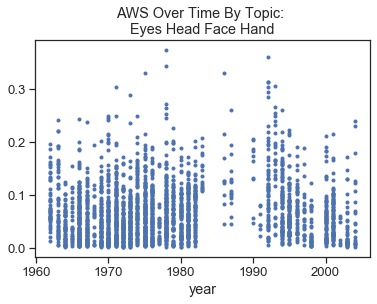

In [103]:
#the body
topic_number = 21

topic_label = " ".join(topics[topic_number][:4])

aws_df_year[topic_label].plot(style='.', title=f'AWS Over Time By Topic: \n{topic_label.title()}')

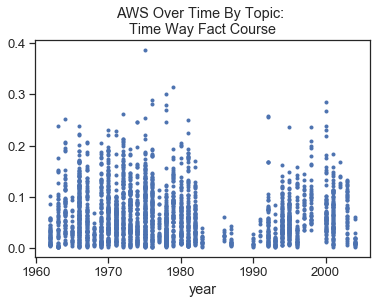

In [105]:
#rhetoric
topic_number = 17

topic_label = " ".join(topics[topic_number][:4])

aws_df_year[topic_label].plot(style='.', title=f'AWS Over Time By Topic: \n{topic_label.title()}')

#### Line

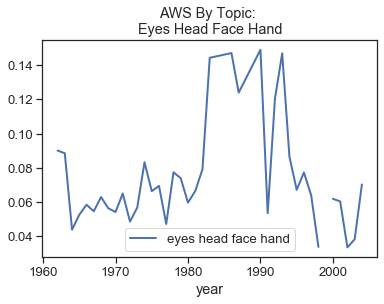

In [106]:
topic_number = 21

topic_label = " ".join(topics[topic_number][:4])

aws_df_year.groupby(aws_df_year.index)[[topic_label]].mean().plot(title=f'AWS By Topic: \n{topic_label.title()}', linewidth=2)

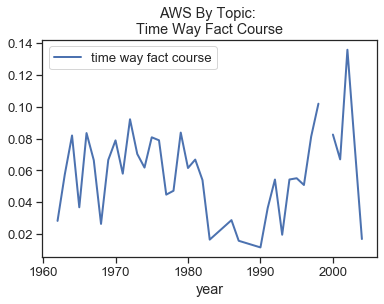

In [107]:
topic_number = 17

topic_label = " ".join(topics[topic_number][:4])

aws_df_year.groupby(aws_df_year.index)[[topic_label]].mean().plot(title=f'AWS By Topic: \n{topic_label.title()}', linewidth=2)

The body and rhetoric both are fairly constant in the scatter, although the body sees a surge in the 1980s and 90s while rhetoric sees a lull.